In [2]:
import sys, os
import torch
import numpy as np
import utils
from torch.nn import Module, Parameter
import torch.optim as opt
from utils import preprocess
import torch.nn.functional as F

from sklearn.decomposition import PCA
from umap import UMAP

import pandas as pd 
import numpy as np 
import scipy.sparse as sp
import torch
import model

from sklearn.preprocessing import StandardScaler

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [188]:
model1 = model.sc_mf(dir = '../data/simulated/2b5c_ziqi2/', N = 5, batch_size = 0.1, interval = 10, lr = 1e-3, init = "random").to(device)
with torch.no_grad():
    loss, *_ = model1.batch_loss('valid')
    print('Initial Loss is {:.5f}'.format(loss.item()))

model1.train_func(T=50000)

Initial Loss is 256.43869
Epoch 10, Validating Loss: 250.8579
	 loss RNA: 88.04606
	 loss ATAC: 102.14514
	 loss gene act: 58.04889
	 loss sparse: 2.61782
Epoch 20, Validating Loss: 243.9994
	 loss RNA: 84.45498
	 loss ATAC: 99.23626
	 loss gene act: 57.68563
	 loss sparse: 2.62249
Epoch 30, Validating Loss: 237.3396
	 loss RNA: 80.96855
	 loss ATAC: 96.44016
	 loss gene act: 57.30347
	 loss sparse: 2.62746
Epoch 40, Validating Loss: 231.0797
	 loss RNA: 77.69223
	 loss ATAC: 93.83421
	 loss gene act: 56.92075
	 loss sparse: 2.63257
Epoch 50, Validating Loss: 225.1766
	 loss RNA: 74.58317
	 loss ATAC: 91.41684
	 loss gene act: 56.53890
	 loss sparse: 2.63767
Epoch 60, Validating Loss: 219.6169
	 loss RNA: 71.64818
	 loss ATAC: 89.16816
	 loss gene act: 56.15782
	 loss sparse: 2.64269
Epoch 70, Validating Loss: 214.4490
	 loss RNA: 68.95236
	 loss ATAC: 87.06638
	 loss gene act: 55.78249
	 loss sparse: 2.64777
Epoch 80, Validating Loss: 209.6440
	 loss RNA: 66.43655
	 loss ATAC: 85.1453

Epoch 670, Validating Loss: 144.0754
	 loss RNA: 38.71605
	 loss ATAC: 63.18314
	 loss gene act: 39.32107
	 loss sparse: 2.85513
Epoch 680, Validating Loss: 143.8212
	 loss RNA: 38.68776
	 loss ATAC: 63.14474
	 loss gene act: 39.13124
	 loss sparse: 2.85741
Epoch 690, Validating Loss: 143.5756
	 loss RNA: 38.66090
	 loss ATAC: 63.11332
	 loss gene act: 38.94177
	 loss sparse: 2.85960
Epoch 700, Validating Loss: 143.3293
	 loss RNA: 38.63448
	 loss ATAC: 63.07872
	 loss gene act: 38.75433
	 loss sparse: 2.86172
Epoch 710, Validating Loss: 143.0867
	 loss RNA: 38.60810
	 loss ATAC: 63.04730
	 loss gene act: 38.56746
	 loss sparse: 2.86380
Epoch 720, Validating Loss: 142.8453
	 loss RNA: 38.58242
	 loss ATAC: 63.01654
	 loss gene act: 38.38039
	 loss sparse: 2.86592
Epoch 730, Validating Loss: 142.6065
	 loss RNA: 38.55740
	 loss ATAC: 62.98567
	 loss gene act: 38.19541
	 loss sparse: 2.86801
Epoch 740, Validating Loss: 142.3743
	 loss RNA: 38.53274
	 loss ATAC: 62.95392
	 loss gene act: 

Epoch 1320, Validating Loss: 133.0172
	 loss RNA: 37.62627
	 loss ATAC: 62.10500
	 loss gene act: 30.33534
	 loss sparse: 2.95064
Epoch 1330, Validating Loss: 132.9038
	 loss RNA: 37.61425
	 loss ATAC: 62.09587
	 loss gene act: 30.24230
	 loss sparse: 2.95137
Epoch 1340, Validating Loss: 132.7881
	 loss RNA: 37.60238
	 loss ATAC: 62.08514
	 loss gene act: 30.14854
	 loss sparse: 2.95209
Epoch 1350, Validating Loss: 132.6732
	 loss RNA: 37.58854
	 loss ATAC: 62.07700
	 loss gene act: 30.05481
	 loss sparse: 2.95281
Epoch 1360, Validating Loss: 132.5604
	 loss RNA: 37.57496
	 loss ATAC: 62.06923
	 loss gene act: 29.96259
	 loss sparse: 2.95361
Epoch 1370, Validating Loss: 132.4514
	 loss RNA: 37.56372
	 loss ATAC: 62.06143
	 loss gene act: 29.87197
	 loss sparse: 2.95432
Epoch 1380, Validating Loss: 132.3427
	 loss RNA: 37.55265
	 loss ATAC: 62.05158
	 loss gene act: 29.78345
	 loss sparse: 2.95496
Epoch 1390, Validating Loss: 132.2344
	 loss RNA: 37.54165
	 loss ATAC: 62.04155
	 loss ge

Epoch 1980, Validating Loss: 126.4003
	 loss RNA: 36.36647
	 loss ATAC: 61.04654
	 loss gene act: 26.05527
	 loss sparse: 2.93202
Epoch 1990, Validating Loss: 126.2921
	 loss RNA: 36.33276
	 loss ATAC: 61.01217
	 loss gene act: 26.01698
	 loss sparse: 2.93024
Epoch 2000, Validating Loss: 126.1838
	 loss RNA: 36.30002
	 loss ATAC: 60.97483
	 loss gene act: 25.98050
	 loss sparse: 2.92845
Epoch 2010, Validating Loss: 126.0774
	 loss RNA: 36.26952
	 loss ATAC: 60.93798
	 loss gene act: 25.94322
	 loss sparse: 2.92665
Epoch 2020, Validating Loss: 125.9705
	 loss RNA: 36.23690
	 loss ATAC: 60.90173
	 loss gene act: 25.90702
	 loss sparse: 2.92487
Epoch 2030, Validating Loss: 125.8700
	 loss RNA: 36.20814
	 loss ATAC: 60.86758
	 loss gene act: 25.87133
	 loss sparse: 2.92297
Epoch 2040, Validating Loss: 125.7628
	 loss RNA: 36.17466
	 loss ATAC: 60.83114
	 loss gene act: 25.83594
	 loss sparse: 2.92106
Epoch 2050, Validating Loss: 125.6483
	 loss RNA: 36.13632
	 loss ATAC: 60.79081
	 loss ge

Epoch 2630, Validating Loss: 117.9345
	 loss RNA: 33.47866
	 loss ATAC: 57.01329
	 loss gene act: 24.72384
	 loss sparse: 2.71874
Epoch 2640, Validating Loss: 117.7902
	 loss RNA: 33.43098
	 loss ATAC: 56.92964
	 loss gene act: 24.71528
	 loss sparse: 2.71426
Epoch 2650, Validating Loss: 117.6507
	 loss RNA: 33.38187
	 loss ATAC: 56.85054
	 loss gene act: 24.70829
	 loss sparse: 2.71002
Epoch 2660, Validating Loss: 117.5098
	 loss RNA: 33.33125
	 loss ATAC: 56.77233
	 loss gene act: 24.70049
	 loss sparse: 2.70575
Epoch 2670, Validating Loss: 117.3604
	 loss RNA: 33.27939
	 loss ATAC: 56.68668
	 loss gene act: 24.69301
	 loss sparse: 2.70129
Epoch 2680, Validating Loss: 117.2249
	 loss RNA: 33.23456
	 loss ATAC: 56.60728
	 loss gene act: 24.68598
	 loss sparse: 2.69708
Epoch 2690, Validating Loss: 117.0861
	 loss RNA: 33.18634
	 loss ATAC: 56.52694
	 loss gene act: 24.67996
	 loss sparse: 2.69284
Epoch 2700, Validating Loss: 116.9492
	 loss RNA: 33.14119
	 loss ATAC: 56.44667
	 loss ge

Epoch 3290, Validating Loss: 109.5626
	 loss RNA: 30.60197
	 loss ATAC: 52.11750
	 loss gene act: 24.41032
	 loss sparse: 2.43277
Epoch 3300, Validating Loss: 109.4552
	 loss RNA: 30.56524
	 loss ATAC: 52.05575
	 loss gene act: 24.40554
	 loss sparse: 2.42865
Epoch 3310, Validating Loss: 109.3490
	 loss RNA: 30.53109
	 loss ATAC: 51.98928
	 loss gene act: 24.40393
	 loss sparse: 2.42467
Epoch 3320, Validating Loss: 109.2460
	 loss RNA: 30.49835
	 loss ATAC: 51.92800
	 loss gene act: 24.39900
	 loss sparse: 2.42063
Epoch 3330, Validating Loss: 109.1363
	 loss RNA: 30.46023
	 loss ATAC: 51.86561
	 loss gene act: 24.39388
	 loss sparse: 2.41657
Epoch 3340, Validating Loss: 109.0244
	 loss RNA: 30.42239
	 loss ATAC: 51.79782
	 loss gene act: 24.39177
	 loss sparse: 2.41246
Epoch 3350, Validating Loss: 108.9181
	 loss RNA: 30.38684
	 loss ATAC: 51.73358
	 loss gene act: 24.38934
	 loss sparse: 2.40836
Epoch 3360, Validating Loss: 108.8074
	 loss RNA: 30.34863
	 loss ATAC: 51.66664
	 loss ge

Epoch 3950, Validating Loss: 102.8151
	 loss RNA: 28.47824
	 loss ATAC: 47.72477
	 loss gene act: 24.44350
	 loss sparse: 2.16858
Epoch 3960, Validating Loss: 102.7152
	 loss RNA: 28.45053
	 loss ATAC: 47.65325
	 loss gene act: 24.44672
	 loss sparse: 2.16467
Epoch 3970, Validating Loss: 102.6165
	 loss RNA: 28.42182
	 loss ATAC: 47.58322
	 loss gene act: 24.45065
	 loss sparse: 2.16078
Epoch 3980, Validating Loss: 102.5203
	 loss RNA: 28.39462
	 loss ATAC: 47.51469
	 loss gene act: 24.45410
	 loss sparse: 2.15690
Epoch 3990, Validating Loss: 102.4270
	 loss RNA: 28.36633
	 loss ATAC: 47.45009
	 loss gene act: 24.45736
	 loss sparse: 2.15323
Epoch 4000, Validating Loss: 102.3276
	 loss RNA: 28.33629
	 loss ATAC: 47.38217
	 loss gene act: 24.45968
	 loss sparse: 2.14946
Epoch 4010, Validating Loss: 102.2257
	 loss RNA: 28.30864
	 loss ATAC: 47.30807
	 loss gene act: 24.46378
	 loss sparse: 2.14521
Epoch 4020, Validating Loss: 102.1249
	 loss RNA: 28.27830
	 loss ATAC: 47.23659
	 loss ge

Epoch 4600, Validating Loss: 96.9247
	 loss RNA: 26.81132
	 loss ATAC: 43.49036
	 loss gene act: 24.71118
	 loss sparse: 1.91182
Epoch 4610, Validating Loss: 96.8517
	 loss RNA: 26.78955
	 loss ATAC: 43.44107
	 loss gene act: 24.71283
	 loss sparse: 1.90828
Epoch 4620, Validating Loss: 96.7764
	 loss RNA: 26.76545
	 loss ATAC: 43.38861
	 loss gene act: 24.71775
	 loss sparse: 1.90457
Epoch 4630, Validating Loss: 96.7010
	 loss RNA: 26.74030
	 loss ATAC: 43.34014
	 loss gene act: 24.71966
	 loss sparse: 1.90093
Epoch 4640, Validating Loss: 96.6244
	 loss RNA: 26.71631
	 loss ATAC: 43.28924
	 loss gene act: 24.72161
	 loss sparse: 1.89725
Epoch 4650, Validating Loss: 96.5454
	 loss RNA: 26.69169
	 loss ATAC: 43.23699
	 loss gene act: 24.72311
	 loss sparse: 1.89360
Epoch 4660, Validating Loss: 96.4770
	 loss RNA: 26.67159
	 loss ATAC: 43.18665
	 loss gene act: 24.72848
	 loss sparse: 1.89030
Epoch 4670, Validating Loss: 96.4026
	 loss RNA: 26.64742
	 loss ATAC: 43.13565
	 loss gene act: 

Epoch 5250, Validating Loss: 92.9563
	 loss RNA: 25.43911
	 loss ATAC: 41.07776
	 loss gene act: 24.74131
	 loss sparse: 1.69813
Epoch 5260, Validating Loss: 92.9112
	 loss RNA: 25.42145
	 loss ATAC: 41.05354
	 loss gene act: 24.74091
	 loss sparse: 1.69528
Epoch 5270, Validating Loss: 92.8596
	 loss RNA: 25.40202
	 loss ATAC: 41.02471
	 loss gene act: 24.74042
	 loss sparse: 1.69244
Epoch 5280, Validating Loss: 92.8140
	 loss RNA: 25.38627
	 loss ATAC: 40.99908
	 loss gene act: 24.73890
	 loss sparse: 1.68972
Epoch 5290, Validating Loss: 92.7704
	 loss RNA: 25.36833
	 loss ATAC: 40.97717
	 loss gene act: 24.73797
	 loss sparse: 1.68699
Epoch 5300, Validating Loss: 92.7260
	 loss RNA: 25.34949
	 loss ATAC: 40.95560
	 loss gene act: 24.73661
	 loss sparse: 1.68433
Epoch 5310, Validating Loss: 92.6834
	 loss RNA: 25.33362
	 loss ATAC: 40.93444
	 loss gene act: 24.73363
	 loss sparse: 1.68172
Epoch 5320, Validating Loss: 92.6413
	 loss RNA: 25.31612
	 loss ATAC: 40.91209
	 loss gene act: 

Epoch 5910, Validating Loss: 90.5292
	 loss RNA: 24.40673
	 loss ATAC: 40.00635
	 loss gene act: 24.58139
	 loss sparse: 1.53472
Epoch 5920, Validating Loss: 90.4986
	 loss RNA: 24.39356
	 loss ATAC: 39.99509
	 loss gene act: 24.57741
	 loss sparse: 1.53257
Epoch 5930, Validating Loss: 90.4676
	 loss RNA: 24.37941
	 loss ATAC: 39.98232
	 loss gene act: 24.57557
	 loss sparse: 1.53029
Epoch 5940, Validating Loss: 90.4408
	 loss RNA: 24.36992
	 loss ATAC: 39.96996
	 loss gene act: 24.57281
	 loss sparse: 1.52814
Epoch 5950, Validating Loss: 90.4122
	 loss RNA: 24.35436
	 loss ATAC: 39.96093
	 loss gene act: 24.57094
	 loss sparse: 1.52599
Epoch 5960, Validating Loss: 90.3834
	 loss RNA: 24.34085
	 loss ATAC: 39.95047
	 loss gene act: 24.56829
	 loss sparse: 1.52383
Epoch 5970, Validating Loss: 90.3557
	 loss RNA: 24.32814
	 loss ATAC: 39.94098
	 loss gene act: 24.56491
	 loss sparse: 1.52170
Epoch 5980, Validating Loss: 90.3281
	 loss RNA: 24.31375
	 loss ATAC: 39.93085
	 loss gene act: 

Epoch 6570, Validating Loss: 88.9838
	 loss RNA: 23.67309
	 loss ATAC: 39.49868
	 loss gene act: 24.40255
	 loss sparse: 1.40950
Epoch 6580, Validating Loss: 88.9633
	 loss RNA: 23.66316
	 loss ATAC: 39.49326
	 loss gene act: 24.39913
	 loss sparse: 1.40773
Epoch 6590, Validating Loss: 88.9450
	 loss RNA: 23.65561
	 loss ATAC: 39.48700
	 loss gene act: 24.39636
	 loss sparse: 1.40606
Epoch 6600, Validating Loss: 88.9284
	 loss RNA: 23.64670
	 loss ATAC: 39.48280
	 loss gene act: 24.39450
	 loss sparse: 1.40441
Epoch 6610, Validating Loss: 88.9102
	 loss RNA: 23.63773
	 loss ATAC: 39.47859
	 loss gene act: 24.39110
	 loss sparse: 1.40281
Epoch 6620, Validating Loss: 88.8902
	 loss RNA: 23.62862
	 loss ATAC: 39.47346
	 loss gene act: 24.38696
	 loss sparse: 1.40120
Epoch 6630, Validating Loss: 88.8709
	 loss RNA: 23.61885
	 loss ATAC: 39.46771
	 loss gene act: 24.38471
	 loss sparse: 1.39960
Epoch 6640, Validating Loss: 88.8514
	 loss RNA: 23.60961
	 loss ATAC: 39.46208
	 loss gene act: 

Epoch 7220, Validating Loss: 87.9829
	 loss RNA: 23.19020
	 loss ATAC: 39.25464
	 loss gene act: 24.22789
	 loss sparse: 1.31020
Epoch 7230, Validating Loss: 87.9714
	 loss RNA: 23.18541
	 loss ATAC: 39.25319
	 loss gene act: 24.22400
	 loss sparse: 1.30878
Epoch 7240, Validating Loss: 87.9570
	 loss RNA: 23.17786
	 loss ATAC: 39.25248
	 loss gene act: 24.21918
	 loss sparse: 1.30747
Epoch 7250, Validating Loss: 87.9454
	 loss RNA: 23.17197
	 loss ATAC: 39.25087
	 loss gene act: 24.21640
	 loss sparse: 1.30613
Epoch 7260, Validating Loss: 87.9362
	 loss RNA: 23.16869
	 loss ATAC: 39.24813
	 loss gene act: 24.21453
	 loss sparse: 1.30482
Epoch 7270, Validating Loss: 87.9225
	 loss RNA: 23.16231
	 loss ATAC: 39.24617
	 loss gene act: 24.21044
	 loss sparse: 1.30360
Epoch 7280, Validating Loss: 87.9105
	 loss RNA: 23.15530
	 loss ATAC: 39.24642
	 loss gene act: 24.20642
	 loss sparse: 1.30232
Epoch 7290, Validating Loss: 87.9025
	 loss RNA: 23.15465
	 loss ATAC: 39.24323
	 loss gene act: 

Epoch 7880, Validating Loss: 87.2966
	 loss RNA: 22.87568
	 loss ATAC: 39.12082
	 loss gene act: 24.07141
	 loss sparse: 1.22874
Epoch 7890, Validating Loss: 87.2906
	 loss RNA: 22.87307
	 loss ATAC: 39.12072
	 loss gene act: 24.06919
	 loss sparse: 1.22758
Epoch 7900, Validating Loss: 87.2841
	 loss RNA: 22.87080
	 loss ATAC: 39.11998
	 loss gene act: 24.06661
	 loss sparse: 1.22668
Epoch 7910, Validating Loss: 87.2766
	 loss RNA: 22.86757
	 loss ATAC: 39.12017
	 loss gene act: 24.06309
	 loss sparse: 1.22574
Epoch 7920, Validating Loss: 87.2672
	 loss RNA: 22.86419
	 loss ATAC: 39.11837
	 loss gene act: 24.06010
	 loss sparse: 1.22456
Epoch 7930, Validating Loss: 87.2589
	 loss RNA: 22.86243
	 loss ATAC: 39.11567
	 loss gene act: 24.05743
	 loss sparse: 1.22337
Epoch 7940, Validating Loss: 87.2521
	 loss RNA: 22.86033
	 loss ATAC: 39.11523
	 loss gene act: 24.05428
	 loss sparse: 1.22222
Epoch 7950, Validating Loss: 87.2427
	 loss RNA: 22.85581
	 loss ATAC: 39.11348
	 loss gene act: 

Epoch 8530, Validating Loss: 86.8319
	 loss RNA: 22.68531
	 loss ATAC: 39.04212
	 loss gene act: 23.94174
	 loss sparse: 1.16269
Epoch 8540, Validating Loss: 86.8230
	 loss RNA: 22.68107
	 loss ATAC: 39.04057
	 loss gene act: 23.93970
	 loss sparse: 1.16167
Epoch 8550, Validating Loss: 86.8149
	 loss RNA: 22.67665
	 loss ATAC: 39.04077
	 loss gene act: 23.93685
	 loss sparse: 1.16068
Epoch 8560, Validating Loss: 86.8116
	 loss RNA: 22.67601
	 loss ATAC: 39.04161
	 loss gene act: 23.93429
	 loss sparse: 1.15969
Epoch 8570, Validating Loss: 86.8058
	 loss RNA: 22.67206
	 loss ATAC: 39.04172
	 loss gene act: 23.93335
	 loss sparse: 1.15871
Epoch 8580, Validating Loss: 86.8003
	 loss RNA: 22.67016
	 loss ATAC: 39.03895
	 loss gene act: 23.93337
	 loss sparse: 1.15780
Epoch 8590, Validating Loss: 86.7947
	 loss RNA: 22.66689
	 loss ATAC: 39.03917
	 loss gene act: 23.93187
	 loss sparse: 1.15680
Epoch 8600, Validating Loss: 86.7889
	 loss RNA: 22.66493
	 loss ATAC: 39.03793
	 loss gene act: 

Epoch 9170, Validating Loss: 86.4994
	 loss RNA: 22.55144
	 loss ATAC: 38.99789
	 loss gene act: 23.84154
	 loss sparse: 1.10851
Epoch 9180, Validating Loss: 86.4954
	 loss RNA: 22.55032
	 loss ATAC: 38.99863
	 loss gene act: 23.83861
	 loss sparse: 1.10781
Epoch 9190, Validating Loss: 86.4918
	 loss RNA: 22.55079
	 loss ATAC: 38.99813
	 loss gene act: 23.83573
	 loss sparse: 1.10713
Epoch 9200, Validating Loss: 86.4862
	 loss RNA: 22.54576
	 loss ATAC: 39.00046
	 loss gene act: 23.83368
	 loss sparse: 1.10631
Epoch 9210, Validating Loss: 86.4835
	 loss RNA: 22.54505
	 loss ATAC: 38.99950
	 loss gene act: 23.83341
	 loss sparse: 1.10557
Epoch 9220, Validating Loss: 86.4783
	 loss RNA: 22.54505
	 loss ATAC: 38.99878
	 loss gene act: 23.82973
	 loss sparse: 1.10471
Epoch 9230, Validating Loss: 86.4750
	 loss RNA: 22.54465
	 loss ATAC: 38.99858
	 loss gene act: 23.82778
	 loss sparse: 1.10396
Epoch 9240, Validating Loss: 86.4683
	 loss RNA: 22.54193
	 loss ATAC: 38.99712
	 loss gene act: 

Epoch 9830, Validating Loss: 86.2401
	 loss RNA: 22.46142
	 loss ATAC: 38.97683
	 loss gene act: 23.74144
	 loss sparse: 1.06040
Epoch 9840, Validating Loss: 86.2382
	 loss RNA: 22.46126
	 loss ATAC: 38.97797
	 loss gene act: 23.73927
	 loss sparse: 1.05967
Epoch 9850, Validating Loss: 86.2307
	 loss RNA: 22.45907
	 loss ATAC: 38.97496
	 loss gene act: 23.73767
	 loss sparse: 1.05902
Epoch 9860, Validating Loss: 86.2275
	 loss RNA: 22.45757
	 loss ATAC: 38.97478
	 loss gene act: 23.73676
	 loss sparse: 1.05843
Epoch 9870, Validating Loss: 86.2248
	 loss RNA: 22.45656
	 loss ATAC: 38.97499
	 loss gene act: 23.73541
	 loss sparse: 1.05785
Epoch 9880, Validating Loss: 86.2202
	 loss RNA: 22.45329
	 loss ATAC: 38.97669
	 loss gene act: 23.73302
	 loss sparse: 1.05719
Epoch 9890, Validating Loss: 86.2198
	 loss RNA: 22.45462
	 loss ATAC: 38.97726
	 loss gene act: 23.73158
	 loss sparse: 1.05636
Epoch 9900, Validating Loss: 86.2193
	 loss RNA: 22.45513
	 loss ATAC: 38.97869
	 loss gene act: 

Epoch 10480, Validating Loss: 86.0375
	 loss RNA: 22.39814
	 loss ATAC: 38.97043
	 loss gene act: 23.64878
	 loss sparse: 1.02014
Epoch 10490, Validating Loss: 86.0354
	 loss RNA: 22.39737
	 loss ATAC: 38.97118
	 loss gene act: 23.64725
	 loss sparse: 1.01962
Epoch 10500, Validating Loss: 86.0310
	 loss RNA: 22.39386
	 loss ATAC: 38.97357
	 loss gene act: 23.64455
	 loss sparse: 1.01903
Epoch 10510, Validating Loss: 86.0315
	 loss RNA: 22.39547
	 loss ATAC: 38.97625
	 loss gene act: 23.64128
	 loss sparse: 1.01845
Epoch 10520, Validating Loss: 86.0283
	 loss RNA: 22.39630
	 loss ATAC: 38.97410
	 loss gene act: 23.63999
	 loss sparse: 1.01789
Epoch 10530, Validating Loss: 86.0288
	 loss RNA: 22.39869
	 loss ATAC: 38.97522
	 loss gene act: 23.63750
	 loss sparse: 1.01742
Epoch 10540, Validating Loss: 86.0250
	 loss RNA: 22.39685
	 loss ATAC: 38.97477
	 loss gene act: 23.63663
	 loss sparse: 1.01679
Epoch 10550, Validating Loss: 86.0239
	 loss RNA: 22.39589
	 loss ATAC: 38.97639
	 loss ge

Epoch 11130, Validating Loss: 85.8681
	 loss RNA: 22.34806
	 loss ATAC: 38.95878
	 loss gene act: 23.57530
	 loss sparse: 0.98593
Epoch 11140, Validating Loss: 85.8669
	 loss RNA: 22.34781
	 loss ATAC: 38.96017
	 loss gene act: 23.57354
	 loss sparse: 0.98540
Epoch 11150, Validating Loss: 85.8648
	 loss RNA: 22.34616
	 loss ATAC: 38.96156
	 loss gene act: 23.57220
	 loss sparse: 0.98486
Epoch 11160, Validating Loss: 85.8620
	 loss RNA: 22.34463
	 loss ATAC: 38.96179
	 loss gene act: 23.57118
	 loss sparse: 0.98438
Epoch 11170, Validating Loss: 85.8615
	 loss RNA: 22.34663
	 loss ATAC: 38.96017
	 loss gene act: 23.57084
	 loss sparse: 0.98387
Epoch 11180, Validating Loss: 85.8614
	 loss RNA: 22.34654
	 loss ATAC: 38.96106
	 loss gene act: 23.57035
	 loss sparse: 0.98340
Epoch 11190, Validating Loss: 85.8607
	 loss RNA: 22.34580
	 loss ATAC: 38.96201
	 loss gene act: 23.56993
	 loss sparse: 0.98296
Epoch 11200, Validating Loss: 85.8575
	 loss RNA: 22.34376
	 loss ATAC: 38.96301
	 loss ge

Epoch 11790, Validating Loss: 85.7284
	 loss RNA: 22.30689
	 loss ATAC: 38.95647
	 loss gene act: 23.51002
	 loss sparse: 0.95501
Epoch 11800, Validating Loss: 85.7281
	 loss RNA: 22.30648
	 loss ATAC: 38.95788
	 loss gene act: 23.50917
	 loss sparse: 0.95461
Epoch 11810, Validating Loss: 85.7261
	 loss RNA: 22.30407
	 loss ATAC: 38.95890
	 loss gene act: 23.50891
	 loss sparse: 0.95418
Epoch 11820, Validating Loss: 85.7275
	 loss RNA: 22.30717
	 loss ATAC: 38.95869
	 loss gene act: 23.50797
	 loss sparse: 0.95370
Epoch 11830, Validating Loss: 85.7251
	 loss RNA: 22.30709
	 loss ATAC: 38.95805
	 loss gene act: 23.50664
	 loss sparse: 0.95327
Epoch 11840, Validating Loss: 85.7231
	 loss RNA: 22.30655
	 loss ATAC: 38.95732
	 loss gene act: 23.50640
	 loss sparse: 0.95281
Epoch 11850, Validating Loss: 85.7237
	 loss RNA: 22.30755
	 loss ATAC: 38.95758
	 loss gene act: 23.50620
	 loss sparse: 0.95240
Epoch 11860, Validating Loss: 85.7220
	 loss RNA: 22.30500
	 loss ATAC: 38.95898
	 loss ge

Epoch 12440, Validating Loss: 85.6161
	 loss RNA: 22.27996
	 loss ATAC: 38.95684
	 loss gene act: 23.45214
	 loss sparse: 0.92721
Epoch 12450, Validating Loss: 85.6138
	 loss RNA: 22.27642
	 loss ATAC: 38.95851
	 loss gene act: 23.45205
	 loss sparse: 0.92684
Epoch 12460, Validating Loss: 85.6130
	 loss RNA: 22.27657
	 loss ATAC: 38.95885
	 loss gene act: 23.45115
	 loss sparse: 0.92639
Epoch 12470, Validating Loss: 85.6126
	 loss RNA: 22.27741
	 loss ATAC: 38.95843
	 loss gene act: 23.45087
	 loss sparse: 0.92592
Epoch 12480, Validating Loss: 85.6126
	 loss RNA: 22.27908
	 loss ATAC: 38.95799
	 loss gene act: 23.45006
	 loss sparse: 0.92544
Epoch 12490, Validating Loss: 85.6077
	 loss RNA: 22.27584
	 loss ATAC: 38.95676
	 loss gene act: 23.44993
	 loss sparse: 0.92512
Epoch 12500, Validating Loss: 85.6041
	 loss RNA: 22.27291
	 loss ATAC: 38.95819
	 loss gene act: 23.44828
	 loss sparse: 0.92468
Epoch 12510, Validating Loss: 85.6049
	 loss RNA: 22.27372
	 loss ATAC: 38.95883
	 loss ge

Epoch 13100, Validating Loss: 85.5037
	 loss RNA: 22.24517
	 loss ATAC: 38.95816
	 loss gene act: 23.39829
	 loss sparse: 0.90206
Epoch 13110, Validating Loss: 85.5034
	 loss RNA: 22.24703
	 loss ATAC: 38.95868
	 loss gene act: 23.39591
	 loss sparse: 0.90177
Epoch 13120, Validating Loss: 85.5048
	 loss RNA: 22.25148
	 loss ATAC: 38.95723
	 loss gene act: 23.39463
	 loss sparse: 0.90147
Epoch 13130, Validating Loss: 85.5032
	 loss RNA: 22.24948
	 loss ATAC: 38.95927
	 loss gene act: 23.39328
	 loss sparse: 0.90115
Epoch 13140, Validating Loss: 85.5029
	 loss RNA: 22.24936
	 loss ATAC: 38.95980
	 loss gene act: 23.39288
	 loss sparse: 0.90082
Epoch 13150, Validating Loss: 85.5024
	 loss RNA: 22.24916
	 loss ATAC: 38.96055
	 loss gene act: 23.39232
	 loss sparse: 0.90042
Epoch 13160, Validating Loss: 85.4990
	 loss RNA: 22.24793
	 loss ATAC: 38.96030
	 loss gene act: 23.39073
	 loss sparse: 0.90003
Epoch 13170, Validating Loss: 85.4952
	 loss RNA: 22.24562
	 loss ATAC: 38.95828
	 loss ge

Epoch 13750, Validating Loss: 85.4138
	 loss RNA: 22.22809
	 loss ATAC: 38.94926
	 loss gene act: 23.35678
	 loss sparse: 0.87971
Epoch 13760, Validating Loss: 85.4132
	 loss RNA: 22.22815
	 loss ATAC: 38.95090
	 loss gene act: 23.35477
	 loss sparse: 0.87939
Epoch 13770, Validating Loss: 85.4135
	 loss RNA: 22.22791
	 loss ATAC: 38.95245
	 loss gene act: 23.35401
	 loss sparse: 0.87914
Epoch 13780, Validating Loss: 85.4123
	 loss RNA: 22.22868
	 loss ATAC: 38.95164
	 loss gene act: 23.35316
	 loss sparse: 0.87885
Epoch 13790, Validating Loss: 85.4164
	 loss RNA: 22.23221
	 loss ATAC: 38.95375
	 loss gene act: 23.35191
	 loss sparse: 0.87851
Epoch 13800, Validating Loss: 85.4145
	 loss RNA: 22.23164
	 loss ATAC: 38.95396
	 loss gene act: 23.35080
	 loss sparse: 0.87814
Epoch 13810, Validating Loss: 85.4095
	 loss RNA: 22.22736
	 loss ATAC: 38.95493
	 loss gene act: 23.34935
	 loss sparse: 0.87784
Epoch 13820, Validating Loss: 85.4082
	 loss RNA: 22.22789
	 loss ATAC: 38.95396
	 loss ge

Epoch 14410, Validating Loss: 85.3344
	 loss RNA: 22.21279
	 loss ATAC: 38.95167
	 loss gene act: 23.31123
	 loss sparse: 0.85868
Epoch 14420, Validating Loss: 85.3370
	 loss RNA: 22.21574
	 loss ATAC: 38.95351
	 loss gene act: 23.30931
	 loss sparse: 0.85845
Epoch 14430, Validating Loss: 85.3354
	 loss RNA: 22.21684
	 loss ATAC: 38.95224
	 loss gene act: 23.30807
	 loss sparse: 0.85820
Epoch 14440, Validating Loss: 85.3318
	 loss RNA: 22.21416
	 loss ATAC: 38.95214
	 loss gene act: 23.30754
	 loss sparse: 0.85799
Epoch 14450, Validating Loss: 85.3333
	 loss RNA: 22.21531
	 loss ATAC: 38.95383
	 loss gene act: 23.30642
	 loss sparse: 0.85775
Epoch 14460, Validating Loss: 85.3325
	 loss RNA: 22.21566
	 loss ATAC: 38.95387
	 loss gene act: 23.30550
	 loss sparse: 0.85746
Epoch 14470, Validating Loss: 85.3293
	 loss RNA: 22.21441
	 loss ATAC: 38.95215
	 loss gene act: 23.30548
	 loss sparse: 0.85722
Epoch 14480, Validating Loss: 85.3269
	 loss RNA: 22.21341
	 loss ATAC: 38.95202
	 loss ge

Epoch 15070, Validating Loss: 85.2686
	 loss RNA: 22.20478
	 loss ATAC: 38.95250
	 loss gene act: 23.27095
	 loss sparse: 0.84034
Epoch 15080, Validating Loss: 85.2659
	 loss RNA: 22.20238
	 loss ATAC: 38.95449
	 loss gene act: 23.26892
	 loss sparse: 0.84009
Epoch 15090, Validating Loss: 85.2619
	 loss RNA: 22.19942
	 loss ATAC: 38.95430
	 loss gene act: 23.26835
	 loss sparse: 0.83987
Epoch 15100, Validating Loss: 85.2605
	 loss RNA: 22.19966
	 loss ATAC: 38.95455
	 loss gene act: 23.26674
	 loss sparse: 0.83955
Epoch 15110, Validating Loss: 85.2606
	 loss RNA: 22.20051
	 loss ATAC: 38.95457
	 loss gene act: 23.26619
	 loss sparse: 0.83930
Epoch 15120, Validating Loss: 85.2603
	 loss RNA: 22.20052
	 loss ATAC: 38.95502
	 loss gene act: 23.26578
	 loss sparse: 0.83897
Epoch 15130, Validating Loss: 85.2580
	 loss RNA: 22.20183
	 loss ATAC: 38.95286
	 loss gene act: 23.26461
	 loss sparse: 0.83870
Epoch 15140, Validating Loss: 85.2523
	 loss RNA: 22.20017
	 loss ATAC: 38.94955
	 loss ge

Epoch 15730, Validating Loss: 85.1983
	 loss RNA: 22.18910
	 loss ATAC: 38.95041
	 loss gene act: 23.23555
	 loss sparse: 0.82325
Epoch 15740, Validating Loss: 85.1979
	 loss RNA: 22.18965
	 loss ATAC: 38.95085
	 loss gene act: 23.23435
	 loss sparse: 0.82301
Epoch 15750, Validating Loss: 85.1980
	 loss RNA: 22.18742
	 loss ATAC: 38.95328
	 loss gene act: 23.23453
	 loss sparse: 0.82275
Epoch 15760, Validating Loss: 85.1971
	 loss RNA: 22.18925
	 loss ATAC: 38.95050
	 loss gene act: 23.23498
	 loss sparse: 0.82241
Epoch 15770, Validating Loss: 85.1942
	 loss RNA: 22.18835
	 loss ATAC: 38.94839
	 loss gene act: 23.23538
	 loss sparse: 0.82211
Epoch 15780, Validating Loss: 85.1933
	 loss RNA: 22.18874
	 loss ATAC: 38.94686
	 loss gene act: 23.23580
	 loss sparse: 0.82186
Epoch 15790, Validating Loss: 85.1907
	 loss RNA: 22.18690
	 loss ATAC: 38.94676
	 loss gene act: 23.23547
	 loss sparse: 0.82160
Epoch 15800, Validating Loss: 85.1908
	 loss RNA: 22.18645
	 loss ATAC: 38.94757
	 loss ge

Epoch 16380, Validating Loss: 85.1396
	 loss RNA: 22.18386
	 loss ATAC: 38.94614
	 loss gene act: 23.20266
	 loss sparse: 0.80696
Epoch 16390, Validating Loss: 85.1371
	 loss RNA: 22.18130
	 loss ATAC: 38.94613
	 loss gene act: 23.20291
	 loss sparse: 0.80676
Epoch 16400, Validating Loss: 85.1361
	 loss RNA: 22.18171
	 loss ATAC: 38.94641
	 loss gene act: 23.20152
	 loss sparse: 0.80647
Epoch 16410, Validating Loss: 85.1352
	 loss RNA: 22.18165
	 loss ATAC: 38.94719
	 loss gene act: 23.20007
	 loss sparse: 0.80628
Epoch 16420, Validating Loss: 85.1389
	 loss RNA: 22.18578
	 loss ATAC: 38.94704
	 loss gene act: 23.19995
	 loss sparse: 0.80609
Epoch 16430, Validating Loss: 85.1360
	 loss RNA: 22.18279
	 loss ATAC: 38.94761
	 loss gene act: 23.19977
	 loss sparse: 0.80587
Epoch 16440, Validating Loss: 85.1315
	 loss RNA: 22.17907
	 loss ATAC: 38.94775
	 loss gene act: 23.19900
	 loss sparse: 0.80568
Epoch 16450, Validating Loss: 85.1298
	 loss RNA: 22.17832
	 loss ATAC: 38.94716
	 loss ge

Epoch 17040, Validating Loss: 85.0846
	 loss RNA: 22.17290
	 loss ATAC: 38.94242
	 loss gene act: 23.17673
	 loss sparse: 0.79253
Epoch 17050, Validating Loss: 85.0820
	 loss RNA: 22.17170
	 loss ATAC: 38.94233
	 loss gene act: 23.17575
	 loss sparse: 0.79226
Epoch 17060, Validating Loss: 85.0803
	 loss RNA: 22.17280
	 loss ATAC: 38.94020
	 loss gene act: 23.17533
	 loss sparse: 0.79201
Epoch 17070, Validating Loss: 85.0784
	 loss RNA: 22.17181
	 loss ATAC: 38.94077
	 loss gene act: 23.17388
	 loss sparse: 0.79190
Epoch 17080, Validating Loss: 85.0792
	 loss RNA: 22.17193
	 loss ATAC: 38.94285
	 loss gene act: 23.17270
	 loss sparse: 0.79173
Epoch 17090, Validating Loss: 85.0784
	 loss RNA: 22.17116
	 loss ATAC: 38.94466
	 loss gene act: 23.17104
	 loss sparse: 0.79156
Epoch 17100, Validating Loss: 85.0781
	 loss RNA: 22.17113
	 loss ATAC: 38.94391
	 loss gene act: 23.17168
	 loss sparse: 0.79141
Epoch 17110, Validating Loss: 85.0773
	 loss RNA: 22.17133
	 loss ATAC: 38.94313
	 loss ge

Epoch 17690, Validating Loss: 85.0332
	 loss RNA: 22.16511
	 loss ATAC: 38.94325
	 loss gene act: 23.14491
	 loss sparse: 0.77992
Epoch 17700, Validating Loss: 85.0305
	 loss RNA: 22.16358
	 loss ATAC: 38.94239
	 loss gene act: 23.14474
	 loss sparse: 0.77975
Epoch 17710, Validating Loss: 85.0312
	 loss RNA: 22.16562
	 loss ATAC: 38.94185
	 loss gene act: 23.14419
	 loss sparse: 0.77953
Epoch 17720, Validating Loss: 85.0323
	 loss RNA: 22.16750
	 loss ATAC: 38.94154
	 loss gene act: 23.14401
	 loss sparse: 0.77926
Epoch 17730, Validating Loss: 85.0298
	 loss RNA: 22.16539
	 loss ATAC: 38.94118
	 loss gene act: 23.14429
	 loss sparse: 0.77892
Epoch 17740, Validating Loss: 85.0286
	 loss RNA: 22.16516
	 loss ATAC: 38.94154
	 loss gene act: 23.14324
	 loss sparse: 0.77868
Epoch 17750, Validating Loss: 85.0289
	 loss RNA: 22.16632
	 loss ATAC: 38.94111
	 loss gene act: 23.14297
	 loss sparse: 0.77848
Epoch 17760, Validating Loss: 85.0273
	 loss RNA: 22.16369
	 loss ATAC: 38.94247
	 loss ge

Epoch 18340, Validating Loss: 84.9853
	 loss RNA: 22.16035
	 loss ATAC: 38.94081
	 loss gene act: 23.11796
	 loss sparse: 0.76614
Epoch 18350, Validating Loss: 84.9836
	 loss RNA: 22.15971
	 loss ATAC: 38.94003
	 loss gene act: 23.11786
	 loss sparse: 0.76603
Epoch 18360, Validating Loss: 84.9835
	 loss RNA: 22.16040
	 loss ATAC: 38.93956
	 loss gene act: 23.11771
	 loss sparse: 0.76580
Epoch 18370, Validating Loss: 84.9834
	 loss RNA: 22.16150
	 loss ATAC: 38.93887
	 loss gene act: 23.11741
	 loss sparse: 0.76562
Epoch 18380, Validating Loss: 84.9808
	 loss RNA: 22.15927
	 loss ATAC: 38.93975
	 loss gene act: 23.11641
	 loss sparse: 0.76536
Epoch 18390, Validating Loss: 84.9780
	 loss RNA: 22.15794
	 loss ATAC: 38.93829
	 loss gene act: 23.11656
	 loss sparse: 0.76518
Epoch 18400, Validating Loss: 84.9794
	 loss RNA: 22.15946
	 loss ATAC: 38.93943
	 loss gene act: 23.11551
	 loss sparse: 0.76499
Epoch 18410, Validating Loss: 84.9788
	 loss RNA: 22.16045
	 loss ATAC: 38.93843
	 loss ge

Epoch 19000, Validating Loss: 84.9420
	 loss RNA: 22.15371
	 loss ATAC: 38.93573
	 loss gene act: 23.09806
	 loss sparse: 0.75451
Epoch 19010, Validating Loss: 84.9420
	 loss RNA: 22.15507
	 loss ATAC: 38.93589
	 loss gene act: 23.09668
	 loss sparse: 0.75434
Epoch 19020, Validating Loss: 84.9394
	 loss RNA: 22.15385
	 loss ATAC: 38.93478
	 loss gene act: 23.09663
	 loss sparse: 0.75419
Epoch 19030, Validating Loss: 84.9389
	 loss RNA: 22.15425
	 loss ATAC: 38.93478
	 loss gene act: 23.09589
	 loss sparse: 0.75400
Epoch 19040, Validating Loss: 84.9429
	 loss RNA: 22.15793
	 loss ATAC: 38.93528
	 loss gene act: 23.09580
	 loss sparse: 0.75393
Epoch 19050, Validating Loss: 84.9362
	 loss RNA: 22.15427
	 loss ATAC: 38.93339
	 loss gene act: 23.09485
	 loss sparse: 0.75374
Epoch 19060, Validating Loss: 84.9334
	 loss RNA: 22.15235
	 loss ATAC: 38.93317
	 loss gene act: 23.09434
	 loss sparse: 0.75350
Epoch 19070, Validating Loss: 84.9333
	 loss RNA: 22.15244
	 loss ATAC: 38.93325
	 loss ge

Epoch 19650, Validating Loss: 84.8974
	 loss RNA: 22.14766
	 loss ATAC: 38.92920
	 loss gene act: 23.07701
	 loss sparse: 0.74355
Epoch 19660, Validating Loss: 84.8975
	 loss RNA: 22.14787
	 loss ATAC: 38.93035
	 loss gene act: 23.07583
	 loss sparse: 0.74341
Epoch 19670, Validating Loss: 84.8968
	 loss RNA: 22.14705
	 loss ATAC: 38.93120
	 loss gene act: 23.07528
	 loss sparse: 0.74325
Epoch 19680, Validating Loss: 84.8989
	 loss RNA: 22.14890
	 loss ATAC: 38.93203
	 loss gene act: 23.07495
	 loss sparse: 0.74299
Epoch 19690, Validating Loss: 84.8983
	 loss RNA: 22.14851
	 loss ATAC: 38.93301
	 loss gene act: 23.07409
	 loss sparse: 0.74271
Epoch 19700, Validating Loss: 84.8933
	 loss RNA: 22.14541
	 loss ATAC: 38.93234
	 loss gene act: 23.07296
	 loss sparse: 0.74258
Epoch 19710, Validating Loss: 84.8923
	 loss RNA: 22.14577
	 loss ATAC: 38.93114
	 loss gene act: 23.07281
	 loss sparse: 0.74255
Epoch 19720, Validating Loss: 84.8914
	 loss RNA: 22.14639
	 loss ATAC: 38.92942
	 loss ge

Epoch 20300, Validating Loss: 84.8575
	 loss RNA: 22.14168
	 loss ATAC: 38.92566
	 loss gene act: 23.05660
	 loss sparse: 0.73353
Epoch 20310, Validating Loss: 84.8588
	 loss RNA: 22.14325
	 loss ATAC: 38.92635
	 loss gene act: 23.05592
	 loss sparse: 0.73326
Epoch 20320, Validating Loss: 84.8575
	 loss RNA: 22.14370
	 loss ATAC: 38.92512
	 loss gene act: 23.05565
	 loss sparse: 0.73308
Epoch 20330, Validating Loss: 84.8558
	 loss RNA: 22.14240
	 loss ATAC: 38.92492
	 loss gene act: 23.05569
	 loss sparse: 0.73282
Epoch 20340, Validating Loss: 84.8569
	 loss RNA: 22.14332
	 loss ATAC: 38.92490
	 loss gene act: 23.05606
	 loss sparse: 0.73266
Epoch 20350, Validating Loss: 84.8584
	 loss RNA: 22.14258
	 loss ATAC: 38.92717
	 loss gene act: 23.05614
	 loss sparse: 0.73249
Epoch 20360, Validating Loss: 84.8584
	 loss RNA: 22.14322
	 loss ATAC: 38.92675
	 loss gene act: 23.05612
	 loss sparse: 0.73235
Epoch 20370, Validating Loss: 84.8561
	 loss RNA: 22.14242
	 loss ATAC: 38.92564
	 loss ge

Epoch 20960, Validating Loss: 84.8179
	 loss RNA: 22.13611
	 loss ATAC: 38.92212
	 loss gene act: 23.03648
	 loss sparse: 0.72322
Epoch 20970, Validating Loss: 84.8180
	 loss RNA: 22.13590
	 loss ATAC: 38.92250
	 loss gene act: 23.03656
	 loss sparse: 0.72301
Epoch 20980, Validating Loss: 84.8184
	 loss RNA: 22.13712
	 loss ATAC: 38.92203
	 loss gene act: 23.03650
	 loss sparse: 0.72277
Epoch 20990, Validating Loss: 84.8204
	 loss RNA: 22.13918
	 loss ATAC: 38.92208
	 loss gene act: 23.03654
	 loss sparse: 0.72256
Epoch 21000, Validating Loss: 84.8188
	 loss RNA: 22.13792
	 loss ATAC: 38.92263
	 loss gene act: 23.03587
	 loss sparse: 0.72240
Epoch 21010, Validating Loss: 84.8168
	 loss RNA: 22.13641
	 loss ATAC: 38.92286
	 loss gene act: 23.03536
	 loss sparse: 0.72221
Epoch 21020, Validating Loss: 84.8186
	 loss RNA: 22.13839
	 loss ATAC: 38.92295
	 loss gene act: 23.03518
	 loss sparse: 0.72205
Epoch 21030, Validating Loss: 84.8185
	 loss RNA: 22.13784
	 loss ATAC: 38.92446
	 loss ge

Epoch 21620, Validating Loss: 84.7849
	 loss RNA: 22.13118
	 loss ATAC: 38.91804
	 loss gene act: 23.02126
	 loss sparse: 0.71446
Epoch 21630, Validating Loss: 84.7872
	 loss RNA: 22.13280
	 loss ATAC: 38.91906
	 loss gene act: 23.02090
	 loss sparse: 0.71440
Epoch 21640, Validating Loss: 84.7877
	 loss RNA: 22.13388
	 loss ATAC: 38.91920
	 loss gene act: 23.02040
	 loss sparse: 0.71425
Epoch 21650, Validating Loss: 84.7861
	 loss RNA: 22.13350
	 loss ATAC: 38.91824
	 loss gene act: 23.02018
	 loss sparse: 0.71416
Epoch 21660, Validating Loss: 84.7815
	 loss RNA: 22.13127
	 loss ATAC: 38.91713
	 loss gene act: 23.01908
	 loss sparse: 0.71406
Epoch 21670, Validating Loss: 84.7851
	 loss RNA: 22.13563
	 loss ATAC: 38.91804
	 loss gene act: 23.01744
	 loss sparse: 0.71402
Epoch 21680, Validating Loss: 84.7824
	 loss RNA: 22.13401
	 loss ATAC: 38.91763
	 loss gene act: 23.01683
	 loss sparse: 0.71393
Epoch 21690, Validating Loss: 84.7809
	 loss RNA: 22.13347
	 loss ATAC: 38.91670
	 loss ge

Epoch 22270, Validating Loss: 84.7594
	 loss RNA: 22.13132
	 loss ATAC: 38.91822
	 loss gene act: 23.00392
	 loss sparse: 0.70590
Epoch 22280, Validating Loss: 84.7560
	 loss RNA: 22.13015
	 loss ATAC: 38.91634
	 loss gene act: 23.00358
	 loss sparse: 0.70592
Epoch 22290, Validating Loss: 84.7543
	 loss RNA: 22.12885
	 loss ATAC: 38.91665
	 loss gene act: 23.00304
	 loss sparse: 0.70578
Epoch 22300, Validating Loss: 84.7532
	 loss RNA: 22.12902
	 loss ATAC: 38.91651
	 loss gene act: 23.00197
	 loss sparse: 0.70566
Epoch 22310, Validating Loss: 84.7537
	 loss RNA: 22.12953
	 loss ATAC: 38.91674
	 loss gene act: 23.00187
	 loss sparse: 0.70556
Epoch 22320, Validating Loss: 84.7550
	 loss RNA: 22.12889
	 loss ATAC: 38.91965
	 loss gene act: 23.00109
	 loss sparse: 0.70536
Epoch 22330, Validating Loss: 84.7553
	 loss RNA: 22.12954
	 loss ATAC: 38.91957
	 loss gene act: 23.00105
	 loss sparse: 0.70514
Epoch 22340, Validating Loss: 84.7552
	 loss RNA: 22.13082
	 loss ATAC: 38.91881
	 loss ge

Epoch 22930, Validating Loss: 84.7300
	 loss RNA: 22.12898
	 loss ATAC: 38.91694
	 loss gene act: 22.98669
	 loss sparse: 0.69738
Epoch 22940, Validating Loss: 84.7283
	 loss RNA: 22.12992
	 loss ATAC: 38.91624
	 loss gene act: 22.98486
	 loss sparse: 0.69723
Epoch 22950, Validating Loss: 84.7255
	 loss RNA: 22.12947
	 loss ATAC: 38.91411
	 loss gene act: 22.98473
	 loss sparse: 0.69719
Epoch 22960, Validating Loss: 84.7258
	 loss RNA: 22.12996
	 loss ATAC: 38.91427
	 loss gene act: 22.98443
	 loss sparse: 0.69717
Epoch 22970, Validating Loss: 84.7267
	 loss RNA: 22.12971
	 loss ATAC: 38.91611
	 loss gene act: 22.98386
	 loss sparse: 0.69703
Epoch 22980, Validating Loss: 84.7249
	 loss RNA: 22.12838
	 loss ATAC: 38.91549
	 loss gene act: 22.98413
	 loss sparse: 0.69693
Epoch 22990, Validating Loss: 84.7257
	 loss RNA: 22.12859
	 loss ATAC: 38.91628
	 loss gene act: 22.98406
	 loss sparse: 0.69681
Epoch 23000, Validating Loss: 84.7239
	 loss RNA: 22.12674
	 loss ATAC: 38.91668
	 loss ge

Epoch 23590, Validating Loss: 84.7014
	 loss RNA: 22.12577
	 loss ATAC: 38.91201
	 loss gene act: 22.97363
	 loss sparse: 0.69001
Epoch 23600, Validating Loss: 84.6991
	 loss RNA: 22.12499
	 loss ATAC: 38.91073
	 loss gene act: 22.97338
	 loss sparse: 0.69000
Epoch 23610, Validating Loss: 84.7021
	 loss RNA: 22.12683
	 loss ATAC: 38.91106
	 loss gene act: 22.97425
	 loss sparse: 0.68997
Epoch 23620, Validating Loss: 84.7002
	 loss RNA: 22.12648
	 loss ATAC: 38.90948
	 loss gene act: 22.97433
	 loss sparse: 0.68990
Epoch 23630, Validating Loss: 84.6953
	 loss RNA: 22.12347
	 loss ATAC: 38.90966
	 loss gene act: 22.97247
	 loss sparse: 0.68974
Epoch 23640, Validating Loss: 84.6978
	 loss RNA: 22.12521
	 loss ATAC: 38.91190
	 loss gene act: 22.97113
	 loss sparse: 0.68957
Epoch 23650, Validating Loss: 84.6945
	 loss RNA: 22.12315
	 loss ATAC: 38.91072
	 loss gene act: 22.97110
	 loss sparse: 0.68951
Epoch 23660, Validating Loss: 84.6967
	 loss RNA: 22.12486
	 loss ATAC: 38.91117
	 loss ge

Epoch 24250, Validating Loss: 84.6729
	 loss RNA: 22.12076
	 loss ATAC: 38.90949
	 loss gene act: 22.95977
	 loss sparse: 0.68285
Epoch 24260, Validating Loss: 84.6726
	 loss RNA: 22.12006
	 loss ATAC: 38.91006
	 loss gene act: 22.95983
	 loss sparse: 0.68267
Epoch 24270, Validating Loss: 84.6714
	 loss RNA: 22.12058
	 loss ATAC: 38.90953
	 loss gene act: 22.95870
	 loss sparse: 0.68262
Epoch 24280, Validating Loss: 84.6719
	 loss RNA: 22.12123
	 loss ATAC: 38.90937
	 loss gene act: 22.95867
	 loss sparse: 0.68259
Epoch 24290, Validating Loss: 84.6713
	 loss RNA: 22.12270
	 loss ATAC: 38.90749
	 loss gene act: 22.95860
	 loss sparse: 0.68255
Epoch 24300, Validating Loss: 84.6687
	 loss RNA: 22.12009
	 loss ATAC: 38.90704
	 loss gene act: 22.95924
	 loss sparse: 0.68237
Epoch 24310, Validating Loss: 84.6697
	 loss RNA: 22.12174
	 loss ATAC: 38.90665
	 loss gene act: 22.95905
	 loss sparse: 0.68227
Epoch 24320, Validating Loss: 84.6688
	 loss RNA: 22.12111
	 loss ATAC: 38.90715
	 loss ge

Epoch 24900, Validating Loss: 84.6474
	 loss RNA: 22.11920
	 loss ATAC: 38.90540
	 loss gene act: 22.94686
	 loss sparse: 0.67592
Epoch 24910, Validating Loss: 84.6469
	 loss RNA: 22.11903
	 loss ATAC: 38.90542
	 loss gene act: 22.94668
	 loss sparse: 0.67581
Epoch 24920, Validating Loss: 84.6481
	 loss RNA: 22.12045
	 loss ATAC: 38.90531
	 loss gene act: 22.94675
	 loss sparse: 0.67562
Epoch 24930, Validating Loss: 84.6464
	 loss RNA: 22.11908
	 loss ATAC: 38.90488
	 loss gene act: 22.94700
	 loss sparse: 0.67545
Epoch 24940, Validating Loss: 84.6473
	 loss RNA: 22.12117
	 loss ATAC: 38.90357
	 loss gene act: 22.94720
	 loss sparse: 0.67534
Epoch 24950, Validating Loss: 84.6467
	 loss RNA: 22.11920
	 loss ATAC: 38.90556
	 loss gene act: 22.94667
	 loss sparse: 0.67528
Epoch 24960, Validating Loss: 84.6471
	 loss RNA: 22.11917
	 loss ATAC: 38.90701
	 loss gene act: 22.94578
	 loss sparse: 0.67518
Epoch 24970, Validating Loss: 84.6440
	 loss RNA: 22.11756
	 loss ATAC: 38.90598
	 loss ge

Epoch 25550, Validating Loss: 84.6238
	 loss RNA: 22.11812
	 loss ATAC: 38.90333
	 loss gene act: 22.93302
	 loss sparse: 0.66933
Epoch 25560, Validating Loss: 84.6257
	 loss RNA: 22.12025
	 loss ATAC: 38.90438
	 loss gene act: 22.93171
	 loss sparse: 0.66935
Epoch 25570, Validating Loss: 84.6218
	 loss RNA: 22.11933
	 loss ATAC: 38.90211
	 loss gene act: 22.93117
	 loss sparse: 0.66923
Epoch 25580, Validating Loss: 84.6219
	 loss RNA: 22.12019
	 loss ATAC: 38.90192
	 loss gene act: 22.93072
	 loss sparse: 0.66905
Epoch 25590, Validating Loss: 84.6207
	 loss RNA: 22.12001
	 loss ATAC: 38.90044
	 loss gene act: 22.93133
	 loss sparse: 0.66893
Epoch 25600, Validating Loss: 84.6237
	 loss RNA: 22.12127
	 loss ATAC: 38.90211
	 loss gene act: 22.93143
	 loss sparse: 0.66890
Epoch 25610, Validating Loss: 84.6244
	 loss RNA: 22.11921
	 loss ATAC: 38.90501
	 loss gene act: 22.93126
	 loss sparse: 0.66889
Epoch 25620, Validating Loss: 84.6256
	 loss RNA: 22.12198
	 loss ATAC: 38.90396
	 loss ge

Epoch 26210, Validating Loss: 84.6001
	 loss RNA: 22.11725
	 loss ATAC: 38.89727
	 loss gene act: 22.92251
	 loss sparse: 0.66305
Epoch 26220, Validating Loss: 84.6028
	 loss RNA: 22.11776
	 loss ATAC: 38.89967
	 loss gene act: 22.92236
	 loss sparse: 0.66296
Epoch 26230, Validating Loss: 84.5996
	 loss RNA: 22.11517
	 loss ATAC: 38.90058
	 loss gene act: 22.92097
	 loss sparse: 0.66284
Epoch 26240, Validating Loss: 84.6000
	 loss RNA: 22.11576
	 loss ATAC: 38.90125
	 loss gene act: 22.92022
	 loss sparse: 0.66279
Epoch 26250, Validating Loss: 84.6003
	 loss RNA: 22.11614
	 loss ATAC: 38.90194
	 loss gene act: 22.91957
	 loss sparse: 0.66269
Epoch 26260, Validating Loss: 84.6000
	 loss RNA: 22.11462
	 loss ATAC: 38.90285
	 loss gene act: 22.91996
	 loss sparse: 0.66258
Epoch 26270, Validating Loss: 84.5985
	 loss RNA: 22.11531
	 loss ATAC: 38.90033
	 loss gene act: 22.92052
	 loss sparse: 0.66236
Epoch 26280, Validating Loss: 84.5976
	 loss RNA: 22.11485
	 loss ATAC: 38.90059
	 loss ge

Epoch 26860, Validating Loss: 84.5835
	 loss RNA: 22.11878
	 loss ATAC: 38.89753
	 loss gene act: 22.90992
	 loss sparse: 0.65727
Epoch 26870, Validating Loss: 84.5843
	 loss RNA: 22.11956
	 loss ATAC: 38.89720
	 loss gene act: 22.91030
	 loss sparse: 0.65723
Epoch 26880, Validating Loss: 84.5809
	 loss RNA: 22.11837
	 loss ATAC: 38.89492
	 loss gene act: 22.91048
	 loss sparse: 0.65711
Epoch 26890, Validating Loss: 84.5800
	 loss RNA: 22.11950
	 loss ATAC: 38.89328
	 loss gene act: 22.91030
	 loss sparse: 0.65694
Epoch 26900, Validating Loss: 84.5792
	 loss RNA: 22.11795
	 loss ATAC: 38.89418
	 loss gene act: 22.91029
	 loss sparse: 0.65676
Epoch 26910, Validating Loss: 84.5791
	 loss RNA: 22.11787
	 loss ATAC: 38.89484
	 loss gene act: 22.90967
	 loss sparse: 0.65671
Epoch 26920, Validating Loss: 84.5812
	 loss RNA: 22.12098
	 loss ATAC: 38.89410
	 loss gene act: 22.90936
	 loss sparse: 0.65672
Epoch 26930, Validating Loss: 84.5771
	 loss RNA: 22.11789
	 loss ATAC: 38.89378
	 loss ge

Epoch 27510, Validating Loss: 84.5612
	 loss RNA: 22.11681
	 loss ATAC: 38.89624
	 loss gene act: 22.89627
	 loss sparse: 0.65186
Epoch 27520, Validating Loss: 84.5616
	 loss RNA: 22.11785
	 loss ATAC: 38.89540
	 loss gene act: 22.89657
	 loss sparse: 0.65179
Epoch 27530, Validating Loss: 84.5588
	 loss RNA: 22.11511
	 loss ATAC: 38.89574
	 loss gene act: 22.89616
	 loss sparse: 0.65176
Epoch 27540, Validating Loss: 84.5597
	 loss RNA: 22.11438
	 loss ATAC: 38.89682
	 loss gene act: 22.89681
	 loss sparse: 0.65168
Epoch 27550, Validating Loss: 84.5631
	 loss RNA: 22.11896
	 loss ATAC: 38.89569
	 loss gene act: 22.89680
	 loss sparse: 0.65160
Epoch 27560, Validating Loss: 84.5635
	 loss RNA: 22.12036
	 loss ATAC: 38.89477
	 loss gene act: 22.89688
	 loss sparse: 0.65153
Epoch 27570, Validating Loss: 84.5619
	 loss RNA: 22.12055
	 loss ATAC: 38.89322
	 loss gene act: 22.89671
	 loss sparse: 0.65142
Epoch 27580, Validating Loss: 84.5621
	 loss RNA: 22.12020
	 loss ATAC: 38.89437
	 loss ge

Epoch 28170, Validating Loss: 84.5393
	 loss RNA: 22.11246
	 loss ATAC: 38.89179
	 loss gene act: 22.88882
	 loss sparse: 0.64626
Epoch 28180, Validating Loss: 84.5402
	 loss RNA: 22.11333
	 loss ATAC: 38.89238
	 loss gene act: 22.88831
	 loss sparse: 0.64617
Epoch 28190, Validating Loss: 84.5387
	 loss RNA: 22.11363
	 loss ATAC: 38.89070
	 loss gene act: 22.88829
	 loss sparse: 0.64613
Epoch 28200, Validating Loss: 84.5415
	 loss RNA: 22.11549
	 loss ATAC: 38.89126
	 loss gene act: 22.88865
	 loss sparse: 0.64614
Epoch 28210, Validating Loss: 84.5423
	 loss RNA: 22.11595
	 loss ATAC: 38.89263
	 loss gene act: 22.88748
	 loss sparse: 0.64623
Epoch 28220, Validating Loss: 84.5442
	 loss RNA: 22.11831
	 loss ATAC: 38.89264
	 loss gene act: 22.88708
	 loss sparse: 0.64616
Epoch 28230, Validating Loss: 84.5437
	 loss RNA: 22.11715
	 loss ATAC: 38.89267
	 loss gene act: 22.88778
	 loss sparse: 0.64606
Epoch 28240, Validating Loss: 84.5412
	 loss RNA: 22.11686
	 loss ATAC: 38.89119
	 loss ge

Epoch 28820, Validating Loss: 84.4807
	 loss RNA: 22.09122
	 loss ATAC: 38.86612
	 loss gene act: 22.88048
	 loss sparse: 0.64290
Epoch 28830, Validating Loss: 84.4807
	 loss RNA: 22.09145
	 loss ATAC: 38.86674
	 loss gene act: 22.87967
	 loss sparse: 0.64283
Epoch 28840, Validating Loss: 84.4797
	 loss RNA: 22.09060
	 loss ATAC: 38.86655
	 loss gene act: 22.87969
	 loss sparse: 0.64281
Epoch 28850, Validating Loss: 84.4784
	 loss RNA: 22.08990
	 loss ATAC: 38.86603
	 loss gene act: 22.87971
	 loss sparse: 0.64276
Epoch 28860, Validating Loss: 84.4782
	 loss RNA: 22.08932
	 loss ATAC: 38.86643
	 loss gene act: 22.87971
	 loss sparse: 0.64278
Epoch 28870, Validating Loss: 84.4781
	 loss RNA: 22.09013
	 loss ATAC: 38.86563
	 loss gene act: 22.87959
	 loss sparse: 0.64276
Epoch 28880, Validating Loss: 84.4776
	 loss RNA: 22.09043
	 loss ATAC: 38.86513
	 loss gene act: 22.87931
	 loss sparse: 0.64270
Epoch 28890, Validating Loss: 84.4767
	 loss RNA: 22.09035
	 loss ATAC: 38.86438
	 loss ge

Epoch 29470, Validating Loss: 84.4651
	 loss RNA: 22.08779
	 loss ATAC: 38.86146
	 loss gene act: 22.87530
	 loss sparse: 0.64052
Epoch 29480, Validating Loss: 84.4643
	 loss RNA: 22.08640
	 loss ATAC: 38.86210
	 loss gene act: 22.87527
	 loss sparse: 0.64053
Epoch 29490, Validating Loss: 84.4637
	 loss RNA: 22.08612
	 loss ATAC: 38.86217
	 loss gene act: 22.87495
	 loss sparse: 0.64047
Epoch 29500, Validating Loss: 84.4632
	 loss RNA: 22.08580
	 loss ATAC: 38.86239
	 loss gene act: 22.87452
	 loss sparse: 0.64049
Epoch 29510, Validating Loss: 84.4631
	 loss RNA: 22.08623
	 loss ATAC: 38.86199
	 loss gene act: 22.87437
	 loss sparse: 0.64046
Epoch 29520, Validating Loss: 84.4635
	 loss RNA: 22.08684
	 loss ATAC: 38.86177
	 loss gene act: 22.87446
	 loss sparse: 0.64039
Epoch 29530, Validating Loss: 84.4637
	 loss RNA: 22.08728
	 loss ATAC: 38.86214
	 loss gene act: 22.87390
	 loss sparse: 0.64037
Epoch 29540, Validating Loss: 84.4633
	 loss RNA: 22.08648
	 loss ATAC: 38.86285
	 loss ge

Epoch 30130, Validating Loss: 84.4548
	 loss RNA: 22.08739
	 loss ATAC: 38.86244
	 loss gene act: 22.86708
	 loss sparse: 0.63793
Epoch 30140, Validating Loss: 84.4542
	 loss RNA: 22.08682
	 loss ATAC: 38.86232
	 loss gene act: 22.86708
	 loss sparse: 0.63795
Epoch 30150, Validating Loss: 84.4534
	 loss RNA: 22.08642
	 loss ATAC: 38.86157
	 loss gene act: 22.86744
	 loss sparse: 0.63793
Epoch 30160, Validating Loss: 84.4536
	 loss RNA: 22.08629
	 loss ATAC: 38.86245
	 loss gene act: 22.86699
	 loss sparse: 0.63786
Epoch 30170, Validating Loss: 84.4544
	 loss RNA: 22.08641
	 loss ATAC: 38.86346
	 loss gene act: 22.86669
	 loss sparse: 0.63781
Epoch 30180, Validating Loss: 84.4538
	 loss RNA: 22.08560
	 loss ATAC: 38.86359
	 loss gene act: 22.86683
	 loss sparse: 0.63778
Epoch 30190, Validating Loss: 84.4527
	 loss RNA: 22.08577
	 loss ATAC: 38.86266
	 loss gene act: 22.86654
	 loss sparse: 0.63776
Epoch 30200, Validating Loss: 84.4545
	 loss RNA: 22.08767
	 loss ATAC: 38.86247
	 loss ge

Epoch 30790, Validating Loss: 84.4467
	 loss RNA: 22.08722
	 loss ATAC: 38.86094
	 loss gene act: 22.86320
	 loss sparse: 0.63536
Epoch 30800, Validating Loss: 84.4466
	 loss RNA: 22.08690
	 loss ATAC: 38.86150
	 loss gene act: 22.86287
	 loss sparse: 0.63531
Epoch 30810, Validating Loss: 84.4471
	 loss RNA: 22.08728
	 loss ATAC: 38.86158
	 loss gene act: 22.86292
	 loss sparse: 0.63529
Epoch 30820, Validating Loss: 84.4466
	 loss RNA: 22.08747
	 loss ATAC: 38.86110
	 loss gene act: 22.86283
	 loss sparse: 0.63524
Epoch 30830, Validating Loss: 84.4458
	 loss RNA: 22.08780
	 loss ATAC: 38.86002
	 loss gene act: 22.86282
	 loss sparse: 0.63516
Epoch 30840, Validating Loss: 84.4455
	 loss RNA: 22.08833
	 loss ATAC: 38.85936
	 loss gene act: 22.86277
	 loss sparse: 0.63509
Epoch 30850, Validating Loss: 84.4444
	 loss RNA: 22.08706
	 loss ATAC: 38.85923
	 loss gene act: 22.86306
	 loss sparse: 0.63504
Epoch 30860, Validating Loss: 84.4450
	 loss RNA: 22.08721
	 loss ATAC: 38.85979
	 loss ge

Epoch 31450, Validating Loss: 84.4367
	 loss RNA: 22.08655
	 loss ATAC: 38.85962
	 loss gene act: 22.85785
	 loss sparse: 0.63272
Epoch 31460, Validating Loss: 84.4366
	 loss RNA: 22.08628
	 loss ATAC: 38.86028
	 loss gene act: 22.85740
	 loss sparse: 0.63269
Epoch 31470, Validating Loss: 84.4374
	 loss RNA: 22.08748
	 loss ATAC: 38.86008
	 loss gene act: 22.85716
	 loss sparse: 0.63265
Epoch 31480, Validating Loss: 84.4368
	 loss RNA: 22.08741
	 loss ATAC: 38.85962
	 loss gene act: 22.85718
	 loss sparse: 0.63259
Epoch 31490, Validating Loss: 84.4364
	 loss RNA: 22.08649
	 loss ATAC: 38.86056
	 loss gene act: 22.85679
	 loss sparse: 0.63256
Epoch 31500, Validating Loss: 84.4361
	 loss RNA: 22.08658
	 loss ATAC: 38.86028
	 loss gene act: 22.85677
	 loss sparse: 0.63253
Epoch 31510, Validating Loss: 84.4356
	 loss RNA: 22.08610
	 loss ATAC: 38.86042
	 loss gene act: 22.85660
	 loss sparse: 0.63251
Epoch 31520, Validating Loss: 84.4361
	 loss RNA: 22.08630
	 loss ATAC: 38.86096
	 loss ge

Epoch 32110, Validating Loss: 84.4275
	 loss RNA: 22.08549
	 loss ATAC: 38.85682
	 loss gene act: 22.85462
	 loss sparse: 0.63057
Epoch 32120, Validating Loss: 84.4268
	 loss RNA: 22.08451
	 loss ATAC: 38.85750
	 loss gene act: 22.85430
	 loss sparse: 0.63051
Epoch 32130, Validating Loss: 84.4273
	 loss RNA: 22.08508
	 loss ATAC: 38.85720
	 loss gene act: 22.85447
	 loss sparse: 0.63050
Epoch 32140, Validating Loss: 84.4273
	 loss RNA: 22.08555
	 loss ATAC: 38.85648
	 loss gene act: 22.85478
	 loss sparse: 0.63047
Epoch 32150, Validating Loss: 84.4273
	 loss RNA: 22.08597
	 loss ATAC: 38.85605
	 loss gene act: 22.85492
	 loss sparse: 0.63040
Epoch 32160, Validating Loss: 84.4260
	 loss RNA: 22.08538
	 loss ATAC: 38.85598
	 loss gene act: 22.85432
	 loss sparse: 0.63034
Epoch 32170, Validating Loss: 84.4261
	 loss RNA: 22.08541
	 loss ATAC: 38.85661
	 loss gene act: 22.85369
	 loss sparse: 0.63034
Epoch 32180, Validating Loss: 84.4263
	 loss RNA: 22.08525
	 loss ATAC: 38.85721
	 loss ge

Epoch 32770, Validating Loss: 84.4202
	 loss RNA: 22.08616
	 loss ATAC: 38.85826
	 loss gene act: 22.84734
	 loss sparse: 0.62847
Epoch 32780, Validating Loss: 84.4203
	 loss RNA: 22.08662
	 loss ATAC: 38.85819
	 loss gene act: 22.84710
	 loss sparse: 0.62843
Epoch 32790, Validating Loss: 84.4196
	 loss RNA: 22.08591
	 loss ATAC: 38.85831
	 loss gene act: 22.84695
	 loss sparse: 0.62838
Epoch 32800, Validating Loss: 84.4185
	 loss RNA: 22.08541
	 loss ATAC: 38.85754
	 loss gene act: 22.84726
	 loss sparse: 0.62832
Epoch 32810, Validating Loss: 84.4197
	 loss RNA: 22.08683
	 loss ATAC: 38.85713
	 loss gene act: 22.84752
	 loss sparse: 0.62825
Epoch 32820, Validating Loss: 84.4202
	 loss RNA: 22.08699
	 loss ATAC: 38.85738
	 loss gene act: 22.84767
	 loss sparse: 0.62819
Epoch 32830, Validating Loss: 84.4200
	 loss RNA: 22.08663
	 loss ATAC: 38.85756
	 loss gene act: 22.84770
	 loss sparse: 0.62812
Epoch 32840, Validating Loss: 84.4191
	 loss RNA: 22.08583
	 loss ATAC: 38.85735
	 loss ge

Epoch 33430, Validating Loss: 84.4112
	 loss RNA: 22.08506
	 loss ATAC: 38.85611
	 loss gene act: 22.84400
	 loss sparse: 0.62607
Epoch 33440, Validating Loss: 84.4110
	 loss RNA: 22.08486
	 loss ATAC: 38.85625
	 loss gene act: 22.84380
	 loss sparse: 0.62605
Epoch 33450, Validating Loss: 84.4117
	 loss RNA: 22.08537
	 loss ATAC: 38.85673
	 loss gene act: 22.84359
	 loss sparse: 0.62601
Epoch 33460, Validating Loss: 84.4116
	 loss RNA: 22.08539
	 loss ATAC: 38.85653
	 loss gene act: 22.84373
	 loss sparse: 0.62599
Epoch 33470, Validating Loss: 84.4106
	 loss RNA: 22.08436
	 loss ATAC: 38.85669
	 loss gene act: 22.84352
	 loss sparse: 0.62600
Epoch 33480, Validating Loss: 84.4101
	 loss RNA: 22.08348
	 loss ATAC: 38.85723
	 loss gene act: 22.84342
	 loss sparse: 0.62598
Epoch 33490, Validating Loss: 84.4094
	 loss RNA: 22.08270
	 loss ATAC: 38.85714
	 loss gene act: 22.84357
	 loss sparse: 0.62597
Epoch 33500, Validating Loss: 84.4087
	 loss RNA: 22.08252
	 loss ATAC: 38.85673
	 loss ge

Epoch 34090, Validating Loss: 84.4037
	 loss RNA: 22.08499
	 loss ATAC: 38.85410
	 loss gene act: 22.84062
	 loss sparse: 0.62395
Epoch 34100, Validating Loss: 84.4025
	 loss RNA: 22.08463
	 loss ATAC: 38.85334
	 loss gene act: 22.84067
	 loss sparse: 0.62390
Epoch 34110, Validating Loss: 84.4022
	 loss RNA: 22.08438
	 loss ATAC: 38.85357
	 loss gene act: 22.84038
	 loss sparse: 0.62386
Epoch 34120, Validating Loss: 84.4014
	 loss RNA: 22.08356
	 loss ATAC: 38.85355
	 loss gene act: 22.84047
	 loss sparse: 0.62380
Epoch 34130, Validating Loss: 84.4008
	 loss RNA: 22.08340
	 loss ATAC: 38.85320
	 loss gene act: 22.84043
	 loss sparse: 0.62376
Epoch 34140, Validating Loss: 84.4024
	 loss RNA: 22.08430
	 loss ATAC: 38.85426
	 loss gene act: 22.84008
	 loss sparse: 0.62372
Epoch 34150, Validating Loss: 84.4019
	 loss RNA: 22.08361
	 loss ATAC: 38.85452
	 loss gene act: 22.83999
	 loss sparse: 0.62374
Epoch 34160, Validating Loss: 84.4022
	 loss RNA: 22.08401
	 loss ATAC: 38.85476
	 loss ge

Epoch 34750, Validating Loss: 84.3946
	 loss RNA: 22.08372
	 loss ATAC: 38.85400
	 loss gene act: 22.83511
	 loss sparse: 0.62174
Epoch 34760, Validating Loss: 84.3958
	 loss RNA: 22.08456
	 loss ATAC: 38.85412
	 loss gene act: 22.83546
	 loss sparse: 0.62169
Epoch 34770, Validating Loss: 84.3958
	 loss RNA: 22.08460
	 loss ATAC: 38.85434
	 loss gene act: 22.83524
	 loss sparse: 0.62161
Epoch 34780, Validating Loss: 84.3941
	 loss RNA: 22.08358
	 loss ATAC: 38.85378
	 loss gene act: 22.83515
	 loss sparse: 0.62157
Epoch 34790, Validating Loss: 84.3941
	 loss RNA: 22.08406
	 loss ATAC: 38.85323
	 loss gene act: 22.83530
	 loss sparse: 0.62154
Epoch 34800, Validating Loss: 84.3934
	 loss RNA: 22.08282
	 loss ATAC: 38.85365
	 loss gene act: 22.83535
	 loss sparse: 0.62158
Epoch 34810, Validating Loss: 84.3940
	 loss RNA: 22.08245
	 loss ATAC: 38.85470
	 loss gene act: 22.83534
	 loss sparse: 0.62154
Epoch 34820, Validating Loss: 84.3939
	 loss RNA: 22.08240
	 loss ATAC: 38.85463
	 loss ge

Epoch 35410, Validating Loss: 84.3888
	 loss RNA: 22.08412
	 loss ATAC: 38.85474
	 loss gene act: 22.83059
	 loss sparse: 0.61937
Epoch 35420, Validating Loss: 84.3881
	 loss RNA: 22.08408
	 loss ATAC: 38.85420
	 loss gene act: 22.83048
	 loss sparse: 0.61935
Epoch 35430, Validating Loss: 84.3872
	 loss RNA: 22.08391
	 loss ATAC: 38.85376
	 loss gene act: 22.83022
	 loss sparse: 0.61932
Epoch 35440, Validating Loss: 84.3872
	 loss RNA: 22.08408
	 loss ATAC: 38.85349
	 loss gene act: 22.83034
	 loss sparse: 0.61927
Epoch 35450, Validating Loss: 84.3867
	 loss RNA: 22.08378
	 loss ATAC: 38.85311
	 loss gene act: 22.83052
	 loss sparse: 0.61928
Epoch 35460, Validating Loss: 84.3851
	 loss RNA: 22.08304
	 loss ATAC: 38.85262
	 loss gene act: 22.83020
	 loss sparse: 0.61927
Epoch 35470, Validating Loss: 84.3858
	 loss RNA: 22.08344
	 loss ATAC: 38.85322
	 loss gene act: 22.82993
	 loss sparse: 0.61926
Epoch 35480, Validating Loss: 84.3848
	 loss RNA: 22.08288
	 loss ATAC: 38.85260
	 loss ge

Epoch 36060, Validating Loss: 84.3794
	 loss RNA: 22.08322
	 loss ATAC: 38.85348
	 loss gene act: 22.82549
	 loss sparse: 0.61719
Epoch 36070, Validating Loss: 84.3789
	 loss RNA: 22.08300
	 loss ATAC: 38.85323
	 loss gene act: 22.82555
	 loss sparse: 0.61715
Epoch 36080, Validating Loss: 84.3793
	 loss RNA: 22.08320
	 loss ATAC: 38.85329
	 loss gene act: 22.82566
	 loss sparse: 0.61713
Epoch 36090, Validating Loss: 84.3785
	 loss RNA: 22.08272
	 loss ATAC: 38.85280
	 loss gene act: 22.82593
	 loss sparse: 0.61708
Epoch 36100, Validating Loss: 84.3779
	 loss RNA: 22.08208
	 loss ATAC: 38.85285
	 loss gene act: 22.82590
	 loss sparse: 0.61703
Epoch 36110, Validating Loss: 84.3786
	 loss RNA: 22.08179
	 loss ATAC: 38.85397
	 loss gene act: 22.82576
	 loss sparse: 0.61704
Epoch 36120, Validating Loss: 84.3786
	 loss RNA: 22.08224
	 loss ATAC: 38.85370
	 loss gene act: 22.82566
	 loss sparse: 0.61703
Epoch 36130, Validating Loss: 84.3781
	 loss RNA: 22.08209
	 loss ATAC: 38.85322
	 loss ge

Epoch 36710, Validating Loss: 84.3721
	 loss RNA: 22.08356
	 loss ATAC: 38.85306
	 loss gene act: 22.82068
	 loss sparse: 0.61480
Epoch 36720, Validating Loss: 84.3725
	 loss RNA: 22.08406
	 loss ATAC: 38.85323
	 loss gene act: 22.82048
	 loss sparse: 0.61475
Epoch 36730, Validating Loss: 84.3732
	 loss RNA: 22.08455
	 loss ATAC: 38.85369
	 loss gene act: 22.82024
	 loss sparse: 0.61477
Epoch 36740, Validating Loss: 84.3723
	 loss RNA: 22.08375
	 loss ATAC: 38.85342
	 loss gene act: 22.82046
	 loss sparse: 0.61470
Epoch 36750, Validating Loss: 84.3728
	 loss RNA: 22.08395
	 loss ATAC: 38.85366
	 loss gene act: 22.82047
	 loss sparse: 0.61468
Epoch 36760, Validating Loss: 84.3726
	 loss RNA: 22.08364
	 loss ATAC: 38.85387
	 loss gene act: 22.82043
	 loss sparse: 0.61464
Epoch 36770, Validating Loss: 84.3725
	 loss RNA: 22.08408
	 loss ATAC: 38.85300
	 loss gene act: 22.82083
	 loss sparse: 0.61460
Epoch 36780, Validating Loss: 84.3703
	 loss RNA: 22.08220
	 loss ATAC: 38.85262
	 loss ge

Epoch 37370, Validating Loss: 84.3649
	 loss RNA: 22.08289
	 loss ATAC: 38.85107
	 loss gene act: 22.81805
	 loss sparse: 0.61292
Epoch 37380, Validating Loss: 84.3648
	 loss RNA: 22.08302
	 loss ATAC: 38.85092
	 loss gene act: 22.81796
	 loss sparse: 0.61293
Epoch 37390, Validating Loss: 84.3641
	 loss RNA: 22.08197
	 loss ATAC: 38.85127
	 loss gene act: 22.81793
	 loss sparse: 0.61288
Epoch 37400, Validating Loss: 84.3645
	 loss RNA: 22.08215
	 loss ATAC: 38.85160
	 loss gene act: 22.81793
	 loss sparse: 0.61277
Epoch 37410, Validating Loss: 84.3645
	 loss RNA: 22.08268
	 loss ATAC: 38.85111
	 loss gene act: 22.81805
	 loss sparse: 0.61271
Epoch 37420, Validating Loss: 84.3638
	 loss RNA: 22.08290
	 loss ATAC: 38.85008
	 loss gene act: 22.81817
	 loss sparse: 0.61261
Epoch 37430, Validating Loss: 84.3646
	 loss RNA: 22.08346
	 loss ATAC: 38.85021
	 loss gene act: 22.81836
	 loss sparse: 0.61257
Epoch 37440, Validating Loss: 84.3648
	 loss RNA: 22.08339
	 loss ATAC: 38.85045
	 loss ge

Epoch 38020, Validating Loss: 84.3572
	 loss RNA: 22.08255
	 loss ATAC: 38.85107
	 loss gene act: 22.81283
	 loss sparse: 0.61075
Epoch 38030, Validating Loss: 84.3558
	 loss RNA: 22.08177
	 loss ATAC: 38.85021
	 loss gene act: 22.81311
	 loss sparse: 0.61072
Epoch 38040, Validating Loss: 84.3564
	 loss RNA: 22.08237
	 loss ATAC: 38.84987
	 loss gene act: 22.81348
	 loss sparse: 0.61069
Epoch 38050, Validating Loss: 84.3570
	 loss RNA: 22.08282
	 loss ATAC: 38.85013
	 loss gene act: 22.81345
	 loss sparse: 0.61065
Epoch 38060, Validating Loss: 84.3581
	 loss RNA: 22.08373
	 loss ATAC: 38.85053
	 loss gene act: 22.81328
	 loss sparse: 0.61058
Epoch 38070, Validating Loss: 84.3577
	 loss RNA: 22.08333
	 loss ATAC: 38.85065
	 loss gene act: 22.81310
	 loss sparse: 0.61057
Epoch 38080, Validating Loss: 84.3559
	 loss RNA: 22.08311
	 loss ATAC: 38.84956
	 loss gene act: 22.81268
	 loss sparse: 0.61059
Epoch 38090, Validating Loss: 84.3551
	 loss RNA: 22.08305
	 loss ATAC: 38.84856
	 loss ge

Epoch 38670, Validating Loss: 84.3496
	 loss RNA: 22.08139
	 loss ATAC: 38.84937
	 loss gene act: 22.80969
	 loss sparse: 0.60914
Epoch 38680, Validating Loss: 84.3487
	 loss RNA: 22.08094
	 loss ATAC: 38.84921
	 loss gene act: 22.80941
	 loss sparse: 0.60912
Epoch 38690, Validating Loss: 84.3479
	 loss RNA: 22.08115
	 loss ATAC: 38.84813
	 loss gene act: 22.80959
	 loss sparse: 0.60907
Epoch 38700, Validating Loss: 84.3469
	 loss RNA: 22.08077
	 loss ATAC: 38.84754
	 loss gene act: 22.80958
	 loss sparse: 0.60903
Epoch 38710, Validating Loss: 84.3470
	 loss RNA: 22.08135
	 loss ATAC: 38.84713
	 loss gene act: 22.80962
	 loss sparse: 0.60893
Epoch 38720, Validating Loss: 84.3478
	 loss RNA: 22.08129
	 loss ATAC: 38.84803
	 loss gene act: 22.80955
	 loss sparse: 0.60890
Epoch 38730, Validating Loss: 84.3484
	 loss RNA: 22.08198
	 loss ATAC: 38.84780
	 loss gene act: 22.80970
	 loss sparse: 0.60892
Epoch 38740, Validating Loss: 84.3490
	 loss RNA: 22.08211
	 loss ATAC: 38.84868
	 loss ge

Epoch 39300, Validating Loss: 84.3233
	 loss RNA: 22.07031
	 loss ATAC: 38.83759
	 loss gene act: 22.80700
	 loss sparse: 0.60845
Epoch 39310, Validating Loss: 84.3235
	 loss RNA: 22.07041
	 loss ATAC: 38.83781
	 loss gene act: 22.80690
	 loss sparse: 0.60843
Epoch 39320, Validating Loss: 84.3235
	 loss RNA: 22.07039
	 loss ATAC: 38.83796
	 loss gene act: 22.80677
	 loss sparse: 0.60842
Epoch 39330, Validating Loss: 84.3235
	 loss RNA: 22.07047
	 loss ATAC: 38.83803
	 loss gene act: 22.80663
	 loss sparse: 0.60840
Epoch 39340, Validating Loss: 84.3235
	 loss RNA: 22.07070
	 loss ATAC: 38.83789
	 loss gene act: 22.80653
	 loss sparse: 0.60838
Epoch 39350, Validating Loss: 84.3237
	 loss RNA: 22.07092
	 loss ATAC: 38.83800
	 loss gene act: 22.80641
	 loss sparse: 0.60835
Epoch 39360, Validating Loss: 84.3237
	 loss RNA: 22.07105
	 loss ATAC: 38.83820
	 loss gene act: 22.80617
	 loss sparse: 0.60831
Epoch 39370, Validating Loss: 84.3233
	 loss RNA: 22.07060
	 loss ATAC: 38.83840
	 loss ge

Epoch 39950, Validating Loss: 84.3176
	 loss RNA: 22.06900
	 loss ATAC: 38.83575
	 loss gene act: 22.80540
	 loss sparse: 0.60751
Epoch 39960, Validating Loss: 84.3176
	 loss RNA: 22.06895
	 loss ATAC: 38.83594
	 loss gene act: 22.80525
	 loss sparse: 0.60748
Epoch 39970, Validating Loss: 84.3179
	 loss RNA: 22.06930
	 loss ATAC: 38.83590
	 loss gene act: 22.80525
	 loss sparse: 0.60747
Epoch 39980, Validating Loss: 84.3178
	 loss RNA: 22.06923
	 loss ATAC: 38.83580
	 loss gene act: 22.80535
	 loss sparse: 0.60747
Epoch 39990, Validating Loss: 84.3175
	 loss RNA: 22.06920
	 loss ATAC: 38.83553
	 loss gene act: 22.80535
	 loss sparse: 0.60746
Epoch 40000, Validating Loss: 84.3176
	 loss RNA: 22.06900
	 loss ATAC: 38.83571
	 loss gene act: 22.80536
	 loss sparse: 0.60749
Epoch 40010, Validating Loss: 84.3177
	 loss RNA: 22.06920
	 loss ATAC: 38.83604
	 loss gene act: 22.80501
	 loss sparse: 0.60749
Epoch 40020, Validating Loss: 84.3182
	 loss RNA: 22.06940
	 loss ATAC: 38.83635
	 loss ge

Epoch 40610, Validating Loss: 84.3135
	 loss RNA: 22.06874
	 loss ATAC: 38.83577
	 loss gene act: 22.80245
	 loss sparse: 0.60655
Epoch 40620, Validating Loss: 84.3139
	 loss RNA: 22.06912
	 loss ATAC: 38.83591
	 loss gene act: 22.80232
	 loss sparse: 0.60655
Epoch 40630, Validating Loss: 84.3136
	 loss RNA: 22.06883
	 loss ATAC: 38.83597
	 loss gene act: 22.80230
	 loss sparse: 0.60653
Epoch 40640, Validating Loss: 84.3139
	 loss RNA: 22.06910
	 loss ATAC: 38.83604
	 loss gene act: 22.80221
	 loss sparse: 0.60653
Epoch 40650, Validating Loss: 84.3140
	 loss RNA: 22.06925
	 loss ATAC: 38.83604
	 loss gene act: 22.80225
	 loss sparse: 0.60650
Epoch 40660, Validating Loss: 84.3143
	 loss RNA: 22.06937
	 loss ATAC: 38.83609
	 loss gene act: 22.80234
	 loss sparse: 0.60647
Epoch 40670, Validating Loss: 84.3142
	 loss RNA: 22.06912
	 loss ATAC: 38.83618
	 loss gene act: 22.80245
	 loss sparse: 0.60646
Epoch 40680, Validating Loss: 84.3144
	 loss RNA: 22.06925
	 loss ATAC: 38.83626
	 loss ge

Epoch 41260, Validating Loss: 84.3099
	 loss RNA: 22.06863
	 loss ATAC: 38.83535
	 loss gene act: 22.80052
	 loss sparse: 0.60542
Epoch 41270, Validating Loss: 84.3104
	 loss RNA: 22.06857
	 loss ATAC: 38.83573
	 loss gene act: 22.80062
	 loss sparse: 0.60543
Epoch 41280, Validating Loss: 84.3102
	 loss RNA: 22.06835
	 loss ATAC: 38.83595
	 loss gene act: 22.80045
	 loss sparse: 0.60543
Epoch 41290, Validating Loss: 84.3101
	 loss RNA: 22.06833
	 loss ATAC: 38.83587
	 loss gene act: 22.80050
	 loss sparse: 0.60543
Epoch 41300, Validating Loss: 84.3102
	 loss RNA: 22.06818
	 loss ATAC: 38.83591
	 loss gene act: 22.80066
	 loss sparse: 0.60542
Epoch 41310, Validating Loss: 84.3106
	 loss RNA: 22.06841
	 loss ATAC: 38.83618
	 loss gene act: 22.80061
	 loss sparse: 0.60543
Epoch 41320, Validating Loss: 84.3103
	 loss RNA: 22.06826
	 loss ATAC: 38.83615
	 loss gene act: 22.80048
	 loss sparse: 0.60540
Epoch 41330, Validating Loss: 84.3100
	 loss RNA: 22.06815
	 loss ATAC: 38.83602
	 loss ge

Epoch 41910, Validating Loss: 84.2985
	 loss RNA: 22.06379
	 loss ATAC: 38.83004
	 loss gene act: 22.79949
	 loss sparse: 0.60514
Epoch 41920, Validating Loss: 84.2985
	 loss RNA: 22.06373
	 loss ATAC: 38.83011
	 loss gene act: 22.79950
	 loss sparse: 0.60513
Epoch 41930, Validating Loss: 84.2984
	 loss RNA: 22.06368
	 loss ATAC: 38.83007
	 loss gene act: 22.79950
	 loss sparse: 0.60511
Epoch 41940, Validating Loss: 84.2982
	 loss RNA: 22.06355
	 loss ATAC: 38.83005
	 loss gene act: 22.79950
	 loss sparse: 0.60510
Epoch 41950, Validating Loss: 84.2981
	 loss RNA: 22.06347
	 loss ATAC: 38.82999
	 loss gene act: 22.79952
	 loss sparse: 0.60509
Epoch 41960, Validating Loss: 84.2980
	 loss RNA: 22.06347
	 loss ATAC: 38.82990
	 loss gene act: 22.79954
	 loss sparse: 0.60508
Epoch 41970, Validating Loss: 84.2979
	 loss RNA: 22.06344
	 loss ATAC: 38.82997
	 loss gene act: 22.79945
	 loss sparse: 0.60507
Epoch 41980, Validating Loss: 84.2978
	 loss RNA: 22.06338
	 loss ATAC: 38.82999
	 loss ge

Epoch 42570, Validating Loss: 84.2952
	 loss RNA: 22.06327
	 loss ATAC: 38.82895
	 loss gene act: 22.79844
	 loss sparse: 0.60458
Epoch 42580, Validating Loss: 84.2953
	 loss RNA: 22.06335
	 loss ATAC: 38.82901
	 loss gene act: 22.79833
	 loss sparse: 0.60457
Epoch 42590, Validating Loss: 84.2952
	 loss RNA: 22.06331
	 loss ATAC: 38.82903
	 loss gene act: 22.79833
	 loss sparse: 0.60456
Epoch 42600, Validating Loss: 84.2951
	 loss RNA: 22.06322
	 loss ATAC: 38.82903
	 loss gene act: 22.79832
	 loss sparse: 0.60456
Epoch 42610, Validating Loss: 84.2953
	 loss RNA: 22.06325
	 loss ATAC: 38.82906
	 loss gene act: 22.79840
	 loss sparse: 0.60455
Epoch 42620, Validating Loss: 84.2952
	 loss RNA: 22.06328
	 loss ATAC: 38.82902
	 loss gene act: 22.79837
	 loss sparse: 0.60454
Epoch 42630, Validating Loss: 84.2951
	 loss RNA: 22.06323
	 loss ATAC: 38.82891
	 loss gene act: 22.79839
	 loss sparse: 0.60453
Epoch 42640, Validating Loss: 84.2949
	 loss RNA: 22.06314
	 loss ATAC: 38.82880
	 loss ge

Epoch 43220, Validating Loss: 84.2930
	 loss RNA: 22.06266
	 loss ATAC: 38.82923
	 loss gene act: 22.79705
	 loss sparse: 0.60409
Epoch 43230, Validating Loss: 84.2930
	 loss RNA: 22.06262
	 loss ATAC: 38.82919
	 loss gene act: 22.79710
	 loss sparse: 0.60408
Epoch 43240, Validating Loss: 84.2930
	 loss RNA: 22.06262
	 loss ATAC: 38.82916
	 loss gene act: 22.79712
	 loss sparse: 0.60407
Epoch 43250, Validating Loss: 84.2928
	 loss RNA: 22.06262
	 loss ATAC: 38.82909
	 loss gene act: 22.79705
	 loss sparse: 0.60407
Epoch 43260, Validating Loss: 84.2929
	 loss RNA: 22.06273
	 loss ATAC: 38.82908
	 loss gene act: 22.79701
	 loss sparse: 0.60407
Epoch 43270, Validating Loss: 84.2928
	 loss RNA: 22.06260
	 loss ATAC: 38.82911
	 loss gene act: 22.79706
	 loss sparse: 0.60406
Epoch 43280, Validating Loss: 84.2928
	 loss RNA: 22.06263
	 loss ATAC: 38.82895
	 loss gene act: 22.79718
	 loss sparse: 0.60406
Epoch 43290, Validating Loss: 84.2927
	 loss RNA: 22.06252
	 loss ATAC: 38.82893
	 loss ge

None


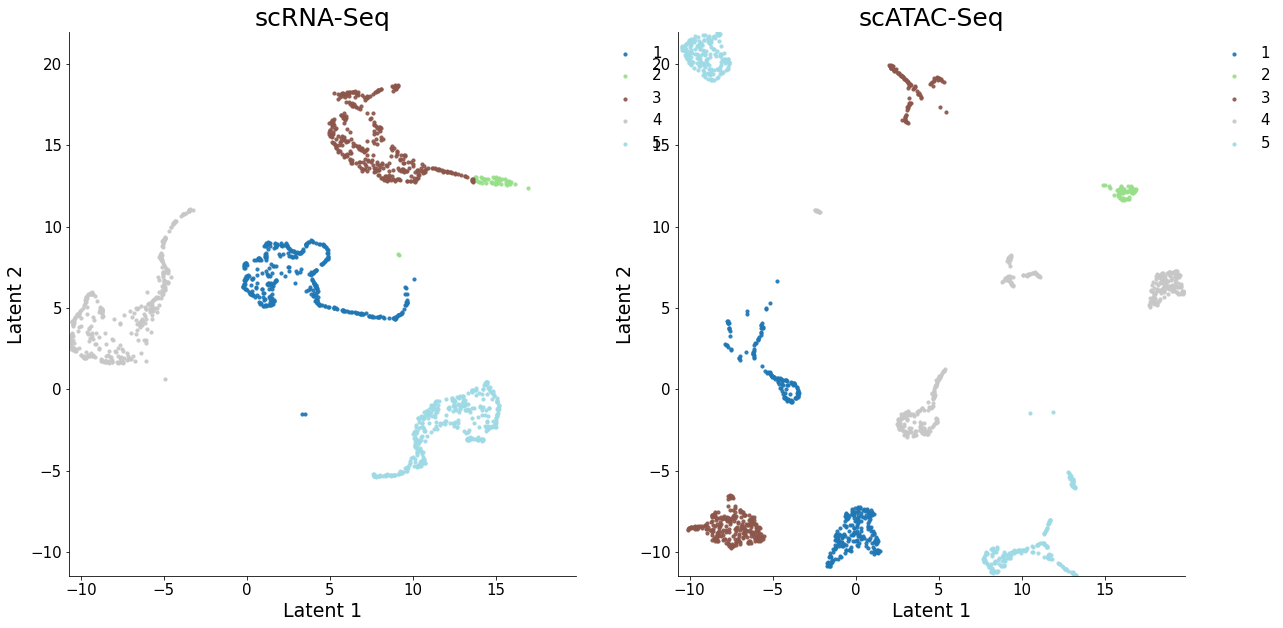

In [189]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = (model1.softmax(model1.C_1.cpu().detach())).numpy()
z_atac = model1.softmax(model1.C_2.cpu().detach()).numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = model1.meta_rna["pop"].values[:,None]
label_atac = model1.meta_atac["pop"].values[:,None]
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

None


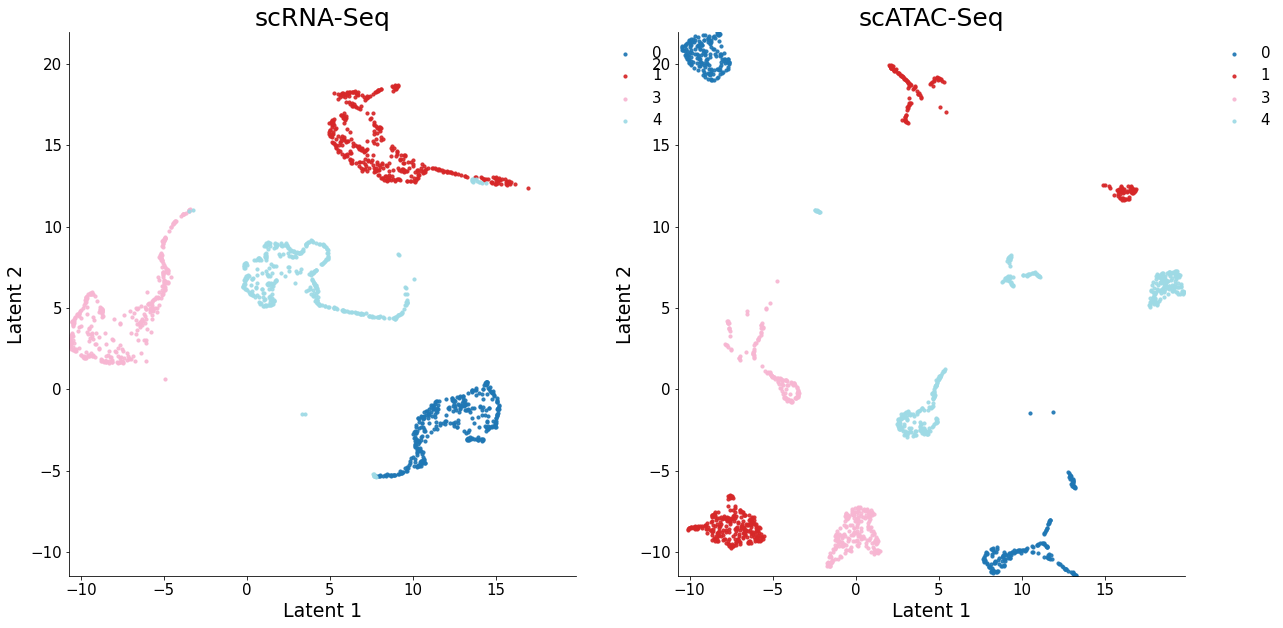

In [190]:
utils.plot_latent(z_rna, z_atac, max_rna, max_atac, mode= "separate", save = None)

In [3]:
model1 = model.sc_cfrm_np(dir = '../data/simulated/2b5c_ziqi2/', N = 5, batch_size = 0.1, interval = 10, lr = 1e-3, init = "random").to(device)
with torch.no_grad():
    loss, *_ = model1.batch_loss('valid')
    print('Initial Loss is {:.5f}'.format(loss.item()))

model1.train_func(T = 100)

Initial Loss is 1928.48157
412
476
Epoch 10, Validating Loss: 1069.1877
	 loss 1: 28.87382
	 loss 2: 1117.72668
	 loss 3: -67.68798
	 loss 4: -9.72468
	 loss 5: 0.00000
125
166
489
130
258
20
371
265
312
78
439
Epoch 20, Validating Loss: 793.3651
	 loss 1: 22.17808
	 loss 2: 847.23560
	 loss 3: -66.29712
	 loss 4: -9.75144
	 loss 5: 0.00000
204
55
439
208
10
424
78
492
138
Epoch 30, Validating Loss: 700.4619
	 loss 1: 21.98927
	 loss 2: 760.31354
	 loss 3: -72.02708
	 loss 4: -9.81382
	 loss 5: 0.00000
207
199
192
299
328
41
Epoch 40, Validating Loss: 656.8440
	 loss 1: 21.98608
	 loss 2: 722.41168
	 loss 3: -77.72038
	 loss 4: -9.83338
	 loss 5: 0.00000
442
22
12
Epoch 50, Validating Loss: 662.9462
	 loss 1: 21.99808
	 loss 2: 732.07886
	 loss 3: -81.28992
	 loss 4: -9.84084
	 loss 5: 0.00000
361
359
44
33
84
278
480
220
126
Epoch 60, Validating Loss: 691.5777
	 loss 1: 22.03226
	 loss 2: 762.75415
	 loss 3: -83.35299
	 loss 4: -9.85576
	 loss 5: 0.00000
457
375
Epoch 70, Validating L

In [161]:
import importlib 
importlib.reload(model)

<module 'model' from '/storage/hive/project/cse-vuduc/zzhang834/CFRM/src/model.py'>

In [168]:
model1 = model.sparse_nmf_deep(dir = '../data/simulated/2b3c_ziqi1/', N = 3, batch_size = 0.1, 
                             interval = 1, lr = 1e-3, alpha = [1000, 1000, 100, 0, 1e-2]).to(device)
with torch.no_grad():
    loss, *_ = model1.batch_loss('valid')
    print('Initial Loss is {:.5f}'.format(loss.item()))

model1.train_func(T = 10000)


Initial Loss is 2954.12427
Epoch 1, Validating Loss: 2951.4619
	 loss 1: 1128.16809
	 loss 2: 1896.85352
	 loss 3: -73.60247
	 loss 4: 0.00000
	 loss 5: 0.04286
Epoch 2, Validating Loss: 2947.4221
	 loss 1: 1126.42224
	 loss 2: 1894.55957
	 loss 3: -73.60275
	 loss 4: 0.00000
	 loss 5: 0.04286
Epoch 3, Validating Loss: 2942.5591
	 loss 1: 1124.32129
	 loss 2: 1891.79773
	 loss 3: -73.60304
	 loss 4: 0.00000
	 loss 5: 0.04286
Epoch 4, Validating Loss: 2937.1384
	 loss 1: 1121.98926
	 loss 2: 1888.70947
	 loss 3: -73.60335
	 loss 4: 0.00000
	 loss 5: 0.04286
Epoch 5, Validating Loss: 2931.2888
	 loss 1: 1119.47375
	 loss 2: 1885.37561
	 loss 3: -73.60357
	 loss 4: 0.00000
	 loss 5: 0.04286
Epoch 6, Validating Loss: 2925.1438
	 loss 1: 1116.83875
	 loss 2: 1881.86584
	 loss 3: -73.60387
	 loss 4: 0.00000
	 loss 5: 0.04286
Epoch 7, Validating Loss: 2918.7998
	 loss 1: 1114.11841
	 loss 2: 1878.24268
	 loss 3: -73.60428
	 loss 4: 0.00000
	 loss 5: 0.04286
Epoch 8, Validating Loss: 2912.2764

Epoch 70, Validating Loss: 2481.8513
	 loss 1: 928.64154
	 loss 2: 1626.81384
	 loss 3: -73.64681
	 loss 4: 0.00000
	 loss 5: 0.04284
Epoch 71, Validating Loss: 2475.3225
	 loss 1: 925.92249
	 loss 2: 1623.00464
	 loss 3: -73.64754
	 loss 4: 0.00000
	 loss 5: 0.04284
Epoch 72, Validating Loss: 2468.8013
	 loss 1: 923.21411
	 loss 2: 1619.19263
	 loss 3: -73.64815
	 loss 4: 0.00000
	 loss 5: 0.04284
Epoch 73, Validating Loss: 2462.2817
	 loss 1: 920.51337
	 loss 2: 1615.37439
	 loss 3: -73.64876
	 loss 4: 0.00000
	 loss 5: 0.04284
Epoch 74, Validating Loss: 2455.7937
	 loss 1: 917.83575
	 loss 2: 1611.56458
	 loss 3: -73.64953
	 loss 4: 0.00000
	 loss 5: 0.04284
Epoch 75, Validating Loss: 2449.3237
	 loss 1: 915.16705
	 loss 2: 1607.76428
	 loss 3: -73.65040
	 loss 4: 0.00000
	 loss 5: 0.04284
Epoch 76, Validating Loss: 2442.8450
	 loss 1: 912.48407
	 loss 2: 1603.96960
	 loss 3: -73.65125
	 loss 4: 0.00000
	 loss 5: 0.04284
Epoch 77, Validating Loss: 2436.3689
	 loss 1: 909.77997
	 los

Epoch 135, Validating Loss: 2087.7705
	 loss 1: 766.89258
	 loss 2: 1394.50745
	 loss 3: -73.67200
	 loss 4: 0.00000
	 loss 5: 0.04279
Epoch 136, Validating Loss: 2082.2136
	 loss 1: 764.65704
	 loss 2: 1391.18591
	 loss 3: -73.67207
	 loss 4: 0.00000
	 loss 5: 0.04279
Epoch 137, Validating Loss: 2076.6746
	 loss 1: 762.44208
	 loss 2: 1387.86194
	 loss 3: -73.67220
	 loss 4: 0.00000
	 loss 5: 0.04279
Epoch 138, Validating Loss: 2071.1526
	 loss 1: 760.23853
	 loss 2: 1384.54382
	 loss 3: -73.67226
	 loss 4: 0.00000
	 loss 5: 0.04279
Epoch 139, Validating Loss: 2065.6321
	 loss 1: 758.02985
	 loss 2: 1381.23181
	 loss 3: -73.67236
	 loss 4: 0.00000
	 loss 5: 0.04279
Epoch 140, Validating Loss: 2060.1155
	 loss 1: 755.81787
	 loss 2: 1377.92725
	 loss 3: -73.67243
	 loss 4: 0.00000
	 loss 5: 0.04279
Epoch 141, Validating Loss: 2054.6152
	 loss 1: 753.61237
	 loss 2: 1374.63257
	 loss 3: -73.67233
	 loss 4: 0.00000
	 loss 5: 0.04278
Epoch 142, Validating Loss: 2049.1270
	 loss 1: 751.406

Epoch 200, Validating Loss: 1753.0746
	 loss 1: 633.33228
	 loss 2: 1193.38501
	 loss 3: -73.68539
	 loss 4: 0.00000
	 loss 5: 0.04272
Epoch 201, Validating Loss: 1748.3652
	 loss 1: 631.49878
	 loss 2: 1190.50952
	 loss 3: -73.68578
	 loss 4: 0.00000
	 loss 5: 0.04271
Epoch 202, Validating Loss: 1743.6736
	 loss 1: 629.66400
	 loss 2: 1187.65308
	 loss 3: -73.68628
	 loss 4: 0.00000
	 loss 5: 0.04271
Epoch 203, Validating Loss: 1739.0073
	 loss 1: 627.82416
	 loss 2: 1184.82715
	 loss 3: -73.68678
	 loss 4: 0.00000
	 loss 5: 0.04271
Epoch 204, Validating Loss: 1734.3450
	 loss 1: 625.98621
	 loss 2: 1182.00330
	 loss 3: -73.68726
	 loss 4: 0.00000
	 loss 5: 0.04271
Epoch 205, Validating Loss: 1729.6830
	 loss 1: 624.14099
	 loss 2: 1179.18689
	 loss 3: -73.68758
	 loss 4: 0.00000
	 loss 5: 0.04271
Epoch 206, Validating Loss: 1725.0394
	 loss 1: 622.29956
	 loss 2: 1176.38489
	 loss 3: -73.68774
	 loss 4: 0.00000
	 loss 5: 0.04271
Epoch 207, Validating Loss: 1720.3955
	 loss 1: 620.447

Epoch 265, Validating Loss: 1469.5054
	 loss 1: 523.13983
	 loss 2: 1020.02539
	 loss 3: -73.70247
	 loss 4: 0.00000
	 loss 5: 0.04262
Epoch 266, Validating Loss: 1465.5231
	 loss 1: 521.62836
	 loss 2: 1017.55548
	 loss 3: -73.70338
	 loss 4: 0.00000
	 loss 5: 0.04262
Epoch 267, Validating Loss: 1461.5616
	 loss 1: 520.11804
	 loss 2: 1015.10510
	 loss 3: -73.70408
	 loss 4: 0.00000
	 loss 5: 0.04262
Epoch 268, Validating Loss: 1457.5951
	 loss 1: 518.60443
	 loss 2: 1012.65253
	 loss 3: -73.70449
	 loss 4: 0.00000
	 loss 5: 0.04262
Epoch 269, Validating Loss: 1453.6196
	 loss 1: 517.09521
	 loss 2: 1010.18646
	 loss 3: -73.70470
	 loss 4: 0.00000
	 loss 5: 0.04262
Epoch 270, Validating Loss: 1449.6569
	 loss 1: 515.59570
	 loss 2: 1007.72345
	 loss 3: -73.70487
	 loss 4: 0.00000
	 loss 5: 0.04262
Epoch 271, Validating Loss: 1445.6874
	 loss 1: 514.08801
	 loss 2: 1005.26178
	 loss 3: -73.70512
	 loss 4: 0.00000
	 loss 5: 0.04262
Epoch 272, Validating Loss: 1441.7378
	 loss 1: 512.599

Epoch 330, Validating Loss: 1230.4016
	 loss 1: 433.92715
	 loss 2: 870.15912
	 loss 3: -73.72721
	 loss 4: 0.00000
	 loss 5: 0.04252
Epoch 331, Validating Loss: 1227.0214
	 loss 1: 432.70245
	 loss 2: 868.00415
	 loss 3: -73.72771
	 loss 4: 0.00000
	 loss 5: 0.04252
Epoch 332, Validating Loss: 1223.6476
	 loss 1: 431.47159
	 loss 2: 865.86176
	 loss 3: -73.72822
	 loss 4: 0.00000
	 loss 5: 0.04252
Epoch 333, Validating Loss: 1220.3042
	 loss 1: 430.25296
	 loss 2: 863.73743
	 loss 3: -73.72865
	 loss 4: 0.00000
	 loss 5: 0.04252
Epoch 334, Validating Loss: 1216.9697
	 loss 1: 429.05255
	 loss 2: 861.60370
	 loss 3: -73.72898
	 loss 4: 0.00000
	 loss 5: 0.04252
Epoch 335, Validating Loss: 1213.6519
	 loss 1: 427.86636
	 loss 2: 859.47223
	 loss 3: -73.72931
	 loss 4: 0.00000
	 loss 5: 0.04251
Epoch 336, Validating Loss: 1210.3568
	 loss 1: 426.69492
	 loss 2: 857.34912
	 loss 3: -73.72974
	 loss 4: 0.00000
	 loss 5: 0.04251
Epoch 337, Validating Loss: 1207.0693
	 loss 1: 425.52234
	 lo

Epoch 394, Validating Loss: 1033.1141
	 loss 1: 362.54706
	 loss 2: 744.28033
	 loss 3: -73.75565
	 loss 4: 0.00000
	 loss 5: 0.04242
Epoch 395, Validating Loss: 1030.2939
	 loss 1: 361.52710
	 loss 2: 742.48053
	 loss 3: -73.75596
	 loss 4: 0.00000
	 loss 5: 0.04241
Epoch 396, Validating Loss: 1027.4696
	 loss 1: 360.49991
	 loss 2: 740.68359
	 loss 3: -73.75620
	 loss 4: 0.00000
	 loss 5: 0.04241
Epoch 397, Validating Loss: 1024.6577
	 loss 1: 359.46979
	 loss 2: 738.90198
	 loss 3: -73.75649
	 loss 4: 0.00000
	 loss 5: 0.04241
Epoch 398, Validating Loss: 1021.8371
	 loss 1: 358.43939
	 loss 2: 737.11206
	 loss 3: -73.75684
	 loss 4: 0.00000
	 loss 5: 0.04241
Epoch 399, Validating Loss: 1019.0096
	 loss 1: 357.40027
	 loss 2: 735.32416
	 loss 3: -73.75723
	 loss 4: 0.00000
	 loss 5: 0.04241
Epoch 400, Validating Loss: 1016.1774
	 loss 1: 356.35870
	 loss 2: 733.53394
	 loss 3: -73.75760
	 loss 4: 0.00000
	 loss 5: 0.04241
Epoch 401, Validating Loss: 1013.3439
	 loss 1: 355.31839
	 lo

Epoch 459, Validating Loss: 865.0211
	 loss 1: 302.81180
	 loss 2: 635.95020
	 loss 3: -73.78318
	 loss 4: 0.00000
	 loss 5: 0.04231
Epoch 460, Validating Loss: 862.6725
	 loss 1: 301.99509
	 loss 2: 634.41846
	 loss 3: -73.78332
	 loss 4: 0.00000
	 loss 5: 0.04230
Epoch 461, Validating Loss: 860.3331
	 loss 1: 301.18256
	 loss 2: 632.89172
	 loss 3: -73.78350
	 loss 4: 0.00000
	 loss 5: 0.04230
Epoch 462, Validating Loss: 857.9955
	 loss 1: 300.36932
	 loss 2: 631.36768
	 loss 3: -73.78379
	 loss 4: 0.00000
	 loss 5: 0.04230
Epoch 463, Validating Loss: 855.6741
	 loss 1: 299.56110
	 loss 2: 629.85474
	 loss 3: -73.78408
	 loss 4: 0.00000
	 loss 5: 0.04230
Epoch 464, Validating Loss: 853.3644
	 loss 1: 298.76254
	 loss 2: 628.34399
	 loss 3: -73.78442
	 loss 4: 0.00000
	 loss 5: 0.04230
Epoch 465, Validating Loss: 851.0394
	 loss 1: 297.96536
	 loss 2: 626.81671
	 loss 3: -73.78500
	 loss 4: 0.00000
	 loss 5: 0.04230
Epoch 466, Validating Loss: 848.7083
	 loss 1: 297.16937
	 loss 2: 62

Epoch 524, Validating Loss: 724.4441
	 loss 1: 254.67744
	 loss 2: 543.52411
	 loss 3: -73.79960
	 loss 4: 0.00000
	 loss 5: 0.04220
Epoch 525, Validating Loss: 722.4043
	 loss 1: 253.97145
	 loss 2: 542.19049
	 loss 3: -73.79983
	 loss 4: 0.00000
	 loss 5: 0.04219
Epoch 526, Validating Loss: 720.3760
	 loss 1: 253.27054
	 loss 2: 540.86334
	 loss 3: -73.80008
	 loss 4: 0.00000
	 loss 5: 0.04219
Epoch 527, Validating Loss: 718.3468
	 loss 1: 252.56595
	 loss 2: 539.53894
	 loss 3: -73.80025
	 loss 4: 0.00000
	 loss 5: 0.04219
Epoch 528, Validating Loss: 716.3282
	 loss 1: 251.86569
	 loss 2: 538.22052
	 loss 3: -73.80019
	 loss 4: 0.00000
	 loss 5: 0.04219
Epoch 529, Validating Loss: 714.3099
	 loss 1: 251.16962
	 loss 2: 536.89813
	 loss 3: -73.80007
	 loss 4: 0.00000
	 loss 5: 0.04219
Epoch 530, Validating Loss: 712.3019
	 loss 1: 250.47836
	 loss 2: 535.58142
	 loss 3: -73.80007
	 loss 4: 0.00000
	 loss 5: 0.04219
Epoch 531, Validating Loss: 710.3109
	 loss 1: 249.79089
	 loss 2: 53

Epoch 589, Validating Loss: 606.5200
	 loss 1: 214.94072
	 loss 2: 465.34985
	 loss 3: -73.81265
	 loss 4: 0.00000
	 loss 5: 0.04209
Epoch 590, Validating Loss: 604.8527
	 loss 1: 214.37051
	 loss 2: 464.25293
	 loss 3: -73.81284
	 loss 4: 0.00000
	 loss 5: 0.04209
Epoch 591, Validating Loss: 603.1869
	 loss 1: 213.80423
	 loss 2: 463.15366
	 loss 3: -73.81310
	 loss 4: 0.00000
	 loss 5: 0.04209
Epoch 592, Validating Loss: 601.5297
	 loss 1: 213.23969
	 loss 2: 462.06149
	 loss 3: -73.81354
	 loss 4: 0.00000
	 loss 5: 0.04208
Epoch 593, Validating Loss: 599.8810
	 loss 1: 212.67148
	 loss 2: 460.98151
	 loss 3: -73.81403
	 loss 4: 0.00000
	 loss 5: 0.04208
Epoch 594, Validating Loss: 598.2260
	 loss 1: 212.10876
	 loss 2: 459.88959
	 loss 3: -73.81445
	 loss 4: 0.00000
	 loss 5: 0.04208
Epoch 595, Validating Loss: 596.5611
	 loss 1: 211.54012
	 loss 2: 458.79373
	 loss 3: -73.81479
	 loss 4: 0.00000
	 loss 5: 0.04208
Epoch 596, Validating Loss: 594.9048
	 loss 1: 210.97310
	 loss 2: 45

Epoch 654, Validating Loss: 507.0223
	 loss 1: 181.97618
	 loss 2: 398.83472
	 loss 3: -73.83056
	 loss 4: 0.00000
	 loss 5: 0.04199
Epoch 655, Validating Loss: 505.6227
	 loss 1: 181.51341
	 loss 2: 397.89816
	 loss 3: -73.83086
	 loss 4: 0.00000
	 loss 5: 0.04199
Epoch 656, Validating Loss: 504.2200
	 loss 1: 181.04659
	 loss 2: 396.96259
	 loss 3: -73.83116
	 loss 4: 0.00000
	 loss 5: 0.04198
Epoch 657, Validating Loss: 502.8327
	 loss 1: 180.58768
	 loss 2: 396.03448
	 loss 3: -73.83148
	 loss 4: 0.00000
	 loss 5: 0.04198
Epoch 658, Validating Loss: 501.4549
	 loss 1: 180.13692
	 loss 2: 395.10776
	 loss 3: -73.83183
	 loss 4: 0.00000
	 loss 5: 0.04198
Epoch 659, Validating Loss: 500.0781
	 loss 1: 179.68819
	 loss 2: 394.18015
	 loss 3: -73.83220
	 loss 4: 0.00000
	 loss 5: 0.04198
Epoch 660, Validating Loss: 498.7058
	 loss 1: 179.23895
	 loss 2: 393.25742
	 loss 3: -73.83253
	 loss 4: 0.00000
	 loss 5: 0.04198
Epoch 661, Validating Loss: 497.3250
	 loss 1: 178.78746
	 loss 2: 39

Epoch 719, Validating Loss: 424.4087
	 loss 1: 154.71735
	 loss 2: 343.49789
	 loss 3: -73.84844
	 loss 4: 0.00000
	 loss 5: 0.04189
Epoch 720, Validating Loss: 423.2630
	 loss 1: 154.34764
	 loss 2: 342.72214
	 loss 3: -73.84867
	 loss 4: 0.00000
	 loss 5: 0.04189
Epoch 721, Validating Loss: 422.1104
	 loss 1: 153.97037
	 loss 2: 341.94705
	 loss 3: -73.84892
	 loss 4: 0.00000
	 loss 5: 0.04189
Epoch 722, Validating Loss: 420.9630
	 loss 1: 153.59590
	 loss 2: 341.17450
	 loss 3: -73.84925
	 loss 4: 0.00000
	 loss 5: 0.04189
Epoch 723, Validating Loss: 419.8265
	 loss 1: 153.22231
	 loss 2: 340.41187
	 loss 3: -73.84950
	 loss 4: 0.00000
	 loss 5: 0.04188
Epoch 724, Validating Loss: 418.6880
	 loss 1: 152.84720
	 loss 2: 339.64865
	 loss 3: -73.84972
	 loss 4: 0.00000
	 loss 5: 0.04188
Epoch 725, Validating Loss: 417.5463
	 loss 1: 152.47530
	 loss 2: 338.87909
	 loss 3: -73.84991
	 loss 4: 0.00000
	 loss 5: 0.04188
Epoch 726, Validating Loss: 416.4080
	 loss 1: 152.10805
	 loss 2: 33

Epoch 785, Validating Loss: 354.5873
	 loss 1: 132.08362
	 loss 2: 296.31363
	 loss 3: -73.85171
	 loss 4: 0.00000
	 loss 5: 0.04180
Epoch 786, Validating Loss: 353.6163
	 loss 1: 131.77501
	 loss 2: 295.65112
	 loss 3: -73.85163
	 loss 4: 0.00000
	 loss 5: 0.04180
Epoch 787, Validating Loss: 352.6528
	 loss 1: 131.46469
	 loss 2: 294.99780
	 loss 3: -73.85150
	 loss 4: 0.00000
	 loss 5: 0.04180
Epoch 788, Validating Loss: 351.6930
	 loss 1: 131.15063
	 loss 2: 294.35193
	 loss 3: -73.85136
	 loss 4: 0.00000
	 loss 5: 0.04179
Epoch 789, Validating Loss: 350.7397
	 loss 1: 130.83482
	 loss 2: 293.71436
	 loss 3: -73.85123
	 loss 4: 0.00000
	 loss 5: 0.04179
Epoch 790, Validating Loss: 349.7890
	 loss 1: 130.51897
	 loss 2: 293.07922
	 loss 3: -73.85103
	 loss 4: 0.00000
	 loss 5: 0.04179
Epoch 791, Validating Loss: 348.8322
	 loss 1: 130.20435
	 loss 2: 292.43677
	 loss 3: -73.85072
	 loss 4: 0.00000
	 loss 5: 0.04179
Epoch 792, Validating Loss: 347.8844
	 loss 1: 129.89641
	 loss 2: 29

Epoch 854, Validating Loss: 293.2180
	 loss 1: 112.23840
	 loss 2: 254.78348
	 loss 3: -73.84558
	 loss 4: 0.00000
	 loss 5: 0.04171
Epoch 855, Validating Loss: 292.4149
	 loss 1: 111.97430
	 loss 2: 254.24442
	 loss 3: -73.84549
	 loss 4: 0.00000
	 loss 5: 0.04171
Epoch 856, Validating Loss: 291.6085
	 loss 1: 111.71015
	 loss 2: 253.70210
	 loss 3: -73.84550
	 loss 4: 0.00000
	 loss 5: 0.04171
Epoch 857, Validating Loss: 290.7945
	 loss 1: 111.44661
	 loss 2: 253.15169
	 loss 3: -73.84554
	 loss 4: 0.00000
	 loss 5: 0.04170
Epoch 858, Validating Loss: 289.9748
	 loss 1: 111.17979
	 loss 2: 252.59894
	 loss 3: -73.84566
	 loss 4: 0.00000
	 loss 5: 0.04170
Epoch 859, Validating Loss: 289.1635
	 loss 1: 110.91665
	 loss 2: 252.05084
	 loss 3: -73.84569
	 loss 4: 0.00000
	 loss 5: 0.04170
Epoch 860, Validating Loss: 288.3595
	 loss 1: 110.65829
	 loss 2: 251.50520
	 loss 3: -73.84569
	 loss 4: 0.00000
	 loss 5: 0.04170
Epoch 861, Validating Loss: 287.5583
	 loss 1: 110.40131
	 loss 2: 25

Epoch 921, Validating Loss: 243.6537
	 loss 1: 96.37936
	 loss 2: 221.07370
	 loss 3: -73.84094
	 loss 4: 0.00000
	 loss 5: 0.04163
Epoch 922, Validating Loss: 242.9930
	 loss 1: 96.16364
	 loss 2: 220.62849
	 loss 3: -73.84080
	 loss 4: 0.00000
	 loss 5: 0.04162
Epoch 923, Validating Loss: 242.3280
	 loss 1: 95.94774
	 loss 2: 220.17929
	 loss 3: -73.84061
	 loss 4: 0.00000
	 loss 5: 0.04162
Epoch 924, Validating Loss: 241.6667
	 loss 1: 95.73199
	 loss 2: 219.73347
	 loss 3: -73.84040
	 loss 4: 0.00000
	 loss 5: 0.04162
Epoch 925, Validating Loss: 241.0036
	 loss 1: 95.51606
	 loss 2: 219.28606
	 loss 3: -73.84014
	 loss 4: 0.00000
	 loss 5: 0.04162
Epoch 926, Validating Loss: 240.3401
	 loss 1: 95.30254
	 loss 2: 218.83583
	 loss 3: -73.83986
	 loss 4: 0.00000
	 loss 5: 0.04162
Epoch 927, Validating Loss: 239.6743
	 loss 1: 95.09014
	 loss 2: 218.38225
	 loss 3: -73.83970
	 loss 4: 0.00000
	 loss 5: 0.04162
Epoch 928, Validating Loss: 239.0128
	 loss 1: 94.88246
	 loss 2: 217.92819


Epoch 989, Validating Loss: 202.2723
	 loss 1: 83.41135
	 loss 2: 192.65242
	 loss 3: -73.83305
	 loss 4: 0.00000
	 loss 5: 0.04155
Epoch 990, Validating Loss: 201.7210
	 loss 1: 83.24396
	 loss 2: 192.26855
	 loss 3: -73.83310
	 loss 4: 0.00000
	 loss 5: 0.04155
Epoch 991, Validating Loss: 201.1705
	 loss 1: 83.07349
	 loss 2: 191.88870
	 loss 3: -73.83325
	 loss 4: 0.00000
	 loss 5: 0.04155
Epoch 992, Validating Loss: 200.6224
	 loss 1: 82.90219
	 loss 2: 191.51207
	 loss 3: -73.83340
	 loss 4: 0.00000
	 loss 5: 0.04155
Epoch 993, Validating Loss: 200.0814
	 loss 1: 82.73203
	 loss 2: 191.14133
	 loss 3: -73.83348
	 loss 4: 0.00000
	 loss 5: 0.04155
Epoch 994, Validating Loss: 199.5435
	 loss 1: 82.56398
	 loss 2: 190.77161
	 loss 3: -73.83362
	 loss 4: 0.00000
	 loss 5: 0.04155
Epoch 995, Validating Loss: 199.0036
	 loss 1: 82.39512
	 loss 2: 190.40070
	 loss 3: -73.83372
	 loss 4: 0.00000
	 loss 5: 0.04155
Epoch 996, Validating Loss: 198.4635
	 loss 1: 82.22837
	 loss 2: 190.02730


Epoch 1054, Validating Loss: 169.2853
	 loss 1: 73.09566
	 loss 2: 169.97095
	 loss 3: -73.82282
	 loss 4: 0.00000
	 loss 5: 0.04149
Epoch 1055, Validating Loss: 168.8103
	 loss 1: 72.95000
	 loss 2: 169.64137
	 loss 3: -73.82253
	 loss 4: 0.00000
	 loss 5: 0.04149
Epoch 1056, Validating Loss: 168.3349
	 loss 1: 72.80454
	 loss 2: 169.31120
	 loss 3: -73.82231
	 loss 4: 0.00000
	 loss 5: 0.04148
Epoch 1057, Validating Loss: 167.8582
	 loss 1: 72.65980
	 loss 2: 168.97908
	 loss 3: -73.82213
	 loss 4: 0.00000
	 loss 5: 0.04148
Epoch 1058, Validating Loss: 167.3799
	 loss 1: 72.51440
	 loss 2: 168.64597
	 loss 3: -73.82198
	 loss 4: 0.00000
	 loss 5: 0.04148
Epoch 1059, Validating Loss: 166.9036
	 loss 1: 72.36974
	 loss 2: 168.31424
	 loss 3: -73.82183
	 loss 4: 0.00000
	 loss 5: 0.04148
Epoch 1060, Validating Loss: 166.4263
	 loss 1: 72.22508
	 loss 2: 167.98137
	 loss 3: -73.82166
	 loss 4: 0.00000
	 loss 5: 0.04148
Epoch 1061, Validating Loss: 165.9520
	 loss 1: 72.07929
	 loss 2: 16

Epoch 1119, Validating Loss: 141.3299
	 loss 1: 64.54025
	 loss 2: 150.55447
	 loss 3: -73.80625
	 loss 4: 0.00000
	 loss 5: 0.04143
Epoch 1120, Validating Loss: 140.9397
	 loss 1: 64.41919
	 loss 2: 150.28513
	 loss 3: -73.80604
	 loss 4: 0.00000
	 loss 5: 0.04142
Epoch 1121, Validating Loss: 140.5535
	 loss 1: 64.30032
	 loss 2: 150.01764
	 loss 3: -73.80589
	 loss 4: 0.00000
	 loss 5: 0.04142
Epoch 1122, Validating Loss: 140.1731
	 loss 1: 64.18372
	 loss 2: 149.75366
	 loss 3: -73.80573
	 loss 4: 0.00000
	 loss 5: 0.04142
Epoch 1123, Validating Loss: 139.7925
	 loss 1: 64.06766
	 loss 2: 149.48897
	 loss 3: -73.80558
	 loss 4: 0.00000
	 loss 5: 0.04142
Epoch 1124, Validating Loss: 139.4099
	 loss 1: 63.95145
	 loss 2: 149.22238
	 loss 3: -73.80540
	 loss 4: 0.00000
	 loss 5: 0.04142
Epoch 1125, Validating Loss: 139.0264
	 loss 1: 63.83498
	 loss 2: 148.95520
	 loss 3: -73.80520
	 loss 4: 0.00000
	 loss 5: 0.04142
Epoch 1126, Validating Loss: 138.6483
	 loss 1: 63.72155
	 loss 2: 14

Epoch 1184, Validating Loss: 118.2274
	 loss 1: 57.63104
	 loss 2: 134.34985
	 loss 3: -73.79488
	 loss 4: 0.00000
	 loss 5: 0.04137
Epoch 1185, Validating Loss: 117.9014
	 loss 1: 57.53444
	 loss 2: 134.12039
	 loss 3: -73.79477
	 loss 4: 0.00000
	 loss 5: 0.04137
Epoch 1186, Validating Loss: 117.5756
	 loss 1: 57.43665
	 loss 2: 133.89232
	 loss 3: -73.79469
	 loss 4: 0.00000
	 loss 5: 0.04137
Epoch 1187, Validating Loss: 117.2546
	 loss 1: 57.33995
	 loss 2: 133.66788
	 loss 3: -73.79460
	 loss 4: 0.00000
	 loss 5: 0.04137
Epoch 1188, Validating Loss: 116.9353
	 loss 1: 57.24393
	 loss 2: 133.44438
	 loss 3: -73.79440
	 loss 4: 0.00000
	 loss 5: 0.04137
Epoch 1189, Validating Loss: 116.6159
	 loss 1: 57.14814
	 loss 2: 133.22061
	 loss 3: -73.79423
	 loss 4: 0.00000
	 loss 5: 0.04137
Epoch 1190, Validating Loss: 116.2978
	 loss 1: 57.05264
	 loss 2: 132.99785
	 loss 3: -73.79402
	 loss 4: 0.00000
	 loss 5: 0.04137
Epoch 1191, Validating Loss: 115.9814
	 loss 1: 56.95739
	 loss 2: 13

Epoch 1249, Validating Loss: 99.0705
	 loss 1: 52.11203
	 loss 2: 120.70350
	 loss 3: -73.78637
	 loss 4: 0.00000
	 loss 5: 0.04132
Epoch 1250, Validating Loss: 98.7981
	 loss 1: 52.03508
	 loss 2: 120.50818
	 loss 3: -73.78648
	 loss 4: 0.00000
	 loss 5: 0.04132
Epoch 1251, Validating Loss: 98.5288
	 loss 1: 51.95953
	 loss 2: 120.31450
	 loss 3: -73.78653
	 loss 4: 0.00000
	 loss 5: 0.04132
Epoch 1252, Validating Loss: 98.2642
	 loss 1: 51.88602
	 loss 2: 120.12337
	 loss 3: -73.78654
	 loss 4: 0.00000
	 loss 5: 0.04132
Epoch 1253, Validating Loss: 97.9984
	 loss 1: 51.81123
	 loss 2: 119.93237
	 loss 3: -73.78652
	 loss 4: 0.00000
	 loss 5: 0.04132
Epoch 1254, Validating Loss: 97.7301
	 loss 1: 51.73537
	 loss 2: 119.73982
	 loss 3: -73.78642
	 loss 4: 0.00000
	 loss 5: 0.04132
Epoch 1255, Validating Loss: 97.4658
	 loss 1: 51.66021
	 loss 2: 119.55058
	 loss 3: -73.78632
	 loss 4: 0.00000
	 loss 5: 0.04132
Epoch 1256, Validating Loss: 97.2016
	 loss 1: 51.58474
	 loss 2: 119.36176


Epoch 1314, Validating Loss: 82.9749
	 loss 1: 47.54808
	 loss 2: 109.16159
	 loss 3: -73.77602
	 loss 4: 0.00000
	 loss 5: 0.04128
Epoch 1315, Validating Loss: 82.7509
	 loss 1: 47.48400
	 loss 2: 109.00146
	 loss 3: -73.77585
	 loss 4: 0.00000
	 loss 5: 0.04128
Epoch 1316, Validating Loss: 82.5291
	 loss 1: 47.42119
	 loss 2: 108.84243
	 loss 3: -73.77575
	 loss 4: 0.00000
	 loss 5: 0.04128
Epoch 1317, Validating Loss: 82.3089
	 loss 1: 47.35868
	 loss 2: 108.68460
	 loss 3: -73.77561
	 loss 4: 0.00000
	 loss 5: 0.04128
Epoch 1318, Validating Loss: 82.0886
	 loss 1: 47.29642
	 loss 2: 108.52637
	 loss 3: -73.77548
	 loss 4: 0.00000
	 loss 5: 0.04127
Epoch 1319, Validating Loss: 81.8672
	 loss 1: 47.23529
	 loss 2: 108.36604
	 loss 3: -73.77536
	 loss 4: 0.00000
	 loss 5: 0.04127
Epoch 1320, Validating Loss: 81.6435
	 loss 1: 47.17384
	 loss 2: 108.20374
	 loss 3: -73.77531
	 loss 4: 0.00000
	 loss 5: 0.04127
Epoch 1321, Validating Loss: 81.4206
	 loss 1: 47.11260
	 loss 2: 108.04195


Epoch 1379, Validating Loss: 69.6965
	 loss 1: 43.92530
	 loss 2: 99.50012
	 loss 3: -73.77013
	 loss 4: 0.00000
	 loss 5: 0.04124
Epoch 1380, Validating Loss: 69.5088
	 loss 1: 43.87709
	 loss 2: 99.36032
	 loss 3: -73.76985
	 loss 4: 0.00000
	 loss 5: 0.04124
Epoch 1381, Validating Loss: 69.3207
	 loss 1: 43.82933
	 loss 2: 99.21973
	 loss 3: -73.76957
	 loss 4: 0.00000
	 loss 5: 0.04124
Epoch 1382, Validating Loss: 69.1342
	 loss 1: 43.78136
	 loss 2: 99.08097
	 loss 3: -73.76941
	 loss 4: 0.00000
	 loss 5: 0.04124
Epoch 1383, Validating Loss: 68.9493
	 loss 1: 43.73378
	 loss 2: 98.94355
	 loss 3: -73.76932
	 loss 4: 0.00000
	 loss 5: 0.04123
Epoch 1384, Validating Loss: 68.7649
	 loss 1: 43.68612
	 loss 2: 98.80676
	 loss 3: -73.76917
	 loss 4: 0.00000
	 loss 5: 0.04123
Epoch 1385, Validating Loss: 68.5813
	 loss 1: 43.63800
	 loss 2: 98.67112
	 loss 3: -73.76904
	 loss 4: 0.00000
	 loss 5: 0.04123
Epoch 1386, Validating Loss: 68.3978
	 loss 1: 43.58999
	 loss 2: 98.53557
	 loss 3

Epoch 1444, Validating Loss: 58.7529
	 loss 1: 41.11555
	 loss 2: 91.36253
	 loss 3: -73.76637
	 loss 4: 0.00000
	 loss 5: 0.04120
Epoch 1445, Validating Loss: 58.6002
	 loss 1: 41.07611
	 loss 2: 91.24915
	 loss 3: -73.76626
	 loss 4: 0.00000
	 loss 5: 0.04120
Epoch 1446, Validating Loss: 58.4499
	 loss 1: 41.03672
	 loss 2: 91.13815
	 loss 3: -73.76615
	 loss 4: 0.00000
	 loss 5: 0.04120
Epoch 1447, Validating Loss: 58.2999
	 loss 1: 40.99800
	 loss 2: 91.02678
	 loss 3: -73.76604
	 loss 4: 0.00000
	 loss 5: 0.04120
Epoch 1448, Validating Loss: 58.1519
	 loss 1: 40.95970
	 loss 2: 90.91687
	 loss 3: -73.76590
	 loss 4: 0.00000
	 loss 5: 0.04120
Epoch 1449, Validating Loss: 58.0027
	 loss 1: 40.92136
	 loss 2: 90.80589
	 loss 3: -73.76575
	 loss 4: 0.00000
	 loss 5: 0.04120
Epoch 1450, Validating Loss: 57.8532
	 loss 1: 40.88258
	 loss 2: 90.69508
	 loss 3: -73.76562
	 loss 4: 0.00000
	 loss 5: 0.04120
Epoch 1451, Validating Loss: 57.7039
	 loss 1: 40.84408
	 loss 2: 90.58417
	 loss 3

Epoch 1509, Validating Loss: 49.7358
	 loss 1: 38.82107
	 loss 2: 84.64507
	 loss 3: -73.77148
	 loss 4: 0.00000
	 loss 5: 0.04117
Epoch 1510, Validating Loss: 49.6067
	 loss 1: 38.78889
	 loss 2: 84.54845
	 loss 3: -73.77177
	 loss 4: 0.00000
	 loss 5: 0.04117
Epoch 1511, Validating Loss: 49.4770
	 loss 1: 38.75645
	 loss 2: 84.45139
	 loss 3: -73.77203
	 loss 4: 0.00000
	 loss 5: 0.04117
Epoch 1512, Validating Loss: 49.3480
	 loss 1: 38.72413
	 loss 2: 84.35499
	 loss 3: -73.77228
	 loss 4: 0.00000
	 loss 5: 0.04117
Epoch 1513, Validating Loss: 49.2193
	 loss 1: 38.69214
	 loss 2: 84.25848
	 loss 3: -73.77254
	 loss 4: 0.00000
	 loss 5: 0.04117
Epoch 1514, Validating Loss: 49.0924
	 loss 1: 38.66065
	 loss 2: 84.16334
	 loss 3: -73.77274
	 loss 4: 0.00000
	 loss 5: 0.04117
Epoch 1515, Validating Loss: 48.9678
	 loss 1: 38.63010
	 loss 2: 84.06945
	 loss 3: -73.77290
	 loss 4: 0.00000
	 loss 5: 0.04117
Epoch 1516, Validating Loss: 48.8431
	 loss 1: 38.59982
	 loss 2: 83.97517
	 loss 3

Epoch 1574, Validating Loss: 42.2995
	 loss 1: 37.03426
	 loss 2: 79.00399
	 loss 3: -73.77993
	 loss 4: 0.00000
	 loss 5: 0.04114
Epoch 1575, Validating Loss: 42.1979
	 loss 1: 37.01155
	 loss 2: 78.92537
	 loss 3: -73.78019
	 loss 4: 0.00000
	 loss 5: 0.04114
Epoch 1576, Validating Loss: 42.0970
	 loss 1: 36.98895
	 loss 2: 78.84739
	 loss 3: -73.78049
	 loss 4: 0.00000
	 loss 5: 0.04114
Epoch 1577, Validating Loss: 41.9960
	 loss 1: 36.96605
	 loss 2: 78.76958
	 loss 3: -73.78078
	 loss 4: 0.00000
	 loss 5: 0.04114
Epoch 1578, Validating Loss: 41.8944
	 loss 1: 36.94355
	 loss 2: 78.69083
	 loss 3: -73.78112
	 loss 4: 0.00000
	 loss 5: 0.04114
Epoch 1579, Validating Loss: 41.7929
	 loss 1: 36.92094
	 loss 2: 78.61230
	 loss 3: -73.78149
	 loss 4: 0.00000
	 loss 5: 0.04114
Epoch 1580, Validating Loss: 41.6919
	 loss 1: 36.89832
	 loss 2: 78.53430
	 loss 3: -73.78184
	 loss 4: 0.00000
	 loss 5: 0.04114
Epoch 1581, Validating Loss: 41.5914
	 loss 1: 36.87564
	 loss 2: 78.45672
	 loss 3

Epoch 1639, Validating Loss: 36.3536
	 loss 1: 35.69307
	 loss 2: 74.41825
	 loss 3: -73.79884
	 loss 4: 0.00000
	 loss 5: 0.04112
Epoch 1640, Validating Loss: 36.2713
	 loss 1: 35.67476
	 loss 2: 74.35474
	 loss 3: -73.79928
	 loss 4: 0.00000
	 loss 5: 0.04111
Epoch 1641, Validating Loss: 36.1894
	 loss 1: 35.65658
	 loss 2: 74.29150
	 loss 3: -73.79979
	 loss 4: 0.00000
	 loss 5: 0.04111
Epoch 1642, Validating Loss: 36.1074
	 loss 1: 35.63856
	 loss 2: 74.22794
	 loss 3: -73.80024
	 loss 4: 0.00000
	 loss 5: 0.04111
Epoch 1643, Validating Loss: 36.0253
	 loss 1: 35.62065
	 loss 2: 74.16415
	 loss 3: -73.80059
	 loss 4: 0.00000
	 loss 5: 0.04111
Epoch 1644, Validating Loss: 35.9442
	 loss 1: 35.60301
	 loss 2: 74.10087
	 loss 3: -73.80083
	 loss 4: 0.00000
	 loss 5: 0.04111
Epoch 1645, Validating Loss: 35.8641
	 loss 1: 35.58545
	 loss 2: 74.03865
	 loss 3: -73.80113
	 loss 4: 0.00000
	 loss 5: 0.04111
Epoch 1646, Validating Loss: 35.7850
	 loss 1: 35.56802
	 loss 2: 73.97731
	 loss 3

Epoch 1704, Validating Loss: 31.6248
	 loss 1: 34.69778
	 loss 2: 70.70467
	 loss 3: -73.81871
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 1705, Validating Loss: 31.5605
	 loss 1: 34.68539
	 loss 2: 70.65295
	 loss 3: -73.81893
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 1706, Validating Loss: 31.4957
	 loss 1: 34.67276
	 loss 2: 70.60103
	 loss 3: -73.81917
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 1707, Validating Loss: 31.4306
	 loss 1: 34.65993
	 loss 2: 70.54900
	 loss 3: -73.81944
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 1708, Validating Loss: 31.3648
	 loss 1: 34.64700
	 loss 2: 70.49652
	 loss 3: -73.81978
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 1709, Validating Loss: 31.2992
	 loss 1: 34.63364
	 loss 2: 70.44460
	 loss 3: -73.82018
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 1710, Validating Loss: 31.2341
	 loss 1: 34.62019
	 loss 2: 70.39342
	 loss 3: -73.82063
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 1711, Validating Loss: 31.1698
	 loss 1: 34.60711
	 loss 2: 70.34270
	 loss 3

Epoch 1772, Validating Loss: 27.6846
	 loss 1: 33.91986
	 loss 2: 67.57137
	 loss 3: -73.84771
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 1773, Validating Loss: 27.6344
	 loss 1: 33.91085
	 loss 2: 67.53053
	 loss 3: -73.84803
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 1774, Validating Loss: 27.5848
	 loss 1: 33.90197
	 loss 2: 67.49007
	 loss 3: -73.84828
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 1775, Validating Loss: 27.5348
	 loss 1: 33.89304
	 loss 2: 67.44931
	 loss 3: -73.84863
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 1776, Validating Loss: 27.4845
	 loss 1: 33.88400
	 loss 2: 67.40847
	 loss 3: -73.84901
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 1777, Validating Loss: 27.4348
	 loss 1: 33.87500
	 loss 2: 67.36814
	 loss 3: -73.84943
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 1778, Validating Loss: 27.3858
	 loss 1: 33.86632
	 loss 2: 67.32829
	 loss 3: -73.84985
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 1779, Validating Loss: 27.3378
	 loss 1: 33.85776
	 loss 2: 67.28926
	 loss 3

Epoch 1839, Validating Loss: 24.6629
	 loss 1: 33.36725
	 loss 2: 65.13914
	 loss 3: -73.88454
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 1840, Validating Loss: 24.6233
	 loss 1: 33.36001
	 loss 2: 65.10750
	 loss 3: -73.88524
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 1841, Validating Loss: 24.5834
	 loss 1: 33.35300
	 loss 2: 65.07528
	 loss 3: -73.88596
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 1842, Validating Loss: 24.5431
	 loss 1: 33.34596
	 loss 2: 65.04270
	 loss 3: -73.88666
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 1843, Validating Loss: 24.5028
	 loss 1: 33.33889
	 loss 2: 65.01019
	 loss 3: -73.88732
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 1844, Validating Loss: 24.4620
	 loss 1: 33.33181
	 loss 2: 64.97699
	 loss 3: -73.88789
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 1845, Validating Loss: 24.4208
	 loss 1: 33.32446
	 loss 2: 64.94370
	 loss 3: -73.88842
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 1846, Validating Loss: 24.3794
	 loss 1: 33.31713
	 loss 2: 64.91010
	 loss 3

Epoch 1904, Validating Loss: 22.3485
	 loss 1: 32.96654
	 loss 2: 63.26583
	 loss 3: -73.92487
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 1905, Validating Loss: 22.3171
	 loss 1: 32.96170
	 loss 2: 63.24011
	 loss 3: -73.92580
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 1906, Validating Loss: 22.2861
	 loss 1: 32.95693
	 loss 2: 63.21486
	 loss 3: -73.92677
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 1907, Validating Loss: 22.2555
	 loss 1: 32.95200
	 loss 2: 63.19014
	 loss 3: -73.92773
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 1908, Validating Loss: 22.2250
	 loss 1: 32.94703
	 loss 2: 63.16549
	 loss 3: -73.92857
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 1909, Validating Loss: 22.1950
	 loss 1: 32.94210
	 loss 2: 63.14122
	 loss 3: -73.92935
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 1910, Validating Loss: 22.1654
	 loss 1: 32.93723
	 loss 2: 63.11732
	 loss 3: -73.93018
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 1911, Validating Loss: 22.1361
	 loss 1: 32.93225
	 loss 2: 63.09392
	 loss 3

Epoch 1969, Validating Loss: 20.6091
	 loss 1: 32.68451
	 loss 2: 61.86226
	 loss 3: -73.97873
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 1970, Validating Loss: 20.5854
	 loss 1: 32.68106
	 loss 2: 61.84287
	 loss 3: -73.97961
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 1971, Validating Loss: 20.5619
	 loss 1: 32.67773
	 loss 2: 61.82365
	 loss 3: -73.98048
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 1972, Validating Loss: 20.5385
	 loss 1: 32.67455
	 loss 2: 61.80429
	 loss 3: -73.98137
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 1973, Validating Loss: 20.5149
	 loss 1: 32.67139
	 loss 2: 61.78487
	 loss 3: -73.98238
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 1974, Validating Loss: 20.4911
	 loss 1: 32.66824
	 loss 2: 61.76521
	 loss 3: -73.98338
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 1975, Validating Loss: 20.4677
	 loss 1: 32.66512
	 loss 2: 61.74595
	 loss 3: -73.98438
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 1976, Validating Loss: 20.4450
	 loss 1: 32.66206
	 loss 2: 61.72718
	 loss 3

Epoch 2034, Validating Loss: 19.2386
	 loss 1: 32.49776
	 loss 2: 60.73501
	 loss 3: -74.03522
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2035, Validating Loss: 19.2203
	 loss 1: 32.49549
	 loss 2: 60.71991
	 loss 3: -74.03609
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2036, Validating Loss: 19.2021
	 loss 1: 32.49322
	 loss 2: 60.70492
	 loss 3: -74.03703
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2037, Validating Loss: 19.1842
	 loss 1: 32.49102
	 loss 2: 60.69017
	 loss 3: -74.03801
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2038, Validating Loss: 19.1665
	 loss 1: 32.48884
	 loss 2: 60.67566
	 loss 3: -74.03901
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2039, Validating Loss: 19.1490
	 loss 1: 32.48671
	 loss 2: 60.66124
	 loss 3: -74.03999
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2040, Validating Loss: 19.1315
	 loss 1: 32.48453
	 loss 2: 60.64690
	 loss 3: -74.04096
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2041, Validating Loss: 19.1143
	 loss 1: 32.48229
	 loss 2: 60.63274
	 loss 3

Epoch 2099, Validating Loss: 18.2018
	 loss 1: 32.36503
	 loss 2: 59.89181
	 loss 3: -74.09605
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2100, Validating Loss: 18.1884
	 loss 1: 32.36344
	 loss 2: 59.88098
	 loss 3: -74.09705
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2101, Validating Loss: 18.1748
	 loss 1: 32.36189
	 loss 2: 59.86997
	 loss 3: -74.09808
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2102, Validating Loss: 18.1613
	 loss 1: 32.36042
	 loss 2: 59.85905
	 loss 3: -74.09920
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2103, Validating Loss: 18.1479
	 loss 1: 32.35901
	 loss 2: 59.84826
	 loss 3: -74.10035
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2104, Validating Loss: 18.1348
	 loss 1: 32.35759
	 loss 2: 59.83770
	 loss 3: -74.10151
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2105, Validating Loss: 18.1216
	 loss 1: 32.35618
	 loss 2: 59.82703
	 loss 3: -74.10266
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2106, Validating Loss: 18.1082
	 loss 1: 32.35479
	 loss 2: 59.81618
	 loss 3

Epoch 2164, Validating Loss: 17.3978
	 loss 1: 32.27930
	 loss 2: 59.24067
	 loss 3: -74.16318
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2165, Validating Loss: 17.3873
	 loss 1: 32.27811
	 loss 2: 59.23237
	 loss 3: -74.16420
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2166, Validating Loss: 17.3767
	 loss 1: 32.27695
	 loss 2: 59.22402
	 loss 3: -74.16528
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2167, Validating Loss: 17.3660
	 loss 1: 32.27583
	 loss 2: 59.21556
	 loss 3: -74.16644
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2168, Validating Loss: 17.3553
	 loss 1: 32.27478
	 loss 2: 59.20707
	 loss 3: -74.16754
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2169, Validating Loss: 17.3447
	 loss 1: 32.27369
	 loss 2: 59.19862
	 loss 3: -74.16862
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2170, Validating Loss: 17.3341
	 loss 1: 32.27261
	 loss 2: 59.19027
	 loss 3: -74.16979
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2171, Validating Loss: 17.3237
	 loss 1: 32.27157
	 loss 2: 59.18206
	 loss 3

Epoch 2229, Validating Loss: 16.7854
	 loss 1: 32.22134
	 loss 2: 58.76284
	 loss 3: -74.23982
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2230, Validating Loss: 16.7773
	 loss 1: 32.22062
	 loss 2: 58.75669
	 loss 3: -74.24100
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2231, Validating Loss: 16.7695
	 loss 1: 32.21988
	 loss 2: 58.75071
	 loss 3: -74.24207
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2232, Validating Loss: 16.7618
	 loss 1: 32.21915
	 loss 2: 58.74482
	 loss 3: -74.24315
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2233, Validating Loss: 16.7542
	 loss 1: 32.21840
	 loss 2: 58.73907
	 loss 3: -74.24428
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2234, Validating Loss: 16.7467
	 loss 1: 32.21760
	 loss 2: 58.73352
	 loss 3: -74.24544
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2235, Validating Loss: 16.7392
	 loss 1: 32.21677
	 loss 2: 58.72797
	 loss 3: -74.24660
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2236, Validating Loss: 16.7315
	 loss 1: 32.21594
	 loss 2: 58.72240
	 loss 3

Epoch 2292, Validating Loss: 16.3309
	 loss 1: 32.18233
	 loss 2: 58.43185
	 loss 3: -74.32431
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2293, Validating Loss: 16.3250
	 loss 1: 32.18200
	 loss 2: 58.42735
	 loss 3: -74.32537
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2294, Validating Loss: 16.3191
	 loss 1: 32.18165
	 loss 2: 58.42282
	 loss 3: -74.32641
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2295, Validating Loss: 16.3132
	 loss 1: 32.18129
	 loss 2: 58.41841
	 loss 3: -74.32747
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2296, Validating Loss: 16.3072
	 loss 1: 32.18092
	 loss 2: 58.41403
	 loss 3: -74.32872
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2297, Validating Loss: 16.3011
	 loss 1: 32.18055
	 loss 2: 58.40969
	 loss 3: -74.33017
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2298, Validating Loss: 16.2949
	 loss 1: 32.18017
	 loss 2: 58.40535
	 loss 3: -74.33160
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2299, Validating Loss: 16.2890
	 loss 1: 32.17980
	 loss 2: 58.40108
	 loss 3

Epoch 2361, Validating Loss: 15.9584
	 loss 1: 32.15997
	 loss 2: 58.17135
	 loss 3: -74.41396
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2362, Validating Loss: 15.9534
	 loss 1: 32.15969
	 loss 2: 58.16816
	 loss 3: -74.41544
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2363, Validating Loss: 15.9486
	 loss 1: 32.15937
	 loss 2: 58.16497
	 loss 3: -74.41675
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2364, Validating Loss: 15.9439
	 loss 1: 32.15905
	 loss 2: 58.16181
	 loss 3: -74.41796
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2365, Validating Loss: 15.9391
	 loss 1: 32.15869
	 loss 2: 58.15864
	 loss 3: -74.41920
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2366, Validating Loss: 15.9344
	 loss 1: 32.15836
	 loss 2: 58.15551
	 loss 3: -74.42046
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2367, Validating Loss: 15.9298
	 loss 1: 32.15805
	 loss 2: 58.15243
	 loss 3: -74.42174
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2368, Validating Loss: 15.9251
	 loss 1: 32.15780
	 loss 2: 58.14934
	 loss 3

Epoch 2427, Validating Loss: 15.6622
	 loss 1: 32.14356
	 loss 2: 57.98456
	 loss 3: -74.50697
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2428, Validating Loss: 15.6584
	 loss 1: 32.14338
	 loss 2: 57.98232
	 loss 3: -74.50835
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2429, Validating Loss: 15.6545
	 loss 1: 32.14316
	 loss 2: 57.98018
	 loss 3: -74.50983
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2430, Validating Loss: 15.6507
	 loss 1: 32.14292
	 loss 2: 57.97803
	 loss 3: -74.51125
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2431, Validating Loss: 15.6469
	 loss 1: 32.14268
	 loss 2: 57.97586
	 loss 3: -74.51265
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2432, Validating Loss: 15.6430
	 loss 1: 32.14242
	 loss 2: 57.97374
	 loss 3: -74.51414
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2433, Validating Loss: 15.6391
	 loss 1: 32.14221
	 loss 2: 57.97165
	 loss 3: -74.51577
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2434, Validating Loss: 15.6351
	 loss 1: 32.14202
	 loss 2: 57.96958
	 loss 3

Epoch 2492, Validating Loss: 15.4353
	 loss 1: 32.13649
	 loss 2: 57.86740
	 loss 3: -74.60958
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2493, Validating Loss: 15.4323
	 loss 1: 32.13652
	 loss 2: 57.86586
	 loss 3: -74.61107
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2494, Validating Loss: 15.4294
	 loss 1: 32.13651
	 loss 2: 57.86439
	 loss 3: -74.61253
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2495, Validating Loss: 15.4265
	 loss 1: 32.13646
	 loss 2: 57.86294
	 loss 3: -74.61391
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2496, Validating Loss: 15.4235
	 loss 1: 32.13634
	 loss 2: 57.86149
	 loss 3: -74.61533
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2497, Validating Loss: 15.4205
	 loss 1: 32.13620
	 loss 2: 57.86006
	 loss 3: -74.61675
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2498, Validating Loss: 15.4175
	 loss 1: 32.13608
	 loss 2: 57.85864
	 loss 3: -74.61821
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2499, Validating Loss: 15.4147
	 loss 1: 32.13600
	 loss 2: 57.85727
	 loss 3

Epoch 2557, Validating Loss: 15.2537
	 loss 1: 32.13164
	 loss 2: 57.78677
	 loss 3: -74.70571
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2558, Validating Loss: 15.2510
	 loss 1: 32.13163
	 loss 2: 57.78579
	 loss 3: -74.70740
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2559, Validating Loss: 15.2484
	 loss 1: 32.13166
	 loss 2: 57.78480
	 loss 3: -74.70905
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2560, Validating Loss: 15.2459
	 loss 1: 32.13175
	 loss 2: 57.78376
	 loss 3: -74.71066
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2561, Validating Loss: 15.2435
	 loss 1: 32.13180
	 loss 2: 57.78275
	 loss 3: -74.71212
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2562, Validating Loss: 15.2409
	 loss 1: 32.13177
	 loss 2: 57.78175
	 loss 3: -74.71364
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2563, Validating Loss: 15.2383
	 loss 1: 32.13172
	 loss 2: 57.78079
	 loss 3: -74.71525
	 loss 4: 0.00000
	 loss 5: 0.04102
Epoch 2564, Validating Loss: 15.2356
	 loss 1: 32.13172
	 loss 2: 57.77983
	 loss 3

Epoch 2627, Validating Loss: 15.0778
	 loss 1: 32.12937
	 loss 2: 57.72930
	 loss 3: -74.82187
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2628, Validating Loss: 15.0756
	 loss 1: 32.12940
	 loss 2: 57.72876
	 loss 3: -74.82361
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2629, Validating Loss: 15.0734
	 loss 1: 32.12942
	 loss 2: 57.72822
	 loss 3: -74.82527
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2630, Validating Loss: 15.0714
	 loss 1: 32.12941
	 loss 2: 57.72773
	 loss 3: -74.82675
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2631, Validating Loss: 15.0695
	 loss 1: 32.12940
	 loss 2: 57.72724
	 loss 3: -74.82817
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2632, Validating Loss: 15.0675
	 loss 1: 32.12945
	 loss 2: 57.72677
	 loss 3: -74.82971
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2633, Validating Loss: 15.0654
	 loss 1: 32.12952
	 loss 2: 57.72623
	 loss 3: -74.83141
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2634, Validating Loss: 15.0633
	 loss 1: 32.12958
	 loss 2: 57.72569
	 loss 3

Epoch 2692, Validating Loss: 14.9276
	 loss 1: 32.12749
	 loss 2: 57.69549
	 loss 3: -74.93642
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2693, Validating Loss: 14.9255
	 loss 1: 32.12753
	 loss 2: 57.69512
	 loss 3: -74.93822
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2694, Validating Loss: 14.9233
	 loss 1: 32.12749
	 loss 2: 57.69476
	 loss 3: -74.94002
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2695, Validating Loss: 14.9211
	 loss 1: 32.12745
	 loss 2: 57.69445
	 loss 3: -74.94179
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2696, Validating Loss: 14.9192
	 loss 1: 32.12748
	 loss 2: 57.69414
	 loss 3: -74.94348
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2697, Validating Loss: 14.9172
	 loss 1: 32.12745
	 loss 2: 57.69384
	 loss 3: -74.94515
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2698, Validating Loss: 14.9152
	 loss 1: 32.12743
	 loss 2: 57.69351
	 loss 3: -74.94673
	 loss 4: 0.00000
	 loss 5: 0.04103
Epoch 2699, Validating Loss: 14.9135
	 loss 1: 32.12741
	 loss 2: 57.69319
	 loss 3

Epoch 2762, Validating Loss: 14.7890
	 loss 1: 32.12665
	 loss 2: 57.67363
	 loss 3: -75.05235
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2763, Validating Loss: 14.7869
	 loss 1: 32.12662
	 loss 2: 57.67329
	 loss 3: -75.05408
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2764, Validating Loss: 14.7849
	 loss 1: 32.12663
	 loss 2: 57.67295
	 loss 3: -75.05568
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2765, Validating Loss: 14.7831
	 loss 1: 32.12674
	 loss 2: 57.67259
	 loss 3: -75.05722
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2766, Validating Loss: 14.7813
	 loss 1: 32.12677
	 loss 2: 57.67227
	 loss 3: -75.05877
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2767, Validating Loss: 14.7794
	 loss 1: 32.12680
	 loss 2: 57.67196
	 loss 3: -75.06039
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2768, Validating Loss: 14.7776
	 loss 1: 32.12686
	 loss 2: 57.67168
	 loss 3: -75.06200
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2769, Validating Loss: 14.7757
	 loss 1: 32.12693
	 loss 2: 57.67141
	 loss 3

Epoch 2827, Validating Loss: 14.6685
	 loss 1: 32.12582
	 loss 2: 57.66138
	 loss 3: -75.15971
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2828, Validating Loss: 14.6669
	 loss 1: 32.12571
	 loss 2: 57.66132
	 loss 3: -75.16115
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2829, Validating Loss: 14.6650
	 loss 1: 32.12553
	 loss 2: 57.66124
	 loss 3: -75.16285
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2830, Validating Loss: 14.6629
	 loss 1: 32.12535
	 loss 2: 57.66113
	 loss 3: -75.16462
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2831, Validating Loss: 14.6609
	 loss 1: 32.12526
	 loss 2: 57.66100
	 loss 3: -75.16643
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2832, Validating Loss: 14.6589
	 loss 1: 32.12517
	 loss 2: 57.66090
	 loss 3: -75.16824
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2833, Validating Loss: 14.6570
	 loss 1: 32.12508
	 loss 2: 57.66076
	 loss 3: -75.16990
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 2834, Validating Loss: 14.6552
	 loss 1: 32.12508
	 loss 2: 57.66062
	 loss 3

	 loss 1: 32.12547
	 loss 2: 57.65490
	 loss 3: -75.28189
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2897, Validating Loss: 14.5377
	 loss 1: 32.12561
	 loss 2: 57.65485
	 loss 3: -75.28384
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2898, Validating Loss: 14.5359
	 loss 1: 32.12580
	 loss 2: 57.65486
	 loss 3: -75.28585
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2899, Validating Loss: 14.5341
	 loss 1: 32.12605
	 loss 2: 57.65485
	 loss 3: -75.28790
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2900, Validating Loss: 14.5323
	 loss 1: 32.12633
	 loss 2: 57.65485
	 loss 3: -75.28989
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2901, Validating Loss: 14.5307
	 loss 1: 32.12656
	 loss 2: 57.65488
	 loss 3: -75.29180
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2902, Validating Loss: 14.5290
	 loss 1: 32.12674
	 loss 2: 57.65493
	 loss 3: -75.29375
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2903, Validating Loss: 14.5273
	 loss 1: 32.12691
	 loss 2: 57.65496
	 loss 3: -75.29564
	 loss 4: 0.00000
	 loss 

Epoch 2961, Validating Loss: 14.4115
	 loss 1: 32.12571
	 loss 2: 57.65078
	 loss 3: -75.40606
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2962, Validating Loss: 14.4095
	 loss 1: 32.12576
	 loss 2: 57.65072
	 loss 3: -75.40798
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2963, Validating Loss: 14.4076
	 loss 1: 32.12582
	 loss 2: 57.65065
	 loss 3: -75.40993
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2964, Validating Loss: 14.4055
	 loss 1: 32.12585
	 loss 2: 57.65062
	 loss 3: -75.41206
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2965, Validating Loss: 14.4031
	 loss 1: 32.12574
	 loss 2: 57.65055
	 loss 3: -75.41422
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2966, Validating Loss: 14.4009
	 loss 1: 32.12555
	 loss 2: 57.65046
	 loss 3: -75.41621
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2967, Validating Loss: 14.3987
	 loss 1: 32.12532
	 loss 2: 57.65038
	 loss 3: -75.41801
	 loss 4: 0.00000
	 loss 5: 0.04105
Epoch 2968, Validating Loss: 14.3968
	 loss 1: 32.12514
	 loss 2: 57.65031
	 loss 3

Epoch 3026, Validating Loss: 14.2897
	 loss 1: 32.12544
	 loss 2: 57.64759
	 loss 3: -75.52444
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 3027, Validating Loss: 14.2875
	 loss 1: 32.12547
	 loss 2: 57.64758
	 loss 3: -75.52660
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 3028, Validating Loss: 14.2853
	 loss 1: 32.12541
	 loss 2: 57.64757
	 loss 3: -75.52876
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 3029, Validating Loss: 14.2832
	 loss 1: 32.12526
	 loss 2: 57.64761
	 loss 3: -75.53072
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 3030, Validating Loss: 14.2811
	 loss 1: 32.12497
	 loss 2: 57.64768
	 loss 3: -75.53262
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 3031, Validating Loss: 14.2789
	 loss 1: 32.12468
	 loss 2: 57.64775
	 loss 3: -75.53459
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 3032, Validating Loss: 14.2770
	 loss 1: 32.12452
	 loss 2: 57.64783
	 loss 3: -75.53644
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 3033, Validating Loss: 14.2753
	 loss 1: 32.12450
	 loss 2: 57.64791
	 loss 3

Epoch 3091, Validating Loss: 14.1566
	 loss 1: 32.12610
	 loss 2: 57.64567
	 loss 3: -75.65619
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 3092, Validating Loss: 14.1544
	 loss 1: 32.12600
	 loss 2: 57.64565
	 loss 3: -75.65833
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 3093, Validating Loss: 14.1521
	 loss 1: 32.12592
	 loss 2: 57.64564
	 loss 3: -75.66053
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 3094, Validating Loss: 14.1499
	 loss 1: 32.12583
	 loss 2: 57.64565
	 loss 3: -75.66269
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 3095, Validating Loss: 14.1477
	 loss 1: 32.12566
	 loss 2: 57.64564
	 loss 3: -75.66469
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 3096, Validating Loss: 14.1456
	 loss 1: 32.12552
	 loss 2: 57.64566
	 loss 3: -75.66661
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 3097, Validating Loss: 14.1435
	 loss 1: 32.12537
	 loss 2: 57.64568
	 loss 3: -75.66861
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 3098, Validating Loss: 14.1415
	 loss 1: 32.12524
	 loss 2: 57.64568
	 loss 3

Epoch 3156, Validating Loss: 14.0207
	 loss 1: 32.12325
	 loss 2: 57.64516
	 loss 3: -75.78873
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 3157, Validating Loss: 14.0187
	 loss 1: 32.12334
	 loss 2: 57.64506
	 loss 3: -75.79073
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 3158, Validating Loss: 14.0166
	 loss 1: 32.12337
	 loss 2: 57.64497
	 loss 3: -75.79276
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 3159, Validating Loss: 14.0146
	 loss 1: 32.12353
	 loss 2: 57.64492
	 loss 3: -75.79488
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 3160, Validating Loss: 14.0128
	 loss 1: 32.12378
	 loss 2: 57.64486
	 loss 3: -75.79691
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 3161, Validating Loss: 14.0110
	 loss 1: 32.12411
	 loss 2: 57.64473
	 loss 3: -75.79890
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 3162, Validating Loss: 14.0090
	 loss 1: 32.12432
	 loss 2: 57.64460
	 loss 3: -75.80096
	 loss 4: 0.00000
	 loss 5: 0.04107
Epoch 3163, Validating Loss: 14.0070
	 loss 1: 32.12450
	 loss 2: 57.64447
	 loss 3

Epoch 3229, Validating Loss: 13.8677
	 loss 1: 32.12246
	 loss 2: 57.64603
	 loss 3: -75.94189
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3230, Validating Loss: 13.8655
	 loss 1: 32.12240
	 loss 2: 57.64591
	 loss 3: -75.94390
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3231, Validating Loss: 13.8634
	 loss 1: 32.12230
	 loss 2: 57.64582
	 loss 3: -75.94584
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3232, Validating Loss: 13.8613
	 loss 1: 32.12217
	 loss 2: 57.64575
	 loss 3: -75.94774
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3233, Validating Loss: 13.8593
	 loss 1: 32.12209
	 loss 2: 57.64564
	 loss 3: -75.94955
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3234, Validating Loss: 13.8572
	 loss 1: 32.12196
	 loss 2: 57.64550
	 loss 3: -75.95139
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3235, Validating Loss: 13.8551
	 loss 1: 32.12175
	 loss 2: 57.64553
	 loss 3: -75.95325
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3236, Validating Loss: 13.8531
	 loss 1: 32.12143
	 loss 2: 57.64569
	 loss 3

Epoch 3294, Validating Loss: 13.7300
	 loss 1: 32.12282
	 loss 2: 57.64530
	 loss 3: -76.07915
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3295, Validating Loss: 13.7280
	 loss 1: 32.12274
	 loss 2: 57.64533
	 loss 3: -76.08119
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3296, Validating Loss: 13.7259
	 loss 1: 32.12278
	 loss 2: 57.64529
	 loss 3: -76.08323
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3297, Validating Loss: 13.7240
	 loss 1: 32.12291
	 loss 2: 57.64521
	 loss 3: -76.08524
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3298, Validating Loss: 13.7221
	 loss 1: 32.12303
	 loss 2: 57.64510
	 loss 3: -76.08710
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3299, Validating Loss: 13.7203
	 loss 1: 32.12313
	 loss 2: 57.64503
	 loss 3: -76.08892
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3300, Validating Loss: 13.7184
	 loss 1: 32.12326
	 loss 2: 57.64492
	 loss 3: -76.09083
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3301, Validating Loss: 13.7166
	 loss 1: 32.12335
	 loss 2: 57.64477
	 loss 3

Epoch 3359, Validating Loss: 13.5933
	 loss 1: 32.12291
	 loss 2: 57.64389
	 loss 3: -76.21455
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3360, Validating Loss: 13.5913
	 loss 1: 32.12283
	 loss 2: 57.64394
	 loss 3: -76.21655
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3361, Validating Loss: 13.5890
	 loss 1: 32.12268
	 loss 2: 57.64393
	 loss 3: -76.21867
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3362, Validating Loss: 13.5866
	 loss 1: 32.12236
	 loss 2: 57.64381
	 loss 3: -76.22066
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3363, Validating Loss: 13.5844
	 loss 1: 32.12214
	 loss 2: 57.64370
	 loss 3: -76.22249
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3364, Validating Loss: 13.5823
	 loss 1: 32.12186
	 loss 2: 57.64360
	 loss 3: -76.22421
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3365, Validating Loss: 13.5804
	 loss 1: 32.12160
	 loss 2: 57.64353
	 loss 3: -76.22585
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3366, Validating Loss: 13.5784
	 loss 1: 32.12137
	 loss 2: 57.64348
	 loss 3

Epoch 3424, Validating Loss: 13.4507
	 loss 1: 32.11916
	 loss 2: 57.64250
	 loss 3: -76.35202
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3425, Validating Loss: 13.4485
	 loss 1: 32.11908
	 loss 2: 57.64254
	 loss 3: -76.35422
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3426, Validating Loss: 13.4465
	 loss 1: 32.11913
	 loss 2: 57.64264
	 loss 3: -76.35634
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3427, Validating Loss: 13.4447
	 loss 1: 32.11929
	 loss 2: 57.64265
	 loss 3: -76.35835
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3428, Validating Loss: 13.4429
	 loss 1: 32.11946
	 loss 2: 57.64263
	 loss 3: -76.36031
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3429, Validating Loss: 13.4408
	 loss 1: 32.11949
	 loss 2: 57.64255
	 loss 3: -76.36229
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3430, Validating Loss: 13.4389
	 loss 1: 32.11954
	 loss 2: 57.64250
	 loss 3: -76.36426
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3431, Validating Loss: 13.4369
	 loss 1: 32.11959
	 loss 2: 57.64247
	 loss 3

Epoch 3489, Validating Loss: 13.3122
	 loss 1: 32.11847
	 loss 2: 57.64086
	 loss 3: -76.48826
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3490, Validating Loss: 13.3105
	 loss 1: 32.11875
	 loss 2: 57.64088
	 loss 3: -76.49028
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3491, Validating Loss: 13.3087
	 loss 1: 32.11904
	 loss 2: 57.64088
	 loss 3: -76.49235
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3492, Validating Loss: 13.3066
	 loss 1: 32.11919
	 loss 2: 57.64083
	 loss 3: -76.49449
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3493, Validating Loss: 13.3046
	 loss 1: 32.11926
	 loss 2: 57.64077
	 loss 3: -76.49657
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3494, Validating Loss: 13.3022
	 loss 1: 32.11913
	 loss 2: 57.64067
	 loss 3: -76.49871
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3495, Validating Loss: 13.2997
	 loss 1: 32.11899
	 loss 2: 57.64060
	 loss 3: -76.50098
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3496, Validating Loss: 13.2972
	 loss 1: 32.11892
	 loss 2: 57.64057
	 loss 3

Epoch 3554, Validating Loss: 13.1598
	 loss 1: 32.11358
	 loss 2: 57.64115
	 loss 3: -76.63602
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3555, Validating Loss: 13.1572
	 loss 1: 32.11346
	 loss 2: 57.64114
	 loss 3: -76.63845
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3556, Validating Loss: 13.1546
	 loss 1: 32.11331
	 loss 2: 57.64117
	 loss 3: -76.64096
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3557, Validating Loss: 13.1521
	 loss 1: 32.11333
	 loss 2: 57.64123
	 loss 3: -76.64358
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3558, Validating Loss: 13.1497
	 loss 1: 32.11345
	 loss 2: 57.64133
	 loss 3: -76.64613
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3559, Validating Loss: 13.1474
	 loss 1: 32.11347
	 loss 2: 57.64150
	 loss 3: -76.64866
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3560, Validating Loss: 13.1450
	 loss 1: 32.11337
	 loss 2: 57.64167
	 loss 3: -76.65111
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3561, Validating Loss: 13.1426
	 loss 1: 32.11313
	 loss 2: 57.64178
	 loss 3

Epoch 3619, Validating Loss: 13.0075
	 loss 1: 32.10956
	 loss 2: 57.63719
	 loss 3: -76.78038
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3620, Validating Loss: 13.0051
	 loss 1: 32.10938
	 loss 2: 57.63707
	 loss 3: -76.78242
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3621, Validating Loss: 13.0029
	 loss 1: 32.10929
	 loss 2: 57.63689
	 loss 3: -76.78436
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3622, Validating Loss: 13.0008
	 loss 1: 32.10918
	 loss 2: 57.63677
	 loss 3: -76.78622
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3623, Validating Loss: 12.9988
	 loss 1: 32.10911
	 loss 2: 57.63671
	 loss 3: -76.78807
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3624, Validating Loss: 12.9969
	 loss 1: 32.10908
	 loss 2: 57.63659
	 loss 3: -76.78985
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3625, Validating Loss: 12.9950
	 loss 1: 32.10900
	 loss 2: 57.63642
	 loss 3: -76.79150
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3626, Validating Loss: 12.9931
	 loss 1: 32.10894
	 loss 2: 57.63635
	 loss 3

Epoch 3684, Validating Loss: 12.8532
	 loss 1: 32.10233
	 loss 2: 57.63542
	 loss 3: -76.92570
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3685, Validating Loss: 12.8514
	 loss 1: 32.10208
	 loss 2: 57.63551
	 loss 3: -76.92728
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3686, Validating Loss: 12.8495
	 loss 1: 32.10178
	 loss 2: 57.63554
	 loss 3: -76.92896
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3687, Validating Loss: 12.8473
	 loss 1: 32.10152
	 loss 2: 57.63552
	 loss 3: -76.93082
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3688, Validating Loss: 12.8451
	 loss 1: 32.10132
	 loss 2: 57.63548
	 loss 3: -76.93282
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3689, Validating Loss: 12.8429
	 loss 1: 32.10116
	 loss 2: 57.63546
	 loss 3: -76.93481
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3690, Validating Loss: 12.8410
	 loss 1: 32.10102
	 loss 2: 57.63551
	 loss 3: -76.93660
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3691, Validating Loss: 12.8391
	 loss 1: 32.10070
	 loss 2: 57.63556
	 loss 3

Epoch 3751, Validating Loss: 12.6951
	 loss 1: 32.09098
	 loss 2: 57.63360
	 loss 3: -77.07055
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3752, Validating Loss: 12.6922
	 loss 1: 32.09064
	 loss 2: 57.63326
	 loss 3: -77.07281
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3753, Validating Loss: 12.6895
	 loss 1: 32.09037
	 loss 2: 57.63298
	 loss 3: -77.07496
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3754, Validating Loss: 12.6868
	 loss 1: 32.08994
	 loss 2: 57.63280
	 loss 3: -77.07707
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3755, Validating Loss: 12.6841
	 loss 1: 32.08947
	 loss 2: 57.63274
	 loss 3: -77.07922
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3756, Validating Loss: 12.6814
	 loss 1: 32.08913
	 loss 2: 57.63276
	 loss 3: -77.08159
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3757, Validating Loss: 12.6786
	 loss 1: 32.08888
	 loss 2: 57.63270
	 loss 3: -77.08405
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3758, Validating Loss: 12.6762
	 loss 1: 32.08883
	 loss 2: 57.63262
	 loss 3

Epoch 3818, Validating Loss: 12.5231
	 loss 1: 32.08202
	 loss 2: 57.62718
	 loss 3: -77.22717
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3819, Validating Loss: 12.5203
	 loss 1: 32.08136
	 loss 2: 57.62700
	 loss 3: -77.22915
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3820, Validating Loss: 12.5173
	 loss 1: 32.08082
	 loss 2: 57.62678
	 loss 3: -77.23141
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3821, Validating Loss: 12.5142
	 loss 1: 32.08041
	 loss 2: 57.62657
	 loss 3: -77.23387
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3822, Validating Loss: 12.5111
	 loss 1: 32.07999
	 loss 2: 57.62637
	 loss 3: -77.23640
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3823, Validating Loss: 12.5078
	 loss 1: 32.07951
	 loss 2: 57.62613
	 loss 3: -77.23891
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3824, Validating Loss: 12.5048
	 loss 1: 32.07906
	 loss 2: 57.62593
	 loss 3: -77.24133
	 loss 4: 0.00000
	 loss 5: 0.04110
Epoch 3825, Validating Loss: 12.5018
	 loss 1: 32.07864
	 loss 2: 57.62571
	 loss 3

Epoch 3883, Validating Loss: 12.3594
	 loss 1: 32.05862
	 loss 2: 57.62003
	 loss 3: -77.36034
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3884, Validating Loss: 12.3568
	 loss 1: 32.05842
	 loss 2: 57.62001
	 loss 3: -77.36278
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3885, Validating Loss: 12.3542
	 loss 1: 32.05848
	 loss 2: 57.61988
	 loss 3: -77.36523
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3886, Validating Loss: 12.3521
	 loss 1: 32.05889
	 loss 2: 57.61969
	 loss 3: -77.36752
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3887, Validating Loss: 12.3504
	 loss 1: 32.05943
	 loss 2: 57.61939
	 loss 3: -77.36946
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3888, Validating Loss: 12.3490
	 loss 1: 32.06000
	 loss 2: 57.61919
	 loss 3: -77.37128
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3889, Validating Loss: 12.3476
	 loss 1: 32.06050
	 loss 2: 57.61909
	 loss 3: -77.37308
	 loss 4: 0.00000
	 loss 5: 0.04109
Epoch 3890, Validating Loss: 12.3460
	 loss 1: 32.06070
	 loss 2: 57.61901
	 loss 3

Epoch 3948, Validating Loss: 12.1993
	 loss 1: 32.03935
	 loss 2: 57.60861
	 loss 3: -77.48975
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3949, Validating Loss: 12.1964
	 loss 1: 32.03869
	 loss 2: 57.60854
	 loss 3: -77.49191
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3950, Validating Loss: 12.1934
	 loss 1: 32.03800
	 loss 2: 57.60831
	 loss 3: -77.49397
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3951, Validating Loss: 12.1902
	 loss 1: 32.03700
	 loss 2: 57.60802
	 loss 3: -77.49587
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3952, Validating Loss: 12.1874
	 loss 1: 32.03599
	 loss 2: 57.60796
	 loss 3: -77.49766
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3953, Validating Loss: 12.1846
	 loss 1: 32.03499
	 loss 2: 57.60790
	 loss 3: -77.49940
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3954, Validating Loss: 12.1816
	 loss 1: 32.03396
	 loss 2: 57.60771
	 loss 3: -77.50120
	 loss 4: 0.00000
	 loss 5: 0.04108
Epoch 3955, Validating Loss: 12.1784
	 loss 1: 32.03297
	 loss 2: 57.60743
	 loss 3

Epoch 4013, Validating Loss: 12.0242
	 loss 1: 32.00397
	 loss 2: 57.59089
	 loss 3: -77.61169
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 4014, Validating Loss: 12.0209
	 loss 1: 32.00336
	 loss 2: 57.59044
	 loss 3: -77.61398
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 4015, Validating Loss: 12.0173
	 loss 1: 32.00255
	 loss 2: 57.59001
	 loss 3: -77.61637
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 4016, Validating Loss: 12.0136
	 loss 1: 32.00169
	 loss 2: 57.58969
	 loss 3: -77.61880
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 4017, Validating Loss: 12.0100
	 loss 1: 32.00080
	 loss 2: 57.58937
	 loss 3: -77.62128
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 4018, Validating Loss: 12.0064
	 loss 1: 31.99998
	 loss 2: 57.58899
	 loss 3: -77.62363
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 4019, Validating Loss: 12.0030
	 loss 1: 31.99924
	 loss 2: 57.58859
	 loss 3: -77.62590
	 loss 4: 0.00000
	 loss 5: 0.04106
Epoch 4020, Validating Loss: 11.9998
	 loss 1: 31.99852
	 loss 2: 57.58827
	 loss 3

Epoch 4081, Validating Loss: 11.8185
	 loss 1: 31.95571
	 loss 2: 57.56313
	 loss 3: -77.74143
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 4082, Validating Loss: 11.8146
	 loss 1: 31.95447
	 loss 2: 57.56227
	 loss 3: -77.74316
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 4083, Validating Loss: 11.8107
	 loss 1: 31.95326
	 loss 2: 57.56142
	 loss 3: -77.74503
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 4084, Validating Loss: 11.8067
	 loss 1: 31.95207
	 loss 2: 57.56063
	 loss 3: -77.74703
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 4085, Validating Loss: 11.8027
	 loss 1: 31.95091
	 loss 2: 57.55982
	 loss 3: -77.74905
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 4086, Validating Loss: 11.7987
	 loss 1: 31.94977
	 loss 2: 57.55902
	 loss 3: -77.75114
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 4087, Validating Loss: 11.7948
	 loss 1: 31.94873
	 loss 2: 57.55828
	 loss 3: -77.75326
	 loss 4: 0.00000
	 loss 5: 0.04104
Epoch 4088, Validating Loss: 11.7913
	 loss 1: 31.94787
	 loss 2: 57.55761
	 loss 3

Epoch 4147, Validating Loss: 11.6140
	 loss 1: 31.89446
	 loss 2: 57.51716
	 loss 3: -77.83860
	 loss 4: 0.00000
	 loss 5: 0.04100
Epoch 4148, Validating Loss: 11.6107
	 loss 1: 31.89301
	 loss 2: 57.51637
	 loss 3: -77.83962
	 loss 4: 0.00000
	 loss 5: 0.04100
Epoch 4149, Validating Loss: 11.6072
	 loss 1: 31.89147
	 loss 2: 57.51554
	 loss 3: -77.84081
	 loss 4: 0.00000
	 loss 5: 0.04100
Epoch 4150, Validating Loss: 11.6034
	 loss 1: 31.88983
	 loss 2: 57.51473
	 loss 3: -77.84221
	 loss 4: 0.00000
	 loss 5: 0.04100
Epoch 4151, Validating Loss: 11.5995
	 loss 1: 31.88828
	 loss 2: 57.51393
	 loss 3: -77.84369
	 loss 4: 0.00000
	 loss 5: 0.04100
Epoch 4152, Validating Loss: 11.5958
	 loss 1: 31.88691
	 loss 2: 57.51318
	 loss 3: -77.84529
	 loss 4: 0.00000
	 loss 5: 0.04100
Epoch 4153, Validating Loss: 11.5922
	 loss 1: 31.88565
	 loss 2: 57.51248
	 loss 3: -77.84695
	 loss 4: 0.00000
	 loss 5: 0.04100
Epoch 4154, Validating Loss: 11.5886
	 loss 1: 31.88444
	 loss 2: 57.51159
	 loss 3

Epoch 4215, Validating Loss: 11.3851
	 loss 1: 31.80789
	 loss 2: 57.45189
	 loss 3: -77.91566
	 loss 4: 0.00000
	 loss 5: 0.04094
Epoch 4216, Validating Loss: 11.3824
	 loss 1: 31.80677
	 loss 2: 57.45094
	 loss 3: -77.91628
	 loss 4: 0.00000
	 loss 5: 0.04094
Epoch 4217, Validating Loss: 11.3796
	 loss 1: 31.80556
	 loss 2: 57.44993
	 loss 3: -77.91682
	 loss 4: 0.00000
	 loss 5: 0.04094
Epoch 4218, Validating Loss: 11.3768
	 loss 1: 31.80431
	 loss 2: 57.44890
	 loss 3: -77.91733
	 loss 4: 0.00000
	 loss 5: 0.04094
Epoch 4219, Validating Loss: 11.3741
	 loss 1: 31.80309
	 loss 2: 57.44782
	 loss 3: -77.91779
	 loss 4: 0.00000
	 loss 5: 0.04094
Epoch 4220, Validating Loss: 11.3710
	 loss 1: 31.80172
	 loss 2: 57.44659
	 loss 3: -77.91826
	 loss 4: 0.00000
	 loss 5: 0.04094
Epoch 4221, Validating Loss: 11.3676
	 loss 1: 31.80027
	 loss 2: 57.44537
	 loss 3: -77.91901
	 loss 4: 0.00000
	 loss 5: 0.04094
Epoch 4222, Validating Loss: 11.3636
	 loss 1: 31.79878
	 loss 2: 57.44402
	 loss 3

Epoch 4281, Validating Loss: 11.1410
	 loss 1: 31.70963
	 loss 2: 57.36304
	 loss 3: -77.97256
	 loss 4: 0.00000
	 loss 5: 0.04087
Epoch 4282, Validating Loss: 11.1372
	 loss 1: 31.70846
	 loss 2: 57.36147
	 loss 3: -77.97359
	 loss 4: 0.00000
	 loss 5: 0.04087
Epoch 4283, Validating Loss: 11.1332
	 loss 1: 31.70717
	 loss 2: 57.35987
	 loss 3: -77.97466
	 loss 4: 0.00000
	 loss 5: 0.04086
Epoch 4284, Validating Loss: 11.1294
	 loss 1: 31.70590
	 loss 2: 57.35826
	 loss 3: -77.97566
	 loss 4: 0.00000
	 loss 5: 0.04086
Epoch 4285, Validating Loss: 11.1255
	 loss 1: 31.70469
	 loss 2: 57.35654
	 loss 3: -77.97659
	 loss 4: 0.00000
	 loss 5: 0.04086
Epoch 4286, Validating Loss: 11.1217
	 loss 1: 31.70340
	 loss 2: 57.35482
	 loss 3: -77.97737
	 loss 4: 0.00000
	 loss 5: 0.04086
Epoch 4287, Validating Loss: 11.1180
	 loss 1: 31.70204
	 loss 2: 57.35299
	 loss 3: -77.97789
	 loss 4: 0.00000
	 loss 5: 0.04086
Epoch 4288, Validating Loss: 11.1143
	 loss 1: 31.70063
	 loss 2: 57.35111
	 loss 3

Epoch 4346, Validating Loss: 10.8567
	 loss 1: 31.58342
	 loss 2: 57.23386
	 loss 3: -78.00137
	 loss 4: 0.00000
	 loss 5: 0.04077
Epoch 4347, Validating Loss: 10.8534
	 loss 1: 31.58210
	 loss 2: 57.23180
	 loss 3: -78.00123
	 loss 4: 0.00000
	 loss 5: 0.04076
Epoch 4348, Validating Loss: 10.8500
	 loss 1: 31.58065
	 loss 2: 57.22961
	 loss 3: -78.00101
	 loss 4: 0.00000
	 loss 5: 0.04076
Epoch 4349, Validating Loss: 10.8464
	 loss 1: 31.57910
	 loss 2: 57.22723
	 loss 3: -78.00070
	 loss 4: 0.00000
	 loss 5: 0.04076
Epoch 4350, Validating Loss: 10.8424
	 loss 1: 31.57744
	 loss 2: 57.22483
	 loss 3: -78.00058
	 loss 4: 0.00000
	 loss 5: 0.04076
Epoch 4351, Validating Loss: 10.8379
	 loss 1: 31.57541
	 loss 2: 57.22246
	 loss 3: -78.00073
	 loss 4: 0.00000
	 loss 5: 0.04076
Epoch 4352, Validating Loss: 10.8331
	 loss 1: 31.57328
	 loss 2: 57.22011
	 loss 3: -78.00105
	 loss 4: 0.00000
	 loss 5: 0.04076
Epoch 4353, Validating Loss: 10.8279
	 loss 1: 31.57101
	 loss 2: 57.21767
	 loss 3

Epoch 4411, Validating Loss: 10.5400
	 loss 1: 31.43477
	 loss 2: 57.06834
	 loss 3: -78.00371
	 loss 4: 0.00000
	 loss 5: 0.04064
Epoch 4412, Validating Loss: 10.5346
	 loss 1: 31.43248
	 loss 2: 57.06546
	 loss 3: -78.00398
	 loss 4: 0.00000
	 loss 5: 0.04063
Epoch 4413, Validating Loss: 10.5291
	 loss 1: 31.43008
	 loss 2: 57.06265
	 loss 3: -78.00424
	 loss 4: 0.00000
	 loss 5: 0.04063
Epoch 4414, Validating Loss: 10.5236
	 loss 1: 31.42769
	 loss 2: 57.05975
	 loss 3: -78.00443
	 loss 4: 0.00000
	 loss 5: 0.04063
Epoch 4415, Validating Loss: 10.5180
	 loss 1: 31.42507
	 loss 2: 57.05671
	 loss 3: -78.00444
	 loss 4: 0.00000
	 loss 5: 0.04063
Epoch 4416, Validating Loss: 10.5123
	 loss 1: 31.42236
	 loss 2: 57.05364
	 loss 3: -78.00436
	 loss 4: 0.00000
	 loss 5: 0.04063
Epoch 4417, Validating Loss: 10.5065
	 loss 1: 31.41965
	 loss 2: 57.05056
	 loss 3: -78.00430
	 loss 4: 0.00000
	 loss 5: 0.04062
Epoch 4418, Validating Loss: 10.5007
	 loss 1: 31.41705
	 loss 2: 57.04732
	 loss 3

Epoch 4474, Validating Loss: 10.1784
	 loss 1: 31.26388
	 loss 2: 56.85641
	 loss 3: -77.98239
	 loss 4: 0.00000
	 loss 5: 0.04048
Epoch 4475, Validating Loss: 10.1722
	 loss 1: 31.26094
	 loss 2: 56.85237
	 loss 3: -77.98164
	 loss 4: 0.00000
	 loss 5: 0.04048
Epoch 4476, Validating Loss: 10.1657
	 loss 1: 31.25795
	 loss 2: 56.84830
	 loss 3: -77.98099
	 loss 4: 0.00000
	 loss 5: 0.04048
Epoch 4477, Validating Loss: 10.1591
	 loss 1: 31.25475
	 loss 2: 56.84432
	 loss 3: -77.98047
	 loss 4: 0.00000
	 loss 5: 0.04048
Epoch 4478, Validating Loss: 10.1523
	 loss 1: 31.25136
	 loss 2: 56.84030
	 loss 3: -77.97984
	 loss 4: 0.00000
	 loss 5: 0.04047
Epoch 4479, Validating Loss: 10.1455
	 loss 1: 31.24788
	 loss 2: 56.83635
	 loss 3: -77.97918
	 loss 4: 0.00000
	 loss 5: 0.04047
Epoch 4480, Validating Loss: 10.1388
	 loss 1: 31.24453
	 loss 2: 56.83239
	 loss 3: -77.97860
	 loss 4: 0.00000
	 loss 5: 0.04047
Epoch 4481, Validating Loss: 10.1322
	 loss 1: 31.24131
	 loss 2: 56.82854
	 loss 3

Epoch 4539, Validating Loss: 9.7676
	 loss 1: 31.05999
	 loss 2: 56.59342
	 loss 3: -77.92613
	 loss 4: 0.00000
	 loss 5: 0.04029
Epoch 4540, Validating Loss: 9.7612
	 loss 1: 31.05662
	 loss 2: 56.58883
	 loss 3: -77.92451
	 loss 4: 0.00000
	 loss 5: 0.04029
Epoch 4541, Validating Loss: 9.7548
	 loss 1: 31.05334
	 loss 2: 56.58413
	 loss 3: -77.92296
	 loss 4: 0.00000
	 loss 5: 0.04028
Epoch 4542, Validating Loss: 9.7481
	 loss 1: 31.05000
	 loss 2: 56.57944
	 loss 3: -77.92159
	 loss 4: 0.00000
	 loss 5: 0.04028
Epoch 4543, Validating Loss: 9.7413
	 loss 1: 31.04662
	 loss 2: 56.57458
	 loss 3: -77.92020
	 loss 4: 0.00000
	 loss 5: 0.04028
Epoch 4544, Validating Loss: 9.7345
	 loss 1: 31.04335
	 loss 2: 56.56956
	 loss 3: -77.91869
	 loss 4: 0.00000
	 loss 5: 0.04028
Epoch 4545, Validating Loss: 9.7277
	 loss 1: 31.04002
	 loss 2: 56.56462
	 loss 3: -77.91719
	 loss 4: 0.00000
	 loss 5: 0.04027
Epoch 4546, Validating Loss: 9.7215
	 loss 1: 31.03700
	 loss 2: 56.55985
	 loss 3: -77.91

Epoch 4604, Validating Loss: 9.3297
	 loss 1: 30.83777
	 loss 2: 56.27512
	 loss 3: -77.82330
	 loss 4: 0.00000
	 loss 5: 0.04007
Epoch 4605, Validating Loss: 9.3223
	 loss 1: 30.83441
	 loss 2: 56.26970
	 loss 3: -77.82188
	 loss 4: 0.00000
	 loss 5: 0.04006
Epoch 4606, Validating Loss: 9.3151
	 loss 1: 30.83095
	 loss 2: 56.26440
	 loss 3: -77.82030
	 loss 4: 0.00000
	 loss 5: 0.04006
Epoch 4607, Validating Loss: 9.3080
	 loss 1: 30.82722
	 loss 2: 56.25926
	 loss 3: -77.81850
	 loss 4: 0.00000
	 loss 5: 0.04006
Epoch 4608, Validating Loss: 9.3011
	 loss 1: 30.82338
	 loss 2: 56.25428
	 loss 3: -77.81664
	 loss 4: 0.00000
	 loss 5: 0.04005
Epoch 4609, Validating Loss: 9.2937
	 loss 1: 30.81918
	 loss 2: 56.24921
	 loss 3: -77.81477
	 loss 4: 0.00000
	 loss 5: 0.04005
Epoch 4610, Validating Loss: 9.2863
	 loss 1: 30.81470
	 loss 2: 56.24423
	 loss 3: -77.81269
	 loss 4: 0.00000
	 loss 5: 0.04004
Epoch 4611, Validating Loss: 9.2793
	 loss 1: 30.81044
	 loss 2: 56.23920
	 loss 3: -77.81

Epoch 4669, Validating Loss: 8.8578
	 loss 1: 30.58800
	 loss 2: 55.92444
	 loss 3: -77.69441
	 loss 4: 0.00000
	 loss 5: 0.03982
Epoch 4670, Validating Loss: 8.8508
	 loss 1: 30.58424
	 loss 2: 55.91856
	 loss 3: -77.69180
	 loss 4: 0.00000
	 loss 5: 0.03981
Epoch 4671, Validating Loss: 8.8437
	 loss 1: 30.58041
	 loss 2: 55.91268
	 loss 3: -77.68924
	 loss 4: 0.00000
	 loss 5: 0.03981
Epoch 4672, Validating Loss: 8.8361
	 loss 1: 30.57657
	 loss 2: 55.90685
	 loss 3: -77.68711
	 loss 4: 0.00000
	 loss 5: 0.03980
Epoch 4673, Validating Loss: 8.8289
	 loss 1: 30.57302
	 loss 2: 55.90125
	 loss 3: -77.68518
	 loss 4: 0.00000
	 loss 5: 0.03980
Epoch 4674, Validating Loss: 8.8221
	 loss 1: 30.56951
	 loss 2: 55.89593
	 loss 3: -77.68317
	 loss 4: 0.00000
	 loss 5: 0.03979
Epoch 4675, Validating Loss: 8.8152
	 loss 1: 30.56601
	 loss 2: 55.89055
	 loss 3: -77.68114
	 loss 4: 0.00000
	 loss 5: 0.03979
Epoch 4676, Validating Loss: 8.8084
	 loss 1: 30.56266
	 loss 2: 55.88505
	 loss 3: -77.67

Epoch 4734, Validating Loss: 8.3907
	 loss 1: 30.32965
	 loss 2: 55.53735
	 loss 3: -77.51588
	 loss 4: 0.00000
	 loss 5: 0.03954
Epoch 4735, Validating Loss: 8.3834
	 loss 1: 30.32537
	 loss 2: 55.53134
	 loss 3: -77.51285
	 loss 4: 0.00000
	 loss 5: 0.03953
Epoch 4736, Validating Loss: 8.3759
	 loss 1: 30.32083
	 loss 2: 55.52520
	 loss 3: -77.50967
	 loss 4: 0.00000
	 loss 5: 0.03953
Epoch 4737, Validating Loss: 8.3684
	 loss 1: 30.31626
	 loss 2: 55.51907
	 loss 3: -77.50647
	 loss 4: 0.00000
	 loss 5: 0.03952
Epoch 4738, Validating Loss: 8.3608
	 loss 1: 30.31186
	 loss 2: 55.51291
	 loss 3: -77.50346
	 loss 4: 0.00000
	 loss 5: 0.03952
Epoch 4739, Validating Loss: 8.3527
	 loss 1: 30.30751
	 loss 2: 55.50654
	 loss 3: -77.50082
	 loss 4: 0.00000
	 loss 5: 0.03951
Epoch 4740, Validating Loss: 8.3446
	 loss 1: 30.30351
	 loss 2: 55.50006
	 loss 3: -77.49847
	 loss 4: 0.00000
	 loss 5: 0.03951
Epoch 4741, Validating Loss: 8.3364
	 loss 1: 30.29936
	 loss 2: 55.49356
	 loss 3: -77.49

Epoch 4799, Validating Loss: 7.8797
	 loss 1: 30.05715
	 loss 2: 55.10194
	 loss 3: -77.31857
	 loss 4: 0.00000
	 loss 5: 0.03923
Epoch 4800, Validating Loss: 7.8715
	 loss 1: 30.05325
	 loss 2: 55.09446
	 loss 3: -77.31546
	 loss 4: 0.00000
	 loss 5: 0.03922
Epoch 4801, Validating Loss: 7.8633
	 loss 1: 30.04918
	 loss 2: 55.08717
	 loss 3: -77.31222
	 loss 4: 0.00000
	 loss 5: 0.03922
Epoch 4802, Validating Loss: 7.8553
	 loss 1: 30.04510
	 loss 2: 55.07996
	 loss 3: -77.30901
	 loss 4: 0.00000
	 loss 5: 0.03921
Epoch 4803, Validating Loss: 7.8473
	 loss 1: 30.04119
	 loss 2: 55.07272
	 loss 3: -77.30578
	 loss 4: 0.00000
	 loss 5: 0.03921
Epoch 4804, Validating Loss: 7.8395
	 loss 1: 30.03731
	 loss 2: 55.06543
	 loss 3: -77.30246
	 loss 4: 0.00000
	 loss 5: 0.03920
Epoch 4805, Validating Loss: 7.8315
	 loss 1: 30.03330
	 loss 2: 55.05817
	 loss 3: -77.29918
	 loss 4: 0.00000
	 loss 5: 0.03920
Epoch 4806, Validating Loss: 7.8233
	 loss 1: 30.02896
	 loss 2: 55.05103
	 loss 3: -77.29

Epoch 4864, Validating Loss: 7.3648
	 loss 1: 29.78498
	 loss 2: 54.63218
	 loss 3: -77.09124
	 loss 4: 0.00000
	 loss 5: 0.03889
Epoch 4865, Validating Loss: 7.3583
	 loss 1: 29.78152
	 loss 2: 54.62531
	 loss 3: -77.08746
	 loss 4: 0.00000
	 loss 5: 0.03888
Epoch 4866, Validating Loss: 7.3516
	 loss 1: 29.77805
	 loss 2: 54.61827
	 loss 3: -77.08355
	 loss 4: 0.00000
	 loss 5: 0.03888
Epoch 4867, Validating Loss: 7.3449
	 loss 1: 29.77451
	 loss 2: 54.61116
	 loss 3: -77.07966
	 loss 4: 0.00000
	 loss 5: 0.03887
Epoch 4868, Validating Loss: 7.3379
	 loss 1: 29.77073
	 loss 2: 54.60402
	 loss 3: -77.07575
	 loss 4: 0.00000
	 loss 5: 0.03887
Epoch 4869, Validating Loss: 7.3314
	 loss 1: 29.76718
	 loss 2: 54.59707
	 loss 3: -77.07172
	 loss 4: 0.00000
	 loss 5: 0.03886
Epoch 4870, Validating Loss: 7.3247
	 loss 1: 29.76351
	 loss 2: 54.59005
	 loss 3: -77.06772
	 loss 4: 0.00000
	 loss 5: 0.03886
Epoch 4871, Validating Loss: 7.3176
	 loss 1: 29.75956
	 loss 2: 54.58294
	 loss 3: -77.06

Epoch 4929, Validating Loss: 6.8780
	 loss 1: 29.51881
	 loss 2: 54.14545
	 loss 3: -76.82483
	 loss 4: 0.00000
	 loss 5: 0.03854
Epoch 4930, Validating Loss: 6.8695
	 loss 1: 29.51411
	 loss 2: 54.13813
	 loss 3: -76.82130
	 loss 4: 0.00000
	 loss 5: 0.03853
Epoch 4931, Validating Loss: 6.8614
	 loss 1: 29.50940
	 loss 2: 54.13090
	 loss 3: -76.81747
	 loss 4: 0.00000
	 loss 5: 0.03853
Epoch 4932, Validating Loss: 6.8532
	 loss 1: 29.50453
	 loss 2: 54.12383
	 loss 3: -76.81364
	 loss 4: 0.00000
	 loss 5: 0.03852
Epoch 4933, Validating Loss: 6.8451
	 loss 1: 29.49956
	 loss 2: 54.11683
	 loss 3: -76.80978
	 loss 4: 0.00000
	 loss 5: 0.03852
Epoch 4934, Validating Loss: 6.8371
	 loss 1: 29.49454
	 loss 2: 54.10982
	 loss 3: -76.80582
	 loss 4: 0.00000
	 loss 5: 0.03851
Epoch 4935, Validating Loss: 6.8287
	 loss 1: 29.48932
	 loss 2: 54.10264
	 loss 3: -76.80177
	 loss 4: 0.00000
	 loss 5: 0.03851
Epoch 4936, Validating Loss: 6.8206
	 loss 1: 29.48422
	 loss 2: 54.09539
	 loss 3: -76.79

Epoch 4994, Validating Loss: 6.3912
	 loss 1: 29.24952
	 loss 2: 53.66360
	 loss 3: -76.56005
	 loss 4: 0.00000
	 loss 5: 0.03818
Epoch 4995, Validating Loss: 6.3839
	 loss 1: 29.24520
	 loss 2: 53.65632
	 loss 3: -76.55584
	 loss 4: 0.00000
	 loss 5: 0.03818
Epoch 4996, Validating Loss: 6.3769
	 loss 1: 29.24095
	 loss 2: 53.64935
	 loss 3: -76.55153
	 loss 4: 0.00000
	 loss 5: 0.03817
Epoch 4997, Validating Loss: 6.3700
	 loss 1: 29.23666
	 loss 2: 53.64235
	 loss 3: -76.54720
	 loss 4: 0.00000
	 loss 5: 0.03816
Epoch 4998, Validating Loss: 6.3629
	 loss 1: 29.23231
	 loss 2: 53.63527
	 loss 3: -76.54285
	 loss 4: 0.00000
	 loss 5: 0.03816
Epoch 4999, Validating Loss: 6.3558
	 loss 1: 29.22799
	 loss 2: 53.62801
	 loss 3: -76.53837
	 loss 4: 0.00000
	 loss 5: 0.03815
Epoch 5000, Validating Loss: 6.3486
	 loss 1: 29.22372
	 loss 2: 53.62061
	 loss 3: -76.53383
	 loss 4: 0.00000
	 loss 5: 0.03815
Epoch 5001, Validating Loss: 6.3417
	 loss 1: 29.21954
	 loss 2: 53.61321
	 loss 3: -76.52

Epoch 5059, Validating Loss: 5.9448
	 loss 1: 28.98497
	 loss 2: 53.18431
	 loss 3: -76.26234
	 loss 4: 0.00000
	 loss 5: 0.03783
Epoch 5060, Validating Loss: 5.9384
	 loss 1: 28.98104
	 loss 2: 53.17668
	 loss 3: -76.25718
	 loss 4: 0.00000
	 loss 5: 0.03782
Epoch 5061, Validating Loss: 5.9320
	 loss 1: 28.97726
	 loss 2: 53.16886
	 loss 3: -76.25197
	 loss 4: 0.00000
	 loss 5: 0.03782
Epoch 5062, Validating Loss: 5.9252
	 loss 1: 28.97346
	 loss 2: 53.16101
	 loss 3: -76.24709
	 loss 4: 0.00000
	 loss 5: 0.03781
Epoch 5063, Validating Loss: 5.9182
	 loss 1: 28.96974
	 loss 2: 53.15314
	 loss 3: -76.24252
	 loss 4: 0.00000
	 loss 5: 0.03780
Epoch 5064, Validating Loss: 5.9112
	 loss 1: 28.96628
	 loss 2: 53.14501
	 loss 3: -76.23785
	 loss 4: 0.00000
	 loss 5: 0.03780
Epoch 5065, Validating Loss: 5.9044
	 loss 1: 28.96266
	 loss 2: 53.13696
	 loss 3: -76.23303
	 loss 4: 0.00000
	 loss 5: 0.03779
Epoch 5066, Validating Loss: 5.8973
	 loss 1: 28.95863
	 loss 2: 53.12906
	 loss 3: -76.22

Epoch 5124, Validating Loss: 5.5127
	 loss 1: 28.74143
	 loss 2: 52.70443
	 loss 3: -75.97065
	 loss 4: 0.00000
	 loss 5: 0.03745
Epoch 5125, Validating Loss: 5.5055
	 loss 1: 28.73723
	 loss 2: 52.69682
	 loss 3: -75.96597
	 loss 4: 0.00000
	 loss 5: 0.03745
Epoch 5126, Validating Loss: 5.4983
	 loss 1: 28.73294
	 loss 2: 52.68940
	 loss 3: -75.96149
	 loss 4: 0.00000
	 loss 5: 0.03744
Epoch 5127, Validating Loss: 5.4912
	 loss 1: 28.72860
	 loss 2: 52.68209
	 loss 3: -75.95694
	 loss 4: 0.00000
	 loss 5: 0.03744
Epoch 5128, Validating Loss: 5.4839
	 loss 1: 28.72428
	 loss 2: 52.67457
	 loss 3: -75.95235
	 loss 4: 0.00000
	 loss 5: 0.03743
Epoch 5129, Validating Loss: 5.4764
	 loss 1: 28.72001
	 loss 2: 52.66712
	 loss 3: -75.94819
	 loss 4: 0.00000
	 loss 5: 0.03743
Epoch 5130, Validating Loss: 5.4687
	 loss 1: 28.71589
	 loss 2: 52.65980
	 loss 3: -75.94445
	 loss 4: 0.00000
	 loss 5: 0.03742
Epoch 5131, Validating Loss: 5.4615
	 loss 1: 28.71209
	 loss 2: 52.65269
	 loss 3: -75.94

Epoch 5189, Validating Loss: 5.1201
	 loss 1: 28.50642
	 loss 2: 52.23573
	 loss 3: -75.65917
	 loss 4: 0.00000
	 loss 5: 0.03708
Epoch 5190, Validating Loss: 5.1140
	 loss 1: 28.50282
	 loss 2: 52.22876
	 loss 3: -75.65462
	 loss 4: 0.00000
	 loss 5: 0.03708
Epoch 5191, Validating Loss: 5.1075
	 loss 1: 28.49895
	 loss 2: 52.22168
	 loss 3: -75.65023
	 loss 4: 0.00000
	 loss 5: 0.03707
Epoch 5192, Validating Loss: 5.1008
	 loss 1: 28.49505
	 loss 2: 52.21444
	 loss 3: -75.64581
	 loss 4: 0.00000
	 loss 5: 0.03707
Epoch 5193, Validating Loss: 5.0945
	 loss 1: 28.49153
	 loss 2: 52.20737
	 loss 3: -75.64146
	 loss 4: 0.00000
	 loss 5: 0.03706
Epoch 5194, Validating Loss: 5.0884
	 loss 1: 28.48829
	 loss 2: 52.20031
	 loss 3: -75.63723
	 loss 4: 0.00000
	 loss 5: 0.03706
Epoch 5195, Validating Loss: 5.0821
	 loss 1: 28.48500
	 loss 2: 52.19315
	 loss 3: -75.63309
	 loss 4: 0.00000
	 loss 5: 0.03705
Epoch 5196, Validating Loss: 5.0757
	 loss 1: 28.48149
	 loss 2: 52.18605
	 loss 3: -75.62

Epoch 5254, Validating Loss: 4.7587
	 loss 1: 28.30067
	 loss 2: 51.79395
	 loss 3: -75.37261
	 loss 4: 0.00000
	 loss 5: 0.03673
Epoch 5255, Validating Loss: 4.7531
	 loss 1: 28.29762
	 loss 2: 51.78755
	 loss 3: -75.36882
	 loss 4: 0.00000
	 loss 5: 0.03672
Epoch 5256, Validating Loss: 4.7471
	 loss 1: 28.29479
	 loss 2: 51.78106
	 loss 3: -75.36548
	 loss 4: 0.00000
	 loss 5: 0.03672
Epoch 5257, Validating Loss: 4.7411
	 loss 1: 28.29190
	 loss 2: 51.77463
	 loss 3: -75.36210
	 loss 4: 0.00000
	 loss 5: 0.03671
Epoch 5258, Validating Loss: 4.7349
	 loss 1: 28.28887
	 loss 2: 51.76800
	 loss 3: -75.35867
	 loss 4: 0.00000
	 loss 5: 0.03671
Epoch 5259, Validating Loss: 4.7285
	 loss 1: 28.28582
	 loss 2: 51.76123
	 loss 3: -75.35527
	 loss 4: 0.00000
	 loss 5: 0.03670
Epoch 5260, Validating Loss: 4.7223
	 loss 1: 28.28276
	 loss 2: 51.75440
	 loss 3: -75.35159
	 loss 4: 0.00000
	 loss 5: 0.03670
Epoch 5261, Validating Loss: 4.7157
	 loss 1: 28.27949
	 loss 2: 51.74751
	 loss 3: -75.34

Epoch 5319, Validating Loss: 4.4064
	 loss 1: 28.10035
	 loss 2: 51.36666
	 loss 3: -75.09693
	 loss 4: 0.00000
	 loss 5: 0.03638
Epoch 5320, Validating Loss: 4.4025
	 loss 1: 28.09785
	 loss 2: 51.35988
	 loss 3: -75.09162
	 loss 4: 0.00000
	 loss 5: 0.03637
Epoch 5321, Validating Loss: 4.3984
	 loss 1: 28.09529
	 loss 2: 51.35301
	 loss 3: -75.08630
	 loss 4: 0.00000
	 loss 5: 0.03636
Epoch 5322, Validating Loss: 4.3943
	 loss 1: 28.09285
	 loss 2: 51.34625
	 loss 3: -75.08113
	 loss 4: 0.00000
	 loss 5: 0.03636
Epoch 5323, Validating Loss: 4.3902
	 loss 1: 28.09034
	 loss 2: 51.33965
	 loss 3: -75.07614
	 loss 4: 0.00000
	 loss 5: 0.03635
Epoch 5324, Validating Loss: 4.3860
	 loss 1: 28.08775
	 loss 2: 51.33287
	 loss 3: -75.07099
	 loss 4: 0.00000
	 loss 5: 0.03635
Epoch 5325, Validating Loss: 4.3817
	 loss 1: 28.08524
	 loss 2: 51.32603
	 loss 3: -75.06590
	 loss 4: 0.00000
	 loss 5: 0.03634
Epoch 5326, Validating Loss: 4.3773
	 loss 1: 28.08259
	 loss 2: 51.31937
	 loss 3: -75.06

Epoch 5384, Validating Loss: 4.1260
	 loss 1: 27.91933
	 loss 2: 50.96366
	 loss 3: -74.79303
	 loss 4: 0.00000
	 loss 5: 0.03603
Epoch 5385, Validating Loss: 4.1213
	 loss 1: 27.91663
	 loss 2: 50.95695
	 loss 3: -74.78829
	 loss 4: 0.00000
	 loss 5: 0.03603
Epoch 5386, Validating Loss: 4.1162
	 loss 1: 27.91373
	 loss 2: 50.95025
	 loss 3: -74.78379
	 loss 4: 0.00000
	 loss 5: 0.03602
Epoch 5387, Validating Loss: 4.1115
	 loss 1: 27.91090
	 loss 2: 50.94367
	 loss 3: -74.77911
	 loss 4: 0.00000
	 loss 5: 0.03601
Epoch 5388, Validating Loss: 4.1067
	 loss 1: 27.90803
	 loss 2: 50.93694
	 loss 3: -74.77432
	 loss 4: 0.00000
	 loss 5: 0.03601
Epoch 5389, Validating Loss: 4.1015
	 loss 1: 27.90500
	 loss 2: 50.93016
	 loss 3: -74.76965
	 loss 4: 0.00000
	 loss 5: 0.03600
Epoch 5390, Validating Loss: 4.0965
	 loss 1: 27.90225
	 loss 2: 50.92338
	 loss 3: -74.76512
	 loss 4: 0.00000
	 loss 5: 0.03600
Epoch 5391, Validating Loss: 4.0916
	 loss 1: 27.89950
	 loss 2: 50.91684
	 loss 3: -74.76

Epoch 5449, Validating Loss: 3.8490
	 loss 1: 27.75543
	 loss 2: 50.56725
	 loss 3: -74.50937
	 loss 4: 0.00000
	 loss 5: 0.03569
Epoch 5450, Validating Loss: 3.8442
	 loss 1: 27.75299
	 loss 2: 50.56070
	 loss 3: -74.50521
	 loss 4: 0.00000
	 loss 5: 0.03568
Epoch 5451, Validating Loss: 3.8394
	 loss 1: 27.75055
	 loss 2: 50.55435
	 loss 3: -74.50121
	 loss 4: 0.00000
	 loss 5: 0.03568
Epoch 5452, Validating Loss: 3.8350
	 loss 1: 27.74830
	 loss 2: 50.54820
	 loss 3: -74.49718
	 loss 4: 0.00000
	 loss 5: 0.03567
Epoch 5453, Validating Loss: 3.8308
	 loss 1: 27.74618
	 loss 2: 50.54192
	 loss 3: -74.49294
	 loss 4: 0.00000
	 loss 5: 0.03567
Epoch 5454, Validating Loss: 3.8266
	 loss 1: 27.74393
	 loss 2: 50.53561
	 loss 3: -74.48860
	 loss 4: 0.00000
	 loss 5: 0.03566
Epoch 5455, Validating Loss: 3.8227
	 loss 1: 27.74186
	 loss 2: 50.52937
	 loss 3: -74.48415
	 loss 4: 0.00000
	 loss 5: 0.03566
Epoch 5456, Validating Loss: 3.8192
	 loss 1: 27.73992
	 loss 2: 50.52328
	 loss 3: -74.47

Epoch 5514, Validating Loss: 3.6060
	 loss 1: 27.61086
	 loss 2: 50.20333
	 loss 3: -74.24355
	 loss 4: 0.00000
	 loss 5: 0.03536
Epoch 5515, Validating Loss: 3.6024
	 loss 1: 27.60889
	 loss 2: 50.19784
	 loss 3: -74.23973
	 loss 4: 0.00000
	 loss 5: 0.03536
Epoch 5516, Validating Loss: 3.5988
	 loss 1: 27.60693
	 loss 2: 50.19238
	 loss 3: -74.23587
	 loss 4: 0.00000
	 loss 5: 0.03535
Epoch 5517, Validating Loss: 3.5950
	 loss 1: 27.60494
	 loss 2: 50.18704
	 loss 3: -74.23235
	 loss 4: 0.00000
	 loss 5: 0.03535
Epoch 5518, Validating Loss: 3.5909
	 loss 1: 27.60279
	 loss 2: 50.18166
	 loss 3: -74.22885
	 loss 4: 0.00000
	 loss 5: 0.03534
Epoch 5519, Validating Loss: 3.5874
	 loss 1: 27.60068
	 loss 2: 50.17609
	 loss 3: -74.22471
	 loss 4: 0.00000
	 loss 5: 0.03534
Epoch 5520, Validating Loss: 3.5841
	 loss 1: 27.59880
	 loss 2: 50.17030
	 loss 3: -74.22034
	 loss 4: 0.00000
	 loss 5: 0.03533
Epoch 5521, Validating Loss: 3.5808
	 loss 1: 27.59677
	 loss 2: 50.16462
	 loss 3: -74.21

Epoch 5583, Validating Loss: 3.3859
	 loss 1: 27.46582
	 loss 2: 49.84344
	 loss 3: -73.95840
	 loss 4: 0.00000
	 loss 5: 0.03502
Epoch 5584, Validating Loss: 3.3823
	 loss 1: 27.46396
	 loss 2: 49.83846
	 loss 3: -73.95516
	 loss 4: 0.00000
	 loss 5: 0.03502
Epoch 5585, Validating Loss: 3.3785
	 loss 1: 27.46205
	 loss 2: 49.83353
	 loss 3: -73.95209
	 loss 4: 0.00000
	 loss 5: 0.03501
Epoch 5586, Validating Loss: 3.3750
	 loss 1: 27.46024
	 loss 2: 49.82873
	 loss 3: -73.94903
	 loss 4: 0.00000
	 loss 5: 0.03501
Epoch 5587, Validating Loss: 3.3717
	 loss 1: 27.45839
	 loss 2: 49.82378
	 loss 3: -73.94547
	 loss 4: 0.00000
	 loss 5: 0.03500
Epoch 5588, Validating Loss: 3.3690
	 loss 1: 27.45670
	 loss 2: 49.81878
	 loss 3: -73.94147
	 loss 4: 0.00000
	 loss 5: 0.03500
Epoch 5589, Validating Loss: 3.3668
	 loss 1: 27.45549
	 loss 2: 49.81391
	 loss 3: -73.93759
	 loss 4: 0.00000
	 loss 5: 0.03499
Epoch 5590, Validating Loss: 3.3649
	 loss 1: 27.45431
	 loss 2: 49.80938
	 loss 3: -73.93

Epoch 5648, Validating Loss: 3.1815
	 loss 1: 27.35643
	 loss 2: 49.53041
	 loss 3: -73.74003
	 loss 4: 0.00000
	 loss 5: 0.03471
Epoch 5649, Validating Loss: 3.1781
	 loss 1: 27.35506
	 loss 2: 49.52555
	 loss 3: -73.73721
	 loss 4: 0.00000
	 loss 5: 0.03471
Epoch 5650, Validating Loss: 3.1750
	 loss 1: 27.35372
	 loss 2: 49.52070
	 loss 3: -73.73416
	 loss 4: 0.00000
	 loss 5: 0.03471
Epoch 5651, Validating Loss: 3.1723
	 loss 1: 27.35229
	 loss 2: 49.51573
	 loss 3: -73.73047
	 loss 4: 0.00000
	 loss 5: 0.03470
Epoch 5652, Validating Loss: 3.1693
	 loss 1: 27.35069
	 loss 2: 49.51057
	 loss 3: -73.72661
	 loss 4: 0.00000
	 loss 5: 0.03470
Epoch 5653, Validating Loss: 3.1664
	 loss 1: 27.34905
	 loss 2: 49.50543
	 loss 3: -73.72280
	 loss 4: 0.00000
	 loss 5: 0.03469
Epoch 5654, Validating Loss: 3.1633
	 loss 1: 27.34729
	 loss 2: 49.50036
	 loss 3: -73.71901
	 loss 4: 0.00000
	 loss 5: 0.03469
Epoch 5655, Validating Loss: 3.1600
	 loss 1: 27.34533
	 loss 2: 49.49534
	 loss 3: -73.71

Epoch 5713, Validating Loss: 3.0107
	 loss 1: 27.25385
	 loss 2: 49.22610
	 loss 3: -73.50370
	 loss 4: 0.00000
	 loss 5: 0.03441
Epoch 5714, Validating Loss: 3.0088
	 loss 1: 27.25220
	 loss 2: 49.22145
	 loss 3: -73.49930
	 loss 4: 0.00000
	 loss 5: 0.03441
Epoch 5715, Validating Loss: 3.0070
	 loss 1: 27.25065
	 loss 2: 49.21694
	 loss 3: -73.49499
	 loss 4: 0.00000
	 loss 5: 0.03441
Epoch 5716, Validating Loss: 3.0050
	 loss 1: 27.24923
	 loss 2: 49.21241
	 loss 3: -73.49104
	 loss 4: 0.00000
	 loss 5: 0.03440
Epoch 5717, Validating Loss: 3.0028
	 loss 1: 27.24787
	 loss 2: 49.20786
	 loss 3: -73.48730
	 loss 4: 0.00000
	 loss 5: 0.03440
Epoch 5718, Validating Loss: 3.0009
	 loss 1: 27.24640
	 loss 2: 49.20332
	 loss 3: -73.48326
	 loss 4: 0.00000
	 loss 5: 0.03439
Epoch 5719, Validating Loss: 2.9984
	 loss 1: 27.24487
	 loss 2: 49.19868
	 loss 3: -73.47950
	 loss 4: 0.00000
	 loss 5: 0.03439
Epoch 5720, Validating Loss: 2.9958
	 loss 1: 27.24331
	 loss 2: 49.19403
	 loss 3: -73.47

Epoch 5779, Validating Loss: 2.8398
	 loss 1: 27.15959
	 loss 2: 48.93905
	 loss 3: -73.29301
	 loss 4: 0.00000
	 loss 5: 0.03412
Epoch 5780, Validating Loss: 2.8371
	 loss 1: 27.15834
	 loss 2: 48.93502
	 loss 3: -73.29037
	 loss 4: 0.00000
	 loss 5: 0.03412
Epoch 5781, Validating Loss: 2.8341
	 loss 1: 27.15665
	 loss 2: 48.93085
	 loss 3: -73.28753
	 loss 4: 0.00000
	 loss 5: 0.03411
Epoch 5782, Validating Loss: 2.8311
	 loss 1: 27.15471
	 loss 2: 48.92669
	 loss 3: -73.28438
	 loss 4: 0.00000
	 loss 5: 0.03411
Epoch 5783, Validating Loss: 2.8283
	 loss 1: 27.15269
	 loss 2: 48.92276
	 loss 3: -73.28125
	 loss 4: 0.00000
	 loss 5: 0.03411
Epoch 5784, Validating Loss: 2.8257
	 loss 1: 27.15079
	 loss 2: 48.91892
	 loss 3: -73.27807
	 loss 4: 0.00000
	 loss 5: 0.03410
Epoch 5785, Validating Loss: 2.8235
	 loss 1: 27.14901
	 loss 2: 48.91534
	 loss 3: -73.27490
	 loss 4: 0.00000
	 loss 5: 0.03410
Epoch 5786, Validating Loss: 2.8211
	 loss 1: 27.14721
	 loss 2: 48.91185
	 loss 3: -73.27

Epoch 5848, Validating Loss: 2.7006
	 loss 1: 27.06900
	 loss 2: 48.66556
	 loss 3: -73.06782
	 loss 4: 0.00000
	 loss 5: 0.03383
Epoch 5849, Validating Loss: 2.6991
	 loss 1: 27.06783
	 loss 2: 48.66205
	 loss 3: -73.06460
	 loss 4: 0.00000
	 loss 5: 0.03383
Epoch 5850, Validating Loss: 2.6979
	 loss 1: 27.06679
	 loss 2: 48.65874
	 loss 3: -73.06150
	 loss 4: 0.00000
	 loss 5: 0.03383
Epoch 5851, Validating Loss: 2.6965
	 loss 1: 27.06585
	 loss 2: 48.65530
	 loss 3: -73.05843
	 loss 4: 0.00000
	 loss 5: 0.03382
Epoch 5852, Validating Loss: 2.6950
	 loss 1: 27.06470
	 loss 2: 48.65178
	 loss 3: -73.05526
	 loss 4: 0.00000
	 loss 5: 0.03382
Epoch 5853, Validating Loss: 2.6931
	 loss 1: 27.06334
	 loss 2: 48.64817
	 loss 3: -73.05221
	 loss 4: 0.00000
	 loss 5: 0.03381
Epoch 5854, Validating Loss: 2.6910
	 loss 1: 27.06206
	 loss 2: 48.64434
	 loss 3: -73.04925
	 loss 4: 0.00000
	 loss 5: 0.03381
Epoch 5855, Validating Loss: 2.6889
	 loss 1: 27.06087
	 loss 2: 48.64040
	 loss 3: -73.04

Epoch 5913, Validating Loss: 2.5778
	 loss 1: 26.99808
	 loss 2: 48.43150
	 loss 3: -72.88537
	 loss 4: 0.00000
	 loss 5: 0.03358
Epoch 5914, Validating Loss: 2.5754
	 loss 1: 26.99718
	 loss 2: 48.42777
	 loss 3: -72.88313
	 loss 4: 0.00000
	 loss 5: 0.03358
Epoch 5915, Validating Loss: 2.5727
	 loss 1: 26.99628
	 loss 2: 48.42408
	 loss 3: -72.88125
	 loss 4: 0.00000
	 loss 5: 0.03358
Epoch 5916, Validating Loss: 2.5698
	 loss 1: 26.99537
	 loss 2: 48.42041
	 loss 3: -72.87959
	 loss 4: 0.00000
	 loss 5: 0.03357
Epoch 5917, Validating Loss: 2.5665
	 loss 1: 26.99416
	 loss 2: 48.41657
	 loss 3: -72.87780
	 loss 4: 0.00000
	 loss 5: 0.03357
Epoch 5918, Validating Loss: 2.5630
	 loss 1: 26.99287
	 loss 2: 48.41234
	 loss 3: -72.87577
	 loss 4: 0.00000
	 loss 5: 0.03356
Epoch 5919, Validating Loss: 2.5597
	 loss 1: 26.99173
	 loss 2: 48.40814
	 loss 3: -72.87375
	 loss 4: 0.00000
	 loss 5: 0.03356
Epoch 5920, Validating Loss: 2.5567
	 loss 1: 26.99065
	 loss 2: 48.40411
	 loss 3: -72.87

Epoch 5978, Validating Loss: 2.4381
	 loss 1: 26.92865
	 loss 2: 48.19777
	 loss 3: -72.72161
	 loss 4: 0.00000
	 loss 5: 0.03332
Epoch 5979, Validating Loss: 2.4372
	 loss 1: 26.92726
	 loss 2: 48.19444
	 loss 3: -72.71777
	 loss 4: 0.00000
	 loss 5: 0.03332
Epoch 5980, Validating Loss: 2.4361
	 loss 1: 26.92595
	 loss 2: 48.19094
	 loss 3: -72.71407
	 loss 4: 0.00000
	 loss 5: 0.03332
Epoch 5981, Validating Loss: 2.4349
	 loss 1: 26.92473
	 loss 2: 48.18757
	 loss 3: -72.71068
	 loss 4: 0.00000
	 loss 5: 0.03331
Epoch 5982, Validating Loss: 2.4336
	 loss 1: 26.92371
	 loss 2: 48.18431
	 loss 3: -72.70773
	 loss 4: 0.00000
	 loss 5: 0.03331
Epoch 5983, Validating Loss: 2.4317
	 loss 1: 26.92278
	 loss 2: 48.18096
	 loss 3: -72.70531
	 loss 4: 0.00000
	 loss 5: 0.03330
Epoch 5984, Validating Loss: 2.4296
	 loss 1: 26.92203
	 loss 2: 48.17737
	 loss 3: -72.70314
	 loss 4: 0.00000
	 loss 5: 0.03330
Epoch 5985, Validating Loss: 2.4277
	 loss 1: 26.92145
	 loss 2: 48.17377
	 loss 3: -72.70

Epoch 6043, Validating Loss: 2.3470
	 loss 1: 26.86967
	 loss 2: 47.99043
	 loss 3: -72.54620
	 loss 4: 0.00000
	 loss 5: 0.03308
Epoch 6044, Validating Loss: 2.3457
	 loss 1: 26.86909
	 loss 2: 47.98708
	 loss 3: -72.54359
	 loss 4: 0.00000
	 loss 5: 0.03308
Epoch 6045, Validating Loss: 2.3446
	 loss 1: 26.86855
	 loss 2: 47.98378
	 loss 3: -72.54084
	 loss 4: 0.00000
	 loss 5: 0.03307
Epoch 6046, Validating Loss: 2.3432
	 loss 1: 26.86760
	 loss 2: 47.98050
	 loss 3: -72.53795
	 loss 4: 0.00000
	 loss 5: 0.03307
Epoch 6047, Validating Loss: 2.3419
	 loss 1: 26.86666
	 loss 2: 47.97736
	 loss 3: -72.53523
	 loss 4: 0.00000
	 loss 5: 0.03307
Epoch 6048, Validating Loss: 2.3401
	 loss 1: 26.86575
	 loss 2: 47.97425
	 loss 3: -72.53291
	 loss 4: 0.00000
	 loss 5: 0.03306
Epoch 6049, Validating Loss: 2.3383
	 loss 1: 26.86490
	 loss 2: 47.97116
	 loss 3: -72.53078
	 loss 4: 0.00000
	 loss 5: 0.03306
Epoch 6050, Validating Loss: 2.3367
	 loss 1: 26.86412
	 loss 2: 47.96814
	 loss 3: -72.52

Epoch 6111, Validating Loss: 2.2216
	 loss 1: 26.82181
	 loss 2: 47.79687
	 loss 3: -72.42992
	 loss 4: 0.00000
	 loss 5: 0.03284
Epoch 6112, Validating Loss: 2.2188
	 loss 1: 26.82094
	 loss 2: 47.79422
	 loss 3: -72.42925
	 loss 4: 0.00000
	 loss 5: 0.03284
Epoch 6113, Validating Loss: 2.2160
	 loss 1: 26.82046
	 loss 2: 47.79170
	 loss 3: -72.42896
	 loss 4: 0.00000
	 loss 5: 0.03284
Epoch 6114, Validating Loss: 2.2137
	 loss 1: 26.81995
	 loss 2: 47.78930
	 loss 3: -72.42836
	 loss 4: 0.00000
	 loss 5: 0.03283
Epoch 6115, Validating Loss: 2.2119
	 loss 1: 26.81941
	 loss 2: 47.78693
	 loss 3: -72.42729
	 loss 4: 0.00000
	 loss 5: 0.03283
Epoch 6116, Validating Loss: 2.2098
	 loss 1: 26.81865
	 loss 2: 47.78453
	 loss 3: -72.42616
	 loss 4: 0.00000
	 loss 5: 0.03283
Epoch 6117, Validating Loss: 2.2075
	 loss 1: 26.81777
	 loss 2: 47.78200
	 loss 3: -72.42506
	 loss 4: 0.00000
	 loss 5: 0.03282
Epoch 6118, Validating Loss: 2.2047
	 loss 1: 26.81671
	 loss 2: 47.77950
	 loss 3: -72.42

Epoch 6179, Validating Loss: 2.1127
	 loss 1: 26.77366
	 loss 2: 47.61489
	 loss 3: -72.30849
	 loss 4: 0.00000
	 loss 5: 0.03262
Epoch 6180, Validating Loss: 2.1117
	 loss 1: 26.77342
	 loss 2: 47.61253
	 loss 3: -72.30689
	 loss 4: 0.00000
	 loss 5: 0.03261
Epoch 6181, Validating Loss: 2.1111
	 loss 1: 26.77316
	 loss 2: 47.61015
	 loss 3: -72.30483
	 loss 4: 0.00000
	 loss 5: 0.03261
Epoch 6182, Validating Loss: 2.1110
	 loss 1: 26.77294
	 loss 2: 47.60782
	 loss 3: -72.30232
	 loss 4: 0.00000
	 loss 5: 0.03261
Epoch 6183, Validating Loss: 2.1107
	 loss 1: 26.77262
	 loss 2: 47.60529
	 loss 3: -72.29985
	 loss 4: 0.00000
	 loss 5: 0.03260
Epoch 6184, Validating Loss: 2.1103
	 loss 1: 26.77217
	 loss 2: 47.60273
	 loss 3: -72.29716
	 loss 4: 0.00000
	 loss 5: 0.03260
Epoch 6185, Validating Loss: 2.1099
	 loss 1: 26.77129
	 loss 2: 47.60015
	 loss 3: -72.29416
	 loss 4: 0.00000
	 loss 5: 0.03260
Epoch 6186, Validating Loss: 2.1096
	 loss 1: 26.77043
	 loss 2: 47.59753
	 loss 3: -72.29

Epoch 6244, Validating Loss: 2.0323
	 loss 1: 26.73402
	 loss 2: 47.45078
	 loss 3: -72.18490
	 loss 4: 0.00000
	 loss 5: 0.03241
Epoch 6245, Validating Loss: 2.0303
	 loss 1: 26.73321
	 loss 2: 47.44812
	 loss 3: -72.18344
	 loss 4: 0.00000
	 loss 5: 0.03240
Epoch 6246, Validating Loss: 2.0283
	 loss 1: 26.73261
	 loss 2: 47.44537
	 loss 3: -72.18204
	 loss 4: 0.00000
	 loss 5: 0.03240
Epoch 6247, Validating Loss: 2.0269
	 loss 1: 26.73219
	 loss 2: 47.44285
	 loss 3: -72.18051
	 loss 4: 0.00000
	 loss 5: 0.03240
Epoch 6248, Validating Loss: 2.0259
	 loss 1: 26.73200
	 loss 2: 47.44039
	 loss 3: -72.17890
	 loss 4: 0.00000
	 loss 5: 0.03239
Epoch 6249, Validating Loss: 2.0249
	 loss 1: 26.73182
	 loss 2: 47.43800
	 loss 3: -72.17729
	 loss 4: 0.00000
	 loss 5: 0.03239
Epoch 6250, Validating Loss: 2.0239
	 loss 1: 26.73145
	 loss 2: 47.43578
	 loss 3: -72.17571
	 loss 4: 0.00000
	 loss 5: 0.03239
Epoch 6251, Validating Loss: 2.0230
	 loss 1: 26.73115
	 loss 2: 47.43354
	 loss 3: -72.17

Epoch 6309, Validating Loss: 1.9428
	 loss 1: 26.69709
	 loss 2: 47.30021
	 loss 3: -72.08665
	 loss 4: 0.00000
	 loss 5: 0.03220
Epoch 6310, Validating Loss: 1.9420
	 loss 1: 26.69645
	 loss 2: 47.29824
	 loss 3: -72.08493
	 loss 4: 0.00000
	 loss 5: 0.03220
Epoch 6311, Validating Loss: 1.9411
	 loss 1: 26.69563
	 loss 2: 47.29640
	 loss 3: -72.08311
	 loss 4: 0.00000
	 loss 5: 0.03220
Epoch 6312, Validating Loss: 1.9402
	 loss 1: 26.69494
	 loss 2: 47.29455
	 loss 3: -72.08147
	 loss 4: 0.00000
	 loss 5: 0.03219
Epoch 6313, Validating Loss: 1.9394
	 loss 1: 26.69442
	 loss 2: 47.29269
	 loss 3: -72.07988
	 loss 4: 0.00000
	 loss 5: 0.03219
Epoch 6314, Validating Loss: 1.9385
	 loss 1: 26.69390
	 loss 2: 47.29069
	 loss 3: -72.07828
	 loss 4: 0.00000
	 loss 5: 0.03219
Epoch 6315, Validating Loss: 1.9379
	 loss 1: 26.69349
	 loss 2: 47.28849
	 loss 3: -72.07628
	 loss 4: 0.00000
	 loss 5: 0.03219
Epoch 6316, Validating Loss: 1.9374
	 loss 1: 26.69305
	 loss 2: 47.28619
	 loss 3: -72.07

Epoch 6375, Validating Loss: 1.8731
	 loss 1: 26.66474
	 loss 2: 47.15275
	 loss 3: -71.97635
	 loss 4: 0.00000
	 loss 5: 0.03200
Epoch 6376, Validating Loss: 1.8728
	 loss 1: 26.66469
	 loss 2: 47.15067
	 loss 3: -71.97452
	 loss 4: 0.00000
	 loss 5: 0.03200
Epoch 6377, Validating Loss: 1.8727
	 loss 1: 26.66476
	 loss 2: 47.14854
	 loss 3: -71.97259
	 loss 4: 0.00000
	 loss 5: 0.03200
Epoch 6378, Validating Loss: 1.8724
	 loss 1: 26.66476
	 loss 2: 47.14642
	 loss 3: -71.97076
	 loss 4: 0.00000
	 loss 5: 0.03199
Epoch 6379, Validating Loss: 1.8722
	 loss 1: 26.66480
	 loss 2: 47.14433
	 loss 3: -71.96893
	 loss 4: 0.00000
	 loss 5: 0.03199
Epoch 6380, Validating Loss: 1.8719
	 loss 1: 26.66492
	 loss 2: 47.14235
	 loss 3: -71.96737
	 loss 4: 0.00000
	 loss 5: 0.03199
Epoch 6381, Validating Loss: 1.8715
	 loss 1: 26.66508
	 loss 2: 47.14050
	 loss 3: -71.96608
	 loss 4: 0.00000
	 loss 5: 0.03198
Epoch 6382, Validating Loss: 1.8711
	 loss 1: 26.66504
	 loss 2: 47.13877
	 loss 3: -71.96

Epoch 6445, Validating Loss: 1.7865
	 loss 1: 26.63663
	 loss 2: 47.01479
	 loss 3: -71.89671
	 loss 4: 0.00000
	 loss 5: 0.03180
Epoch 6446, Validating Loss: 1.7857
	 loss 1: 26.63638
	 loss 2: 47.01259
	 loss 3: -71.89510
	 loss 4: 0.00000
	 loss 5: 0.03180
Epoch 6447, Validating Loss: 1.7850
	 loss 1: 26.63605
	 loss 2: 47.01060
	 loss 3: -71.89348
	 loss 4: 0.00000
	 loss 5: 0.03180
Epoch 6448, Validating Loss: 1.7843
	 loss 1: 26.63571
	 loss 2: 47.00859
	 loss 3: -71.89184
	 loss 4: 0.00000
	 loss 5: 0.03180
Epoch 6449, Validating Loss: 1.7836
	 loss 1: 26.63536
	 loss 2: 47.00663
	 loss 3: -71.89014
	 loss 4: 0.00000
	 loss 5: 0.03179
Epoch 6450, Validating Loss: 1.7833
	 loss 1: 26.63497
	 loss 2: 47.00472
	 loss 3: -71.88820
	 loss 4: 0.00000
	 loss 5: 0.03179
Epoch 6451, Validating Loss: 1.7830
	 loss 1: 26.63445
	 loss 2: 47.00278
	 loss 3: -71.88600
	 loss 4: 0.00000
	 loss 5: 0.03179
Epoch 6452, Validating Loss: 1.7825
	 loss 1: 26.63371
	 loss 2: 47.00091
	 loss 3: -71.88

Epoch 6514, Validating Loss: 1.7133
	 loss 1: 26.61210
	 loss 2: 46.88526
	 loss 3: -71.81564
	 loss 4: 0.00000
	 loss 5: 0.03162
Epoch 6515, Validating Loss: 1.7129
	 loss 1: 26.61230
	 loss 2: 46.88347
	 loss 3: -71.81450
	 loss 4: 0.00000
	 loss 5: 0.03161
Epoch 6516, Validating Loss: 1.7120
	 loss 1: 26.61223
	 loss 2: 46.88160
	 loss 3: -71.81343
	 loss 4: 0.00000
	 loss 5: 0.03161
Epoch 6517, Validating Loss: 1.7108
	 loss 1: 26.61187
	 loss 2: 46.87963
	 loss 3: -71.81235
	 loss 4: 0.00000
	 loss 5: 0.03161
Epoch 6518, Validating Loss: 1.7091
	 loss 1: 26.61141
	 loss 2: 46.87754
	 loss 3: -71.81140
	 loss 4: 0.00000
	 loss 5: 0.03160
Epoch 6519, Validating Loss: 1.7076
	 loss 1: 26.61102
	 loss 2: 46.87549
	 loss 3: -71.81049
	 loss 4: 0.00000
	 loss 5: 0.03160
Epoch 6520, Validating Loss: 1.7060
	 loss 1: 26.61060
	 loss 2: 46.87334
	 loss 3: -71.80953
	 loss 4: 0.00000
	 loss 5: 0.03160
Epoch 6521, Validating Loss: 1.7045
	 loss 1: 26.61033
	 loss 2: 46.87114
	 loss 3: -71.80

Epoch 6582, Validating Loss: 1.6562
	 loss 1: 26.58800
	 loss 2: 46.76295
	 loss 3: -71.72621
	 loss 4: 0.00000
	 loss 5: 0.03143
Epoch 6583, Validating Loss: 1.6545
	 loss 1: 26.58753
	 loss 2: 46.76103
	 loss 3: -71.72552
	 loss 4: 0.00000
	 loss 5: 0.03143
Epoch 6584, Validating Loss: 1.6527
	 loss 1: 26.58712
	 loss 2: 46.75910
	 loss 3: -71.72496
	 loss 4: 0.00000
	 loss 5: 0.03143
Epoch 6585, Validating Loss: 1.6511
	 loss 1: 26.58680
	 loss 2: 46.75739
	 loss 3: -71.72447
	 loss 4: 0.00000
	 loss 5: 0.03143
Epoch 6586, Validating Loss: 1.6496
	 loss 1: 26.58661
	 loss 2: 46.75586
	 loss 3: -71.72426
	 loss 4: 0.00000
	 loss 5: 0.03142
Epoch 6587, Validating Loss: 1.6480
	 loss 1: 26.58639
	 loss 2: 46.75449
	 loss 3: -71.72433
	 loss 4: 0.00000
	 loss 5: 0.03142
Epoch 6588, Validating Loss: 1.6463
	 loss 1: 26.58598
	 loss 2: 46.75322
	 loss 3: -71.72432
	 loss 4: 0.00000
	 loss 5: 0.03142
Epoch 6589, Validating Loss: 1.6447
	 loss 1: 26.58548
	 loss 2: 46.75174
	 loss 3: -71.72

Epoch 6649, Validating Loss: 1.5880
	 loss 1: 26.57102
	 loss 2: 46.66034
	 loss 3: -71.67464
	 loss 4: 0.00000
	 loss 5: 0.03127
Epoch 6650, Validating Loss: 1.5865
	 loss 1: 26.57061
	 loss 2: 46.65856
	 loss 3: -71.67395
	 loss 4: 0.00000
	 loss 5: 0.03126
Epoch 6651, Validating Loss: 1.5850
	 loss 1: 26.57028
	 loss 2: 46.65677
	 loss 3: -71.67331
	 loss 4: 0.00000
	 loss 5: 0.03126
Epoch 6652, Validating Loss: 1.5837
	 loss 1: 26.56993
	 loss 2: 46.65501
	 loss 3: -71.67245
	 loss 4: 0.00000
	 loss 5: 0.03126
Epoch 6653, Validating Loss: 1.5828
	 loss 1: 26.56947
	 loss 2: 46.65327
	 loss 3: -71.67120
	 loss 4: 0.00000
	 loss 5: 0.03126
Epoch 6654, Validating Loss: 1.5818
	 loss 1: 26.56890
	 loss 2: 46.65134
	 loss 3: -71.66970
	 loss 4: 0.00000
	 loss 5: 0.03125
Epoch 6655, Validating Loss: 1.5806
	 loss 1: 26.56850
	 loss 2: 46.64923
	 loss 3: -71.66835
	 loss 4: 0.00000
	 loss 5: 0.03125
Epoch 6656, Validating Loss: 1.5798
	 loss 1: 26.56832
	 loss 2: 46.64724
	 loss 3: -71.66

	 loss 1: 26.55561
	 loss 2: 46.55902
	 loss 3: -71.63104
	 loss 4: 0.00000
	 loss 5: 0.03111
Epoch 6716, Validating Loss: 1.5150
	 loss 1: 26.55557
	 loss 2: 46.55788
	 loss 3: -71.62958
	 loss 4: 0.00000
	 loss 5: 0.03111
Epoch 6717, Validating Loss: 1.5154
	 loss 1: 26.55551
	 loss 2: 46.55658
	 loss 3: -71.62779
	 loss 4: 0.00000
	 loss 5: 0.03110
Epoch 6718, Validating Loss: 1.5152
	 loss 1: 26.55538
	 loss 2: 46.55514
	 loss 3: -71.62645
	 loss 4: 0.00000
	 loss 5: 0.03110
Epoch 6719, Validating Loss: 1.5146
	 loss 1: 26.55518
	 loss 2: 46.55389
	 loss 3: -71.62558
	 loss 4: 0.00000
	 loss 5: 0.03110
Epoch 6720, Validating Loss: 1.5138
	 loss 1: 26.55476
	 loss 2: 46.55260
	 loss 3: -71.62465
	 loss 4: 0.00000
	 loss 5: 0.03110
Epoch 6721, Validating Loss: 1.5127
	 loss 1: 26.55424
	 loss 2: 46.55123
	 loss 3: -71.62386
	 loss 4: 0.00000
	 loss 5: 0.03109
Epoch 6722, Validating Loss: 1.5116
	 loss 1: 26.55380
	 loss 2: 46.54996
	 loss 3: -71.62329
	 loss 4: 0.00000
	 loss 5: 0.03

Epoch 6781, Validating Loss: 1.4413
	 loss 1: 26.53895
	 loss 2: 46.46784
	 loss 3: -71.59644
	 loss 4: 0.00000
	 loss 5: 0.03095
Epoch 6782, Validating Loss: 1.4396
	 loss 1: 26.53894
	 loss 2: 46.46654
	 loss 3: -71.59687
	 loss 4: 0.00000
	 loss 5: 0.03095
Epoch 6783, Validating Loss: 1.4376
	 loss 1: 26.53883
	 loss 2: 46.46522
	 loss 3: -71.59741
	 loss 4: 0.00000
	 loss 5: 0.03094
Epoch 6784, Validating Loss: 1.4358
	 loss 1: 26.53875
	 loss 2: 46.46396
	 loss 3: -71.59785
	 loss 4: 0.00000
	 loss 5: 0.03094
Epoch 6785, Validating Loss: 1.4337
	 loss 1: 26.53864
	 loss 2: 46.46261
	 loss 3: -71.59851
	 loss 4: 0.00000
	 loss 5: 0.03094
Epoch 6786, Validating Loss: 1.4319
	 loss 1: 26.53883
	 loss 2: 46.46140
	 loss 3: -71.59928
	 loss 4: 0.00000
	 loss 5: 0.03094
Epoch 6787, Validating Loss: 1.4306
	 loss 1: 26.53903
	 loss 2: 46.46032
	 loss 3: -71.59972
	 loss 4: 0.00000
	 loss 5: 0.03093
Epoch 6788, Validating Loss: 1.4291
	 loss 1: 26.53895
	 loss 2: 46.45934
	 loss 3: -71.60

Epoch 6846, Validating Loss: 1.3422
	 loss 1: 26.52491
	 loss 2: 46.38476
	 loss 3: -71.59830
	 loss 4: 0.00000
	 loss 5: 0.03080
Epoch 6847, Validating Loss: 1.3408
	 loss 1: 26.52499
	 loss 2: 46.38343
	 loss 3: -71.59843
	 loss 4: 0.00000
	 loss 5: 0.03080
Epoch 6848, Validating Loss: 1.3400
	 loss 1: 26.52519
	 loss 2: 46.38211
	 loss 3: -71.59805
	 loss 4: 0.00000
	 loss 5: 0.03079
Epoch 6849, Validating Loss: 1.3396
	 loss 1: 26.52546
	 loss 2: 46.38090
	 loss 3: -71.59752
	 loss 4: 0.00000
	 loss 5: 0.03079
Epoch 6850, Validating Loss: 1.3392
	 loss 1: 26.52580
	 loss 2: 46.37970
	 loss 3: -71.59711
	 loss 4: 0.00000
	 loss 5: 0.03079
Epoch 6851, Validating Loss: 1.3385
	 loss 1: 26.52628
	 loss 2: 46.37835
	 loss 3: -71.59692
	 loss 4: 0.00000
	 loss 5: 0.03079
Epoch 6852, Validating Loss: 1.3376
	 loss 1: 26.52695
	 loss 2: 46.37689
	 loss 3: -71.59699
	 loss 4: 0.00000
	 loss 5: 0.03079
Epoch 6853, Validating Loss: 1.3362
	 loss 1: 26.52736
	 loss 2: 46.37527
	 loss 3: -71.59

Epoch 6912, Validating Loss: 1.2835
	 loss 1: 26.51544
	 loss 2: 46.30182
	 loss 3: -71.56442
	 loss 4: 0.00000
	 loss 5: 0.03065
Epoch 6913, Validating Loss: 1.2841
	 loss 1: 26.51585
	 loss 2: 46.30108
	 loss 3: -71.56345
	 loss 4: 0.00000
	 loss 5: 0.03064
Epoch 6914, Validating Loss: 1.2844
	 loss 1: 26.51637
	 loss 2: 46.30017
	 loss 3: -71.56283
	 loss 4: 0.00000
	 loss 5: 0.03064
Epoch 6915, Validating Loss: 1.2838
	 loss 1: 26.51639
	 loss 2: 46.29931
	 loss 3: -71.56251
	 loss 4: 0.00000
	 loss 5: 0.03064
Epoch 6916, Validating Loss: 1.2834
	 loss 1: 26.51624
	 loss 2: 46.29848
	 loss 3: -71.56194
	 loss 4: 0.00000
	 loss 5: 0.03064
Epoch 6917, Validating Loss: 1.2826
	 loss 1: 26.51589
	 loss 2: 46.29769
	 loss 3: -71.56161
	 loss 4: 0.00000
	 loss 5: 0.03064
Epoch 6918, Validating Loss: 1.2813
	 loss 1: 26.51535
	 loss 2: 46.29670
	 loss 3: -71.56134
	 loss 4: 0.00000
	 loss 5: 0.03063
Epoch 6919, Validating Loss: 1.2802
	 loss 1: 26.51472
	 loss 2: 46.29559
	 loss 3: -71.56

Epoch 6978, Validating Loss: 1.2197
	 loss 1: 26.50304
	 loss 2: 46.22476
	 loss 3: -71.53860
	 loss 4: 0.00000
	 loss 5: 0.03050
Epoch 6979, Validating Loss: 1.2177
	 loss 1: 26.50274
	 loss 2: 46.22372
	 loss 3: -71.53929
	 loss 4: 0.00000
	 loss 5: 0.03050
Epoch 6980, Validating Loss: 1.2159
	 loss 1: 26.50241
	 loss 2: 46.22285
	 loss 3: -71.53988
	 loss 4: 0.00000
	 loss 5: 0.03050
Epoch 6981, Validating Loss: 1.2144
	 loss 1: 26.50202
	 loss 2: 46.22211
	 loss 3: -71.54019
	 loss 4: 0.00000
	 loss 5: 0.03050
Epoch 6982, Validating Loss: 1.2129
	 loss 1: 26.50149
	 loss 2: 46.22131
	 loss 3: -71.54037
	 loss 4: 0.00000
	 loss 5: 0.03049
Epoch 6983, Validating Loss: 1.2115
	 loss 1: 26.50101
	 loss 2: 46.22044
	 loss 3: -71.54041
	 loss 4: 0.00000
	 loss 5: 0.03049
Epoch 6984, Validating Loss: 1.2102
	 loss 1: 26.50029
	 loss 2: 46.21964
	 loss 3: -71.54025
	 loss 4: 0.00000
	 loss 5: 0.03049
Epoch 6985, Validating Loss: 1.2085
	 loss 1: 26.49933
	 loss 2: 46.21881
	 loss 3: -71.54

Epoch 7045, Validating Loss: 1.1655
	 loss 1: 26.49895
	 loss 2: 46.15674
	 loss 3: -71.52051
	 loss 4: 0.00000
	 loss 5: 0.03036
Epoch 7046, Validating Loss: 1.1647
	 loss 1: 26.49879
	 loss 2: 46.15590
	 loss 3: -71.52038
	 loss 4: 0.00000
	 loss 5: 0.03036
Epoch 7047, Validating Loss: 1.1639
	 loss 1: 26.49852
	 loss 2: 46.15510
	 loss 3: -71.52004
	 loss 4: 0.00000
	 loss 5: 0.03036
Epoch 7048, Validating Loss: 1.1630
	 loss 1: 26.49791
	 loss 2: 46.15432
	 loss 3: -71.51959
	 loss 4: 0.00000
	 loss 5: 0.03036
Epoch 7049, Validating Loss: 1.1620
	 loss 1: 26.49712
	 loss 2: 46.15353
	 loss 3: -71.51900
	 loss 4: 0.00000
	 loss 5: 0.03036
Epoch 7050, Validating Loss: 1.1609
	 loss 1: 26.49628
	 loss 2: 46.15265
	 loss 3: -71.51837
	 loss 4: 0.00000
	 loss 5: 0.03035
Epoch 7051, Validating Loss: 1.1597
	 loss 1: 26.49573
	 loss 2: 46.15167
	 loss 3: -71.51804
	 loss 4: 0.00000
	 loss 5: 0.03035
Epoch 7052, Validating Loss: 1.1584
	 loss 1: 26.49528
	 loss 2: 46.15039
	 loss 3: -71.51

Epoch 7113, Validating Loss: 1.0605
	 loss 1: 26.47834
	 loss 2: 46.08747
	 loss 3: -71.53554
	 loss 4: 0.00000
	 loss 5: 0.03022
Epoch 7114, Validating Loss: 1.0590
	 loss 1: 26.47787
	 loss 2: 46.08624
	 loss 3: -71.53532
	 loss 4: 0.00000
	 loss 5: 0.03022
Epoch 7115, Validating Loss: 1.0575
	 loss 1: 26.47734
	 loss 2: 46.08511
	 loss 3: -71.53516
	 loss 4: 0.00000
	 loss 5: 0.03022
Epoch 7116, Validating Loss: 1.0555
	 loss 1: 26.47671
	 loss 2: 46.08405
	 loss 3: -71.53551
	 loss 4: 0.00000
	 loss 5: 0.03022
Epoch 7117, Validating Loss: 1.0534
	 loss 1: 26.47630
	 loss 2: 46.08290
	 loss 3: -71.53604
	 loss 4: 0.00000
	 loss 5: 0.03022
Epoch 7118, Validating Loss: 1.0520
	 loss 1: 26.47612
	 loss 2: 46.08178
	 loss 3: -71.53615
	 loss 4: 0.00000
	 loss 5: 0.03021
Epoch 7119, Validating Loss: 1.0512
	 loss 1: 26.47602
	 loss 2: 46.08071
	 loss 3: -71.53577
	 loss 4: 0.00000
	 loss 5: 0.03021
Epoch 7120, Validating Loss: 1.0507
	 loss 1: 26.47595
	 loss 2: 46.07961
	 loss 3: -71.53

Epoch 7181, Validating Loss: 1.0178
	 loss 1: 26.47703
	 loss 2: 46.02230
	 loss 3: -71.51167
	 loss 4: 0.00000
	 loss 5: 0.03008
Epoch 7182, Validating Loss: 1.0164
	 loss 1: 26.47660
	 loss 2: 46.02096
	 loss 3: -71.51123
	 loss 4: 0.00000
	 loss 5: 0.03008
Epoch 7183, Validating Loss: 1.0154
	 loss 1: 26.47625
	 loss 2: 46.01962
	 loss 3: -71.51055
	 loss 4: 0.00000
	 loss 5: 0.03008
Epoch 7184, Validating Loss: 1.0144
	 loss 1: 26.47587
	 loss 2: 46.01852
	 loss 3: -71.51002
	 loss 4: 0.00000
	 loss 5: 0.03008
Epoch 7185, Validating Loss: 1.0137
	 loss 1: 26.47573
	 loss 2: 46.01740
	 loss 3: -71.50952
	 loss 4: 0.00000
	 loss 5: 0.03008
Epoch 7186, Validating Loss: 1.0130
	 loss 1: 26.47557
	 loss 2: 46.01618
	 loss 3: -71.50884
	 loss 4: 0.00000
	 loss 5: 0.03008
Epoch 7187, Validating Loss: 1.0124
	 loss 1: 26.47538
	 loss 2: 46.01525
	 loss 3: -71.50828
	 loss 4: 0.00000
	 loss 5: 0.03007
Epoch 7188, Validating Loss: 1.0119
	 loss 1: 26.47519
	 loss 2: 46.01430
	 loss 3: -71.50

Epoch 7246, Validating Loss: 0.9561
	 loss 1: 26.46461
	 loss 2: 45.96275
	 loss 3: -71.50124
	 loss 4: 0.00000
	 loss 5: 0.02996
Epoch 7247, Validating Loss: 0.9550
	 loss 1: 26.46418
	 loss 2: 45.96169
	 loss 3: -71.50079
	 loss 4: 0.00000
	 loss 5: 0.02996
Epoch 7248, Validating Loss: 0.9541
	 loss 1: 26.46395
	 loss 2: 45.96070
	 loss 3: -71.50055
	 loss 4: 0.00000
	 loss 5: 0.02996
Epoch 7249, Validating Loss: 0.9530
	 loss 1: 26.46382
	 loss 2: 45.95980
	 loss 3: -71.50055
	 loss 4: 0.00000
	 loss 5: 0.02996
Epoch 7250, Validating Loss: 0.9521
	 loss 1: 26.46389
	 loss 2: 45.95903
	 loss 3: -71.50080
	 loss 4: 0.00000
	 loss 5: 0.02995
Epoch 7251, Validating Loss: 0.9512
	 loss 1: 26.46403
	 loss 2: 45.95829
	 loss 3: -71.50111
	 loss 4: 0.00000
	 loss 5: 0.02995
Epoch 7252, Validating Loss: 0.9502
	 loss 1: 26.46404
	 loss 2: 45.95768
	 loss 3: -71.50149
	 loss 4: 0.00000
	 loss 5: 0.02995
Epoch 7253, Validating Loss: 0.9489
	 loss 1: 26.46393
	 loss 2: 45.95691
	 loss 3: -71.50

Epoch 7312, Validating Loss: 0.8949
	 loss 1: 26.45839
	 loss 2: 45.90892
	 loss 3: -71.50227
	 loss 4: 0.00000
	 loss 5: 0.02984
Epoch 7313, Validating Loss: 0.8928
	 loss 1: 26.45775
	 loss 2: 45.90796
	 loss 3: -71.50278
	 loss 4: 0.00000
	 loss 5: 0.02984
Epoch 7314, Validating Loss: 0.8906
	 loss 1: 26.45716
	 loss 2: 45.90720
	 loss 3: -71.50357
	 loss 4: 0.00000
	 loss 5: 0.02983
Epoch 7315, Validating Loss: 0.8886
	 loss 1: 26.45648
	 loss 2: 45.90661
	 loss 3: -71.50431
	 loss 4: 0.00000
	 loss 5: 0.02983
Epoch 7316, Validating Loss: 0.8869
	 loss 1: 26.45588
	 loss 2: 45.90620
	 loss 3: -71.50502
	 loss 4: 0.00000
	 loss 5: 0.02983
Epoch 7317, Validating Loss: 0.8850
	 loss 1: 26.45555
	 loss 2: 45.90565
	 loss 3: -71.50599
	 loss 4: 0.00000
	 loss 5: 0.02983
Epoch 7318, Validating Loss: 0.8831
	 loss 1: 26.45539
	 loss 2: 45.90510
	 loss 3: -71.50725
	 loss 4: 0.00000
	 loss 5: 0.02983
Epoch 7319, Validating Loss: 0.8814
	 loss 1: 26.45543
	 loss 2: 45.90455
	 loss 3: -71.50

Epoch 7377, Validating Loss: 0.8110
	 loss 1: 26.45374
	 loss 2: 45.86050
	 loss 3: -71.53297
	 loss 4: 0.00000
	 loss 5: 0.02973
Epoch 7378, Validating Loss: 0.8091
	 loss 1: 26.45345
	 loss 2: 45.85965
	 loss 3: -71.53376
	 loss 4: 0.00000
	 loss 5: 0.02972
Epoch 7379, Validating Loss: 0.8072
	 loss 1: 26.45297
	 loss 2: 45.85882
	 loss 3: -71.53433
	 loss 4: 0.00000
	 loss 5: 0.02972
Epoch 7380, Validating Loss: 0.8056
	 loss 1: 26.45256
	 loss 2: 45.85789
	 loss 3: -71.53452
	 loss 4: 0.00000
	 loss 5: 0.02972
Epoch 7381, Validating Loss: 0.8044
	 loss 1: 26.45243
	 loss 2: 45.85702
	 loss 3: -71.53473
	 loss 4: 0.00000
	 loss 5: 0.02972
Epoch 7382, Validating Loss: 0.8033
	 loss 1: 26.45245
	 loss 2: 45.85638
	 loss 3: -71.53525
	 loss 4: 0.00000
	 loss 5: 0.02972
Epoch 7383, Validating Loss: 0.8022
	 loss 1: 26.45238
	 loss 2: 45.85594
	 loss 3: -71.53586
	 loss 4: 0.00000
	 loss 5: 0.02972
Epoch 7384, Validating Loss: 0.8011
	 loss 1: 26.45213
	 loss 2: 45.85565
	 loss 3: -71.53

Epoch 7442, Validating Loss: 0.7390
	 loss 1: 26.44885
	 loss 2: 45.81227
	 loss 3: -71.55174
	 loss 4: 0.00000
	 loss 5: 0.02962
Epoch 7443, Validating Loss: 0.7383
	 loss 1: 26.44895
	 loss 2: 45.81197
	 loss 3: -71.55224
	 loss 4: 0.00000
	 loss 5: 0.02961
Epoch 7444, Validating Loss: 0.7376
	 loss 1: 26.44893
	 loss 2: 45.81172
	 loss 3: -71.55265
	 loss 4: 0.00000
	 loss 5: 0.02961
Epoch 7445, Validating Loss: 0.7365
	 loss 1: 26.44865
	 loss 2: 45.81140
	 loss 3: -71.55312
	 loss 4: 0.00000
	 loss 5: 0.02961
Epoch 7446, Validating Loss: 0.7354
	 loss 1: 26.44850
	 loss 2: 45.81106
	 loss 3: -71.55376
	 loss 4: 0.00000
	 loss 5: 0.02961
Epoch 7447, Validating Loss: 0.7341
	 loss 1: 26.44816
	 loss 2: 45.81063
	 loss 3: -71.55425
	 loss 4: 0.00000
	 loss 5: 0.02961
Epoch 7448, Validating Loss: 0.7332
	 loss 1: 26.44779
	 loss 2: 45.81027
	 loss 3: -71.55452
	 loss 4: 0.00000
	 loss 5: 0.02961
Epoch 7449, Validating Loss: 0.7319
	 loss 1: 26.44755
	 loss 2: 45.80976
	 loss 3: -71.55

Epoch 7509, Validating Loss: 0.6813
	 loss 1: 26.44248
	 loss 2: 45.76786
	 loss 3: -71.55858
	 loss 4: 0.00000
	 loss 5: 0.02950
Epoch 7510, Validating Loss: 0.6809
	 loss 1: 26.44236
	 loss 2: 45.76753
	 loss 3: -71.55849
	 loss 4: 0.00000
	 loss 5: 0.02950
Epoch 7511, Validating Loss: 0.6806
	 loss 1: 26.44225
	 loss 2: 45.76722
	 loss 3: -71.55834
	 loss 4: 0.00000
	 loss 5: 0.02950
Epoch 7512, Validating Loss: 0.6807
	 loss 1: 26.44219
	 loss 2: 45.76691
	 loss 3: -71.55795
	 loss 4: 0.00000
	 loss 5: 0.02949
Epoch 7513, Validating Loss: 0.6808
	 loss 1: 26.44242
	 loss 2: 45.76646
	 loss 3: -71.55759
	 loss 4: 0.00000
	 loss 5: 0.02949
Epoch 7514, Validating Loss: 0.6805
	 loss 1: 26.44253
	 loss 2: 45.76572
	 loss 3: -71.55722
	 loss 4: 0.00000
	 loss 5: 0.02949
Epoch 7515, Validating Loss: 0.6801
	 loss 1: 26.44264
	 loss 2: 45.76501
	 loss 3: -71.55708
	 loss 4: 0.00000
	 loss 5: 0.02949
Epoch 7516, Validating Loss: 0.6794
	 loss 1: 26.44278
	 loss 2: 45.76437
	 loss 3: -71.55

Epoch 7575, Validating Loss: 0.6094
	 loss 1: 26.44006
	 loss 2: 45.72725
	 loss 3: -71.58727
	 loss 4: 0.00000
	 loss 5: 0.02939
Epoch 7576, Validating Loss: 0.6067
	 loss 1: 26.43951
	 loss 2: 45.72668
	 loss 3: -71.58886
	 loss 4: 0.00000
	 loss 5: 0.02938
Epoch 7577, Validating Loss: 0.6045
	 loss 1: 26.43901
	 loss 2: 45.72615
	 loss 3: -71.59005
	 loss 4: 0.00000
	 loss 5: 0.02938
Epoch 7578, Validating Loss: 0.6027
	 loss 1: 26.43833
	 loss 2: 45.72581
	 loss 3: -71.59082
	 loss 4: 0.00000
	 loss 5: 0.02938
Epoch 7579, Validating Loss: 0.6015
	 loss 1: 26.43781
	 loss 2: 45.72560
	 loss 3: -71.59125
	 loss 4: 0.00000
	 loss 5: 0.02938
Epoch 7580, Validating Loss: 0.6004
	 loss 1: 26.43726
	 loss 2: 45.72519
	 loss 3: -71.59145
	 loss 4: 0.00000
	 loss 5: 0.02938
Epoch 7581, Validating Loss: 0.5990
	 loss 1: 26.43675
	 loss 2: 45.72460
	 loss 3: -71.59169
	 loss 4: 0.00000
	 loss 5: 0.02938
Epoch 7582, Validating Loss: 0.5979
	 loss 1: 26.43643
	 loss 2: 45.72396
	 loss 3: -71.59

Epoch 7640, Validating Loss: 0.5438
	 loss 1: 26.43175
	 loss 2: 45.69003
	 loss 3: -71.60722
	 loss 4: 0.00000
	 loss 5: 0.02928
Epoch 7641, Validating Loss: 0.5429
	 loss 1: 26.43118
	 loss 2: 45.68966
	 loss 3: -71.60722
	 loss 4: 0.00000
	 loss 5: 0.02928
Epoch 7642, Validating Loss: 0.5419
	 loss 1: 26.43057
	 loss 2: 45.68913
	 loss 3: -71.60709
	 loss 4: 0.00000
	 loss 5: 0.02927
Epoch 7643, Validating Loss: 0.5406
	 loss 1: 26.43011
	 loss 2: 45.68848
	 loss 3: -71.60722
	 loss 4: 0.00000
	 loss 5: 0.02927
Epoch 7644, Validating Loss: 0.5392
	 loss 1: 26.42985
	 loss 2: 45.68769
	 loss 3: -71.60763
	 loss 4: 0.00000
	 loss 5: 0.02927
Epoch 7645, Validating Loss: 0.5378
	 loss 1: 26.42994
	 loss 2: 45.68681
	 loss 3: -71.60821
	 loss 4: 0.00000
	 loss 5: 0.02927
Epoch 7646, Validating Loss: 0.5365
	 loss 1: 26.43033
	 loss 2: 45.68582
	 loss 3: -71.60894
	 loss 4: 0.00000
	 loss 5: 0.02927
Epoch 7647, Validating Loss: 0.5355
	 loss 1: 26.43073
	 loss 2: 45.68491
	 loss 3: -71.60

Epoch 7705, Validating Loss: 0.4731
	 loss 1: 26.43360
	 loss 2: 45.65150
	 loss 3: -71.64117
	 loss 4: 0.00000
	 loss 5: 0.02917
Epoch 7706, Validating Loss: 0.4718
	 loss 1: 26.43389
	 loss 2: 45.65088
	 loss 3: -71.64215
	 loss 4: 0.00000
	 loss 5: 0.02917
Epoch 7707, Validating Loss: 0.4702
	 loss 1: 26.43397
	 loss 2: 45.65031
	 loss 3: -71.64324
	 loss 4: 0.00000
	 loss 5: 0.02917
Epoch 7708, Validating Loss: 0.4688
	 loss 1: 26.43411
	 loss 2: 45.64995
	 loss 3: -71.64444
	 loss 4: 0.00000
	 loss 5: 0.02917
Epoch 7709, Validating Loss: 0.4672
	 loss 1: 26.43418
	 loss 2: 45.64960
	 loss 3: -71.64571
	 loss 4: 0.00000
	 loss 5: 0.02917
Epoch 7710, Validating Loss: 0.4653
	 loss 1: 26.43411
	 loss 2: 45.64916
	 loss 3: -71.64718
	 loss 4: 0.00000
	 loss 5: 0.02917
Epoch 7711, Validating Loss: 0.4632
	 loss 1: 26.43400
	 loss 2: 45.64855
	 loss 3: -71.64854
	 loss 4: 0.00000
	 loss 5: 0.02916
Epoch 7712, Validating Loss: 0.4612
	 loss 1: 26.43373
	 loss 2: 45.64783
	 loss 3: -71.64

Epoch 7772, Validating Loss: 0.3918
	 loss 1: 26.42428
	 loss 2: 45.61592
	 loss 3: -71.67747
	 loss 4: 0.00000
	 loss 5: 0.02907
Epoch 7773, Validating Loss: 0.3916
	 loss 1: 26.42499
	 loss 2: 45.61530
	 loss 3: -71.67772
	 loss 4: 0.00000
	 loss 5: 0.02907
Epoch 7774, Validating Loss: 0.3914
	 loss 1: 26.42570
	 loss 2: 45.61472
	 loss 3: -71.67807
	 loss 4: 0.00000
	 loss 5: 0.02907
Epoch 7775, Validating Loss: 0.3909
	 loss 1: 26.42637
	 loss 2: 45.61414
	 loss 3: -71.67867
	 loss 4: 0.00000
	 loss 5: 0.02906
Epoch 7776, Validating Loss: 0.3900
	 loss 1: 26.42682
	 loss 2: 45.61351
	 loss 3: -71.67934
	 loss 4: 0.00000
	 loss 5: 0.02906
Epoch 7777, Validating Loss: 0.3891
	 loss 1: 26.42706
	 loss 2: 45.61280
	 loss 3: -71.67979
	 loss 4: 0.00000
	 loss 5: 0.02906
Epoch 7778, Validating Loss: 0.3886
	 loss 1: 26.42731
	 loss 2: 45.61204
	 loss 3: -71.67982
	 loss 4: 0.00000
	 loss 5: 0.02906
Epoch 7779, Validating Loss: 0.3879
	 loss 1: 26.42759
	 loss 2: 45.61138
	 loss 3: -71.68

Epoch 7837, Validating Loss: 0.3122
	 loss 1: 26.42658
	 loss 2: 45.58456
	 loss 3: -71.72791
	 loss 4: 0.00000
	 loss 5: 0.02897
Epoch 7838, Validating Loss: 0.3106
	 loss 1: 26.42654
	 loss 2: 45.58438
	 loss 3: -71.72933
	 loss 4: 0.00000
	 loss 5: 0.02897
Epoch 7839, Validating Loss: 0.3087
	 loss 1: 26.42630
	 loss 2: 45.58414
	 loss 3: -71.73072
	 loss 4: 0.00000
	 loss 5: 0.02897
Epoch 7840, Validating Loss: 0.3065
	 loss 1: 26.42586
	 loss 2: 45.58368
	 loss 3: -71.73202
	 loss 4: 0.00000
	 loss 5: 0.02897
Epoch 7841, Validating Loss: 0.3046
	 loss 1: 26.42559
	 loss 2: 45.58303
	 loss 3: -71.73296
	 loss 4: 0.00000
	 loss 5: 0.02897
Epoch 7842, Validating Loss: 0.3031
	 loss 1: 26.42542
	 loss 2: 45.58237
	 loss 3: -71.73363
	 loss 4: 0.00000
	 loss 5: 0.02896
Epoch 7843, Validating Loss: 0.3021
	 loss 1: 26.42520
	 loss 2: 45.58185
	 loss 3: -71.73392
	 loss 4: 0.00000
	 loss 5: 0.02896
Epoch 7844, Validating Loss: 0.3016
	 loss 1: 26.42503
	 loss 2: 45.58158
	 loss 3: -71.73

Epoch 7902, Validating Loss: 0.2290
	 loss 1: 26.42325
	 loss 2: 45.55335
	 loss 3: -71.77649
	 loss 4: 0.00000
	 loss 5: 0.02888
Epoch 7903, Validating Loss: 0.2276
	 loss 1: 26.42346
	 loss 2: 45.55293
	 loss 3: -71.77766
	 loss 4: 0.00000
	 loss 5: 0.02888
Epoch 7904, Validating Loss: 0.2263
	 loss 1: 26.42361
	 loss 2: 45.55247
	 loss 3: -71.77869
	 loss 4: 0.00000
	 loss 5: 0.02887
Epoch 7905, Validating Loss: 0.2252
	 loss 1: 26.42380
	 loss 2: 45.55199
	 loss 3: -71.77946
	 loss 4: 0.00000
	 loss 5: 0.02887
Epoch 7906, Validating Loss: 0.2239
	 loss 1: 26.42362
	 loss 2: 45.55143
	 loss 3: -71.77998
	 loss 4: 0.00000
	 loss 5: 0.02887
Epoch 7907, Validating Loss: 0.2227
	 loss 1: 26.42310
	 loss 2: 45.55091
	 loss 3: -71.78019
	 loss 4: 0.00000
	 loss 5: 0.02887
Epoch 7908, Validating Loss: 0.2213
	 loss 1: 26.42278
	 loss 2: 45.55029
	 loss 3: -71.78062
	 loss 4: 0.00000
	 loss 5: 0.02887
Epoch 7909, Validating Loss: 0.2195
	 loss 1: 26.42239
	 loss 2: 45.54949
	 loss 3: -71.78

Epoch 7968, Validating Loss: 0.1559
	 loss 1: 26.42270
	 loss 2: 45.52472
	 loss 3: -71.82030
	 loss 4: 0.00000
	 loss 5: 0.02878
Epoch 7969, Validating Loss: 0.1549
	 loss 1: 26.42233
	 loss 2: 45.52405
	 loss 3: -71.82029
	 loss 4: 0.00000
	 loss 5: 0.02878
Epoch 7970, Validating Loss: 0.1536
	 loss 1: 26.42179
	 loss 2: 45.52325
	 loss 3: -71.82024
	 loss 4: 0.00000
	 loss 5: 0.02878
Epoch 7971, Validating Loss: 0.1520
	 loss 1: 26.42117
	 loss 2: 45.52248
	 loss 3: -71.82039
	 loss 4: 0.00000
	 loss 5: 0.02878
Epoch 7972, Validating Loss: 0.1505
	 loss 1: 26.42072
	 loss 2: 45.52181
	 loss 3: -71.82083
	 loss 4: 0.00000
	 loss 5: 0.02877
Epoch 7973, Validating Loss: 0.1490
	 loss 1: 26.42025
	 loss 2: 45.52125
	 loss 3: -71.82123
	 loss 4: 0.00000
	 loss 5: 0.02877
Epoch 7974, Validating Loss: 0.1482
	 loss 1: 26.41991
	 loss 2: 45.52081
	 loss 3: -71.82128
	 loss 4: 0.00000
	 loss 5: 0.02877
Epoch 7975, Validating Loss: 0.1476
	 loss 1: 26.41959
	 loss 2: 45.52026
	 loss 3: -71.82

Epoch 8034, Validating Loss: 0.0906
	 loss 1: 26.41564
	 loss 2: 45.49824
	 loss 3: -71.85199
	 loss 4: 0.00000
	 loss 5: 0.02868
Epoch 8035, Validating Loss: 0.0894
	 loss 1: 26.41595
	 loss 2: 45.49793
	 loss 3: -71.85319
	 loss 4: 0.00000
	 loss 5: 0.02868
Epoch 8036, Validating Loss: 0.0886
	 loss 1: 26.41612
	 loss 2: 45.49770
	 loss 3: -71.85390
	 loss 4: 0.00000
	 loss 5: 0.02868
Epoch 8037, Validating Loss: 0.0881
	 loss 1: 26.41656
	 loss 2: 45.49750
	 loss 3: -71.85461
	 loss 4: 0.00000
	 loss 5: 0.02868
Epoch 8038, Validating Loss: 0.0875
	 loss 1: 26.41726
	 loss 2: 45.49729
	 loss 3: -71.85574
	 loss 4: 0.00000
	 loss 5: 0.02868
Epoch 8039, Validating Loss: 0.0866
	 loss 1: 26.41778
	 loss 2: 45.49709
	 loss 3: -71.85695
	 loss 4: 0.00000
	 loss 5: 0.02868
Epoch 8040, Validating Loss: 0.0853
	 loss 1: 26.41817
	 loss 2: 45.49664
	 loss 3: -71.85815
	 loss 4: 0.00000
	 loss 5: 0.02868
Epoch 8041, Validating Loss: 0.0838
	 loss 1: 26.41836
	 loss 2: 45.49622
	 loss 3: -71.85

Epoch 8099, Validating Loss: 0.0104
	 loss 1: 26.41020
	 loss 2: 45.47061
	 loss 3: -71.89898
	 loss 4: 0.00000
	 loss 5: 0.02859
Epoch 8100, Validating Loss: 0.0093
	 loss 1: 26.41019
	 loss 2: 45.46992
	 loss 3: -71.89938
	 loss 4: 0.00000
	 loss 5: 0.02859
Epoch 8101, Validating Loss: 0.0084
	 loss 1: 26.41040
	 loss 2: 45.46925
	 loss 3: -71.89981
	 loss 4: 0.00000
	 loss 5: 0.02859
Epoch 8102, Validating Loss: 0.0075
	 loss 1: 26.41059
	 loss 2: 45.46864
	 loss 3: -71.90037
	 loss 4: 0.00000
	 loss 5: 0.02859
Epoch 8103, Validating Loss: 0.0066
	 loss 1: 26.41082
	 loss 2: 45.46813
	 loss 3: -71.90090
	 loss 4: 0.00000
	 loss 5: 0.02859
Epoch 8104, Validating Loss: 0.0059
	 loss 1: 26.41094
	 loss 2: 45.46753
	 loss 3: -71.90118
	 loss 4: 0.00000
	 loss 5: 0.02859
Epoch 8105, Validating Loss: 0.0051
	 loss 1: 26.41094
	 loss 2: 45.46693
	 loss 3: -71.90131
	 loss 4: 0.00000
	 loss 5: 0.02858
Epoch 8106, Validating Loss: 0.0045
	 loss 1: 26.41082
	 loss 2: 45.46636
	 loss 3: -71.90

Epoch 8164, Validating Loss: -0.0495
	 loss 1: 26.40974
	 loss 2: 45.44776
	 loss 3: -71.93555
	 loss 4: 0.00000
	 loss 5: 0.02850
Epoch 8165, Validating Loss: -0.0514
	 loss 1: 26.41012
	 loss 2: 45.44705
	 loss 3: -71.93710
	 loss 4: 0.00000
	 loss 5: 0.02850
Epoch 8166, Validating Loss: -0.0535
	 loss 1: 26.41049
	 loss 2: 45.44627
	 loss 3: -71.93872
	 loss 4: 0.00000
	 loss 5: 0.02850
Epoch 8167, Validating Loss: -0.0554
	 loss 1: 26.41080
	 loss 2: 45.44546
	 loss 3: -71.94012
	 loss 4: 0.00000
	 loss 5: 0.02850
Epoch 8168, Validating Loss: -0.0569
	 loss 1: 26.41117
	 loss 2: 45.44469
	 loss 3: -71.94122
	 loss 4: 0.00000
	 loss 5: 0.02850
Epoch 8169, Validating Loss: -0.0589
	 loss 1: 26.41147
	 loss 2: 45.44392
	 loss 3: -71.94274
	 loss 4: 0.00000
	 loss 5: 0.02849
Epoch 8170, Validating Loss: -0.0612
	 loss 1: 26.41165
	 loss 2: 45.44342
	 loss 3: -71.94476
	 loss 4: 0.00000
	 loss 5: 0.02849
Epoch 8171, Validating Loss: -0.0633
	 loss 1: 26.41158
	 loss 2: 45.44313
	 loss 3

Epoch 8229, Validating Loss: -0.1331
	 loss 1: 26.41366
	 loss 2: 45.42036
	 loss 3: -71.99556
	 loss 4: 0.00000
	 loss 5: 0.02841
Epoch 8230, Validating Loss: -0.1347
	 loss 1: 26.41393
	 loss 2: 45.42001
	 loss 3: -71.99703
	 loss 4: 0.00000
	 loss 5: 0.02841
Epoch 8231, Validating Loss: -0.1360
	 loss 1: 26.41413
	 loss 2: 45.41980
	 loss 3: -71.99834
	 loss 4: 0.00000
	 loss 5: 0.02841
Epoch 8232, Validating Loss: -0.1372
	 loss 1: 26.41423
	 loss 2: 45.41975
	 loss 3: -71.99956
	 loss 4: 0.00000
	 loss 5: 0.02841
Epoch 8233, Validating Loss: -0.1383
	 loss 1: 26.41419
	 loss 2: 45.41968
	 loss 3: -72.00055
	 loss 4: 0.00000
	 loss 5: 0.02841
Epoch 8234, Validating Loss: -0.1393
	 loss 1: 26.41402
	 loss 2: 45.41958
	 loss 3: -72.00136
	 loss 4: 0.00000
	 loss 5: 0.02841
Epoch 8235, Validating Loss: -0.1405
	 loss 1: 26.41369
	 loss 2: 45.41953
	 loss 3: -72.00209
	 loss 4: 0.00000
	 loss 5: 0.02841
Epoch 8236, Validating Loss: -0.1414
	 loss 1: 26.41324
	 loss 2: 45.41956
	 loss 3

Epoch 8294, Validating Loss: -0.2074
	 loss 1: 26.40764
	 loss 2: 45.40147
	 loss 3: -72.04482
	 loss 4: 0.00000
	 loss 5: 0.02832
Epoch 8295, Validating Loss: -0.2084
	 loss 1: 26.40767
	 loss 2: 45.40125
	 loss 3: -72.04562
	 loss 4: 0.00000
	 loss 5: 0.02832
Epoch 8296, Validating Loss: -0.2097
	 loss 1: 26.40774
	 loss 2: 45.40086
	 loss 3: -72.04668
	 loss 4: 0.00000
	 loss 5: 0.02832
Epoch 8297, Validating Loss: -0.2109
	 loss 1: 26.40771
	 loss 2: 45.40045
	 loss 3: -72.04742
	 loss 4: 0.00000
	 loss 5: 0.02832
Epoch 8298, Validating Loss: -0.2118
	 loss 1: 26.40764
	 loss 2: 45.40008
	 loss 3: -72.04787
	 loss 4: 0.00000
	 loss 5: 0.02832
Epoch 8299, Validating Loss: -0.2128
	 loss 1: 26.40739
	 loss 2: 45.39982
	 loss 3: -72.04831
	 loss 4: 0.00000
	 loss 5: 0.02832
Epoch 8300, Validating Loss: -0.2140
	 loss 1: 26.40709
	 loss 2: 45.39947
	 loss 3: -72.04888
	 loss 4: 0.00000
	 loss 5: 0.02832
Epoch 8301, Validating Loss: -0.2151
	 loss 1: 26.40700
	 loss 2: 45.39899
	 loss 3

	 loss 1: 26.40940
	 loss 2: 45.37961
	 loss 3: -72.11102
	 loss 4: 0.00000
	 loss 5: 0.02824
Epoch 8364, Validating Loss: -0.2944
	 loss 1: 26.40930
	 loss 2: 45.37933
	 loss 3: -72.11128
	 loss 4: 0.00000
	 loss 5: 0.02824
Epoch 8365, Validating Loss: -0.2952
	 loss 1: 26.40908
	 loss 2: 45.37904
	 loss 3: -72.11158
	 loss 4: 0.00000
	 loss 5: 0.02823
Epoch 8366, Validating Loss: -0.2961
	 loss 1: 26.40890
	 loss 2: 45.37850
	 loss 3: -72.11173
	 loss 4: 0.00000
	 loss 5: 0.02823
Epoch 8367, Validating Loss: -0.2973
	 loss 1: 26.40845
	 loss 2: 45.37791
	 loss 3: -72.11192
	 loss 4: 0.00000
	 loss 5: 0.02823
Epoch 8368, Validating Loss: -0.2989
	 loss 1: 26.40806
	 loss 2: 45.37733
	 loss 3: -72.11250
	 loss 4: 0.00000
	 loss 5: 0.02823
Epoch 8369, Validating Loss: -0.3002
	 loss 1: 26.40784
	 loss 2: 45.37698
	 loss 3: -72.11327
	 loss 4: 0.00000
	 loss 5: 0.02823
Epoch 8370, Validating Loss: -0.3010
	 loss 1: 26.40773
	 loss 2: 45.37675
	 loss 3: -72.11375
	 loss 4: 0.00000
	 loss 

Epoch 8428, Validating Loss: -0.3614
	 loss 1: 26.40705
	 loss 2: 45.35872
	 loss 3: -72.15537
	 loss 4: 0.00000
	 loss 5: 0.02815
Epoch 8429, Validating Loss: -0.3623
	 loss 1: 26.40721
	 loss 2: 45.35815
	 loss 3: -72.15578
	 loss 4: 0.00000
	 loss 5: 0.02815
Epoch 8430, Validating Loss: -0.3632
	 loss 1: 26.40733
	 loss 2: 45.35763
	 loss 3: -72.15630
	 loss 4: 0.00000
	 loss 5: 0.02815
Epoch 8431, Validating Loss: -0.3641
	 loss 1: 26.40729
	 loss 2: 45.35727
	 loss 3: -72.15677
	 loss 4: 0.00000
	 loss 5: 0.02815
Epoch 8432, Validating Loss: -0.3645
	 loss 1: 26.40736
	 loss 2: 45.35703
	 loss 3: -72.15700
	 loss 4: 0.00000
	 loss 5: 0.02814
Epoch 8433, Validating Loss: -0.3647
	 loss 1: 26.40742
	 loss 2: 45.35678
	 loss 3: -72.15706
	 loss 4: 0.00000
	 loss 5: 0.02814
Epoch 8434, Validating Loss: -0.3654
	 loss 1: 26.40734
	 loss 2: 45.35638
	 loss 3: -72.15721
	 loss 4: 0.00000
	 loss 5: 0.02814
Epoch 8435, Validating Loss: -0.3663
	 loss 1: 26.40705
	 loss 2: 45.35594
	 loss 3

Epoch 8493, Validating Loss: -0.4405
	 loss 1: 26.40106
	 loss 2: 45.34346
	 loss 3: -72.21310
	 loss 4: 0.00000
	 loss 5: 0.02807
Epoch 8494, Validating Loss: -0.4411
	 loss 1: 26.40077
	 loss 2: 45.34321
	 loss 3: -72.21311
	 loss 4: 0.00000
	 loss 5: 0.02806
Epoch 8495, Validating Loss: -0.4414
	 loss 1: 26.40070
	 loss 2: 45.34306
	 loss 3: -72.21320
	 loss 4: 0.00000
	 loss 5: 0.02806
Epoch 8496, Validating Loss: -0.4422
	 loss 1: 26.40083
	 loss 2: 45.34289
	 loss 3: -72.21395
	 loss 4: 0.00000
	 loss 5: 0.02806
Epoch 8497, Validating Loss: -0.4431
	 loss 1: 26.40108
	 loss 2: 45.34270
	 loss 3: -72.21498
	 loss 4: 0.00000
	 loss 5: 0.02806
Epoch 8498, Validating Loss: -0.4439
	 loss 1: 26.40142
	 loss 2: 45.34241
	 loss 3: -72.21580
	 loss 4: 0.00000
	 loss 5: 0.02806
Epoch 8499, Validating Loss: -0.4448
	 loss 1: 26.40189
	 loss 2: 45.34195
	 loss 3: -72.21665
	 loss 4: 0.00000
	 loss 5: 0.02806
Epoch 8500, Validating Loss: -0.4457
	 loss 1: 26.40229
	 loss 2: 45.34153
	 loss 3

Epoch 8558, Validating Loss: -0.5003
	 loss 1: 26.40321
	 loss 2: 45.32135
	 loss 3: -72.25279
	 loss 4: 0.00000
	 loss 5: 0.02798
Epoch 8559, Validating Loss: -0.5009
	 loss 1: 26.40298
	 loss 2: 45.32119
	 loss 3: -72.25304
	 loss 4: 0.00000
	 loss 5: 0.02798
Epoch 8560, Validating Loss: -0.5016
	 loss 1: 26.40282
	 loss 2: 45.32094
	 loss 3: -72.25337
	 loss 4: 0.00000
	 loss 5: 0.02798
Epoch 8561, Validating Loss: -0.5026
	 loss 1: 26.40263
	 loss 2: 45.32068
	 loss 3: -72.25393
	 loss 4: 0.00000
	 loss 5: 0.02798
Epoch 8562, Validating Loss: -0.5039
	 loss 1: 26.40246
	 loss 2: 45.32048
	 loss 3: -72.25484
	 loss 4: 0.00000
	 loss 5: 0.02798
Epoch 8563, Validating Loss: -0.5054
	 loss 1: 26.40238
	 loss 2: 45.32019
	 loss 3: -72.25596
	 loss 4: 0.00000
	 loss 5: 0.02798
Epoch 8564, Validating Loss: -0.5070
	 loss 1: 26.40240
	 loss 2: 45.31984
	 loss 3: -72.25721
	 loss 4: 0.00000
	 loss 5: 0.02798
Epoch 8565, Validating Loss: -0.5088
	 loss 1: 26.40238
	 loss 2: 45.31947
	 loss 3

Epoch 8623, Validating Loss: -0.5780
	 loss 1: 26.40126
	 loss 2: 45.30697
	 loss 3: -72.31409
	 loss 4: 0.00000
	 loss 5: 0.02790
Epoch 8624, Validating Loss: -0.5784
	 loss 1: 26.40112
	 loss 2: 45.30702
	 loss 3: -72.31449
	 loss 4: 0.00000
	 loss 5: 0.02790
Epoch 8625, Validating Loss: -0.5789
	 loss 1: 26.40110
	 loss 2: 45.30680
	 loss 3: -72.31468
	 loss 4: 0.00000
	 loss 5: 0.02790
Epoch 8626, Validating Loss: -0.5798
	 loss 1: 26.40100
	 loss 2: 45.30640
	 loss 3: -72.31511
	 loss 4: 0.00000
	 loss 5: 0.02790
Epoch 8627, Validating Loss: -0.5811
	 loss 1: 26.40066
	 loss 2: 45.30600
	 loss 3: -72.31567
	 loss 4: 0.00000
	 loss 5: 0.02790
Epoch 8628, Validating Loss: -0.5826
	 loss 1: 26.40030
	 loss 2: 45.30559
	 loss 3: -72.31643
	 loss 4: 0.00000
	 loss 5: 0.02790
Epoch 8629, Validating Loss: -0.5840
	 loss 1: 26.40016
	 loss 2: 45.30518
	 loss 3: -72.31725
	 loss 4: 0.00000
	 loss 5: 0.02790
Epoch 8630, Validating Loss: -0.5850
	 loss 1: 26.40018
	 loss 2: 45.30481
	 loss 3

Epoch 8691, Validating Loss: -0.6471
	 loss 1: 26.38564
	 loss 2: 45.28045
	 loss 3: -72.34101
	 loss 4: 0.00000
	 loss 5: 0.02785
Epoch 8692, Validating Loss: -0.6496
	 loss 1: 26.38459
	 loss 2: 45.27938
	 loss 3: -72.34142
	 loss 4: 0.00000
	 loss 5: 0.02785
Epoch 8693, Validating Loss: -0.6519
	 loss 1: 26.38357
	 loss 2: 45.27845
	 loss 3: -72.34180
	 loss 4: 0.00000
	 loss 5: 0.02785
Epoch 8694, Validating Loss: -0.6541
	 loss 1: 26.38267
	 loss 2: 45.27750
	 loss 3: -72.34212
	 loss 4: 0.00000
	 loss 5: 0.02785
Epoch 8695, Validating Loss: -0.6562
	 loss 1: 26.38177
	 loss 2: 45.27651
	 loss 3: -72.34228
	 loss 4: 0.00000
	 loss 5: 0.02785
Epoch 8696, Validating Loss: -0.6581
	 loss 1: 26.38088
	 loss 2: 45.27555
	 loss 3: -72.34236
	 loss 4: 0.00000
	 loss 5: 0.02785
Epoch 8697, Validating Loss: -0.6598
	 loss 1: 26.38006
	 loss 2: 45.27468
	 loss 3: -72.34244
	 loss 4: 0.00000
	 loss 5: 0.02784
Epoch 8698, Validating Loss: -0.6616
	 loss 1: 26.37926
	 loss 2: 45.27384
	 loss 3

Epoch 8756, Validating Loss: -0.7147
	 loss 1: 26.36182
	 loss 2: 45.25489
	 loss 3: -72.35923
	 loss 4: 0.00000
	 loss 5: 0.02781
Epoch 8757, Validating Loss: -0.7152
	 loss 1: 26.36187
	 loss 2: 45.25479
	 loss 3: -72.35970
	 loss 4: 0.00000
	 loss 5: 0.02781
Epoch 8758, Validating Loss: -0.7156
	 loss 1: 26.36186
	 loss 2: 45.25471
	 loss 3: -72.35997
	 loss 4: 0.00000
	 loss 5: 0.02781
Epoch 8759, Validating Loss: -0.7158
	 loss 1: 26.36185
	 loss 2: 45.25467
	 loss 3: -72.36015
	 loss 4: 0.00000
	 loss 5: 0.02781
Epoch 8760, Validating Loss: -0.7161
	 loss 1: 26.36187
	 loss 2: 45.25459
	 loss 3: -72.36035
	 loss 4: 0.00000
	 loss 5: 0.02781
Epoch 8761, Validating Loss: -0.7163
	 loss 1: 26.36195
	 loss 2: 45.25447
	 loss 3: -72.36054
	 loss 4: 0.00000
	 loss 5: 0.02781
Epoch 8762, Validating Loss: -0.7167
	 loss 1: 26.36201
	 loss 2: 45.25433
	 loss 3: -72.36085
	 loss 4: 0.00000
	 loss 5: 0.02781
Epoch 8763, Validating Loss: -0.7173
	 loss 1: 26.36201
	 loss 2: 45.25422
	 loss 3

Epoch 8821, Validating Loss: -0.7538
	 loss 1: 26.36247
	 loss 2: 45.24527
	 loss 3: -72.38927
	 loss 4: 0.00000
	 loss 5: 0.02777
Epoch 8822, Validating Loss: -0.7544
	 loss 1: 26.36244
	 loss 2: 45.24504
	 loss 3: -72.38967
	 loss 4: 0.00000
	 loss 5: 0.02777
Epoch 8823, Validating Loss: -0.7552
	 loss 1: 26.36234
	 loss 2: 45.24485
	 loss 3: -72.39015
	 loss 4: 0.00000
	 loss 5: 0.02777
Epoch 8824, Validating Loss: -0.7559
	 loss 1: 26.36227
	 loss 2: 45.24469
	 loss 3: -72.39060
	 loss 4: 0.00000
	 loss 5: 0.02777
Epoch 8825, Validating Loss: -0.7565
	 loss 1: 26.36223
	 loss 2: 45.24456
	 loss 3: -72.39102
	 loss 4: 0.00000
	 loss 5: 0.02777
Epoch 8826, Validating Loss: -0.7569
	 loss 1: 26.36219
	 loss 2: 45.24443
	 loss 3: -72.39134
	 loss 4: 0.00000
	 loss 5: 0.02777
Epoch 8827, Validating Loss: -0.7575
	 loss 1: 26.36213
	 loss 2: 45.24428
	 loss 3: -72.39169
	 loss 4: 0.00000
	 loss 5: 0.02777
Epoch 8828, Validating Loss: -0.7581
	 loss 1: 26.36205
	 loss 2: 45.24413
	 loss 3

Epoch 8887, Validating Loss: -0.7946
	 loss 1: 26.36075
	 loss 2: 45.23882
	 loss 3: -72.42192
	 loss 4: 0.00000
	 loss 5: 0.02773
Epoch 8888, Validating Loss: -0.7957
	 loss 1: 26.36085
	 loss 2: 45.23872
	 loss 3: -72.42296
	 loss 4: 0.00000
	 loss 5: 0.02773
Epoch 8889, Validating Loss: -0.7968
	 loss 1: 26.36095
	 loss 2: 45.23856
	 loss 3: -72.42409
	 loss 4: 0.00000
	 loss 5: 0.02773
Epoch 8890, Validating Loss: -0.7980
	 loss 1: 26.36108
	 loss 2: 45.23841
	 loss 3: -72.42519
	 loss 4: 0.00000
	 loss 5: 0.02773
Epoch 8891, Validating Loss: -0.7991
	 loss 1: 26.36115
	 loss 2: 45.23829
	 loss 3: -72.42631
	 loss 4: 0.00000
	 loss 5: 0.02773
Epoch 8892, Validating Loss: -0.8002
	 loss 1: 26.36119
	 loss 2: 45.23812
	 loss 3: -72.42724
	 loss 4: 0.00000
	 loss 5: 0.02773
Epoch 8893, Validating Loss: -0.8011
	 loss 1: 26.36123
	 loss 2: 45.23793
	 loss 3: -72.42796
	 loss 4: 0.00000
	 loss 5: 0.02773
Epoch 8894, Validating Loss: -0.8019
	 loss 1: 26.36124
	 loss 2: 45.23774
	 loss 3

Epoch 8957, Validating Loss: -0.8238
	 loss 1: 26.36147
	 loss 2: 45.22907
	 loss 3: -72.44204
	 loss 4: 0.00000
	 loss 5: 0.02769
Epoch 8958, Validating Loss: -0.8240
	 loss 1: 26.36146
	 loss 2: 45.22888
	 loss 3: -72.44199
	 loss 4: 0.00000
	 loss 5: 0.02769
Epoch 8959, Validating Loss: -0.8241
	 loss 1: 26.36145
	 loss 2: 45.22869
	 loss 3: -72.44189
	 loss 4: 0.00000
	 loss 5: 0.02769
Epoch 8960, Validating Loss: -0.8241
	 loss 1: 26.36140
	 loss 2: 45.22852
	 loss 3: -72.44176
	 loss 4: 0.00000
	 loss 5: 0.02769
Epoch 8961, Validating Loss: -0.8244
	 loss 1: 26.36133
	 loss 2: 45.22835
	 loss 3: -72.44177
	 loss 4: 0.00000
	 loss 5: 0.02769
Epoch 8962, Validating Loss: -0.8250
	 loss 1: 26.36128
	 loss 2: 45.22817
	 loss 3: -72.44215
	 loss 4: 0.00000
	 loss 5: 0.02769
Epoch 8963, Validating Loss: -0.8258
	 loss 1: 26.36124
	 loss 2: 45.22801
	 loss 3: -72.44275
	 loss 4: 0.00000
	 loss 5: 0.02769
Epoch 8964, Validating Loss: -0.8266
	 loss 1: 26.36124
	 loss 2: 45.22786
	 loss 3

Epoch 9022, Validating Loss: -0.8705
	 loss 1: 26.36055
	 loss 2: 45.22169
	 loss 3: -72.48035
	 loss 4: 0.00000
	 loss 5: 0.02765
Epoch 9023, Validating Loss: -0.8708
	 loss 1: 26.36065
	 loss 2: 45.22157
	 loss 3: -72.48064
	 loss 4: 0.00000
	 loss 5: 0.02765
Epoch 9024, Validating Loss: -0.8710
	 loss 1: 26.36073
	 loss 2: 45.22142
	 loss 3: -72.48083
	 loss 4: 0.00000
	 loss 5: 0.02765
Epoch 9025, Validating Loss: -0.8715
	 loss 1: 26.36069
	 loss 2: 45.22129
	 loss 3: -72.48112
	 loss 4: 0.00000
	 loss 5: 0.02765
Epoch 9026, Validating Loss: -0.8720
	 loss 1: 26.36065
	 loss 2: 45.22115
	 loss 3: -72.48148
	 loss 4: 0.00000
	 loss 5: 0.02765
Epoch 9027, Validating Loss: -0.8726
	 loss 1: 26.36066
	 loss 2: 45.22100
	 loss 3: -72.48193
	 loss 4: 0.00000
	 loss 5: 0.02765
Epoch 9028, Validating Loss: -0.8735
	 loss 1: 26.36070
	 loss 2: 45.22091
	 loss 3: -72.48273
	 loss 4: 0.00000
	 loss 5: 0.02765
Epoch 9029, Validating Loss: -0.8745
	 loss 1: 26.36074
	 loss 2: 45.22085
	 loss 3

Epoch 9087, Validating Loss: -0.9157
	 loss 1: 26.35817
	 loss 2: 45.21507
	 loss 3: -72.51653
	 loss 4: 0.00000
	 loss 5: 0.02761
Epoch 9088, Validating Loss: -0.9163
	 loss 1: 26.35820
	 loss 2: 45.21490
	 loss 3: -72.51704
	 loss 4: 0.00000
	 loss 5: 0.02761
Epoch 9089, Validating Loss: -0.9171
	 loss 1: 26.35822
	 loss 2: 45.21478
	 loss 3: -72.51765
	 loss 4: 0.00000
	 loss 5: 0.02761
Epoch 9090, Validating Loss: -0.9175
	 loss 1: 26.35824
	 loss 2: 45.21466
	 loss 3: -72.51805
	 loss 4: 0.00000
	 loss 5: 0.02761
Epoch 9091, Validating Loss: -0.9179
	 loss 1: 26.35824
	 loss 2: 45.21454
	 loss 3: -72.51828
	 loss 4: 0.00000
	 loss 5: 0.02761
Epoch 9092, Validating Loss: -0.9183
	 loss 1: 26.35827
	 loss 2: 45.21442
	 loss 3: -72.51858
	 loss 4: 0.00000
	 loss 5: 0.02761
Epoch 9093, Validating Loss: -0.9186
	 loss 1: 26.35836
	 loss 2: 45.21431
	 loss 3: -72.51890
	 loss 4: 0.00000
	 loss 5: 0.02761
Epoch 9094, Validating Loss: -0.9189
	 loss 1: 26.35847
	 loss 2: 45.21423
	 loss 3

Epoch 9152, Validating Loss: -0.9530
	 loss 1: 26.35750
	 loss 2: 45.20700
	 loss 3: -72.54510
	 loss 4: 0.00000
	 loss 5: 0.02757
Epoch 9153, Validating Loss: -0.9537
	 loss 1: 26.35745
	 loss 2: 45.20683
	 loss 3: -72.54556
	 loss 4: 0.00000
	 loss 5: 0.02757
Epoch 9154, Validating Loss: -0.9543
	 loss 1: 26.35745
	 loss 2: 45.20661
	 loss 3: -72.54588
	 loss 4: 0.00000
	 loss 5: 0.02757
Epoch 9155, Validating Loss: -0.9549
	 loss 1: 26.35738
	 loss 2: 45.20638
	 loss 3: -72.54626
	 loss 4: 0.00000
	 loss 5: 0.02757
Epoch 9156, Validating Loss: -0.9558
	 loss 1: 26.35729
	 loss 2: 45.20616
	 loss 3: -72.54685
	 loss 4: 0.00000
	 loss 5: 0.02757
Epoch 9157, Validating Loss: -0.9568
	 loss 1: 26.35722
	 loss 2: 45.20595
	 loss 3: -72.54754
	 loss 4: 0.00000
	 loss 5: 0.02757
Epoch 9158, Validating Loss: -0.9577
	 loss 1: 26.35717
	 loss 2: 45.20576
	 loss 3: -72.54821
	 loss 4: 0.00000
	 loss 5: 0.02757
Epoch 9159, Validating Loss: -0.9584
	 loss 1: 26.35723
	 loss 2: 45.20566
	 loss 3

Epoch 9217, Validating Loss: -0.9914
	 loss 1: 26.36022
	 loss 2: 45.20075
	 loss 3: -72.57990
	 loss 4: 0.00000
	 loss 5: 0.02753
Epoch 9218, Validating Loss: -0.9919
	 loss 1: 26.36015
	 loss 2: 45.20065
	 loss 3: -72.58021
	 loss 4: 0.00000
	 loss 5: 0.02753
Epoch 9219, Validating Loss: -0.9925
	 loss 1: 26.36014
	 loss 2: 45.20048
	 loss 3: -72.58062
	 loss 4: 0.00000
	 loss 5: 0.02753
Epoch 9220, Validating Loss: -0.9933
	 loss 1: 26.36011
	 loss 2: 45.20032
	 loss 3: -72.58121
	 loss 4: 0.00000
	 loss 5: 0.02753
Epoch 9221, Validating Loss: -0.9942
	 loss 1: 26.36005
	 loss 2: 45.20014
	 loss 3: -72.58189
	 loss 4: 0.00000
	 loss 5: 0.02753
Epoch 9222, Validating Loss: -0.9950
	 loss 1: 26.36001
	 loss 2: 45.19997
	 loss 3: -72.58252
	 loss 4: 0.00000
	 loss 5: 0.02753
Epoch 9223, Validating Loss: -0.9958
	 loss 1: 26.35992
	 loss 2: 45.19984
	 loss 3: -72.58311
	 loss 4: 0.00000
	 loss 5: 0.02753
Epoch 9224, Validating Loss: -0.9969
	 loss 1: 26.35978
	 loss 2: 45.19970
	 loss 3

Epoch 9282, Validating Loss: -1.0344
	 loss 1: 26.35866
	 loss 2: 45.19380
	 loss 3: -72.61434
	 loss 4: 0.00000
	 loss 5: 0.02749
Epoch 9283, Validating Loss: -1.0349
	 loss 1: 26.35860
	 loss 2: 45.19366
	 loss 3: -72.61462
	 loss 4: 0.00000
	 loss 5: 0.02749
Epoch 9284, Validating Loss: -1.0352
	 loss 1: 26.35854
	 loss 2: 45.19348
	 loss 3: -72.61474
	 loss 4: 0.00000
	 loss 5: 0.02749
Epoch 9285, Validating Loss: -1.0354
	 loss 1: 26.35854
	 loss 2: 45.19330
	 loss 3: -72.61475
	 loss 4: 0.00000
	 loss 5: 0.02749
Epoch 9286, Validating Loss: -1.0357
	 loss 1: 26.35854
	 loss 2: 45.19316
	 loss 3: -72.61485
	 loss 4: 0.00000
	 loss 5: 0.02749
Epoch 9287, Validating Loss: -1.0360
	 loss 1: 26.35847
	 loss 2: 45.19302
	 loss 3: -72.61498
	 loss 4: 0.00000
	 loss 5: 0.02749
Epoch 9288, Validating Loss: -1.0363
	 loss 1: 26.35839
	 loss 2: 45.19287
	 loss 3: -72.61510
	 loss 4: 0.00000
	 loss 5: 0.02749
Epoch 9289, Validating Loss: -1.0366
	 loss 1: 26.35835
	 loss 2: 45.19278
	 loss 3

Epoch 9347, Validating Loss: -1.0679
	 loss 1: 26.35839
	 loss 2: 45.18501
	 loss 3: -72.63873
	 loss 4: 0.00000
	 loss 5: 0.02745
Epoch 9348, Validating Loss: -1.0683
	 loss 1: 26.35841
	 loss 2: 45.18493
	 loss 3: -72.63905
	 loss 4: 0.00000
	 loss 5: 0.02745
Epoch 9349, Validating Loss: -1.0687
	 loss 1: 26.35836
	 loss 2: 45.18489
	 loss 3: -72.63939
	 loss 4: 0.00000
	 loss 5: 0.02745
Epoch 9350, Validating Loss: -1.0690
	 loss 1: 26.35831
	 loss 2: 45.18488
	 loss 3: -72.63964
	 loss 4: 0.00000
	 loss 5: 0.02745
Epoch 9351, Validating Loss: -1.0693
	 loss 1: 26.35826
	 loss 2: 45.18493
	 loss 3: -72.63997
	 loss 4: 0.00000
	 loss 5: 0.02745
Epoch 9352, Validating Loss: -1.0697
	 loss 1: 26.35822
	 loss 2: 45.18498
	 loss 3: -72.64038
	 loss 4: 0.00000
	 loss 5: 0.02745
Epoch 9353, Validating Loss: -1.0702
	 loss 1: 26.35818
	 loss 2: 45.18507
	 loss 3: -72.64092
	 loss 4: 0.00000
	 loss 5: 0.02745
Epoch 9354, Validating Loss: -1.0709
	 loss 1: 26.35819
	 loss 2: 45.18515
	 loss 3

Epoch 9412, Validating Loss: -1.1123
	 loss 1: 26.35785
	 loss 2: 45.17887
	 loss 3: -72.67640
	 loss 4: 0.00000
	 loss 5: 0.02741
Epoch 9413, Validating Loss: -1.1125
	 loss 1: 26.35791
	 loss 2: 45.17865
	 loss 3: -72.67651
	 loss 4: 0.00000
	 loss 5: 0.02741
Epoch 9414, Validating Loss: -1.1129
	 loss 1: 26.35794
	 loss 2: 45.17841
	 loss 3: -72.67664
	 loss 4: 0.00000
	 loss 5: 0.02741
Epoch 9415, Validating Loss: -1.1132
	 loss 1: 26.35794
	 loss 2: 45.17824
	 loss 3: -72.67678
	 loss 4: 0.00000
	 loss 5: 0.02741
Epoch 9416, Validating Loss: -1.1135
	 loss 1: 26.35791
	 loss 2: 45.17811
	 loss 3: -72.67690
	 loss 4: 0.00000
	 loss 5: 0.02741
Epoch 9417, Validating Loss: -1.1137
	 loss 1: 26.35785
	 loss 2: 45.17801
	 loss 3: -72.67697
	 loss 4: 0.00000
	 loss 5: 0.02741
Epoch 9418, Validating Loss: -1.1138
	 loss 1: 26.35777
	 loss 2: 45.17789
	 loss 3: -72.67687
	 loss 4: 0.00000
	 loss 5: 0.02741
Epoch 9419, Validating Loss: -1.1140
	 loss 1: 26.35763
	 loss 2: 45.17776
	 loss 3

Epoch 9477, Validating Loss: -1.1536
	 loss 1: 26.35741
	 loss 2: 45.17287
	 loss 3: -72.71125
	 loss 4: 0.00000
	 loss 5: 0.02738
Epoch 9478, Validating Loss: -1.1541
	 loss 1: 26.35750
	 loss 2: 45.17275
	 loss 3: -72.71176
	 loss 4: 0.00000
	 loss 5: 0.02738
Epoch 9479, Validating Loss: -1.1545
	 loss 1: 26.35758
	 loss 2: 45.17265
	 loss 3: -72.71209
	 loss 4: 0.00000
	 loss 5: 0.02738
Epoch 9480, Validating Loss: -1.1548
	 loss 1: 26.35769
	 loss 2: 45.17252
	 loss 3: -72.71239
	 loss 4: 0.00000
	 loss 5: 0.02738
Epoch 9481, Validating Loss: -1.1551
	 loss 1: 26.35779
	 loss 2: 45.17237
	 loss 3: -72.71268
	 loss 4: 0.00000
	 loss 5: 0.02737
Epoch 9482, Validating Loss: -1.1554
	 loss 1: 26.35791
	 loss 2: 45.17223
	 loss 3: -72.71295
	 loss 4: 0.00000
	 loss 5: 0.02737
Epoch 9483, Validating Loss: -1.1558
	 loss 1: 26.35803
	 loss 2: 45.17210
	 loss 3: -72.71329
	 loss 4: 0.00000
	 loss 5: 0.02737
Epoch 9484, Validating Loss: -1.1561
	 loss 1: 26.35814
	 loss 2: 45.17198
	 loss 3

Epoch 9542, Validating Loss: -1.1883
	 loss 1: 26.35877
	 loss 2: 45.16739
	 loss 3: -72.74176
	 loss 4: 0.00000
	 loss 5: 0.02734
Epoch 9543, Validating Loss: -1.1893
	 loss 1: 26.35869
	 loss 2: 45.16721
	 loss 3: -72.74252
	 loss 4: 0.00000
	 loss 5: 0.02734
Epoch 9544, Validating Loss: -1.1902
	 loss 1: 26.35870
	 loss 2: 45.16703
	 loss 3: -72.74329
	 loss 4: 0.00000
	 loss 5: 0.02734
Epoch 9545, Validating Loss: -1.1912
	 loss 1: 26.35878
	 loss 2: 45.16685
	 loss 3: -72.74413
	 loss 4: 0.00000
	 loss 5: 0.02734
Epoch 9546, Validating Loss: -1.1922
	 loss 1: 26.35888
	 loss 2: 45.16673
	 loss 3: -72.74509
	 loss 4: 0.00000
	 loss 5: 0.02734
Epoch 9547, Validating Loss: -1.1932
	 loss 1: 26.35896
	 loss 2: 45.16660
	 loss 3: -72.74608
	 loss 4: 0.00000
	 loss 5: 0.02734
Epoch 9548, Validating Loss: -1.1942
	 loss 1: 26.35903
	 loss 2: 45.16650
	 loss 3: -72.74708
	 loss 4: 0.00000
	 loss 5: 0.02734
Epoch 9549, Validating Loss: -1.1952
	 loss 1: 26.35911
	 loss 2: 45.16646
	 loss 3

Epoch 9607, Validating Loss: -1.2233
	 loss 1: 26.35771
	 loss 2: 45.16070
	 loss 3: -72.76898
	 loss 4: 0.00000
	 loss 5: 0.02730
Epoch 9608, Validating Loss: -1.2237
	 loss 1: 26.35777
	 loss 2: 45.16074
	 loss 3: -72.76953
	 loss 4: 0.00000
	 loss 5: 0.02730
Epoch 9609, Validating Loss: -1.2243
	 loss 1: 26.35779
	 loss 2: 45.16080
	 loss 3: -72.77020
	 loss 4: 0.00000
	 loss 5: 0.02730
Epoch 9610, Validating Loss: -1.2250
	 loss 1: 26.35785
	 loss 2: 45.16078
	 loss 3: -72.77094
	 loss 4: 0.00000
	 loss 5: 0.02730
Epoch 9611, Validating Loss: -1.2258
	 loss 1: 26.35787
	 loss 2: 45.16065
	 loss 3: -72.77160
	 loss 4: 0.00000
	 loss 5: 0.02730
Epoch 9612, Validating Loss: -1.2263
	 loss 1: 26.35794
	 loss 2: 45.16054
	 loss 3: -72.77206
	 loss 4: 0.00000
	 loss 5: 0.02730
Epoch 9613, Validating Loss: -1.2268
	 loss 1: 26.35800
	 loss 2: 45.16039
	 loss 3: -72.77245
	 loss 4: 0.00000
	 loss 5: 0.02730
Epoch 9614, Validating Loss: -1.2275
	 loss 1: 26.35809
	 loss 2: 45.16020
	 loss 3

Epoch 9672, Validating Loss: -1.2672
	 loss 1: 26.35797
	 loss 2: 45.15470
	 loss 3: -72.80714
	 loss 4: 0.00000
	 loss 5: 0.02727
Epoch 9673, Validating Loss: -1.2677
	 loss 1: 26.35807
	 loss 2: 45.15466
	 loss 3: -72.80772
	 loss 4: 0.00000
	 loss 5: 0.02727
Epoch 9674, Validating Loss: -1.2684
	 loss 1: 26.35803
	 loss 2: 45.15460
	 loss 3: -72.80831
	 loss 4: 0.00000
	 loss 5: 0.02727
Epoch 9675, Validating Loss: -1.2691
	 loss 1: 26.35790
	 loss 2: 45.15454
	 loss 3: -72.80878
	 loss 4: 0.00000
	 loss 5: 0.02726
Epoch 9676, Validating Loss: -1.2697
	 loss 1: 26.35780
	 loss 2: 45.15441
	 loss 3: -72.80920
	 loss 4: 0.00000
	 loss 5: 0.02726
Epoch 9677, Validating Loss: -1.2706
	 loss 1: 26.35775
	 loss 2: 45.15429
	 loss 3: -72.80988
	 loss 4: 0.00000
	 loss 5: 0.02726
Epoch 9678, Validating Loss: -1.2714
	 loss 1: 26.35768
	 loss 2: 45.15417
	 loss 3: -72.81049
	 loss 4: 0.00000
	 loss 5: 0.02726
Epoch 9679, Validating Loss: -1.2720
	 loss 1: 26.35770
	 loss 2: 45.15413
	 loss 3

Epoch 9738, Validating Loss: -1.3003
	 loss 1: 26.35398
	 loss 2: 45.14809
	 loss 3: -72.82965
	 loss 4: 0.00000
	 loss 5: 0.02723
Epoch 9739, Validating Loss: -1.3007
	 loss 1: 26.35405
	 loss 2: 45.14803
	 loss 3: -72.83002
	 loss 4: 0.00000
	 loss 5: 0.02723
Epoch 9740, Validating Loss: -1.3010
	 loss 1: 26.35417
	 loss 2: 45.14795
	 loss 3: -72.83039
	 loss 4: 0.00000
	 loss 5: 0.02723
Epoch 9741, Validating Loss: -1.3016
	 loss 1: 26.35430
	 loss 2: 45.14785
	 loss 3: -72.83095
	 loss 4: 0.00000
	 loss 5: 0.02723
Epoch 9742, Validating Loss: -1.3023
	 loss 1: 26.35433
	 loss 2: 45.14775
	 loss 3: -72.83157
	 loss 4: 0.00000
	 loss 5: 0.02723
Epoch 9743, Validating Loss: -1.3028
	 loss 1: 26.35429
	 loss 2: 45.14767
	 loss 3: -72.83203
	 loss 4: 0.00000
	 loss 5: 0.02723
Epoch 9744, Validating Loss: -1.3033
	 loss 1: 26.35426
	 loss 2: 45.14757
	 loss 3: -72.83240
	 loss 4: 0.00000
	 loss 5: 0.02723
Epoch 9745, Validating Loss: -1.3038
	 loss 1: 26.35430
	 loss 2: 45.14749
	 loss 3

Epoch 9803, Validating Loss: -1.3281
	 loss 1: 26.35566
	 loss 2: 45.14143
	 loss 3: -72.85242
	 loss 4: 0.00000
	 loss 5: 0.02719
Epoch 9804, Validating Loss: -1.3288
	 loss 1: 26.35564
	 loss 2: 45.14127
	 loss 3: -72.85294
	 loss 4: 0.00000
	 loss 5: 0.02719
Epoch 9805, Validating Loss: -1.3296
	 loss 1: 26.35557
	 loss 2: 45.14113
	 loss 3: -72.85349
	 loss 4: 0.00000
	 loss 5: 0.02719
Epoch 9806, Validating Loss: -1.3303
	 loss 1: 26.35546
	 loss 2: 45.14103
	 loss 3: -72.85400
	 loss 4: 0.00000
	 loss 5: 0.02719
Epoch 9807, Validating Loss: -1.3310
	 loss 1: 26.35531
	 loss 2: 45.14096
	 loss 3: -72.85441
	 loss 4: 0.00000
	 loss 5: 0.02719
Epoch 9808, Validating Loss: -1.3315
	 loss 1: 26.35514
	 loss 2: 45.14090
	 loss 3: -72.85477
	 loss 4: 0.00000
	 loss 5: 0.02719
Epoch 9809, Validating Loss: -1.3322
	 loss 1: 26.35497
	 loss 2: 45.14083
	 loss 3: -72.85520
	 loss 4: 0.00000
	 loss 5: 0.02719
Epoch 9810, Validating Loss: -1.3329
	 loss 1: 26.35477
	 loss 2: 45.14075
	 loss 3

Epoch 9868, Validating Loss: -1.3636
	 loss 1: 26.35593
	 loss 2: 45.13617
	 loss 3: -72.88284
	 loss 4: 0.00000
	 loss 5: 0.02716
Epoch 9869, Validating Loss: -1.3646
	 loss 1: 26.35580
	 loss 2: 45.13612
	 loss 3: -72.88372
	 loss 4: 0.00000
	 loss 5: 0.02716
Epoch 9870, Validating Loss: -1.3657
	 loss 1: 26.35567
	 loss 2: 45.13602
	 loss 3: -72.88454
	 loss 4: 0.00000
	 loss 5: 0.02715
Epoch 9871, Validating Loss: -1.3668
	 loss 1: 26.35563
	 loss 2: 45.13592
	 loss 3: -72.88546
	 loss 4: 0.00000
	 loss 5: 0.02715
Epoch 9872, Validating Loss: -1.3679
	 loss 1: 26.35556
	 loss 2: 45.13582
	 loss 3: -72.88648
	 loss 4: 0.00000
	 loss 5: 0.02715
Epoch 9873, Validating Loss: -1.3692
	 loss 1: 26.35546
	 loss 2: 45.13573
	 loss 3: -72.88753
	 loss 4: 0.00000
	 loss 5: 0.02715
Epoch 9874, Validating Loss: -1.3702
	 loss 1: 26.35544
	 loss 2: 45.13570
	 loss 3: -72.88852
	 loss 4: 0.00000
	 loss 5: 0.02715
Epoch 9875, Validating Loss: -1.3712
	 loss 1: 26.35545
	 loss 2: 45.13563
	 loss 3

Epoch 9933, Validating Loss: -1.4004
	 loss 1: 26.35418
	 loss 2: 45.12842
	 loss 3: -72.91015
	 loss 4: 0.00000
	 loss 5: 0.02712
Epoch 9934, Validating Loss: -1.4007
	 loss 1: 26.35419
	 loss 2: 45.12830
	 loss 3: -72.91026
	 loss 4: 0.00000
	 loss 5: 0.02712
Epoch 9935, Validating Loss: -1.4010
	 loss 1: 26.35408
	 loss 2: 45.12818
	 loss 3: -72.91035
	 loss 4: 0.00000
	 loss 5: 0.02712
Epoch 9936, Validating Loss: -1.4012
	 loss 1: 26.35400
	 loss 2: 45.12807
	 loss 3: -72.91043
	 loss 4: 0.00000
	 loss 5: 0.02712
Epoch 9937, Validating Loss: -1.4014
	 loss 1: 26.35401
	 loss 2: 45.12792
	 loss 3: -72.91048
	 loss 4: 0.00000
	 loss 5: 0.02712
Epoch 9938, Validating Loss: -1.4018
	 loss 1: 26.35403
	 loss 2: 45.12773
	 loss 3: -72.91064
	 loss 4: 0.00000
	 loss 5: 0.02712
Epoch 9939, Validating Loss: -1.4023
	 loss 1: 26.35399
	 loss 2: 45.12753
	 loss 3: -72.91090
	 loss 4: 0.00000
	 loss 5: 0.02712
Epoch 9940, Validating Loss: -1.4027
	 loss 1: 26.35394
	 loss 2: 45.12736
	 loss 3

Epoch 9998, Validating Loss: -1.4328
	 loss 1: 26.35378
	 loss 2: 45.12224
	 loss 3: -72.93588
	 loss 4: 0.00000
	 loss 5: 0.02708
Epoch 9999, Validating Loss: -1.4333
	 loss 1: 26.35361
	 loss 2: 45.12217
	 loss 3: -72.93611
	 loss 4: 0.00000
	 loss 5: 0.02708
Epoch 10000, Validating Loss: -1.4336
	 loss 1: 26.35345
	 loss 2: 45.12209
	 loss 3: -72.93623
	 loss 4: 0.00000
	 loss 5: 0.02708


None


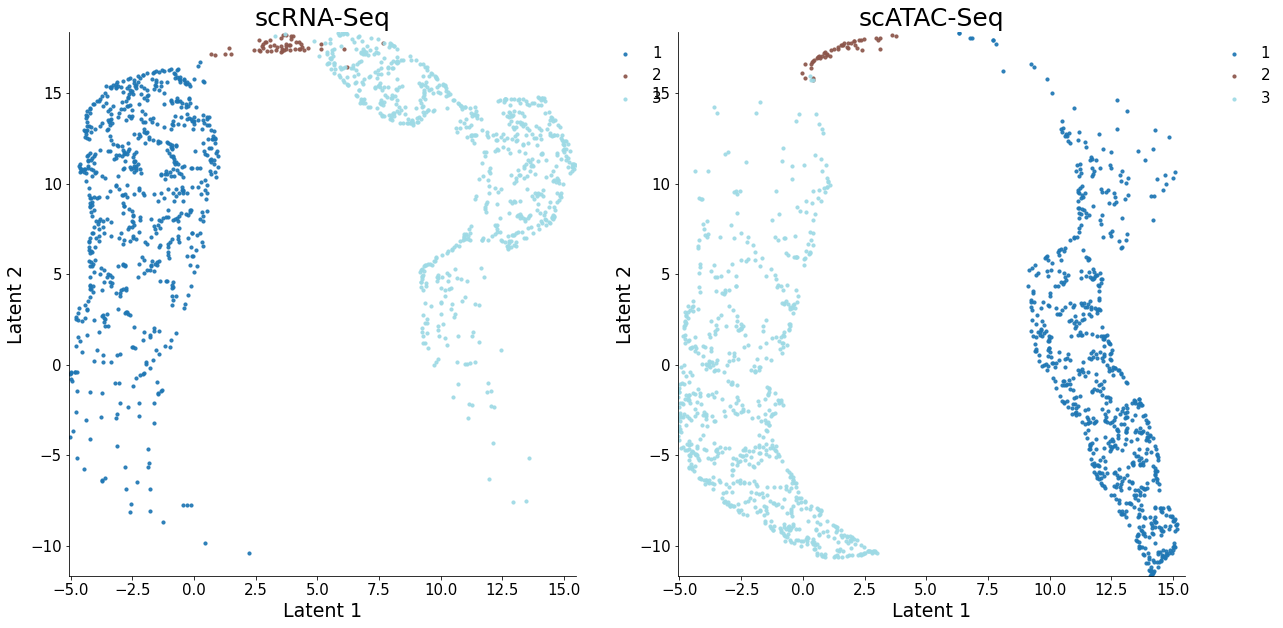

In [169]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model1.softmax(model1.C_1.cpu().detach()).numpy()
z_atac = model1.softmax(model1.C_2.cpu().detach()).numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = model1.meta_rna["pop"].values[:,None]
label_atac = model1.meta_atac["pop"].values[:,None]
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

None


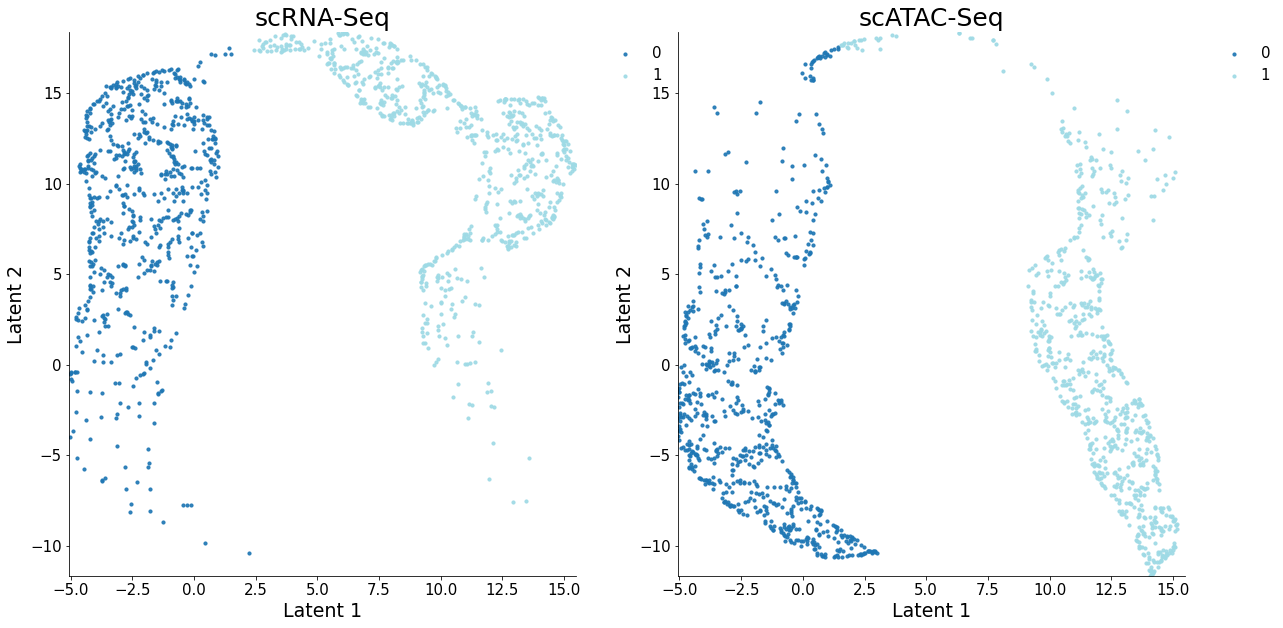

In [170]:
utils.plot_latent(z_rna, z_atac, max_rna, max_atac, mode= "separate", save = None)

In [172]:
model1 = model.cfrm_best(dir = '../data/simulated/2b3c_ziqi1/', N = 3, batch_size = 0.1, 
                             interval = 1, lr = 1e-3, alpha = [1000, 1000, 100, 1, 0.1]).to(device)
with torch.no_grad():
    loss, *_ = model1.batch_loss('valid')
    print('Initial Loss is {:.5f}'.format(loss.item()))

model1.train_func(T = 10000)



Initial Loss is 1751.54639
Epoch 1, Validating Loss: 1749.5210
	 loss 1: 628.86926
	 loss 2: 1194.69641
	 loss 3: -73.47339
	 loss 4: -1.00000
	 loss 5: 0.42877
Epoch 2, Validating Loss: 1746.4182
	 loss 1: 627.62476
	 loss 2: 1192.83826
	 loss 3: -73.47345
	 loss 4: -1.00000
	 loss 5: 0.42877
Epoch 3, Validating Loss: 1742.7073
	 loss 1: 626.13586
	 loss 2: 1190.61633
	 loss 3: -73.47359
	 loss 4: -1.00000
	 loss 5: 0.42877
Epoch 4, Validating Loss: 1738.5369
	 loss 1: 624.45355
	 loss 2: 1188.12842
	 loss 3: -73.47391
	 loss 4: -1.00000
	 loss 5: 0.42877
Epoch 5, Validating Loss: 1734.0319
	 loss 1: 622.63818
	 loss 2: 1185.43921
	 loss 3: -73.47424
	 loss 4: -1.00000
	 loss 5: 0.42877
Epoch 6, Validating Loss: 1729.2765
	 loss 1: 620.73206
	 loss 2: 1182.59045
	 loss 3: -73.47473
	 loss 4: -1.00000
	 loss 5: 0.42877
Epoch 7, Validating Loss: 1724.3374
	 loss 1: 618.74652
	 loss 2: 1179.63745
	 loss 3: -73.47533
	 loss 4: -1.00000
	 loss 5: 0.42877
Epoch 8, Validating Loss: 1719.2655

Epoch 70, Validating Loss: 1394.2750
	 loss 1: 489.93881
	 loss 2: 978.39948
	 loss 3: -73.49179
	 loss 4: -1.00000
	 loss 5: 0.42855
Epoch 71, Validating Loss: 1389.4594
	 loss 1: 488.10660
	 loss 2: 975.41589
	 loss 3: -73.49169
	 loss 4: -1.00000
	 loss 5: 0.42855
Epoch 72, Validating Loss: 1384.6486
	 loss 1: 486.27036
	 loss 2: 972.44128
	 loss 3: -73.49165
	 loss 4: -1.00000
	 loss 5: 0.42854
Epoch 73, Validating Loss: 1379.8601
	 loss 1: 484.43469
	 loss 2: 969.48853
	 loss 3: -73.49173
	 loss 4: -1.00000
	 loss 5: 0.42854
Epoch 74, Validating Loss: 1375.1210
	 loss 1: 482.63165
	 loss 2: 966.55255
	 loss 3: -73.49188
	 loss 4: -1.00000
	 loss 5: 0.42853
Epoch 75, Validating Loss: 1370.4104
	 loss 1: 480.85342
	 loss 2: 963.62061
	 loss 3: -73.49209
	 loss 4: -1.00000
	 loss 5: 0.42852
Epoch 76, Validating Loss: 1365.6997
	 loss 1: 479.07297
	 loss 2: 960.69055
	 loss 3: -73.49231
	 loss 4: -1.00000
	 loss 5: 0.42852
Epoch 77, Validating Loss: 1361.0226
	 loss 1: 477.30420
	 los

Epoch 135, Validating Loss: 1115.0927
	 loss 1: 386.25763
	 loss 2: 802.90918
	 loss 3: -73.50217
	 loss 4: -1.00000
	 loss 5: 0.42808
Epoch 136, Validating Loss: 1111.2614
	 loss 1: 384.87579
	 loss 2: 800.45996
	 loss 3: -73.50241
	 loss 4: -1.00000
	 loss 5: 0.42808
Epoch 137, Validating Loss: 1107.4630
	 loss 1: 383.50613
	 loss 2: 798.03149
	 loss 3: -73.50267
	 loss 4: -1.00000
	 loss 5: 0.42807
Epoch 138, Validating Loss: 1103.6678
	 loss 1: 382.13736
	 loss 2: 795.60529
	 loss 3: -73.50289
	 loss 4: -1.00000
	 loss 5: 0.42806
Epoch 139, Validating Loss: 1099.8760
	 loss 1: 380.75983
	 loss 2: 793.19116
	 loss 3: -73.50304
	 loss 4: -1.00000
	 loss 5: 0.42805
Epoch 140, Validating Loss: 1096.0977
	 loss 1: 379.37753
	 loss 2: 790.79517
	 loss 3: -73.50320
	 loss 4: -1.00000
	 loss 5: 0.42804
Epoch 141, Validating Loss: 1092.3236
	 loss 1: 377.99911
	 loss 2: 788.39990
	 loss 3: -73.50343
	 loss 4: -1.00000
	 loss 5: 0.42804
Epoch 142, Validating Loss: 1088.5696
	 loss 1: 376.626

Epoch 200, Validating Loss: 891.6619
	 loss 1: 306.43018
	 loss 2: 659.32092
	 loss 3: -73.51664
	 loss 4: -1.00000
	 loss 5: 0.42747
Epoch 201, Validating Loss: 888.6349
	 loss 1: 305.38174
	 loss 2: 657.34247
	 loss 3: -73.51669
	 loss 4: -1.00000
	 loss 5: 0.42746
Epoch 202, Validating Loss: 885.6462
	 loss 1: 304.35562
	 loss 2: 655.38000
	 loss 3: -73.51682
	 loss 4: -1.00000
	 loss 5: 0.42745
Epoch 203, Validating Loss: 882.6714
	 loss 1: 303.32794
	 loss 2: 653.43311
	 loss 3: -73.51703
	 loss 4: -1.00000
	 loss 5: 0.42744
Epoch 204, Validating Loss: 879.6964
	 loss 1: 302.29694
	 loss 2: 651.48926
	 loss 3: -73.51724
	 loss 4: -1.00000
	 loss 5: 0.42743
Epoch 205, Validating Loss: 876.7148
	 loss 1: 301.26889
	 loss 2: 649.53577
	 loss 3: -73.51736
	 loss 4: -1.00000
	 loss 5: 0.42742
Epoch 206, Validating Loss: 873.7389
	 loss 1: 300.24078
	 loss 2: 647.58813
	 loss 3: -73.51746
	 loss 4: -1.00000
	 loss 5: 0.42741
Epoch 207, Validating Loss: 870.7913
	 loss 1: 299.22488
	 los

Epoch 265, Validating Loss: 715.0132
	 loss 1: 246.38423
	 loss 2: 542.73444
	 loss 3: -73.53225
	 loss 4: -1.00000
	 loss 5: 0.42678
Epoch 266, Validating Loss: 712.5784
	 loss 1: 245.56406
	 loss 2: 541.12006
	 loss 3: -73.53244
	 loss 4: -1.00000
	 loss 5: 0.42677
Epoch 267, Validating Loss: 710.1446
	 loss 1: 244.74382
	 loss 2: 539.50653
	 loss 3: -73.53255
	 loss 4: -1.00000
	 loss 5: 0.42676
Epoch 268, Validating Loss: 707.7361
	 loss 1: 243.94150
	 loss 2: 537.90051
	 loss 3: -73.53264
	 loss 4: -1.00000
	 loss 5: 0.42675
Epoch 269, Validating Loss: 705.3622
	 loss 1: 243.15001
	 loss 2: 536.31818
	 loss 3: -73.53280
	 loss 4: -1.00000
	 loss 5: 0.42674
Epoch 270, Validating Loss: 702.9996
	 loss 1: 242.35648
	 loss 2: 534.74951
	 loss 3: -73.53310
	 loss 4: -1.00000
	 loss 5: 0.42673
Epoch 271, Validating Loss: 700.6582
	 loss 1: 241.57280
	 loss 2: 533.19214
	 loss 3: -73.53346
	 loss 4: -1.00000
	 loss 5: 0.42672
Epoch 272, Validating Loss: 698.3163
	 loss 1: 240.79688
	 los

Epoch 335, Validating Loss: 565.1840
	 loss 1: 196.10326
	 loss 2: 443.19620
	 loss 3: -73.54140
	 loss 4: -1.00000
	 loss 5: 0.42597
Epoch 336, Validating Loss: 563.2880
	 loss 1: 195.47411
	 loss 2: 441.92950
	 loss 3: -73.54154
	 loss 4: -1.00000
	 loss 5: 0.42596
Epoch 337, Validating Loss: 561.4244
	 loss 1: 194.85858
	 loss 2: 440.68155
	 loss 3: -73.54177
	 loss 4: -1.00000
	 loss 5: 0.42595
Epoch 338, Validating Loss: 559.5760
	 loss 1: 194.24861
	 loss 2: 439.44333
	 loss 3: -73.54195
	 loss 4: -1.00000
	 loss 5: 0.42594
Epoch 339, Validating Loss: 557.7425
	 loss 1: 193.64972
	 loss 2: 438.20889
	 loss 3: -73.54207
	 loss 4: -1.00000
	 loss 5: 0.42593
Epoch 340, Validating Loss: 555.8909
	 loss 1: 193.04857
	 loss 2: 436.95865
	 loss 3: -73.54215
	 loss 4: -1.00000
	 loss 5: 0.42592
Epoch 341, Validating Loss: 554.0262
	 loss 1: 192.44096
	 loss 2: 435.70151
	 loss 3: -73.54220
	 loss 4: -1.00000
	 loss 5: 0.42591
Epoch 342, Validating Loss: 552.1731
	 loss 1: 191.83063
	 los

Epoch 405, Validating Loss: 448.1069
	 loss 1: 158.06876
	 loss 2: 364.16504
	 loss 3: -73.55199
	 loss 4: -1.00000
	 loss 5: 0.42516
Epoch 406, Validating Loss: 446.6188
	 loss 1: 157.59183
	 loss 2: 363.15384
	 loss 3: -73.55198
	 loss 4: -1.00000
	 loss 5: 0.42515
Epoch 407, Validating Loss: 445.1487
	 loss 1: 157.11678
	 loss 2: 362.15891
	 loss 3: -73.55209
	 loss 4: -1.00000
	 loss 5: 0.42513
Epoch 408, Validating Loss: 443.6886
	 loss 1: 156.64107
	 loss 2: 361.17471
	 loss 3: -73.55227
	 loss 4: -1.00000
	 loss 5: 0.42512
Epoch 409, Validating Loss: 442.2406
	 loss 1: 156.16823
	 loss 2: 360.19965
	 loss 3: -73.55239
	 loss 4: -1.00000
	 loss 5: 0.42511
Epoch 410, Validating Loss: 440.7942
	 loss 1: 155.69221
	 loss 2: 359.22937
	 loss 3: -73.55245
	 loss 4: -1.00000
	 loss 5: 0.42510
Epoch 411, Validating Loss: 439.3455
	 loss 1: 155.21768
	 loss 2: 358.25510
	 loss 3: -73.55236
	 loss 4: -1.00000
	 loss 5: 0.42509
Epoch 412, Validating Loss: 437.8933
	 loss 1: 154.74446
	 los

Epoch 474, Validating Loss: 357.1034
	 loss 1: 128.44635
	 loss 2: 302.78479
	 loss 3: -73.55212
	 loss 4: -1.00000
	 loss 5: 0.42436
Epoch 475, Validating Loss: 355.9339
	 loss 1: 128.06679
	 loss 2: 301.99481
	 loss 3: -73.55200
	 loss 4: -1.00000
	 loss 5: 0.42435
Epoch 476, Validating Loss: 354.7733
	 loss 1: 127.69291
	 loss 2: 301.20801
	 loss 3: -73.55198
	 loss 4: -1.00000
	 loss 5: 0.42434
Epoch 477, Validating Loss: 353.6053
	 loss 1: 127.32017
	 loss 2: 300.41284
	 loss 3: -73.55205
	 loss 4: -1.00000
	 loss 5: 0.42433
Epoch 478, Validating Loss: 352.4449
	 loss 1: 126.94794
	 loss 2: 299.62491
	 loss 3: -73.55224
	 loss 4: -1.00000
	 loss 5: 0.42432
Epoch 479, Validating Loss: 351.2897
	 loss 1: 126.57468
	 loss 2: 298.84317
	 loss 3: -73.55250
	 loss 4: -1.00000
	 loss 5: 0.42431
Epoch 480, Validating Loss: 350.1270
	 loss 1: 126.19643
	 loss 2: 298.05899
	 loss 3: -73.55266
	 loss 4: -1.00000
	 loss 5: 0.42430
Epoch 481, Validating Loss: 348.9667
	 loss 1: 125.82089
	 los

Epoch 540, Validating Loss: 287.0728
	 loss 1: 106.42017
	 loss 2: 254.78333
	 loss 3: -73.55439
	 loss 4: -1.00000
	 loss 5: 0.42365
Epoch 541, Validating Loss: 286.1294
	 loss 1: 106.12213
	 loss 2: 254.13811
	 loss 3: -73.55451
	 loss 4: -1.00000
	 loss 5: 0.42364
Epoch 542, Validating Loss: 285.1865
	 loss 1: 105.82790
	 loss 2: 253.48967
	 loss 3: -73.55468
	 loss 4: -1.00000
	 loss 5: 0.42363
Epoch 543, Validating Loss: 284.2388
	 loss 1: 105.52990
	 loss 2: 252.84013
	 loss 3: -73.55482
	 loss 4: -1.00000
	 loss 5: 0.42362
Epoch 544, Validating Loss: 283.2924
	 loss 1: 105.22623
	 loss 2: 252.19754
	 loss 3: -73.55499
	 loss 4: -1.00000
	 loss 5: 0.42361
Epoch 545, Validating Loss: 282.3519
	 loss 1: 104.92138
	 loss 2: 251.56209
	 loss 3: -73.55510
	 loss 4: -1.00000
	 loss 5: 0.42360
Epoch 546, Validating Loss: 281.4220
	 loss 1: 104.62147
	 loss 2: 250.93204
	 loss 3: -73.55508
	 loss 4: -1.00000
	 loss 5: 0.42359
Epoch 547, Validating Loss: 280.4984
	 loss 1: 104.32807
	 los

Epoch 609, Validating Loss: 229.1613
	 loss 1: 88.41068
	 loss 2: 214.87874
	 loss 3: -73.55103
	 loss 4: -1.00000
	 loss 5: 0.42295
Epoch 610, Validating Loss: 228.4074
	 loss 1: 88.18970
	 loss 2: 214.34587
	 loss 3: -73.55114
	 loss 4: -1.00000
	 loss 5: 0.42294
Epoch 611, Validating Loss: 227.6634
	 loss 1: 87.97445
	 loss 2: 213.81720
	 loss 3: -73.55122
	 loss 4: -1.00000
	 loss 5: 0.42293
Epoch 612, Validating Loss: 226.9177
	 loss 1: 87.76045
	 loss 2: 213.28563
	 loss 3: -73.55131
	 loss 4: -1.00000
	 loss 5: 0.42292
Epoch 613, Validating Loss: 226.1696
	 loss 1: 87.54613
	 loss 2: 212.75191
	 loss 3: -73.55135
	 loss 4: -1.00000
	 loss 5: 0.42291
Epoch 614, Validating Loss: 225.4217
	 loss 1: 87.33231
	 loss 2: 212.21788
	 loss 3: -73.55137
	 loss 4: -1.00000
	 loss 5: 0.42290
Epoch 615, Validating Loss: 224.6726
	 loss 1: 87.11346
	 loss 2: 211.68765
	 loss 3: -73.55141
	 loss 4: -1.00000
	 loss 5: 0.42289
Epoch 616, Validating Loss: 223.9307
	 loss 1: 86.89374
	 loss 2: 211

Epoch 674, Validating Loss: 184.9890
	 loss 1: 75.11511
	 loss 2: 183.99765
	 loss 3: -73.54615
	 loss 4: -1.00000
	 loss 5: 0.42233
Epoch 675, Validating Loss: 184.3823
	 loss 1: 74.92886
	 loss 2: 183.57707
	 loss 3: -73.54597
	 loss 4: -1.00000
	 loss 5: 0.42232
Epoch 676, Validating Loss: 183.7765
	 loss 1: 74.74400
	 loss 2: 183.15602
	 loss 3: -73.54581
	 loss 4: -1.00000
	 loss 5: 0.42231
Epoch 677, Validating Loss: 183.1671
	 loss 1: 74.56226
	 loss 2: 182.72823
	 loss 3: -73.54568
	 loss 4: -1.00000
	 loss 5: 0.42230
Epoch 678, Validating Loss: 182.5567
	 loss 1: 74.37804
	 loss 2: 182.30191
	 loss 3: -73.54552
	 loss 4: -1.00000
	 loss 5: 0.42229
Epoch 679, Validating Loss: 181.9517
	 loss 1: 74.19633
	 loss 2: 181.87856
	 loss 3: -73.54546
	 loss 4: -1.00000
	 loss 5: 0.42228
Epoch 680, Validating Loss: 181.3526
	 loss 1: 74.01376
	 loss 2: 181.46207
	 loss 3: -73.54546
	 loss 4: -1.00000
	 loss 5: 0.42227
Epoch 681, Validating Loss: 180.7565
	 loss 1: 73.83273
	 loss 2: 181

Epoch 739, Validating Loss: 149.7738
	 loss 1: 64.68049
	 loss 2: 159.21263
	 loss 3: -73.54109
	 loss 4: -1.00000
	 loss 5: 0.42177
Epoch 740, Validating Loss: 149.2892
	 loss 1: 64.54103
	 loss 2: 158.86751
	 loss 3: -73.54111
	 loss 4: -1.00000
	 loss 5: 0.42177
Epoch 741, Validating Loss: 148.8124
	 loss 1: 64.40308
	 loss 2: 158.52881
	 loss 3: -73.54120
	 loss 4: -1.00000
	 loss 5: 0.42176
Epoch 742, Validating Loss: 148.3335
	 loss 1: 64.26461
	 loss 2: 158.18845
	 loss 3: -73.54128
	 loss 4: -1.00000
	 loss 5: 0.42175
Epoch 743, Validating Loss: 147.8528
	 loss 1: 64.12492
	 loss 2: 157.84737
	 loss 3: -73.54124
	 loss 4: -1.00000
	 loss 5: 0.42174
Epoch 744, Validating Loss: 147.3754
	 loss 1: 63.98587
	 loss 2: 157.50891
	 loss 3: -73.54113
	 loss 4: -1.00000
	 loss 5: 0.42173
Epoch 745, Validating Loss: 146.8972
	 loss 1: 63.84760
	 loss 2: 157.16875
	 loss 3: -73.54092
	 loss 4: -1.00000
	 loss 5: 0.42172
Epoch 746, Validating Loss: 146.4194
	 loss 1: 63.71166
	 loss 2: 156

Epoch 804, Validating Loss: 121.4396
	 loss 1: 56.56701
	 loss 2: 138.98660
	 loss 3: -73.53527
	 loss 4: -1.00000
	 loss 5: 0.42126
Epoch 805, Validating Loss: 121.0416
	 loss 1: 56.45682
	 loss 2: 138.69867
	 loss 3: -73.53517
	 loss 4: -1.00000
	 loss 5: 0.42126
Epoch 806, Validating Loss: 120.6481
	 loss 1: 56.34839
	 loss 2: 138.41354
	 loss 3: -73.53506
	 loss 4: -1.00000
	 loss 5: 0.42125
Epoch 807, Validating Loss: 120.2628
	 loss 1: 56.24226
	 loss 2: 138.13426
	 loss 3: -73.53497
	 loss 4: -1.00000
	 loss 5: 0.42124
Epoch 808, Validating Loss: 119.8789
	 loss 1: 56.13661
	 loss 2: 137.85597
	 loss 3: -73.53487
	 loss 4: -1.00000
	 loss 5: 0.42123
Epoch 809, Validating Loss: 119.4987
	 loss 1: 56.03072
	 loss 2: 137.58153
	 loss 3: -73.53473
	 loss 4: -1.00000
	 loss 5: 0.42122
Epoch 810, Validating Loss: 119.1175
	 loss 1: 55.92446
	 loss 2: 137.30637
	 loss 3: -73.53452
	 loss 4: -1.00000
	 loss 5: 0.42122
Epoch 811, Validating Loss: 118.7394
	 loss 1: 55.81992
	 loss 2: 137

Epoch 869, Validating Loss: 98.7670
	 loss 1: 50.35322
	 loss 2: 122.52744
	 loss 3: -73.53444
	 loss 4: -1.00000
	 loss 5: 0.42080
Epoch 870, Validating Loss: 98.4599
	 loss 1: 50.27216
	 loss 2: 122.30146
	 loss 3: -73.53448
	 loss 4: -1.00000
	 loss 5: 0.42079
Epoch 871, Validating Loss: 98.1517
	 loss 1: 50.19188
	 loss 2: 122.07349
	 loss 3: -73.53450
	 loss 4: -1.00000
	 loss 5: 0.42079
Epoch 872, Validating Loss: 97.8408
	 loss 1: 50.11063
	 loss 2: 121.84391
	 loss 3: -73.53449
	 loss 4: -1.00000
	 loss 5: 0.42078
Epoch 873, Validating Loss: 97.5326
	 loss 1: 50.03019
	 loss 2: 121.61613
	 loss 3: -73.53453
	 loss 4: -1.00000
	 loss 5: 0.42078
Epoch 874, Validating Loss: 97.2276
	 loss 1: 49.95094
	 loss 2: 121.39058
	 loss 3: -73.53472
	 loss 4: -1.00000
	 loss 5: 0.42077
Epoch 875, Validating Loss: 96.9232
	 loss 1: 49.86982
	 loss 2: 121.16763
	 loss 3: -73.53502
	 loss 4: -1.00000
	 loss 5: 0.42076
Epoch 876, Validating Loss: 96.6218
	 loss 1: 49.78811
	 loss 2: 120.94819
	

Epoch 934, Validating Loss: 80.5518
	 loss 1: 45.62131
	 loss 2: 109.05563
	 loss 3: -73.54555
	 loss 4: -1.00000
	 loss 5: 0.42040
Epoch 935, Validating Loss: 80.3049
	 loss 1: 45.55787
	 loss 2: 108.87243
	 loss 3: -73.54584
	 loss 4: -1.00000
	 loss 5: 0.42039
Epoch 936, Validating Loss: 80.0594
	 loss 1: 45.49564
	 loss 2: 108.68941
	 loss 3: -73.54607
	 loss 4: -1.00000
	 loss 5: 0.42039
Epoch 937, Validating Loss: 79.8132
	 loss 1: 45.43327
	 loss 2: 108.50574
	 loss 3: -73.54618
	 loss 4: -1.00000
	 loss 5: 0.42038
Epoch 938, Validating Loss: 79.5689
	 loss 1: 45.37040
	 loss 2: 108.32442
	 loss 3: -73.54627
	 loss 4: -1.00000
	 loss 5: 0.42038
Epoch 939, Validating Loss: 79.3227
	 loss 1: 45.30669
	 loss 2: 108.14207
	 loss 3: -73.54643
	 loss 4: -1.00000
	 loss 5: 0.42037
Epoch 940, Validating Loss: 79.0775
	 loss 1: 45.24319
	 loss 2: 107.96058
	 loss 3: -73.54667
	 loss 4: -1.00000
	 loss 5: 0.42036
Epoch 941, Validating Loss: 78.8307
	 loss 1: 45.17933
	 loss 2: 107.77789
	

Epoch 999, Validating Loss: 66.1369
	 loss 1: 42.09211
	 loss 2: 98.18515
	 loss 3: -73.56044
	 loss 4: -1.00000
	 loss 5: 0.42005
Epoch 1000, Validating Loss: 65.9435
	 loss 1: 42.04678
	 loss 2: 98.03754
	 loss 3: -73.56088
	 loss 4: -1.00000
	 loss 5: 0.42004
Epoch 1001, Validating Loss: 65.7497
	 loss 1: 42.00164
	 loss 2: 97.88927
	 loss 3: -73.56120
	 loss 4: -1.00000
	 loss 5: 0.42004
Epoch 1002, Validating Loss: 65.5524
	 loss 1: 41.95592
	 loss 2: 97.73788
	 loss 3: -73.56145
	 loss 4: -1.00000
	 loss 5: 0.42003
Epoch 1003, Validating Loss: 65.3550
	 loss 1: 41.90978
	 loss 2: 97.58689
	 loss 3: -73.56174
	 loss 4: -1.00000
	 loss 5: 0.42003
Epoch 1004, Validating Loss: 65.1574
	 loss 1: 41.86340
	 loss 2: 97.43614
	 loss 3: -73.56211
	 loss 4: -1.00000
	 loss 5: 0.42002
Epoch 1005, Validating Loss: 64.9615
	 loss 1: 41.81672
	 loss 2: 97.28725
	 loss 3: -73.56252
	 loss 4: -1.00000
	 loss 5: 0.42002
Epoch 1006, Validating Loss: 64.7653
	 loss 1: 41.76988
	 loss 2: 97.13827
	 

Epoch 1063, Validating Loss: 54.7252
	 loss 1: 39.39223
	 loss 2: 89.49276
	 loss 3: -73.57953
	 loss 4: -1.00000
	 loss 5: 0.41974
Epoch 1064, Validating Loss: 54.5712
	 loss 1: 39.35752
	 loss 2: 89.37391
	 loss 3: -73.57996
	 loss 4: -1.00000
	 loss 5: 0.41973
Epoch 1065, Validating Loss: 54.4178
	 loss 1: 39.32220
	 loss 2: 89.25632
	 loss 3: -73.58041
	 loss 4: -1.00000
	 loss 5: 0.41973
Epoch 1066, Validating Loss: 54.2649
	 loss 1: 39.28621
	 loss 2: 89.13974
	 loss 3: -73.58078
	 loss 4: -1.00000
	 loss 5: 0.41973
Epoch 1067, Validating Loss: 54.1129
	 loss 1: 39.25037
	 loss 2: 89.02394
	 loss 3: -73.58109
	 loss 4: -1.00000
	 loss 5: 0.41972
Epoch 1068, Validating Loss: 53.9613
	 loss 1: 39.21501
	 loss 2: 88.90806
	 loss 3: -73.58144
	 loss 4: -1.00000
	 loss 5: 0.41972
Epoch 1069, Validating Loss: 53.8102
	 loss 1: 39.17985
	 loss 2: 88.79250
	 loss 3: -73.58184
	 loss 4: -1.00000
	 loss 5: 0.41971
Epoch 1070, Validating Loss: 53.6580
	 loss 1: 39.14520
	 loss 2: 88.67533
	

Epoch 1127, Validating Loss: 45.6545
	 loss 1: 37.34952
	 loss 2: 82.49162
	 loss 3: -73.60609
	 loss 4: -1.00000
	 loss 5: 0.41947
Epoch 1128, Validating Loss: 45.5257
	 loss 1: 37.32264
	 loss 2: 82.39038
	 loss 3: -73.60680
	 loss 4: -1.00000
	 loss 5: 0.41946
Epoch 1129, Validating Loss: 45.3968
	 loss 1: 37.29565
	 loss 2: 82.28918
	 loss 3: -73.60746
	 loss 4: -1.00000
	 loss 5: 0.41946
Epoch 1130, Validating Loss: 45.2689
	 loss 1: 37.26895
	 loss 2: 82.18862
	 loss 3: -73.60811
	 loss 4: -1.00000
	 loss 5: 0.41945
Epoch 1131, Validating Loss: 45.1415
	 loss 1: 37.24287
	 loss 2: 82.08799
	 loss 3: -73.60876
	 loss 4: -1.00000
	 loss 5: 0.41945
Epoch 1132, Validating Loss: 45.0154
	 loss 1: 37.21741
	 loss 2: 81.98796
	 loss 3: -73.60945
	 loss 4: -1.00000
	 loss 5: 0.41945
Epoch 1133, Validating Loss: 44.8900
	 loss 1: 37.19250
	 loss 2: 81.88819
	 loss 3: -73.61012
	 loss 4: -1.00000
	 loss 5: 0.41944
Epoch 1134, Validating Loss: 44.7645
	 loss 1: 37.16716
	 loss 2: 81.78857
	

Epoch 1192, Validating Loss: 38.3996
	 loss 1: 35.84019
	 loss 2: 76.77581
	 loss 3: -73.63563
	 loss 4: -1.00000
	 loss 5: 0.41924
Epoch 1193, Validating Loss: 38.3003
	 loss 1: 35.82096
	 loss 2: 76.69618
	 loss 3: -73.63610
	 loss 4: -1.00000
	 loss 5: 0.41924
Epoch 1194, Validating Loss: 38.2004
	 loss 1: 35.80045
	 loss 2: 76.61730
	 loss 3: -73.63658
	 loss 4: -1.00000
	 loss 5: 0.41924
Epoch 1195, Validating Loss: 38.1002
	 loss 1: 35.77946
	 loss 2: 76.53850
	 loss 3: -73.63700
	 loss 4: -1.00000
	 loss 5: 0.41923
Epoch 1196, Validating Loss: 38.0014
	 loss 1: 35.75822
	 loss 2: 76.46137
	 loss 3: -73.63743
	 loss 4: -1.00000
	 loss 5: 0.41923
Epoch 1197, Validating Loss: 37.9007
	 loss 1: 35.73660
	 loss 2: 76.38280
	 loss 3: -73.63796
	 loss 4: -1.00000
	 loss 5: 0.41923
Epoch 1198, Validating Loss: 37.8008
	 loss 1: 35.71501
	 loss 2: 76.30508
	 loss 3: -73.63855
	 loss 4: -1.00000
	 loss 5: 0.41922
Epoch 1199, Validating Loss: 37.7008
	 loss 1: 35.69370
	 loss 2: 76.22700
	

Epoch 1257, Validating Loss: 32.7312
	 loss 1: 34.75126
	 loss 2: 72.23904
	 loss 3: -73.67815
	 loss 4: -1.00000
	 loss 5: 0.41907
Epoch 1258, Validating Loss: 32.6551
	 loss 1: 34.73775
	 loss 2: 72.17724
	 loss 3: -73.67899
	 loss 4: -1.00000
	 loss 5: 0.41907
Epoch 1259, Validating Loss: 32.5788
	 loss 1: 34.72431
	 loss 2: 72.11526
	 loss 3: -73.67988
	 loss 4: -1.00000
	 loss 5: 0.41906
Epoch 1260, Validating Loss: 32.5021
	 loss 1: 34.71113
	 loss 2: 72.05267
	 loss 3: -73.68071
	 loss 4: -1.00000
	 loss 5: 0.41906
Epoch 1261, Validating Loss: 32.4273
	 loss 1: 34.69846
	 loss 2: 71.99132
	 loss 3: -73.68150
	 loss 4: -1.00000
	 loss 5: 0.41906
Epoch 1262, Validating Loss: 32.3542
	 loss 1: 34.68587
	 loss 2: 71.93148
	 loss 3: -73.68221
	 loss 4: -1.00000
	 loss 5: 0.41906
Epoch 1263, Validating Loss: 32.2805
	 loss 1: 34.67297
	 loss 2: 71.87148
	 loss 3: -73.68301
	 loss 4: -1.00000
	 loss 5: 0.41906
Epoch 1264, Validating Loss: 32.2080
	 loss 1: 34.66029
	 loss 2: 71.81254
	

Epoch 1321, Validating Loss: 28.4557
	 loss 1: 33.99815
	 loss 2: 68.77104
	 loss 3: -73.73239
	 loss 4: -1.00000
	 loss 5: 0.41894
Epoch 1322, Validating Loss: 28.3991
	 loss 1: 33.98943
	 loss 2: 68.72434
	 loss 3: -73.73363
	 loss 4: -1.00000
	 loss 5: 0.41894
Epoch 1323, Validating Loss: 28.3418
	 loss 1: 33.98062
	 loss 2: 68.67712
	 loss 3: -73.73487
	 loss 4: -1.00000
	 loss 5: 0.41894
Epoch 1324, Validating Loss: 28.2843
	 loss 1: 33.97173
	 loss 2: 68.62957
	 loss 3: -73.73598
	 loss 4: -1.00000
	 loss 5: 0.41893
Epoch 1325, Validating Loss: 28.2269
	 loss 1: 33.96250
	 loss 2: 68.58250
	 loss 3: -73.73702
	 loss 4: -1.00000
	 loss 5: 0.41893
Epoch 1326, Validating Loss: 28.1690
	 loss 1: 33.95298
	 loss 2: 68.53524
	 loss 3: -73.73815
	 loss 4: -1.00000
	 loss 5: 0.41893
Epoch 1327, Validating Loss: 28.1114
	 loss 1: 33.94345
	 loss 2: 68.48834
	 loss 3: -73.73933
	 loss 4: -1.00000
	 loss 5: 0.41893
Epoch 1328, Validating Loss: 28.0532
	 loss 1: 33.93370
	 loss 2: 68.44112
	

Epoch 1386, Validating Loss: 25.0699
	 loss 1: 33.44939
	 loss 2: 65.98981
	 loss 3: -73.78816
	 loss 4: -1.00000
	 loss 5: 0.41883
Epoch 1387, Validating Loss: 25.0241
	 loss 1: 33.44211
	 loss 2: 65.95220
	 loss 3: -73.78906
	 loss 4: -1.00000
	 loss 5: 0.41883
Epoch 1388, Validating Loss: 24.9783
	 loss 1: 33.43456
	 loss 2: 65.91491
	 loss 3: -73.79004
	 loss 4: -1.00000
	 loss 5: 0.41883
Epoch 1389, Validating Loss: 24.9326
	 loss 1: 33.42702
	 loss 2: 65.87785
	 loss 3: -73.79108
	 loss 4: -1.00000
	 loss 5: 0.41883
Epoch 1390, Validating Loss: 24.8875
	 loss 1: 33.41975
	 loss 2: 65.84098
	 loss 3: -73.79208
	 loss 4: -1.00000
	 loss 5: 0.41883
Epoch 1391, Validating Loss: 24.8422
	 loss 1: 33.41246
	 loss 2: 65.80399
	 loss 3: -73.79305
	 loss 4: -1.00000
	 loss 5: 0.41883
Epoch 1392, Validating Loss: 24.7969
	 loss 1: 33.40521
	 loss 2: 65.76699
	 loss 3: -73.79408
	 loss 4: -1.00000
	 loss 5: 0.41883
Epoch 1393, Validating Loss: 24.7523
	 loss 1: 33.39783
	 loss 2: 65.73073
	

Epoch 1451, Validating Loss: 22.4839
	 loss 1: 33.05751
	 loss 2: 63.86430
	 loss 3: -73.85667
	 loss 4: -1.00000
	 loss 5: 0.41877
Epoch 1452, Validating Loss: 22.4493
	 loss 1: 33.05257
	 loss 2: 63.83593
	 loss 3: -73.85793
	 loss 4: -1.00000
	 loss 5: 0.41877
Epoch 1453, Validating Loss: 22.4152
	 loss 1: 33.04771
	 loss 2: 63.80782
	 loss 3: -73.85909
	 loss 4: -1.00000
	 loss 5: 0.41877
Epoch 1454, Validating Loss: 22.3811
	 loss 1: 33.04309
	 loss 2: 63.77937
	 loss 3: -73.86017
	 loss 4: -1.00000
	 loss 5: 0.41877
Epoch 1455, Validating Loss: 22.3473
	 loss 1: 33.03879
	 loss 2: 63.75107
	 loss 3: -73.86129
	 loss 4: -1.00000
	 loss 5: 0.41877
Epoch 1456, Validating Loss: 22.3138
	 loss 1: 33.03450
	 loss 2: 63.72302
	 loss 3: -73.86253
	 loss 4: -1.00000
	 loss 5: 0.41876
Epoch 1457, Validating Loss: 22.2805
	 loss 1: 33.03031
	 loss 2: 63.69530
	 loss 3: -73.86383
	 loss 4: -1.00000
	 loss 5: 0.41876
Epoch 1458, Validating Loss: 22.2470
	 loss 1: 33.02608
	 loss 2: 63.66722
	

Epoch 1516, Validating Loss: 20.5173
	 loss 1: 32.79602
	 loss 2: 62.23566
	 loss 3: -73.93314
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1517, Validating Loss: 20.4909
	 loss 1: 32.79234
	 loss 2: 62.21370
	 loss 3: -73.93390
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1518, Validating Loss: 20.4649
	 loss 1: 32.78883
	 loss 2: 62.19197
	 loss 3: -73.93459
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1519, Validating Loss: 20.4389
	 loss 1: 32.78539
	 loss 2: 62.17001
	 loss 3: -73.93525
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1520, Validating Loss: 20.4128
	 loss 1: 32.78189
	 loss 2: 62.14806
	 loss 3: -73.93593
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1521, Validating Loss: 20.3864
	 loss 1: 32.77844
	 loss 2: 62.12598
	 loss 3: -73.93678
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1522, Validating Loss: 20.3601
	 loss 1: 32.77518
	 loss 2: 62.10397
	 loss 3: -73.93775
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1523, Validating Loss: 20.3345
	 loss 1: 32.77197
	 loss 2: 62.08257
	

Epoch 1581, Validating Loss: 19.0333
	 loss 1: 32.61230
	 loss 2: 61.01048
	 loss 3: -74.00816
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1582, Validating Loss: 19.0135
	 loss 1: 32.61019
	 loss 2: 60.99408
	 loss 3: -74.00945
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1583, Validating Loss: 18.9941
	 loss 1: 32.60823
	 loss 2: 60.97789
	 loss 3: -74.01074
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1584, Validating Loss: 18.9746
	 loss 1: 32.60627
	 loss 2: 60.96153
	 loss 3: -74.01192
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1585, Validating Loss: 18.9550
	 loss 1: 32.60431
	 loss 2: 60.94505
	 loss 3: -74.01305
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1586, Validating Loss: 18.9357
	 loss 1: 32.60234
	 loss 2: 60.92873
	 loss 3: -74.01411
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1587, Validating Loss: 18.9164
	 loss 1: 32.60027
	 loss 2: 60.91258
	 loss 3: -74.01519
	 loss 4: -1.00000
	 loss 5: 0.41873
Epoch 1588, Validating Loss: 18.8973
	 loss 1: 32.59815
	 loss 2: 60.89672
	

Epoch 1646, Validating Loss: 17.9060
	 loss 1: 32.48821
	 loss 2: 60.08715
	 loss 3: -74.08810
	 loss 4: -1.00000
	 loss 5: 0.41874
Epoch 1647, Validating Loss: 17.8915
	 loss 1: 32.48645
	 loss 2: 60.07562
	 loss 3: -74.08929
	 loss 4: -1.00000
	 loss 5: 0.41874
Epoch 1648, Validating Loss: 17.8771
	 loss 1: 32.48476
	 loss 2: 60.06424
	 loss 3: -74.09064
	 loss 4: -1.00000
	 loss 5: 0.41874
Epoch 1649, Validating Loss: 17.8628
	 loss 1: 32.48314
	 loss 2: 60.05288
	 loss 3: -74.09198
	 loss 4: -1.00000
	 loss 5: 0.41874
Epoch 1650, Validating Loss: 17.8485
	 loss 1: 32.48149
	 loss 2: 60.04144
	 loss 3: -74.09321
	 loss 4: -1.00000
	 loss 5: 0.41874
Epoch 1651, Validating Loss: 17.8340
	 loss 1: 32.47990
	 loss 2: 60.02988
	 loss 3: -74.09447
	 loss 4: -1.00000
	 loss 5: 0.41874
Epoch 1652, Validating Loss: 17.8194
	 loss 1: 32.47830
	 loss 2: 60.01806
	 loss 3: -74.09575
	 loss 4: -1.00000
	 loss 5: 0.41874
Epoch 1653, Validating Loss: 17.8047
	 loss 1: 32.47671
	 loss 2: 60.00613
	

Epoch 1711, Validating Loss: 17.0564
	 loss 1: 32.40155
	 loss 2: 59.40866
	 loss 3: -74.17263
	 loss 4: -1.00000
	 loss 5: 0.41876
Epoch 1712, Validating Loss: 17.0452
	 loss 1: 32.40046
	 loss 2: 59.39987
	 loss 3: -74.17388
	 loss 4: -1.00000
	 loss 5: 0.41876
Epoch 1713, Validating Loss: 17.0342
	 loss 1: 32.39935
	 loss 2: 59.39124
	 loss 3: -74.17517
	 loss 4: -1.00000
	 loss 5: 0.41876
Epoch 1714, Validating Loss: 17.0230
	 loss 1: 32.39817
	 loss 2: 59.38261
	 loss 3: -74.17654
	 loss 4: -1.00000
	 loss 5: 0.41876
Epoch 1715, Validating Loss: 17.0118
	 loss 1: 32.39699
	 loss 2: 59.37390
	 loss 3: -74.17789
	 loss 4: -1.00000
	 loss 5: 0.41877
Epoch 1716, Validating Loss: 17.0005
	 loss 1: 32.39589
	 loss 2: 59.36505
	 loss 3: -74.17916
	 loss 4: -1.00000
	 loss 5: 0.41877
Epoch 1717, Validating Loss: 16.9894
	 loss 1: 32.39482
	 loss 2: 59.35622
	 loss 3: -74.18039
	 loss 4: -1.00000
	 loss 5: 0.41877
Epoch 1718, Validating Loss: 16.9785
	 loss 1: 32.39380
	 loss 2: 59.34748
	

Epoch 1776, Validating Loss: 16.4238
	 loss 1: 32.34621
	 loss 2: 58.91985
	 loss 3: -74.26112
	 loss 4: -1.00000
	 loss 5: 0.41882
Epoch 1777, Validating Loss: 16.4148
	 loss 1: 32.34532
	 loss 2: 58.91333
	 loss 3: -74.26266
	 loss 4: -1.00000
	 loss 5: 0.41882
Epoch 1778, Validating Loss: 16.4060
	 loss 1: 32.34448
	 loss 2: 58.90694
	 loss 3: -74.26427
	 loss 4: -1.00000
	 loss 5: 0.41882
Epoch 1779, Validating Loss: 16.3973
	 loss 1: 32.34380
	 loss 2: 58.90063
	 loss 3: -74.26593
	 loss 4: -1.00000
	 loss 5: 0.41882
Epoch 1780, Validating Loss: 16.3887
	 loss 1: 32.34317
	 loss 2: 58.89429
	 loss 3: -74.26754
	 loss 4: -1.00000
	 loss 5: 0.41882
Epoch 1781, Validating Loss: 16.3803
	 loss 1: 32.34255
	 loss 2: 58.88807
	 loss 3: -74.26916
	 loss 4: -1.00000
	 loss 5: 0.41882
Epoch 1782, Validating Loss: 16.3717
	 loss 1: 32.34182
	 loss 2: 58.88190
	 loss 3: -74.27079
	 loss 4: -1.00000
	 loss 5: 0.41882
Epoch 1783, Validating Loss: 16.3634
	 loss 1: 32.34100
	 loss 2: 58.87590
	

Epoch 1841, Validating Loss: 15.9341
	 loss 1: 32.30663
	 loss 2: 58.56598
	 loss 3: -74.35738
	 loss 4: -1.00000
	 loss 5: 0.41888
Epoch 1842, Validating Loss: 15.9274
	 loss 1: 32.30608
	 loss 2: 58.56123
	 loss 3: -74.35882
	 loss 4: -1.00000
	 loss 5: 0.41888
Epoch 1843, Validating Loss: 15.9206
	 loss 1: 32.30547
	 loss 2: 58.55650
	 loss 3: -74.36021
	 loss 4: -1.00000
	 loss 5: 0.41888
Epoch 1844, Validating Loss: 15.9141
	 loss 1: 32.30489
	 loss 2: 58.55187
	 loss 3: -74.36157
	 loss 4: -1.00000
	 loss 5: 0.41888
Epoch 1845, Validating Loss: 15.9076
	 loss 1: 32.30438
	 loss 2: 58.54736
	 loss 3: -74.36304
	 loss 4: -1.00000
	 loss 5: 0.41889
Epoch 1846, Validating Loss: 15.9012
	 loss 1: 32.30398
	 loss 2: 58.54282
	 loss 3: -74.36449
	 loss 4: -1.00000
	 loss 5: 0.41889
Epoch 1847, Validating Loss: 15.8947
	 loss 1: 32.30354
	 loss 2: 58.53822
	 loss 3: -74.36597
	 loss 4: -1.00000
	 loss 5: 0.41889
Epoch 1848, Validating Loss: 15.8883
	 loss 1: 32.30313
	 loss 2: 58.53371
	

Epoch 1906, Validating Loss: 15.5418
	 loss 1: 32.28071
	 loss 2: 58.29792
	 loss 3: -74.45575
	 loss 4: -1.00000
	 loss 5: 0.41895
Epoch 1907, Validating Loss: 15.5371
	 loss 1: 32.28057
	 loss 2: 58.29468
	 loss 3: -74.45711
	 loss 4: -1.00000
	 loss 5: 0.41895
Epoch 1908, Validating Loss: 15.5323
	 loss 1: 32.28034
	 loss 2: 58.29148
	 loss 3: -74.45847
	 loss 4: -1.00000
	 loss 5: 0.41895
Epoch 1909, Validating Loss: 15.5274
	 loss 1: 32.28004
	 loss 2: 58.28831
	 loss 3: -74.45985
	 loss 4: -1.00000
	 loss 5: 0.41895
Epoch 1910, Validating Loss: 15.5226
	 loss 1: 32.27972
	 loss 2: 58.28512
	 loss 3: -74.46121
	 loss 4: -1.00000
	 loss 5: 0.41896
Epoch 1911, Validating Loss: 15.5178
	 loss 1: 32.27939
	 loss 2: 58.28196
	 loss 3: -74.46250
	 loss 4: -1.00000
	 loss 5: 0.41896
Epoch 1912, Validating Loss: 15.5130
	 loss 1: 32.27913
	 loss 2: 58.27876
	 loss 3: -74.46384
	 loss 4: -1.00000
	 loss 5: 0.41896
Epoch 1913, Validating Loss: 15.5080
	 loss 1: 32.27880
	 loss 2: 58.27554
	

Epoch 1971, Validating Loss: 15.2343
	 loss 1: 32.25891
	 loss 2: 58.11435
	 loss 3: -74.55801
	 loss 4: -1.00000
	 loss 5: 0.41903
Epoch 1972, Validating Loss: 15.2302
	 loss 1: 32.25876
	 loss 2: 58.11190
	 loss 3: -74.55945
	 loss 4: -1.00000
	 loss 5: 0.41903
Epoch 1973, Validating Loss: 15.2261
	 loss 1: 32.25853
	 loss 2: 58.10944
	 loss 3: -74.56087
	 loss 4: -1.00000
	 loss 5: 0.41903
Epoch 1974, Validating Loss: 15.2221
	 loss 1: 32.25832
	 loss 2: 58.10700
	 loss 3: -74.56228
	 loss 4: -1.00000
	 loss 5: 0.41903
Epoch 1975, Validating Loss: 15.2179
	 loss 1: 32.25802
	 loss 2: 58.10467
	 loss 3: -74.56380
	 loss 4: -1.00000
	 loss 5: 0.41903
Epoch 1976, Validating Loss: 15.2137
	 loss 1: 32.25784
	 loss 2: 58.10239
	 loss 3: -74.56555
	 loss 4: -1.00000
	 loss 5: 0.41903
Epoch 1977, Validating Loss: 15.2095
	 loss 1: 32.25778
	 loss 2: 58.10011
	 loss 3: -74.56741
	 loss 4: -1.00000
	 loss 5: 0.41904
Epoch 1978, Validating Loss: 15.2051
	 loss 1: 32.25757
	 loss 2: 58.09784
	

Epoch 2036, Validating Loss: 14.9876
	 loss 1: 32.24547
	 loss 2: 57.98101
	 loss 3: -74.65799
	 loss 4: -1.00000
	 loss 5: 0.41912
Epoch 2037, Validating Loss: 14.9840
	 loss 1: 32.24501
	 loss 2: 57.97939
	 loss 3: -74.65947
	 loss 4: -1.00000
	 loss 5: 0.41912
Epoch 2038, Validating Loss: 14.9805
	 loss 1: 32.24460
	 loss 2: 57.97775
	 loss 3: -74.66100
	 loss 4: -1.00000
	 loss 5: 0.41912
Epoch 2039, Validating Loss: 14.9768
	 loss 1: 32.24426
	 loss 2: 57.97605
	 loss 3: -74.66261
	 loss 4: -1.00000
	 loss 5: 0.41912
Epoch 2040, Validating Loss: 14.9730
	 loss 1: 32.24390
	 loss 2: 57.97430
	 loss 3: -74.66435
	 loss 4: -1.00000
	 loss 5: 0.41912
Epoch 2041, Validating Loss: 14.9690
	 loss 1: 32.24352
	 loss 2: 57.97244
	 loss 3: -74.66610
	 loss 4: -1.00000
	 loss 5: 0.41912
Epoch 2042, Validating Loss: 14.9652
	 loss 1: 32.24333
	 loss 2: 57.97058
	 loss 3: -74.66782
	 loss 4: -1.00000
	 loss 5: 0.41913
Epoch 2043, Validating Loss: 14.9616
	 loss 1: 32.24320
	 loss 2: 57.96873
	

Epoch 2101, Validating Loss: 14.7667
	 loss 1: 32.23424
	 loss 2: 57.87616
	 loss 3: -74.76293
	 loss 4: -1.00000
	 loss 5: 0.41921
Epoch 2102, Validating Loss: 14.7638
	 loss 1: 32.23412
	 loss 2: 57.87478
	 loss 3: -74.76436
	 loss 4: -1.00000
	 loss 5: 0.41921
Epoch 2103, Validating Loss: 14.7609
	 loss 1: 32.23411
	 loss 2: 57.87340
	 loss 3: -74.76579
	 loss 4: -1.00000
	 loss 5: 0.41921
Epoch 2104, Validating Loss: 14.7582
	 loss 1: 32.23422
	 loss 2: 57.87194
	 loss 3: -74.76721
	 loss 4: -1.00000
	 loss 5: 0.41921
Epoch 2105, Validating Loss: 14.7554
	 loss 1: 32.23436
	 loss 2: 57.87044
	 loss 3: -74.76865
	 loss 4: -1.00000
	 loss 5: 0.41921
Epoch 2106, Validating Loss: 14.7524
	 loss 1: 32.23452
	 loss 2: 57.86894
	 loss 3: -74.77031
	 loss 4: -1.00000
	 loss 5: 0.41921
Epoch 2107, Validating Loss: 14.7490
	 loss 1: 32.23447
	 loss 2: 57.86746
	 loss 3: -74.77214
	 loss 4: -1.00000
	 loss 5: 0.41922
Epoch 2108, Validating Loss: 14.7457
	 loss 1: 32.23434
	 loss 2: 57.86605
	

Epoch 2166, Validating Loss: 14.5718
	 loss 1: 32.22003
	 loss 2: 57.79505
	 loss 3: -74.86255
	 loss 4: -1.00000
	 loss 5: 0.41929
Epoch 2167, Validating Loss: 14.5690
	 loss 1: 32.21987
	 loss 2: 57.79386
	 loss 3: -74.86399
	 loss 4: -1.00000
	 loss 5: 0.41929
Epoch 2168, Validating Loss: 14.5663
	 loss 1: 32.21968
	 loss 2: 57.79276
	 loss 3: -74.86543
	 loss 4: -1.00000
	 loss 5: 0.41929
Epoch 2169, Validating Loss: 14.5636
	 loss 1: 32.21947
	 loss 2: 57.79175
	 loss 3: -74.86689
	 loss 4: -1.00000
	 loss 5: 0.41930
Epoch 2170, Validating Loss: 14.5610
	 loss 1: 32.21931
	 loss 2: 57.79070
	 loss 3: -74.86830
	 loss 4: -1.00000
	 loss 5: 0.41930
Epoch 2171, Validating Loss: 14.5585
	 loss 1: 32.21923
	 loss 2: 57.78953
	 loss 3: -74.86952
	 loss 4: -1.00000
	 loss 5: 0.41930
Epoch 2172, Validating Loss: 14.5561
	 loss 1: 32.21910
	 loss 2: 57.78831
	 loss 3: -74.87064
	 loss 4: -1.00000
	 loss 5: 0.41930
Epoch 2173, Validating Loss: 14.5534
	 loss 1: 32.21884
	 loss 2: 57.78713
	

Epoch 2231, Validating Loss: 14.4035
	 loss 1: 32.21177
	 loss 2: 57.72766
	 loss 3: -74.95527
	 loss 4: -1.00000
	 loss 5: 0.41938
Epoch 2232, Validating Loss: 14.4011
	 loss 1: 32.21164
	 loss 2: 57.72678
	 loss 3: -74.95667
	 loss 4: -1.00000
	 loss 5: 0.41938
Epoch 2233, Validating Loss: 14.3985
	 loss 1: 32.21140
	 loss 2: 57.72590
	 loss 3: -74.95819
	 loss 4: -1.00000
	 loss 5: 0.41938
Epoch 2234, Validating Loss: 14.3959
	 loss 1: 32.21136
	 loss 2: 57.72498
	 loss 3: -74.95978
	 loss 4: -1.00000
	 loss 5: 0.41938
Epoch 2235, Validating Loss: 14.3935
	 loss 1: 32.21141
	 loss 2: 57.72406
	 loss 3: -74.96134
	 loss 4: -1.00000
	 loss 5: 0.41938
Epoch 2236, Validating Loss: 14.3911
	 loss 1: 32.21136
	 loss 2: 57.72320
	 loss 3: -74.96284
	 loss 4: -1.00000
	 loss 5: 0.41938
Epoch 2237, Validating Loss: 14.3886
	 loss 1: 32.21129
	 loss 2: 57.72224
	 loss 3: -74.96429
	 loss 4: -1.00000
	 loss 5: 0.41939
Epoch 2238, Validating Loss: 14.3862
	 loss 1: 32.21132
	 loss 2: 57.72123
	

Epoch 2296, Validating Loss: 14.2431
	 loss 1: 32.20133
	 loss 2: 57.66703
	 loss 3: -75.04475
	 loss 4: -1.00000
	 loss 5: 0.41945
Epoch 2297, Validating Loss: 14.2405
	 loss 1: 32.20107
	 loss 2: 57.66608
	 loss 3: -75.04609
	 loss 4: -1.00000
	 loss 5: 0.41945
Epoch 2298, Validating Loss: 14.2378
	 loss 1: 32.20083
	 loss 2: 57.66513
	 loss 3: -75.04762
	 loss 4: -1.00000
	 loss 5: 0.41946
Epoch 2299, Validating Loss: 14.2351
	 loss 1: 32.20068
	 loss 2: 57.66418
	 loss 3: -75.04921
	 loss 4: -1.00000
	 loss 5: 0.41946
Epoch 2300, Validating Loss: 14.2327
	 loss 1: 32.20066
	 loss 2: 57.66330
	 loss 3: -75.05072
	 loss 4: -1.00000
	 loss 5: 0.41946
Epoch 2301, Validating Loss: 14.2304
	 loss 1: 32.20074
	 loss 2: 57.66243
	 loss 3: -75.05222
	 loss 4: -1.00000
	 loss 5: 0.41946
Epoch 2302, Validating Loss: 14.2281
	 loss 1: 32.20085
	 loss 2: 57.66166
	 loss 3: -75.05383
	 loss 4: -1.00000
	 loss 5: 0.41946
Epoch 2303, Validating Loss: 14.2257
	 loss 1: 32.20084
	 loss 2: 57.66090
	

Epoch 2361, Validating Loss: 14.0843
	 loss 1: 32.19642
	 loss 2: 57.60689
	 loss 3: -75.13857
	 loss 4: -1.00000
	 loss 5: 0.41952
Epoch 2362, Validating Loss: 14.0817
	 loss 1: 32.19623
	 loss 2: 57.60588
	 loss 3: -75.13996
	 loss 4: -1.00000
	 loss 5: 0.41952
Epoch 2363, Validating Loss: 14.0790
	 loss 1: 32.19599
	 loss 2: 57.60477
	 loss 3: -75.14129
	 loss 4: -1.00000
	 loss 5: 0.41952
Epoch 2364, Validating Loss: 14.0766
	 loss 1: 32.19582
	 loss 2: 57.60376
	 loss 3: -75.14252
	 loss 4: -1.00000
	 loss 5: 0.41952
Epoch 2365, Validating Loss: 14.0742
	 loss 1: 32.19572
	 loss 2: 57.60272
	 loss 3: -75.14373
	 loss 4: -1.00000
	 loss 5: 0.41952
Epoch 2366, Validating Loss: 14.0719
	 loss 1: 32.19577
	 loss 2: 57.60154
	 loss 3: -75.14496
	 loss 4: -1.00000
	 loss 5: 0.41953
Epoch 2367, Validating Loss: 14.0694
	 loss 1: 32.19573
	 loss 2: 57.60027
	 loss 3: -75.14614
	 loss 4: -1.00000
	 loss 5: 0.41953
Epoch 2368, Validating Loss: 14.0668
	 loss 1: 32.19561
	 loss 2: 57.59905
	

Epoch 2426, Validating Loss: 13.9150
	 loss 1: 32.18844
	 loss 2: 57.53911
	 loss 3: -75.23212
	 loss 4: -1.00000
	 loss 5: 0.41958
Epoch 2427, Validating Loss: 13.9124
	 loss 1: 32.18805
	 loss 2: 57.53782
	 loss 3: -75.23311
	 loss 4: -1.00000
	 loss 5: 0.41958
Epoch 2428, Validating Loss: 13.9096
	 loss 1: 32.18769
	 loss 2: 57.53645
	 loss 3: -75.23409
	 loss 4: -1.00000
	 loss 5: 0.41959
Epoch 2429, Validating Loss: 13.9068
	 loss 1: 32.18737
	 loss 2: 57.53497
	 loss 3: -75.23511
	 loss 4: -1.00000
	 loss 5: 0.41959
Epoch 2430, Validating Loss: 13.9041
	 loss 1: 32.18707
	 loss 2: 57.53359
	 loss 3: -75.23619
	 loss 4: -1.00000
	 loss 5: 0.41959
Epoch 2431, Validating Loss: 13.9013
	 loss 1: 32.18675
	 loss 2: 57.53231
	 loss 3: -75.23736
	 loss 4: -1.00000
	 loss 5: 0.41959
Epoch 2432, Validating Loss: 13.8987
	 loss 1: 32.18653
	 loss 2: 57.53113
	 loss 3: -75.23856
	 loss 4: -1.00000
	 loss 5: 0.41959
Epoch 2433, Validating Loss: 13.8963
	 loss 1: 32.18649
	 loss 2: 57.53004
	

Epoch 2490, Validating Loss: 13.7603
	 loss 1: 32.18352
	 loss 2: 57.46606
	 loss 3: -75.30893
	 loss 4: -1.00000
	 loss 5: 0.41962
Epoch 2491, Validating Loss: 13.7578
	 loss 1: 32.18353
	 loss 2: 57.46466
	 loss 3: -75.31005
	 loss 4: -1.00000
	 loss 5: 0.41962
Epoch 2492, Validating Loss: 13.7552
	 loss 1: 32.18341
	 loss 2: 57.46338
	 loss 3: -75.31119
	 loss 4: -1.00000
	 loss 5: 0.41962
Epoch 2493, Validating Loss: 13.7527
	 loss 1: 32.18333
	 loss 2: 57.46211
	 loss 3: -75.31238
	 loss 4: -1.00000
	 loss 5: 0.41962
Epoch 2494, Validating Loss: 13.7501
	 loss 1: 32.18303
	 loss 2: 57.46085
	 loss 3: -75.31342
	 loss 4: -1.00000
	 loss 5: 0.41962
Epoch 2495, Validating Loss: 13.7474
	 loss 1: 32.18257
	 loss 2: 57.45953
	 loss 3: -75.31432
	 loss 4: -1.00000
	 loss 5: 0.41963
Epoch 2496, Validating Loss: 13.7446
	 loss 1: 32.18203
	 loss 2: 57.45827
	 loss 3: -75.31533
	 loss 4: -1.00000
	 loss 5: 0.41963
Epoch 2497, Validating Loss: 13.7417
	 loss 1: 32.18157
	 loss 2: 57.45704
	

Epoch 2555, Validating Loss: 13.5811
	 loss 1: 32.17201
	 loss 2: 57.37223
	 loss 3: -75.38280
	 loss 4: -1.00000
	 loss 5: 0.41966
Epoch 2556, Validating Loss: 13.5787
	 loss 1: 32.17208
	 loss 2: 57.37063
	 loss 3: -75.38364
	 loss 4: -1.00000
	 loss 5: 0.41966
Epoch 2557, Validating Loss: 13.5764
	 loss 1: 32.17215
	 loss 2: 57.36915
	 loss 3: -75.38454
	 loss 4: -1.00000
	 loss 5: 0.41966
Epoch 2558, Validating Loss: 13.5741
	 loss 1: 32.17208
	 loss 2: 57.36784
	 loss 3: -75.38548
	 loss 4: -1.00000
	 loss 5: 0.41966
Epoch 2559, Validating Loss: 13.5719
	 loss 1: 32.17207
	 loss 2: 57.36662
	 loss 3: -75.38644
	 loss 4: -1.00000
	 loss 5: 0.41966
Epoch 2560, Validating Loss: 13.5701
	 loss 1: 32.17228
	 loss 2: 57.36549
	 loss 3: -75.38737
	 loss 4: -1.00000
	 loss 5: 0.41966
Epoch 2561, Validating Loss: 13.5684
	 loss 1: 32.17265
	 loss 2: 57.36432
	 loss 3: -75.38826
	 loss 4: -1.00000
	 loss 5: 0.41966
Epoch 2562, Validating Loss: 13.5663
	 loss 1: 32.17286
	 loss 2: 57.36295
	

Epoch 2620, Validating Loss: 13.3985
	 loss 1: 32.16634
	 loss 2: 57.26116
	 loss 3: -75.44870
	 loss 4: -1.00000
	 loss 5: 0.41967
Epoch 2621, Validating Loss: 13.3951
	 loss 1: 32.16616
	 loss 2: 57.25909
	 loss 3: -75.44981
	 loss 4: -1.00000
	 loss 5: 0.41967
Epoch 2622, Validating Loss: 13.3917
	 loss 1: 32.16594
	 loss 2: 57.25702
	 loss 3: -75.45091
	 loss 4: -1.00000
	 loss 5: 0.41967
Epoch 2623, Validating Loss: 13.3885
	 loss 1: 32.16576
	 loss 2: 57.25498
	 loss 3: -75.45190
	 loss 4: -1.00000
	 loss 5: 0.41967
Epoch 2624, Validating Loss: 13.3856
	 loss 1: 32.16567
	 loss 2: 57.25298
	 loss 3: -75.45271
	 loss 4: -1.00000
	 loss 5: 0.41967
Epoch 2625, Validating Loss: 13.3825
	 loss 1: 32.16550
	 loss 2: 57.25102
	 loss 3: -75.45370
	 loss 4: -1.00000
	 loss 5: 0.41967
Epoch 2626, Validating Loss: 13.3793
	 loss 1: 32.16529
	 loss 2: 57.24916
	 loss 3: -75.45480
	 loss 4: -1.00000
	 loss 5: 0.41967
Epoch 2627, Validating Loss: 13.3763
	 loss 1: 32.16508
	 loss 2: 57.24740
	

Epoch 2689, Validating Loss: 13.1936
	 loss 1: 32.15985
	 loss 2: 57.11479
	 loss 3: -75.50069
	 loss 4: -1.00000
	 loss 5: 0.41964
Epoch 2690, Validating Loss: 13.1904
	 loss 1: 32.15969
	 loss 2: 57.11231
	 loss 3: -75.50128
	 loss 4: -1.00000
	 loss 5: 0.41964
Epoch 2691, Validating Loss: 13.1873
	 loss 1: 32.15972
	 loss 2: 57.10980
	 loss 3: -75.50187
	 loss 4: -1.00000
	 loss 5: 0.41964
Epoch 2692, Validating Loss: 13.1842
	 loss 1: 32.15972
	 loss 2: 57.10736
	 loss 3: -75.50250
	 loss 4: -1.00000
	 loss 5: 0.41964
Epoch 2693, Validating Loss: 13.1810
	 loss 1: 32.15959
	 loss 2: 57.10501
	 loss 3: -75.50325
	 loss 4: -1.00000
	 loss 5: 0.41964
Epoch 2694, Validating Loss: 13.1777
	 loss 1: 32.15952
	 loss 2: 57.10274
	 loss 3: -75.50423
	 loss 4: -1.00000
	 loss 5: 0.41964
Epoch 2695, Validating Loss: 13.1744
	 loss 1: 32.15959
	 loss 2: 57.10045
	 loss 3: -75.50524
	 loss 4: -1.00000
	 loss 5: 0.41964
Epoch 2696, Validating Loss: 13.1713
	 loss 1: 32.15985
	 loss 2: 57.09812
	

Epoch 2755, Validating Loss: 12.9637
	 loss 1: 32.15242
	 loss 2: 56.93285
	 loss 3: -75.54115
	 loss 4: -1.00000
	 loss 5: 0.41959
Epoch 2756, Validating Loss: 12.9592
	 loss 1: 32.15171
	 loss 2: 56.92975
	 loss 3: -75.54184
	 loss 4: -1.00000
	 loss 5: 0.41959
Epoch 2757, Validating Loss: 12.9551
	 loss 1: 32.15127
	 loss 2: 56.92666
	 loss 3: -75.54243
	 loss 4: -1.00000
	 loss 5: 0.41959
Epoch 2758, Validating Loss: 12.9510
	 loss 1: 32.15099
	 loss 2: 56.92339
	 loss 3: -75.54292
	 loss 4: -1.00000
	 loss 5: 0.41958
Epoch 2759, Validating Loss: 12.9471
	 loss 1: 32.15082
	 loss 2: 56.92009
	 loss 3: -75.54340
	 loss 4: -1.00000
	 loss 5: 0.41958
Epoch 2760, Validating Loss: 12.9435
	 loss 1: 32.15079
	 loss 2: 56.91700
	 loss 3: -75.54388
	 loss 4: -1.00000
	 loss 5: 0.41958
Epoch 2761, Validating Loss: 12.9400
	 loss 1: 32.15070
	 loss 2: 56.91417
	 loss 3: -75.54443
	 loss 4: -1.00000
	 loss 5: 0.41958
Epoch 2762, Validating Loss: 12.9363
	 loss 1: 32.15054
	 loss 2: 56.91133
	

Epoch 2820, Validating Loss: 12.7113
	 loss 1: 32.14529
	 loss 2: 56.71814
	 loss 3: -75.57166
	 loss 4: -1.00000
	 loss 5: 0.41949
Epoch 2821, Validating Loss: 12.7075
	 loss 1: 32.14496
	 loss 2: 56.71495
	 loss 3: -75.57186
	 loss 4: -1.00000
	 loss 5: 0.41949
Epoch 2822, Validating Loss: 12.7039
	 loss 1: 32.14453
	 loss 2: 56.71192
	 loss 3: -75.57205
	 loss 4: -1.00000
	 loss 5: 0.41949
Epoch 2823, Validating Loss: 12.7003
	 loss 1: 32.14425
	 loss 2: 56.70883
	 loss 3: -75.57224
	 loss 4: -1.00000
	 loss 5: 0.41949
Epoch 2824, Validating Loss: 12.6967
	 loss 1: 32.14421
	 loss 2: 56.70546
	 loss 3: -75.57245
	 loss 4: -1.00000
	 loss 5: 0.41949
Epoch 2825, Validating Loss: 12.6930
	 loss 1: 32.14413
	 loss 2: 56.70200
	 loss 3: -75.57262
	 loss 4: -1.00000
	 loss 5: 0.41949
Epoch 2826, Validating Loss: 12.6891
	 loss 1: 32.14386
	 loss 2: 56.69856
	 loss 3: -75.57276
	 loss 4: -1.00000
	 loss 5: 0.41949
Epoch 2827, Validating Loss: 12.6854
	 loss 1: 32.14376
	 loss 2: 56.69512
	

Epoch 2885, Validating Loss: 12.4366
	 loss 1: 32.13355
	 loss 2: 56.46801
	 loss 3: -75.58432
	 loss 4: -1.00000
	 loss 5: 0.41936
Epoch 2886, Validating Loss: 12.4317
	 loss 1: 32.13309
	 loss 2: 56.46369
	 loss 3: -75.58443
	 loss 4: -1.00000
	 loss 5: 0.41936
Epoch 2887, Validating Loss: 12.4270
	 loss 1: 32.13268
	 loss 2: 56.45935
	 loss 3: -75.58443
	 loss 4: -1.00000
	 loss 5: 0.41935
Epoch 2888, Validating Loss: 12.4222
	 loss 1: 32.13226
	 loss 2: 56.45493
	 loss 3: -75.58437
	 loss 4: -1.00000
	 loss 5: 0.41935
Epoch 2889, Validating Loss: 12.4176
	 loss 1: 32.13207
	 loss 2: 56.45043
	 loss 3: -75.58423
	 loss 4: -1.00000
	 loss 5: 0.41935
Epoch 2890, Validating Loss: 12.4132
	 loss 1: 32.13194
	 loss 2: 56.44597
	 loss 3: -75.58408
	 loss 4: -1.00000
	 loss 5: 0.41935
Epoch 2891, Validating Loss: 12.4087
	 loss 1: 32.13175
	 loss 2: 56.44170
	 loss 3: -75.58410
	 loss 4: -1.00000
	 loss 5: 0.41935
Epoch 2892, Validating Loss: 12.4044
	 loss 1: 32.13155
	 loss 2: 56.43756
	

Epoch 2950, Validating Loss: 12.1185
	 loss 1: 32.12299
	 loss 2: 56.15414
	 loss 3: -75.57780
	 loss 4: -1.00000
	 loss 5: 0.41918
Epoch 2951, Validating Loss: 12.1125
	 loss 1: 32.12269
	 loss 2: 56.14837
	 loss 3: -75.57770
	 loss 4: -1.00000
	 loss 5: 0.41917
Epoch 2952, Validating Loss: 12.1064
	 loss 1: 32.12218
	 loss 2: 56.14270
	 loss 3: -75.57761
	 loss 4: -1.00000
	 loss 5: 0.41917
Epoch 2953, Validating Loss: 12.1005
	 loss 1: 32.12159
	 loss 2: 56.13708
	 loss 3: -75.57738
	 loss 4: -1.00000
	 loss 5: 0.41917
Epoch 2954, Validating Loss: 12.0949
	 loss 1: 32.12121
	 loss 2: 56.13163
	 loss 3: -75.57710
	 loss 4: -1.00000
	 loss 5: 0.41916
Epoch 2955, Validating Loss: 12.0896
	 loss 1: 32.12091
	 loss 2: 56.12636
	 loss 3: -75.57680
	 loss 4: -1.00000
	 loss 5: 0.41916
Epoch 2956, Validating Loss: 12.0845
	 loss 1: 32.12061
	 loss 2: 56.12116
	 loss 3: -75.57642
	 loss 4: -1.00000
	 loss 5: 0.41916
Epoch 2957, Validating Loss: 12.0791
	 loss 1: 32.12029
	 loss 2: 56.11573
	

Epoch 3015, Validating Loss: 11.7514
	 loss 1: 32.10651
	 loss 2: 55.77808
	 loss 3: -75.55219
	 loss 4: -1.00000
	 loss 5: 0.41895
Epoch 3016, Validating Loss: 11.7453
	 loss 1: 32.10626
	 loss 2: 55.77191
	 loss 3: -75.55183
	 loss 4: -1.00000
	 loss 5: 0.41894
Epoch 3017, Validating Loss: 11.7391
	 loss 1: 32.10585
	 loss 2: 55.76590
	 loss 3: -75.55156
	 loss 4: -1.00000
	 loss 5: 0.41894
Epoch 3018, Validating Loss: 11.7331
	 loss 1: 32.10545
	 loss 2: 55.76007
	 loss 3: -75.55138
	 loss 4: -1.00000
	 loss 5: 0.41894
Epoch 3019, Validating Loss: 11.7274
	 loss 1: 32.10548
	 loss 2: 55.75426
	 loss 3: -75.55131
	 loss 4: -1.00000
	 loss 5: 0.41893
Epoch 3020, Validating Loss: 11.7215
	 loss 1: 32.10575
	 loss 2: 55.74800
	 loss 3: -75.55120
	 loss 4: -1.00000
	 loss 5: 0.41893
Epoch 3021, Validating Loss: 11.7155
	 loss 1: 32.10618
	 loss 2: 55.74151
	 loss 3: -75.55113
	 loss 4: -1.00000
	 loss 5: 0.41892
Epoch 3022, Validating Loss: 11.7093
	 loss 1: 32.10658
	 loss 2: 55.73499
	

Epoch 3085, Validating Loss: 11.3087
	 loss 1: 32.07922
	 loss 2: 55.30968
	 loss 3: -75.49885
	 loss 4: -1.00000
	 loss 5: 0.41862
Epoch 3086, Validating Loss: 11.3018
	 loss 1: 32.07845
	 loss 2: 55.30255
	 loss 3: -75.49780
	 loss 4: -1.00000
	 loss 5: 0.41861
Epoch 3087, Validating Loss: 11.2953
	 loss 1: 32.07788
	 loss 2: 55.29531
	 loss 3: -75.49654
	 loss 4: -1.00000
	 loss 5: 0.41861
Epoch 3088, Validating Loss: 11.2888
	 loss 1: 32.07744
	 loss 2: 55.28811
	 loss 3: -75.49534
	 loss 4: -1.00000
	 loss 5: 0.41860
Epoch 3089, Validating Loss: 11.2823
	 loss 1: 32.07721
	 loss 2: 55.28081
	 loss 3: -75.49428
	 loss 4: -1.00000
	 loss 5: 0.41860
Epoch 3090, Validating Loss: 11.2758
	 loss 1: 32.07690
	 loss 2: 55.27359
	 loss 3: -75.49329
	 loss 4: -1.00000
	 loss 5: 0.41859
Epoch 3091, Validating Loss: 11.2694
	 loss 1: 32.07672
	 loss 2: 55.26646
	 loss 3: -75.49233
	 loss 4: -1.00000
	 loss 5: 0.41859
Epoch 3092, Validating Loss: 11.2633
	 loss 1: 32.07669
	 loss 2: 55.25938
	

Epoch 3150, Validating Loss: 10.8660
	 loss 1: 32.05101
	 loss 2: 54.81428
	 loss 3: -75.41755
	 loss 4: -1.00000
	 loss 5: 0.41825
Epoch 3151, Validating Loss: 10.8583
	 loss 1: 32.05018
	 loss 2: 54.80622
	 loss 3: -75.41632
	 loss 4: -1.00000
	 loss 5: 0.41825
Epoch 3152, Validating Loss: 10.8507
	 loss 1: 32.04942
	 loss 2: 54.79801
	 loss 3: -75.41501
	 loss 4: -1.00000
	 loss 5: 0.41824
Epoch 3153, Validating Loss: 10.8429
	 loss 1: 32.04856
	 loss 2: 54.78975
	 loss 3: -75.41366
	 loss 4: -1.00000
	 loss 5: 0.41823
Epoch 3154, Validating Loss: 10.8351
	 loss 1: 32.04770
	 loss 2: 54.78154
	 loss 3: -75.41233
	 loss 4: -1.00000
	 loss 5: 0.41822
Epoch 3155, Validating Loss: 10.8276
	 loss 1: 32.04684
	 loss 2: 54.77343
	 loss 3: -75.41084
	 loss 4: -1.00000
	 loss 5: 0.41822
Epoch 3156, Validating Loss: 10.8207
	 loss 1: 32.04618
	 loss 2: 54.76553
	 loss 3: -75.40925
	 loss 4: -1.00000
	 loss 5: 0.41821
Epoch 3157, Validating Loss: 10.8143
	 loss 1: 32.04587
	 loss 2: 54.75777
	

Epoch 3215, Validating Loss: 10.3803
	 loss 1: 32.00526
	 loss 2: 54.27019
	 loss 3: -75.31293
	 loss 4: -1.00000
	 loss 5: 0.41781
Epoch 3216, Validating Loss: 10.3725
	 loss 1: 32.00462
	 loss 2: 54.26121
	 loss 3: -75.31116
	 loss 4: -1.00000
	 loss 5: 0.41781
Epoch 3217, Validating Loss: 10.3647
	 loss 1: 32.00396
	 loss 2: 54.25224
	 loss 3: -75.30933
	 loss 4: -1.00000
	 loss 5: 0.41780
Epoch 3218, Validating Loss: 10.3570
	 loss 1: 32.00325
	 loss 2: 54.24331
	 loss 3: -75.30737
	 loss 4: -1.00000
	 loss 5: 0.41779
Epoch 3219, Validating Loss: 10.3492
	 loss 1: 32.00244
	 loss 2: 54.23434
	 loss 3: -75.30537
	 loss 4: -1.00000
	 loss 5: 0.41779
Epoch 3220, Validating Loss: 10.3415
	 loss 1: 32.00166
	 loss 2: 54.22544
	 loss 3: -75.30338
	 loss 4: -1.00000
	 loss 5: 0.41778
Epoch 3221, Validating Loss: 10.3339
	 loss 1: 32.00098
	 loss 2: 54.21660
	 loss 3: -75.30145
	 loss 4: -1.00000
	 loss 5: 0.41777
Epoch 3222, Validating Loss: 10.3264
	 loss 1: 32.00050
	 loss 2: 54.20785
	

Epoch 3280, Validating Loss: 9.8589
	 loss 1: 31.93607
	 loss 2: 53.68984
	 loss 3: -75.18427
	 loss 4: -1.00000
	 loss 5: 0.41730
Epoch 3281, Validating Loss: 9.8505
	 loss 1: 31.93495
	 loss 2: 53.68036
	 loss 3: -75.18205
	 loss 4: -1.00000
	 loss 5: 0.41729
Epoch 3282, Validating Loss: 9.8424
	 loss 1: 31.93389
	 loss 2: 53.67079
	 loss 3: -75.17950
	 loss 4: -1.00000
	 loss 5: 0.41728
Epoch 3283, Validating Loss: 9.8344
	 loss 1: 31.93259
	 loss 2: 53.66130
	 loss 3: -75.17679
	 loss 4: -1.00000
	 loss 5: 0.41727
Epoch 3284, Validating Loss: 9.8257
	 loss 1: 31.93090
	 loss 2: 53.65166
	 loss 3: -75.17410
	 loss 4: -1.00000
	 loss 5: 0.41726
Epoch 3285, Validating Loss: 9.8169
	 loss 1: 31.92913
	 loss 2: 53.64202
	 loss 3: -75.17151
	 loss 4: -1.00000
	 loss 5: 0.41725
Epoch 3286, Validating Loss: 9.8083
	 loss 1: 31.92749
	 loss 2: 53.63258
	 loss 3: -75.16899
	 loss 4: -1.00000
	 loss 5: 0.41724
Epoch 3287, Validating Loss: 9.8003
	 loss 1: 31.92583
	 loss 2: 53.62361
	 loss 3:

Epoch 3345, Validating Loss: 9.3072
	 loss 1: 31.84418
	 loss 2: 53.06806
	 loss 3: -75.02178
	 loss 4: -1.00000
	 loss 5: 0.41670
Epoch 3346, Validating Loss: 9.2980
	 loss 1: 31.84218
	 loss 2: 53.05843
	 loss 3: -75.01928
	 loss 4: -1.00000
	 loss 5: 0.41670
Epoch 3347, Validating Loss: 9.2885
	 loss 1: 31.83997
	 loss 2: 53.04852
	 loss 3: -75.01670
	 loss 4: -1.00000
	 loss 5: 0.41669
Epoch 3348, Validating Loss: 9.2789
	 loss 1: 31.83780
	 loss 2: 53.03847
	 loss 3: -75.01401
	 loss 4: -1.00000
	 loss 5: 0.41668
Epoch 3349, Validating Loss: 9.2699
	 loss 1: 31.83599
	 loss 2: 53.02840
	 loss 3: -75.01115
	 loss 4: -1.00000
	 loss 5: 0.41667
Epoch 3350, Validating Loss: 9.2615
	 loss 1: 31.83451
	 loss 2: 53.01840
	 loss 3: -75.00807
	 loss 4: -1.00000
	 loss 5: 0.41666
Epoch 3351, Validating Loss: 9.2536
	 loss 1: 31.83321
	 loss 2: 53.00874
	 loss 3: -75.00496
	 loss 4: -1.00000
	 loss 5: 0.41665
Epoch 3352, Validating Loss: 9.2457
	 loss 1: 31.83217
	 loss 2: 52.99897
	 loss 3:

Epoch 3415, Validating Loss: 8.6734
	 loss 1: 31.70712
	 loss 2: 52.37131
	 loss 3: -74.82105
	 loss 4: -1.00000
	 loss 5: 0.41599
Epoch 3416, Validating Loss: 8.6644
	 loss 1: 31.70453
	 loss 2: 52.36109
	 loss 3: -74.81718
	 loss 4: -1.00000
	 loss 5: 0.41598
Epoch 3417, Validating Loss: 8.6553
	 loss 1: 31.70173
	 loss 2: 52.35079
	 loss 3: -74.81320
	 loss 4: -1.00000
	 loss 5: 0.41597
Epoch 3418, Validating Loss: 8.6463
	 loss 1: 31.69895
	 loss 2: 52.34082
	 loss 3: -74.80946
	 loss 4: -1.00000
	 loss 5: 0.41596
Epoch 3419, Validating Loss: 8.6369
	 loss 1: 31.69627
	 loss 2: 52.33058
	 loss 3: -74.80587
	 loss 4: -1.00000
	 loss 5: 0.41594
Epoch 3420, Validating Loss: 8.6276
	 loss 1: 31.69367
	 loss 2: 52.32026
	 loss 3: -74.80228
	 loss 4: -1.00000
	 loss 5: 0.41593
Epoch 3421, Validating Loss: 8.6181
	 loss 1: 31.69088
	 loss 2: 52.30994
	 loss 3: -74.79868
	 loss 4: -1.00000
	 loss 5: 0.41592
Epoch 3422, Validating Loss: 8.6083
	 loss 1: 31.68790
	 loss 2: 52.29961
	 loss 3:

Epoch 3480, Validating Loss: 8.0809
	 loss 1: 31.51916
	 loss 2: 51.71290
	 loss 3: -74.56640
	 loss 4: -1.00000
	 loss 5: 0.41520
Epoch 3481, Validating Loss: 8.0716
	 loss 1: 31.51543
	 loss 2: 51.70312
	 loss 3: -74.56214
	 loss 4: -1.00000
	 loss 5: 0.41519
Epoch 3482, Validating Loss: 8.0623
	 loss 1: 31.51209
	 loss 2: 51.69323
	 loss 3: -74.55817
	 loss 4: -1.00000
	 loss 5: 0.41518
Epoch 3483, Validating Loss: 8.0527
	 loss 1: 31.50892
	 loss 2: 51.68307
	 loss 3: -74.55446
	 loss 4: -1.00000
	 loss 5: 0.41517
Epoch 3484, Validating Loss: 8.0432
	 loss 1: 31.50583
	 loss 2: 51.67302
	 loss 3: -74.55080
	 loss 4: -1.00000
	 loss 5: 0.41516
Epoch 3485, Validating Loss: 8.0336
	 loss 1: 31.50286
	 loss 2: 51.66276
	 loss 3: -74.54713
	 loss 4: -1.00000
	 loss 5: 0.41515
Epoch 3486, Validating Loss: 8.0236
	 loss 1: 31.49974
	 loss 2: 51.65218
	 loss 3: -74.54344
	 loss 4: -1.00000
	 loss 5: 0.41513
Epoch 3487, Validating Loss: 8.0135
	 loss 1: 31.49640
	 loss 2: 51.64181
	 loss 3:

Epoch 3545, Validating Loss: 7.4787
	 loss 1: 31.29210
	 loss 2: 51.06087
	 loss 3: -74.28858
	 loss 4: -1.00000
	 loss 5: 0.41432
Epoch 3546, Validating Loss: 7.4679
	 loss 1: 31.28691
	 loss 2: 51.05053
	 loss 3: -74.28390
	 loss 4: -1.00000
	 loss 5: 0.41430
Epoch 3547, Validating Loss: 7.4571
	 loss 1: 31.28167
	 loss 2: 51.04044
	 loss 3: -74.27931
	 loss 4: -1.00000
	 loss 5: 0.41429
Epoch 3548, Validating Loss: 7.4469
	 loss 1: 31.27686
	 loss 2: 51.03053
	 loss 3: -74.27475
	 loss 4: -1.00000
	 loss 5: 0.41428
Epoch 3549, Validating Loss: 7.4373
	 loss 1: 31.27233
	 loss 2: 51.02084
	 loss 3: -74.27016
	 loss 4: -1.00000
	 loss 5: 0.41426
Epoch 3550, Validating Loss: 7.4280
	 loss 1: 31.26802
	 loss 2: 51.01134
	 loss 3: -74.26560
	 loss 4: -1.00000
	 loss 5: 0.41425
Epoch 3551, Validating Loss: 7.4187
	 loss 1: 31.26403
	 loss 2: 51.00158
	 loss 3: -74.26113
	 loss 4: -1.00000
	 loss 5: 0.41424
Epoch 3552, Validating Loss: 7.4095
	 loss 1: 31.26046
	 loss 2: 50.99171
	 loss 3:

Epoch 3610, Validating Loss: 6.8641
	 loss 1: 30.98224
	 loss 2: 50.42747
	 loss 3: -73.95891
	 loss 4: -1.00000
	 loss 5: 0.41334
Epoch 3611, Validating Loss: 6.8551
	 loss 1: 30.97717
	 loss 2: 50.41812
	 loss 3: -73.95355
	 loss 4: -1.00000
	 loss 5: 0.41333
Epoch 3612, Validating Loss: 6.8461
	 loss 1: 30.97176
	 loss 2: 50.40897
	 loss 3: -73.94794
	 loss 4: -1.00000
	 loss 5: 0.41331
Epoch 3613, Validating Loss: 6.8373
	 loss 1: 30.96630
	 loss 2: 50.40001
	 loss 3: -73.94226
	 loss 4: -1.00000
	 loss 5: 0.41329
Epoch 3614, Validating Loss: 6.8282
	 loss 1: 30.96091
	 loss 2: 50.39062
	 loss 3: -73.93661
	 loss 4: -1.00000
	 loss 5: 0.41328
Epoch 3615, Validating Loss: 6.8191
	 loss 1: 30.95580
	 loss 2: 50.38101
	 loss 3: -73.93098
	 loss 4: -1.00000
	 loss 5: 0.41326
Epoch 3616, Validating Loss: 6.8101
	 loss 1: 30.95079
	 loss 2: 50.37152
	 loss 3: -73.92544
	 loss 4: -1.00000
	 loss 5: 0.41325
Epoch 3617, Validating Loss: 6.8016
	 loss 1: 30.94611
	 loss 2: 50.36222
	 loss 3:

Epoch 3675, Validating Loss: 6.2458
	 loss 1: 30.61658
	 loss 2: 49.81869
	 loss 3: -73.60176
	 loss 4: -1.00000
	 loss 5: 0.41229
Epoch 3676, Validating Loss: 6.2370
	 loss 1: 30.61077
	 loss 2: 49.80948
	 loss 3: -73.59551
	 loss 4: -1.00000
	 loss 5: 0.41227
Epoch 3677, Validating Loss: 6.2277
	 loss 1: 30.60502
	 loss 2: 49.80015
	 loss 3: -73.58970
	 loss 4: -1.00000
	 loss 5: 0.41225
Epoch 3678, Validating Loss: 6.2185
	 loss 1: 30.59948
	 loss 2: 49.79107
	 loss 3: -73.58431
	 loss 4: -1.00000
	 loss 5: 0.41224
Epoch 3679, Validating Loss: 6.2089
	 loss 1: 30.59345
	 loss 2: 49.78214
	 loss 3: -73.57895
	 loss 4: -1.00000
	 loss 5: 0.41222
Epoch 3680, Validating Loss: 6.1992
	 loss 1: 30.58732
	 loss 2: 49.77316
	 loss 3: -73.57349
	 loss 4: -1.00000
	 loss 5: 0.41220
Epoch 3681, Validating Loss: 6.1901
	 loss 1: 30.58161
	 loss 2: 49.76437
	 loss 3: -73.56803
	 loss 4: -1.00000
	 loss 5: 0.41219
Epoch 3682, Validating Loss: 6.1811
	 loss 1: 30.57588
	 loss 2: 49.75572
	 loss 3:

Epoch 3741, Validating Loss: 5.6390
	 loss 1: 30.20678
	 loss 2: 49.23107
	 loss 3: -73.21003
	 loss 4: -1.00000
	 loss 5: 0.41115
Epoch 3742, Validating Loss: 5.6295
	 loss 1: 30.19994
	 loss 2: 49.22230
	 loss 3: -73.20389
	 loss 4: -1.00000
	 loss 5: 0.41113
Epoch 3743, Validating Loss: 5.6200
	 loss 1: 30.19312
	 loss 2: 49.21321
	 loss 3: -73.19746
	 loss 4: -1.00000
	 loss 5: 0.41111
Epoch 3744, Validating Loss: 5.6105
	 loss 1: 30.18642
	 loss 2: 49.20422
	 loss 3: -73.19120
	 loss 4: -1.00000
	 loss 5: 0.41109
Epoch 3745, Validating Loss: 5.6011
	 loss 1: 30.17977
	 loss 2: 49.19540
	 loss 3: -73.18512
	 loss 4: -1.00000
	 loss 5: 0.41107
Epoch 3746, Validating Loss: 5.5914
	 loss 1: 30.17297
	 loss 2: 49.18657
	 loss 3: -73.17918
	 loss 4: -1.00000
	 loss 5: 0.41105
Epoch 3747, Validating Loss: 5.5810
	 loss 1: 30.16547
	 loss 2: 49.17787
	 loss 3: -73.17337
	 loss 4: -1.00000
	 loss 5: 0.41104
Epoch 3748, Validating Loss: 5.5704
	 loss 1: 30.15788
	 loss 2: 49.16920
	 loss 3:

Epoch 3810, Validating Loss: 5.0115
	 loss 1: 29.71887
	 loss 2: 48.67970
	 loss 3: -72.79689
	 loss 4: -1.00000
	 loss 5: 0.40986
Epoch 3811, Validating Loss: 5.0028
	 loss 1: 29.71168
	 loss 2: 48.67240
	 loss 3: -72.79108
	 loss 4: -1.00000
	 loss 5: 0.40985
Epoch 3812, Validating Loss: 4.9940
	 loss 1: 29.70416
	 loss 2: 48.66502
	 loss 3: -72.78498
	 loss 4: -1.00000
	 loss 5: 0.40983
Epoch 3813, Validating Loss: 4.9855
	 loss 1: 29.69653
	 loss 2: 48.65752
	 loss 3: -72.77834
	 loss 4: -1.00000
	 loss 5: 0.40981
Epoch 3814, Validating Loss: 4.9773
	 loss 1: 29.68905
	 loss 2: 48.65011
	 loss 3: -72.77161
	 loss 4: -1.00000
	 loss 5: 0.40979
Epoch 3815, Validating Loss: 4.9693
	 loss 1: 29.68197
	 loss 2: 48.64280
	 loss 3: -72.76526
	 loss 4: -1.00000
	 loss 5: 0.40977
Epoch 3816, Validating Loss: 4.9613
	 loss 1: 29.67562
	 loss 2: 48.63525
	 loss 3: -72.75930
	 loss 4: -1.00000
	 loss 5: 0.40975
Epoch 3817, Validating Loss: 4.9533
	 loss 1: 29.66916
	 loss 2: 48.62775
	 loss 3:

Epoch 3875, Validating Loss: 4.4730
	 loss 1: 29.25451
	 loss 2: 48.20905
	 loss 3: -72.39915
	 loss 4: -1.00000
	 loss 5: 0.40864
Epoch 3876, Validating Loss: 4.4648
	 loss 1: 29.24684
	 loss 2: 48.20213
	 loss 3: -72.39275
	 loss 4: -1.00000
	 loss 5: 0.40862
Epoch 3877, Validating Loss: 4.4561
	 loss 1: 29.23907
	 loss 2: 48.19502
	 loss 3: -72.38663
	 loss 4: -1.00000
	 loss 5: 0.40860
Epoch 3878, Validating Loss: 4.4473
	 loss 1: 29.23139
	 loss 2: 48.18789
	 loss 3: -72.38053
	 loss 4: -1.00000
	 loss 5: 0.40858
Epoch 3879, Validating Loss: 4.4384
	 loss 1: 29.22400
	 loss 2: 48.18053
	 loss 3: -72.37466
	 loss 4: -1.00000
	 loss 5: 0.40856
Epoch 3880, Validating Loss: 4.4297
	 loss 1: 29.21695
	 loss 2: 48.17313
	 loss 3: -72.36893
	 loss 4: -1.00000
	 loss 5: 0.40854
Epoch 3881, Validating Loss: 4.4216
	 loss 1: 29.20984
	 loss 2: 48.16586
	 loss 3: -72.36259
	 loss 4: -1.00000
	 loss 5: 0.40852
Epoch 3882, Validating Loss: 4.4144
	 loss 1: 29.20270
	 loss 2: 48.15889
	 loss 3:

Epoch 3940, Validating Loss: 3.9653
	 loss 1: 28.80241
	 loss 2: 47.77731
	 loss 3: -72.02189
	 loss 4: -1.00000
	 loss 5: 0.40742
Epoch 3941, Validating Loss: 3.9587
	 loss 1: 28.79629
	 loss 2: 47.77135
	 loss 3: -72.01635
	 loss 4: -1.00000
	 loss 5: 0.40740
Epoch 3942, Validating Loss: 3.9526
	 loss 1: 28.79058
	 loss 2: 47.76527
	 loss 3: -72.01061
	 loss 4: -1.00000
	 loss 5: 0.40738
Epoch 3943, Validating Loss: 3.9466
	 loss 1: 28.78471
	 loss 2: 47.75920
	 loss 3: -72.00471
	 loss 4: -1.00000
	 loss 5: 0.40736
Epoch 3944, Validating Loss: 3.9403
	 loss 1: 28.77854
	 loss 2: 47.75299
	 loss 3: -71.99854
	 loss 4: -1.00000
	 loss 5: 0.40735
Epoch 3945, Validating Loss: 3.9337
	 loss 1: 28.77206
	 loss 2: 47.74678
	 loss 3: -71.99247
	 loss 4: -1.00000
	 loss 5: 0.40733
Epoch 3946, Validating Loss: 3.9270
	 loss 1: 28.76579
	 loss 2: 47.74044
	 loss 3: -71.98658
	 loss 4: -1.00000
	 loss 5: 0.40731
Epoch 3947, Validating Loss: 3.9204
	 loss 1: 28.75957
	 loss 2: 47.73415
	 loss 3:

Epoch 4006, Validating Loss: 3.5113
	 loss 1: 28.38269
	 loss 2: 47.39215
	 loss 3: -71.66977
	 loss 4: -1.00000
	 loss 5: 0.40621
Epoch 4007, Validating Loss: 3.5054
	 loss 1: 28.37724
	 loss 2: 47.38641
	 loss 3: -71.66447
	 loss 4: -1.00000
	 loss 5: 0.40619
Epoch 4008, Validating Loss: 3.4990
	 loss 1: 28.37162
	 loss 2: 47.38052
	 loss 3: -71.65934
	 loss 4: -1.00000
	 loss 5: 0.40617
Epoch 4009, Validating Loss: 3.4925
	 loss 1: 28.36622
	 loss 2: 47.37464
	 loss 3: -71.65450
	 loss 4: -1.00000
	 loss 5: 0.40615
Epoch 4010, Validating Loss: 3.4858
	 loss 1: 28.36098
	 loss 2: 47.36861
	 loss 3: -71.64993
	 loss 4: -1.00000
	 loss 5: 0.40613
Epoch 4011, Validating Loss: 3.4790
	 loss 1: 28.35546
	 loss 2: 47.36270
	 loss 3: -71.64527
	 loss 4: -1.00000
	 loss 5: 0.40611
Epoch 4012, Validating Loss: 3.4725
	 loss 1: 28.34985
	 loss 2: 47.35694
	 loss 3: -71.64035
	 loss 4: -1.00000
	 loss 5: 0.40609
Epoch 4013, Validating Loss: 3.4660
	 loss 1: 28.34421
	 loss 2: 47.35130
	 loss 3:

Epoch 4074, Validating Loss: 3.0903
	 loss 1: 28.00567
	 loss 2: 47.03933
	 loss 3: -71.35970
	 loss 4: -1.00000
	 loss 5: 0.40501
Epoch 4075, Validating Loss: 3.0836
	 loss 1: 28.00031
	 loss 2: 47.03374
	 loss 3: -71.35548
	 loss 4: -1.00000
	 loss 5: 0.40499
Epoch 4076, Validating Loss: 3.0768
	 loss 1: 27.99487
	 loss 2: 47.02828
	 loss 3: -71.35130
	 loss 4: -1.00000
	 loss 5: 0.40498
Epoch 4077, Validating Loss: 3.0706
	 loss 1: 27.98961
	 loss 2: 47.02314
	 loss 3: -71.34708
	 loss 4: -1.00000
	 loss 5: 0.40496
Epoch 4078, Validating Loss: 3.0643
	 loss 1: 27.98446
	 loss 2: 47.01796
	 loss 3: -71.34311
	 loss 4: -1.00000
	 loss 5: 0.40494
Epoch 4079, Validating Loss: 3.0579
	 loss 1: 27.97923
	 loss 2: 47.01293
	 loss 3: -71.33921
	 loss 4: -1.00000
	 loss 5: 0.40493
Epoch 4080, Validating Loss: 3.0521
	 loss 1: 27.97414
	 loss 2: 47.00809
	 loss 3: -71.33503
	 loss 4: -1.00000
	 loss 5: 0.40491
Epoch 4081, Validating Loss: 3.0462
	 loss 1: 27.96892
	 loss 2: 47.00319
	 loss 3:

Epoch 4143, Validating Loss: 2.7000
	 loss 1: 27.66283
	 loss 2: 46.71379
	 loss 3: -71.08043
	 loss 4: -1.00000
	 loss 5: 0.40385
Epoch 4144, Validating Loss: 2.6955
	 loss 1: 27.65849
	 loss 2: 46.70967
	 loss 3: -71.07654
	 loss 4: -1.00000
	 loss 5: 0.40383
Epoch 4145, Validating Loss: 2.6911
	 loss 1: 27.65439
	 loss 2: 46.70576
	 loss 3: -71.07284
	 loss 4: -1.00000
	 loss 5: 0.40382
Epoch 4146, Validating Loss: 2.6864
	 loss 1: 27.65026
	 loss 2: 46.70190
	 loss 3: -71.06961
	 loss 4: -1.00000
	 loss 5: 0.40380
Epoch 4147, Validating Loss: 2.6810
	 loss 1: 27.64594
	 loss 2: 46.69790
	 loss 3: -71.06661
	 loss 4: -1.00000
	 loss 5: 0.40379
Epoch 4148, Validating Loss: 2.6758
	 loss 1: 27.64155
	 loss 2: 46.69387
	 loss 3: -71.06343
	 loss 4: -1.00000
	 loss 5: 0.40377
Epoch 4149, Validating Loss: 2.6707
	 loss 1: 27.63702
	 loss 2: 46.68991
	 loss 3: -71.05998
	 loss 4: -1.00000
	 loss 5: 0.40376
Epoch 4150, Validating Loss: 2.6659
	 loss 1: 27.63243
	 loss 2: 46.68600
	 loss 3:

Epoch 4208, Validating Loss: 2.3906
	 loss 1: 27.39179
	 loss 2: 46.45490
	 loss 3: -70.85897
	 loss 4: -1.00000
	 loss 5: 0.40284
Epoch 4209, Validating Loss: 2.3860
	 loss 1: 27.38809
	 loss 2: 46.45142
	 loss 3: -70.85631
	 loss 4: -1.00000
	 loss 5: 0.40283
Epoch 4210, Validating Loss: 2.3813
	 loss 1: 27.38455
	 loss 2: 46.44792
	 loss 3: -70.85401
	 loss 4: -1.00000
	 loss 5: 0.40281
Epoch 4211, Validating Loss: 2.3760
	 loss 1: 27.38100
	 loss 2: 46.44425
	 loss 3: -70.85205
	 loss 4: -1.00000
	 loss 5: 0.40280
Epoch 4212, Validating Loss: 2.3706
	 loss 1: 27.37762
	 loss 2: 46.44047
	 loss 3: -70.85028
	 loss 4: -1.00000
	 loss 5: 0.40278
Epoch 4213, Validating Loss: 2.3654
	 loss 1: 27.37455
	 loss 2: 46.43675
	 loss 3: -70.84867
	 loss 4: -1.00000
	 loss 5: 0.40277
Epoch 4214, Validating Loss: 2.3605
	 loss 1: 27.37143
	 loss 2: 46.43316
	 loss 3: -70.84685
	 loss 4: -1.00000
	 loss 5: 0.40275
Epoch 4215, Validating Loss: 2.3562
	 loss 1: 27.36837
	 loss 2: 46.42974
	 loss 3:

Epoch 4273, Validating Loss: 2.1180
	 loss 1: 27.18000
	 loss 2: 46.22498
	 loss 3: -70.68898
	 loss 4: -1.00000
	 loss 5: 0.40195
Epoch 4274, Validating Loss: 2.1148
	 loss 1: 27.17771
	 loss 2: 46.22150
	 loss 3: -70.68639
	 loss 4: -1.00000
	 loss 5: 0.40194
Epoch 4275, Validating Loss: 2.1116
	 loss 1: 27.17505
	 loss 2: 46.21832
	 loss 3: -70.68369
	 loss 4: -1.00000
	 loss 5: 0.40192
Epoch 4276, Validating Loss: 2.1084
	 loss 1: 27.17233
	 loss 2: 46.21516
	 loss 3: -70.68096
	 loss 4: -1.00000
	 loss 5: 0.40191
Epoch 4277, Validating Loss: 2.1053
	 loss 1: 27.16946
	 loss 2: 46.21209
	 loss 3: -70.67818
	 loss 4: -1.00000
	 loss 5: 0.40190
Epoch 4278, Validating Loss: 2.1017
	 loss 1: 27.16639
	 loss 2: 46.20891
	 loss 3: -70.67548
	 loss 4: -1.00000
	 loss 5: 0.40189
Epoch 4279, Validating Loss: 2.0980
	 loss 1: 27.16321
	 loss 2: 46.20552
	 loss 3: -70.67256
	 loss 4: -1.00000
	 loss 5: 0.40187
Epoch 4280, Validating Loss: 2.0943
	 loss 1: 27.16017
	 loss 2: 46.20203
	 loss 3:

Epoch 4338, Validating Loss: 1.8808
	 loss 1: 27.01443
	 loss 2: 46.01719
	 loss 3: -70.55189
	 loss 4: -1.00000
	 loss 5: 0.40111
Epoch 4339, Validating Loss: 1.8774
	 loss 1: 27.01249
	 loss 2: 46.01410
	 loss 3: -70.55033
	 loss 4: -1.00000
	 loss 5: 0.40110
Epoch 4340, Validating Loss: 1.8734
	 loss 1: 27.01034
	 loss 2: 46.01091
	 loss 3: -70.54890
	 loss 4: -1.00000
	 loss 5: 0.40109
Epoch 4341, Validating Loss: 1.8693
	 loss 1: 27.00801
	 loss 2: 46.00771
	 loss 3: -70.54752
	 loss 4: -1.00000
	 loss 5: 0.40108
Epoch 4342, Validating Loss: 1.8653
	 loss 1: 27.00570
	 loss 2: 46.00470
	 loss 3: -70.54613
	 loss 4: -1.00000
	 loss 5: 0.40107
Epoch 4343, Validating Loss: 1.8620
	 loss 1: 27.00364
	 loss 2: 46.00171
	 loss 3: -70.54445
	 loss 4: -1.00000
	 loss 5: 0.40106
Epoch 4344, Validating Loss: 1.8587
	 loss 1: 27.00135
	 loss 2: 45.99879
	 loss 3: -70.54250
	 loss 4: -1.00000
	 loss 5: 0.40104
Epoch 4345, Validating Loss: 1.8553
	 loss 1: 26.99910
	 loss 2: 45.99594
	 loss 3:

Epoch 4403, Validating Loss: 1.6554
	 loss 1: 26.87431
	 loss 2: 45.83846
	 loss 3: -70.45777
	 loss 4: -1.00000
	 loss 5: 0.40037
Epoch 4404, Validating Loss: 1.6515
	 loss 1: 26.87203
	 loss 2: 45.83615
	 loss 3: -70.45708
	 loss 4: -1.00000
	 loss 5: 0.40036
Epoch 4405, Validating Loss: 1.6477
	 loss 1: 26.86973
	 loss 2: 45.83397
	 loss 3: -70.45635
	 loss 4: -1.00000
	 loss 5: 0.40035
Epoch 4406, Validating Loss: 1.6443
	 loss 1: 26.86770
	 loss 2: 45.83172
	 loss 3: -70.45548
	 loss 4: -1.00000
	 loss 5: 0.40034
Epoch 4407, Validating Loss: 1.6413
	 loss 1: 26.86597
	 loss 2: 45.82941
	 loss 3: -70.45438
	 loss 4: -1.00000
	 loss 5: 0.40033
Epoch 4408, Validating Loss: 1.6383
	 loss 1: 26.86408
	 loss 2: 45.82708
	 loss 3: -70.45318
	 loss 4: -1.00000
	 loss 5: 0.40032
Epoch 4409, Validating Loss: 1.6351
	 loss 1: 26.86212
	 loss 2: 45.82468
	 loss 3: -70.45199
	 loss 4: -1.00000
	 loss 5: 0.40031
Epoch 4410, Validating Loss: 1.6321
	 loss 1: 26.86004
	 loss 2: 45.82237
	 loss 3:

Epoch 4468, Validating Loss: 1.4732
	 loss 1: 26.76014
	 loss 2: 45.68553
	 loss 3: -70.37219
	 loss 4: -1.00000
	 loss 5: 0.39970
Epoch 4469, Validating Loss: 1.4708
	 loss 1: 26.75906
	 loss 2: 45.68370
	 loss 3: -70.37169
	 loss 4: -1.00000
	 loss 5: 0.39969
Epoch 4470, Validating Loss: 1.4683
	 loss 1: 26.75780
	 loss 2: 45.68167
	 loss 3: -70.37089
	 loss 4: -1.00000
	 loss 5: 0.39968
Epoch 4471, Validating Loss: 1.4661
	 loss 1: 26.75657
	 loss 2: 45.67952
	 loss 3: -70.36966
	 loss 4: -1.00000
	 loss 5: 0.39967
Epoch 4472, Validating Loss: 1.4641
	 loss 1: 26.75524
	 loss 2: 45.67744
	 loss 3: -70.36828
	 loss 4: -1.00000
	 loss 5: 0.39966
Epoch 4473, Validating Loss: 1.4613
	 loss 1: 26.75379
	 loss 2: 45.67529
	 loss 3: -70.36739
	 loss 4: -1.00000
	 loss 5: 0.39965
Epoch 4474, Validating Loss: 1.4581
	 loss 1: 26.75200
	 loss 2: 45.67313
	 loss 3: -70.36665
	 loss 4: -1.00000
	 loss 5: 0.39964
Epoch 4475, Validating Loss: 1.4551
	 loss 1: 26.75001
	 loss 2: 45.67102
	 loss 3:

Epoch 4533, Validating Loss: 1.2942
	 loss 1: 26.66655
	 loss 2: 45.54400
	 loss 3: -70.31540
	 loss 4: -1.00000
	 loss 5: 0.39909
Epoch 4534, Validating Loss: 1.2923
	 loss 1: 26.66631
	 loss 2: 45.54180
	 loss 3: -70.31493
	 loss 4: -1.00000
	 loss 5: 0.39908
Epoch 4535, Validating Loss: 1.2897
	 loss 1: 26.66575
	 loss 2: 45.53950
	 loss 3: -70.31461
	 loss 4: -1.00000
	 loss 5: 0.39907
Epoch 4536, Validating Loss: 1.2871
	 loss 1: 26.66492
	 loss 2: 45.53729
	 loss 3: -70.31420
	 loss 4: -1.00000
	 loss 5: 0.39907
Epoch 4537, Validating Loss: 1.2846
	 loss 1: 26.66392
	 loss 2: 45.53525
	 loss 3: -70.31363
	 loss 4: -1.00000
	 loss 5: 0.39906
Epoch 4538, Validating Loss: 1.2821
	 loss 1: 26.66292
	 loss 2: 45.53320
	 loss 3: -70.31312
	 loss 4: -1.00000
	 loss 5: 0.39905
Epoch 4539, Validating Loss: 1.2796
	 loss 1: 26.66199
	 loss 2: 45.53105
	 loss 3: -70.31252
	 loss 4: -1.00000
	 loss 5: 0.39904
Epoch 4540, Validating Loss: 1.2773
	 loss 1: 26.66110
	 loss 2: 45.52885
	 loss 3:

Epoch 4598, Validating Loss: 1.1444
	 loss 1: 26.59709
	 loss 2: 45.42272
	 loss 3: -70.27399
	 loss 4: -1.00000
	 loss 5: 0.39854
Epoch 4599, Validating Loss: 1.1421
	 loss 1: 26.59611
	 loss 2: 45.42088
	 loss 3: -70.27345
	 loss 4: -1.00000
	 loss 5: 0.39854
Epoch 4600, Validating Loss: 1.1391
	 loss 1: 26.59477
	 loss 2: 45.41888
	 loss 3: -70.27309
	 loss 4: -1.00000
	 loss 5: 0.39853
Epoch 4601, Validating Loss: 1.1361
	 loss 1: 26.59341
	 loss 2: 45.41685
	 loss 3: -70.27272
	 loss 4: -1.00000
	 loss 5: 0.39852
Epoch 4602, Validating Loss: 1.1331
	 loss 1: 26.59212
	 loss 2: 45.41476
	 loss 3: -70.27229
	 loss 4: -1.00000
	 loss 5: 0.39851
Epoch 4603, Validating Loss: 1.1298
	 loss 1: 26.59063
	 loss 2: 45.41256
	 loss 3: -70.27187
	 loss 4: -1.00000
	 loss 5: 0.39850
Epoch 4604, Validating Loss: 1.1266
	 loss 1: 26.58913
	 loss 2: 45.41063
	 loss 3: -70.27161
	 loss 4: -1.00000
	 loss 5: 0.39849
Epoch 4605, Validating Loss: 1.1235
	 loss 1: 26.58780
	 loss 2: 45.40863
	 loss 3:

Epoch 4663, Validating Loss: 0.9890
	 loss 1: 26.54146
	 loss 2: 45.31610
	 loss 3: -70.26663
	 loss 4: -1.00000
	 loss 5: 0.39805
Epoch 4664, Validating Loss: 0.9870
	 loss 1: 26.54103
	 loss 2: 45.31446
	 loss 3: -70.26653
	 loss 4: -1.00000
	 loss 5: 0.39805
Epoch 4665, Validating Loss: 0.9852
	 loss 1: 26.54063
	 loss 2: 45.31284
	 loss 3: -70.26630
	 loss 4: -1.00000
	 loss 5: 0.39804
Epoch 4666, Validating Loss: 0.9835
	 loss 1: 26.54000
	 loss 2: 45.31126
	 loss 3: -70.26584
	 loss 4: -1.00000
	 loss 5: 0.39803
Epoch 4667, Validating Loss: 0.9820
	 loss 1: 26.53955
	 loss 2: 45.30969
	 loss 3: -70.26522
	 loss 4: -1.00000
	 loss 5: 0.39803
Epoch 4668, Validating Loss: 0.9807
	 loss 1: 26.53928
	 loss 2: 45.30809
	 loss 3: -70.26465
	 loss 4: -1.00000
	 loss 5: 0.39802
Epoch 4669, Validating Loss: 0.9790
	 loss 1: 26.53888
	 loss 2: 45.30644
	 loss 3: -70.26432
	 loss 4: -1.00000
	 loss 5: 0.39801
Epoch 4670, Validating Loss: 0.9767
	 loss 1: 26.53816
	 loss 2: 45.30481
	 loss 3:

Epoch 4728, Validating Loss: 0.8528
	 loss 1: 26.49692
	 loss 2: 45.22382
	 loss 3: -70.26545
	 loss 4: -1.00000
	 loss 5: 0.39755
Epoch 4729, Validating Loss: 0.8512
	 loss 1: 26.49659
	 loss 2: 45.22246
	 loss 3: -70.26543
	 loss 4: -1.00000
	 loss 5: 0.39754
Epoch 4730, Validating Loss: 0.8491
	 loss 1: 26.49627
	 loss 2: 45.22097
	 loss 3: -70.26571
	 loss 4: -1.00000
	 loss 5: 0.39754
Epoch 4731, Validating Loss: 0.8463
	 loss 1: 26.49559
	 loss 2: 45.21938
	 loss 3: -70.26620
	 loss 4: -1.00000
	 loss 5: 0.39753
Epoch 4732, Validating Loss: 0.8437
	 loss 1: 26.49489
	 loss 2: 45.21785
	 loss 3: -70.26658
	 loss 4: -1.00000
	 loss 5: 0.39753
Epoch 4733, Validating Loss: 0.8413
	 loss 1: 26.49434
	 loss 2: 45.21629
	 loss 3: -70.26685
	 loss 4: -1.00000
	 loss 5: 0.39752
Epoch 4734, Validating Loss: 0.8388
	 loss 1: 26.49372
	 loss 2: 45.21467
	 loss 3: -70.26710
	 loss 4: -1.00000
	 loss 5: 0.39751
Epoch 4735, Validating Loss: 0.8364
	 loss 1: 26.49306
	 loss 2: 45.21294
	 loss 3:

Epoch 4795, Validating Loss: 0.7013
	 loss 1: 26.46544
	 loss 2: 45.12983
	 loss 3: -70.29109
	 loss 4: -1.00000
	 loss 5: 0.39711
Epoch 4796, Validating Loss: 0.6992
	 loss 1: 26.46471
	 loss 2: 45.12881
	 loss 3: -70.29147
	 loss 4: -1.00000
	 loss 5: 0.39711
Epoch 4797, Validating Loss: 0.6973
	 loss 1: 26.46386
	 loss 2: 45.12775
	 loss 3: -70.29139
	 loss 4: -1.00000
	 loss 5: 0.39710
Epoch 4798, Validating Loss: 0.6958
	 loss 1: 26.46326
	 loss 2: 45.12654
	 loss 3: -70.29109
	 loss 4: -1.00000
	 loss 5: 0.39709
Epoch 4799, Validating Loss: 0.6946
	 loss 1: 26.46294
	 loss 2: 45.12532
	 loss 3: -70.29076
	 loss 4: -1.00000
	 loss 5: 0.39709
Epoch 4800, Validating Loss: 0.6935
	 loss 1: 26.46297
	 loss 2: 45.12413
	 loss 3: -70.29063
	 loss 4: -1.00000
	 loss 5: 0.39708
Epoch 4801, Validating Loss: 0.6921
	 loss 1: 26.46273
	 loss 2: 45.12290
	 loss 3: -70.29057
	 loss 4: -1.00000
	 loss 5: 0.39707
Epoch 4802, Validating Loss: 0.6910
	 loss 1: 26.46244
	 loss 2: 45.12191
	 loss 3:

Epoch 4863, Validating Loss: 0.5756
	 loss 1: 26.44307
	 loss 2: 45.05935
	 loss 3: -70.32358
	 loss 4: -1.00000
	 loss 5: 0.39672
Epoch 4864, Validating Loss: 0.5742
	 loss 1: 26.44257
	 loss 2: 45.05873
	 loss 3: -70.32378
	 loss 4: -1.00000
	 loss 5: 0.39672
Epoch 4865, Validating Loss: 0.5724
	 loss 1: 26.44194
	 loss 2: 45.05799
	 loss 3: -70.32426
	 loss 4: -1.00000
	 loss 5: 0.39671
Epoch 4866, Validating Loss: 0.5704
	 loss 1: 26.44135
	 loss 2: 45.05704
	 loss 3: -70.32474
	 loss 4: -1.00000
	 loss 5: 0.39671
Epoch 4867, Validating Loss: 0.5682
	 loss 1: 26.44088
	 loss 2: 45.05596
	 loss 3: -70.32537
	 loss 4: -1.00000
	 loss 5: 0.39670
Epoch 4868, Validating Loss: 0.5659
	 loss 1: 26.44026
	 loss 2: 45.05493
	 loss 3: -70.32597
	 loss 4: -1.00000
	 loss 5: 0.39670
Epoch 4869, Validating Loss: 0.5635
	 loss 1: 26.43938
	 loss 2: 45.05389
	 loss 3: -70.32642
	 loss 4: -1.00000
	 loss 5: 0.39669
Epoch 4870, Validating Loss: 0.5609
	 loss 1: 26.43847
	 loss 2: 45.05268
	 loss 3:

Epoch 4930, Validating Loss: 0.4523
	 loss 1: 26.42263
	 loss 2: 44.99202
	 loss 3: -70.35873
	 loss 4: -1.00000
	 loss 5: 0.39636
Epoch 4931, Validating Loss: 0.4508
	 loss 1: 26.42245
	 loss 2: 44.99123
	 loss 3: -70.35925
	 loss 4: -1.00000
	 loss 5: 0.39635
Epoch 4932, Validating Loss: 0.4491
	 loss 1: 26.42214
	 loss 2: 44.99058
	 loss 3: -70.35999
	 loss 4: -1.00000
	 loss 5: 0.39635
Epoch 4933, Validating Loss: 0.4473
	 loss 1: 26.42165
	 loss 2: 44.98985
	 loss 3: -70.36050
	 loss 4: -1.00000
	 loss 5: 0.39635
Epoch 4934, Validating Loss: 0.4454
	 loss 1: 26.42101
	 loss 2: 44.98896
	 loss 3: -70.36092
	 loss 4: -1.00000
	 loss 5: 0.39634
Epoch 4935, Validating Loss: 0.4431
	 loss 1: 26.42034
	 loss 2: 44.98797
	 loss 3: -70.36152
	 loss 4: -1.00000
	 loss 5: 0.39634
Epoch 4936, Validating Loss: 0.4409
	 loss 1: 26.42009
	 loss 2: 44.98694
	 loss 3: -70.36248
	 loss 4: -1.00000
	 loss 5: 0.39633
Epoch 4937, Validating Loss: 0.4385
	 loss 1: 26.42012
	 loss 2: 44.98602
	 loss 3:

Epoch 4998, Validating Loss: 0.3222
	 loss 1: 26.40100
	 loss 2: 44.93664
	 loss 3: -70.41148
	 loss 4: -1.00000
	 loss 5: 0.39606
Epoch 4999, Validating Loss: 0.3213
	 loss 1: 26.40128
	 loss 2: 44.93587
	 loss 3: -70.41194
	 loss 4: -1.00000
	 loss 5: 0.39605
Epoch 5000, Validating Loss: 0.3203
	 loss 1: 26.40142
	 loss 2: 44.93521
	 loss 3: -70.41236
	 loss 4: -1.00000
	 loss 5: 0.39605
Epoch 5001, Validating Loss: 0.3194
	 loss 1: 26.40188
	 loss 2: 44.93429
	 loss 3: -70.41285
	 loss 4: -1.00000
	 loss 5: 0.39604
Epoch 5002, Validating Loss: 0.3185
	 loss 1: 26.40233
	 loss 2: 44.93353
	 loss 3: -70.41344
	 loss 4: -1.00000
	 loss 5: 0.39604
Epoch 5003, Validating Loss: 0.3169
	 loss 1: 26.40253
	 loss 2: 44.93272
	 loss 3: -70.41434
	 loss 4: -1.00000
	 loss 5: 0.39603
Epoch 5004, Validating Loss: 0.3150
	 loss 1: 26.40268
	 loss 2: 44.93177
	 loss 3: -70.41550
	 loss 4: -1.00000
	 loss 5: 0.39603
Epoch 5005, Validating Loss: 0.3131
	 loss 1: 26.40270
	 loss 2: 44.93087
	 loss 3:

Epoch 5063, Validating Loss: 0.2126
	 loss 1: 26.38899
	 loss 2: 44.88695
	 loss 3: -70.45908
	 loss 4: -1.00000
	 loss 5: 0.39577
Epoch 5064, Validating Loss: 0.2101
	 loss 1: 26.38848
	 loss 2: 44.88635
	 loss 3: -70.46045
	 loss 4: -1.00000
	 loss 5: 0.39577
Epoch 5065, Validating Loss: 0.2076
	 loss 1: 26.38796
	 loss 2: 44.88559
	 loss 3: -70.46170
	 loss 4: -1.00000
	 loss 5: 0.39576
Epoch 5066, Validating Loss: 0.2052
	 loss 1: 26.38762
	 loss 2: 44.88474
	 loss 3: -70.46291
	 loss 4: -1.00000
	 loss 5: 0.39576
Epoch 5067, Validating Loss: 0.2032
	 loss 1: 26.38753
	 loss 2: 44.88387
	 loss 3: -70.46400
	 loss 4: -1.00000
	 loss 5: 0.39576
Epoch 5068, Validating Loss: 0.2013
	 loss 1: 26.38747
	 loss 2: 44.88314
	 loss 3: -70.46505
	 loss 4: -1.00000
	 loss 5: 0.39575
Epoch 5069, Validating Loss: 0.1995
	 loss 1: 26.38717
	 loss 2: 44.88234
	 loss 3: -70.46576
	 loss 4: -1.00000
	 loss 5: 0.39575
Epoch 5070, Validating Loss: 0.1979
	 loss 1: 26.38685
	 loss 2: 44.88155
	 loss 3:

Epoch 5127, Validating Loss: 0.1061
	 loss 1: 26.38264
	 loss 2: 44.84303
	 loss 3: -70.51501
	 loss 4: -1.00000
	 loss 5: 0.39547
Epoch 5128, Validating Loss: 0.1038
	 loss 1: 26.38217
	 loss 2: 44.84227
	 loss 3: -70.51616
	 loss 4: -1.00000
	 loss 5: 0.39547
Epoch 5129, Validating Loss: 0.1019
	 loss 1: 26.38165
	 loss 2: 44.84137
	 loss 3: -70.51660
	 loss 4: -1.00000
	 loss 5: 0.39546
Epoch 5130, Validating Loss: 0.1003
	 loss 1: 26.38131
	 loss 2: 44.84029
	 loss 3: -70.51676
	 loss 4: -1.00000
	 loss 5: 0.39546
Epoch 5131, Validating Loss: 0.0989
	 loss 1: 26.38111
	 loss 2: 44.83934
	 loss 3: -70.51701
	 loss 4: -1.00000
	 loss 5: 0.39545
Epoch 5132, Validating Loss: 0.0976
	 loss 1: 26.38075
	 loss 2: 44.83885
	 loss 3: -70.51748
	 loss 4: -1.00000
	 loss 5: 0.39545
Epoch 5133, Validating Loss: 0.0967
	 loss 1: 26.38028
	 loss 2: 44.83873
	 loss 3: -70.51779
	 loss 4: -1.00000
	 loss 5: 0.39544
Epoch 5134, Validating Loss: 0.0957
	 loss 1: 26.37966
	 loss 2: 44.83851
	 loss 3:

Epoch 5192, Validating Loss: 0.0128
	 loss 1: 26.37510
	 loss 2: 44.80776
	 loss 3: -70.56528
	 loss 4: -1.00000
	 loss 5: 0.39519
Epoch 5193, Validating Loss: 0.0101
	 loss 1: 26.37453
	 loss 2: 44.80718
	 loss 3: -70.56678
	 loss 4: -1.00000
	 loss 5: 0.39518
Epoch 5194, Validating Loss: 0.0074
	 loss 1: 26.37362
	 loss 2: 44.80662
	 loss 3: -70.56800
	 loss 4: -1.00000
	 loss 5: 0.39517
Epoch 5195, Validating Loss: 0.0056
	 loss 1: 26.37287
	 loss 2: 44.80627
	 loss 3: -70.56870
	 loss 4: -1.00000
	 loss 5: 0.39517
Epoch 5196, Validating Loss: 0.0043
	 loss 1: 26.37217
	 loss 2: 44.80599
	 loss 3: -70.56899
	 loss 4: -1.00000
	 loss 5: 0.39517
Epoch 5197, Validating Loss: 0.0031
	 loss 1: 26.37172
	 loss 2: 44.80585
	 loss 3: -70.56965
	 loss 4: -1.00000
	 loss 5: 0.39516
Epoch 5198, Validating Loss: 0.0013
	 loss 1: 26.37115
	 loss 2: 44.80577
	 loss 3: -70.57074
	 loss 4: -1.00000
	 loss 5: 0.39516
Epoch 5199, Validating Loss: -0.0004
	 loss 1: 26.37057
	 loss 2: 44.80553
	 loss 3

Epoch 5257, Validating Loss: -0.1138
	 loss 1: 26.36448
	 loss 2: 44.77550
	 loss 3: -70.64874
	 loss 4: -1.00000
	 loss 5: 0.39497
Epoch 5258, Validating Loss: -0.1149
	 loss 1: 26.36465
	 loss 2: 44.77470
	 loss 3: -70.64918
	 loss 4: -1.00000
	 loss 5: 0.39496
Epoch 5259, Validating Loss: -0.1158
	 loss 1: 26.36495
	 loss 2: 44.77391
	 loss 3: -70.64964
	 loss 4: -1.00000
	 loss 5: 0.39496
Epoch 5260, Validating Loss: -0.1166
	 loss 1: 26.36511
	 loss 2: 44.77310
	 loss 3: -70.64979
	 loss 4: -1.00000
	 loss 5: 0.39495
Epoch 5261, Validating Loss: -0.1175
	 loss 1: 26.36549
	 loss 2: 44.77222
	 loss 3: -70.65013
	 loss 4: -1.00000
	 loss 5: 0.39495
Epoch 5262, Validating Loss: -0.1181
	 loss 1: 26.36592
	 loss 2: 44.77149
	 loss 3: -70.65049
	 loss 4: -1.00000
	 loss 5: 0.39495
Epoch 5263, Validating Loss: -0.1190
	 loss 1: 26.36603
	 loss 2: 44.77077
	 loss 3: -70.65074
	 loss 4: -1.00000
	 loss 5: 0.39494
Epoch 5264, Validating Loss: -0.1202
	 loss 1: 26.36607
	 loss 2: 44.77038
	

Epoch 5322, Validating Loss: -0.2037
	 loss 1: 26.36051
	 loss 2: 44.74473
	 loss 3: -70.70366
	 loss 4: -1.00000
	 loss 5: 0.39470
Epoch 5323, Validating Loss: -0.2049
	 loss 1: 26.36043
	 loss 2: 44.74442
	 loss 3: -70.70443
	 loss 4: -1.00000
	 loss 5: 0.39470
Epoch 5324, Validating Loss: -0.2057
	 loss 1: 26.36039
	 loss 2: 44.74435
	 loss 3: -70.70515
	 loss 4: -1.00000
	 loss 5: 0.39470
Epoch 5325, Validating Loss: -0.2065
	 loss 1: 26.36029
	 loss 2: 44.74412
	 loss 3: -70.70564
	 loss 4: -1.00000
	 loss 5: 0.39469
Epoch 5326, Validating Loss: -0.2073
	 loss 1: 26.36026
	 loss 2: 44.74398
	 loss 3: -70.70625
	 loss 4: -1.00000
	 loss 5: 0.39469
Epoch 5327, Validating Loss: -0.2079
	 loss 1: 26.36022
	 loss 2: 44.74395
	 loss 3: -70.70675
	 loss 4: -1.00000
	 loss 5: 0.39468
Epoch 5328, Validating Loss: -0.2084
	 loss 1: 26.36008
	 loss 2: 44.74377
	 loss 3: -70.70695
	 loss 4: -1.00000
	 loss 5: 0.39468
Epoch 5329, Validating Loss: -0.2088
	 loss 1: 26.36019
	 loss 2: 44.74347
	

Epoch 5387, Validating Loss: -0.2993
	 loss 1: 26.35979
	 loss 2: 44.71500
	 loss 3: -70.76851
	 loss 4: -1.00000
	 loss 5: 0.39446
Epoch 5388, Validating Loss: -0.3009
	 loss 1: 26.35948
	 loss 2: 44.71432
	 loss 3: -70.76919
	 loss 4: -1.00000
	 loss 5: 0.39445
Epoch 5389, Validating Loss: -0.3029
	 loss 1: 26.35911
	 loss 2: 44.71357
	 loss 3: -70.77006
	 loss 4: -1.00000
	 loss 5: 0.39445
Epoch 5390, Validating Loss: -0.3046
	 loss 1: 26.35869
	 loss 2: 44.71297
	 loss 3: -70.77065
	 loss 4: -1.00000
	 loss 5: 0.39444
Epoch 5391, Validating Loss: -0.3057
	 loss 1: 26.35804
	 loss 2: 44.71251
	 loss 3: -70.77071
	 loss 4: -1.00000
	 loss 5: 0.39444
Epoch 5392, Validating Loss: -0.3066
	 loss 1: 26.35715
	 loss 2: 44.71230
	 loss 3: -70.77052
	 loss 4: -1.00000
	 loss 5: 0.39444
Epoch 5393, Validating Loss: -0.3073
	 loss 1: 26.35641
	 loss 2: 44.71226
	 loss 3: -70.77043
	 loss 4: -1.00000
	 loss 5: 0.39443
Epoch 5394, Validating Loss: -0.3079
	 loss 1: 26.35596
	 loss 2: 44.71220
	

Epoch 5452, Validating Loss: -0.3761
	 loss 1: 26.35405
	 loss 2: 44.69331
	 loss 3: -70.81769
	 loss 4: -1.00000
	 loss 5: 0.39421
Epoch 5453, Validating Loss: -0.3781
	 loss 1: 26.35362
	 loss 2: 44.69317
	 loss 3: -70.81908
	 loss 4: -1.00000
	 loss 5: 0.39420
Epoch 5454, Validating Loss: -0.3800
	 loss 1: 26.35348
	 loss 2: 44.69324
	 loss 3: -70.82092
	 loss 4: -1.00000
	 loss 5: 0.39420
Epoch 5455, Validating Loss: -0.3817
	 loss 1: 26.35341
	 loss 2: 44.69333
	 loss 3: -70.82267
	 loss 4: -1.00000
	 loss 5: 0.39420
Epoch 5456, Validating Loss: -0.3836
	 loss 1: 26.35333
	 loss 2: 44.69351
	 loss 3: -70.82463
	 loss 4: -1.00000
	 loss 5: 0.39419
Epoch 5457, Validating Loss: -0.3852
	 loss 1: 26.35330
	 loss 2: 44.69385
	 loss 3: -70.82650
	 loss 4: -1.00000
	 loss 5: 0.39419
Epoch 5458, Validating Loss: -0.3864
	 loss 1: 26.35328
	 loss 2: 44.69400
	 loss 3: -70.82785
	 loss 4: -1.00000
	 loss 5: 0.39419
Epoch 5459, Validating Loss: -0.3876
	 loss 1: 26.35344
	 loss 2: 44.69378
	

Epoch 5517, Validating Loss: -0.4751
	 loss 1: 26.34909
	 loss 2: 44.67583
	 loss 3: -70.89407
	 loss 4: -1.00000
	 loss 5: 0.39401
Epoch 5518, Validating Loss: -0.4757
	 loss 1: 26.34956
	 loss 2: 44.67535
	 loss 3: -70.89457
	 loss 4: -1.00000
	 loss 5: 0.39400
Epoch 5519, Validating Loss: -0.4766
	 loss 1: 26.35013
	 loss 2: 44.67469
	 loss 3: -70.89538
	 loss 4: -1.00000
	 loss 5: 0.39400
Epoch 5520, Validating Loss: -0.4780
	 loss 1: 26.35054
	 loss 2: 44.67389
	 loss 3: -70.89639
	 loss 4: -1.00000
	 loss 5: 0.39400
Epoch 5521, Validating Loss: -0.4794
	 loss 1: 26.35099
	 loss 2: 44.67300
	 loss 3: -70.89742
	 loss 4: -1.00000
	 loss 5: 0.39399
Epoch 5522, Validating Loss: -0.4810
	 loss 1: 26.35123
	 loss 2: 44.67228
	 loss 3: -70.89847
	 loss 4: -1.00000
	 loss 5: 0.39399
Epoch 5523, Validating Loss: -0.4828
	 loss 1: 26.35151
	 loss 2: 44.67154
	 loss 3: -70.89980
	 loss 4: -1.00000
	 loss 5: 0.39399
Epoch 5524, Validating Loss: -0.4849
	 loss 1: 26.35138
	 loss 2: 44.67082
	

Epoch 5582, Validating Loss: -0.5596
	 loss 1: 26.34971
	 loss 2: 44.65687
	 loss 3: -70.96002
	 loss 4: -1.00000
	 loss 5: 0.39381
Epoch 5583, Validating Loss: -0.5603
	 loss 1: 26.35022
	 loss 2: 44.65638
	 loss 3: -70.96075
	 loss 4: -1.00000
	 loss 5: 0.39381
Epoch 5584, Validating Loss: -0.5615
	 loss 1: 26.35045
	 loss 2: 44.65585
	 loss 3: -70.96165
	 loss 4: -1.00000
	 loss 5: 0.39381
Epoch 5585, Validating Loss: -0.5634
	 loss 1: 26.35023
	 loss 2: 44.65517
	 loss 3: -70.96259
	 loss 4: -1.00000
	 loss 5: 0.39380
Epoch 5586, Validating Loss: -0.5655
	 loss 1: 26.34982
	 loss 2: 44.65445
	 loss 3: -70.96356
	 loss 4: -1.00000
	 loss 5: 0.39380
Epoch 5587, Validating Loss: -0.5674
	 loss 1: 26.34929
	 loss 2: 44.65382
	 loss 3: -70.96434
	 loss 4: -1.00000
	 loss 5: 0.39380
Epoch 5588, Validating Loss: -0.5694
	 loss 1: 26.34855
	 loss 2: 44.65339
	 loss 3: -70.96517
	 loss 4: -1.00000
	 loss 5: 0.39380
Epoch 5589, Validating Loss: -0.5714
	 loss 1: 26.34780
	 loss 2: 44.65328
	

Epoch 5647, Validating Loss: -0.6359
	 loss 1: 26.34552
	 loss 2: 44.63815
	 loss 3: -71.01317
	 loss 4: -1.00000
	 loss 5: 0.39359
Epoch 5648, Validating Loss: -0.6368
	 loss 1: 26.34575
	 loss 2: 44.63805
	 loss 3: -71.01418
	 loss 4: -1.00000
	 loss 5: 0.39359
Epoch 5649, Validating Loss: -0.6380
	 loss 1: 26.34574
	 loss 2: 44.63780
	 loss 3: -71.01513
	 loss 4: -1.00000
	 loss 5: 0.39359
Epoch 5650, Validating Loss: -0.6392
	 loss 1: 26.34568
	 loss 2: 44.63757
	 loss 3: -71.01600
	 loss 4: -1.00000
	 loss 5: 0.39358
Epoch 5651, Validating Loss: -0.6404
	 loss 1: 26.34538
	 loss 2: 44.63735
	 loss 3: -71.01671
	 loss 4: -1.00000
	 loss 5: 0.39358
Epoch 5652, Validating Loss: -0.6416
	 loss 1: 26.34519
	 loss 2: 44.63705
	 loss 3: -71.01739
	 loss 4: -1.00000
	 loss 5: 0.39357
Epoch 5653, Validating Loss: -0.6425
	 loss 1: 26.34534
	 loss 2: 44.63683
	 loss 3: -71.01823
	 loss 4: -1.00000
	 loss 5: 0.39357
Epoch 5654, Validating Loss: -0.6436
	 loss 1: 26.34545
	 loss 2: 44.63655
	

Epoch 5712, Validating Loss: -0.7311
	 loss 1: 26.34210
	 loss 2: 44.62183
	 loss 3: -71.08842
	 loss 4: -1.00000
	 loss 5: 0.39338
Epoch 5713, Validating Loss: -0.7317
	 loss 1: 26.34212
	 loss 2: 44.62151
	 loss 3: -71.08870
	 loss 4: -1.00000
	 loss 5: 0.39337
Epoch 5714, Validating Loss: -0.7324
	 loss 1: 26.34217
	 loss 2: 44.62117
	 loss 3: -71.08907
	 loss 4: -1.00000
	 loss 5: 0.39337
Epoch 5715, Validating Loss: -0.7328
	 loss 1: 26.34249
	 loss 2: 44.62086
	 loss 3: -71.08949
	 loss 4: -1.00000
	 loss 5: 0.39337
Epoch 5716, Validating Loss: -0.7326
	 loss 1: 26.34303
	 loss 2: 44.62085
	 loss 3: -71.08989
	 loss 4: -1.00000
	 loss 5: 0.39336
Epoch 5717, Validating Loss: -0.7329
	 loss 1: 26.34345
	 loss 2: 44.62093
	 loss 3: -71.09063
	 loss 4: -1.00000
	 loss 5: 0.39336
Epoch 5718, Validating Loss: -0.7336
	 loss 1: 26.34356
	 loss 2: 44.62112
	 loss 3: -71.09161
	 loss 4: -1.00000
	 loss 5: 0.39336
Epoch 5719, Validating Loss: -0.7346
	 loss 1: 26.34356
	 loss 2: 44.62127
	

Epoch 5777, Validating Loss: -0.7998
	 loss 1: 26.34671
	 loss 2: 44.61295
	 loss 3: -71.15268
	 loss 4: -1.00000
	 loss 5: 0.39320
Epoch 5778, Validating Loss: -0.8008
	 loss 1: 26.34668
	 loss 2: 44.61234
	 loss 3: -71.15305
	 loss 4: -1.00000
	 loss 5: 0.39319
Epoch 5779, Validating Loss: -0.8020
	 loss 1: 26.34640
	 loss 2: 44.61171
	 loss 3: -71.15334
	 loss 4: -1.00000
	 loss 5: 0.39319
Epoch 5780, Validating Loss: -0.8030
	 loss 1: 26.34655
	 loss 2: 44.61112
	 loss 3: -71.15383
	 loss 4: -1.00000
	 loss 5: 0.39319
Epoch 5781, Validating Loss: -0.8039
	 loss 1: 26.34682
	 loss 2: 44.61065
	 loss 3: -71.15453
	 loss 4: -1.00000
	 loss 5: 0.39318
Epoch 5782, Validating Loss: -0.8052
	 loss 1: 26.34695
	 loss 2: 44.61016
	 loss 3: -71.15546
	 loss 4: -1.00000
	 loss 5: 0.39318
Epoch 5783, Validating Loss: -0.8063
	 loss 1: 26.34693
	 loss 2: 44.60994
	 loss 3: -71.15631
	 loss 4: -1.00000
	 loss 5: 0.39317
Epoch 5784, Validating Loss: -0.8076
	 loss 1: 26.34664
	 loss 2: 44.60979
	

Epoch 5842, Validating Loss: -0.8699
	 loss 1: 26.34273
	 loss 2: 44.59810
	 loss 3: -71.20377
	 loss 4: -1.00000
	 loss 5: 0.39300
Epoch 5843, Validating Loss: -0.8698
	 loss 1: 26.34341
	 loss 2: 44.59818
	 loss 3: -71.20439
	 loss 4: -1.00000
	 loss 5: 0.39300
Epoch 5844, Validating Loss: -0.8704
	 loss 1: 26.34382
	 loss 2: 44.59808
	 loss 3: -71.20525
	 loss 4: -1.00000
	 loss 5: 0.39300
Epoch 5845, Validating Loss: -0.8710
	 loss 1: 26.34430
	 loss 2: 44.59776
	 loss 3: -71.20609
	 loss 4: -1.00000
	 loss 5: 0.39300
Epoch 5846, Validating Loss: -0.8713
	 loss 1: 26.34469
	 loss 2: 44.59760
	 loss 3: -71.20660
	 loss 4: -1.00000
	 loss 5: 0.39299
Epoch 5847, Validating Loss: -0.8716
	 loss 1: 26.34476
	 loss 2: 44.59764
	 loss 3: -71.20696
	 loss 4: -1.00000
	 loss 5: 0.39299
Epoch 5848, Validating Loss: -0.8722
	 loss 1: 26.34460
	 loss 2: 44.59777
	 loss 3: -71.20759
	 loss 4: -1.00000
	 loss 5: 0.39299
Epoch 5849, Validating Loss: -0.8731
	 loss 1: 26.34469
	 loss 2: 44.59789
	

Epoch 5907, Validating Loss: -0.9466
	 loss 1: 26.33860
	 loss 2: 44.58782
	 loss 3: -71.26586
	 loss 4: -1.00000
	 loss 5: 0.39284
Epoch 5908, Validating Loss: -0.9482
	 loss 1: 26.33845
	 loss 2: 44.58805
	 loss 3: -71.26749
	 loss 4: -1.00000
	 loss 5: 0.39284
Epoch 5909, Validating Loss: -0.9491
	 loss 1: 26.33870
	 loss 2: 44.58836
	 loss 3: -71.26904
	 loss 4: -1.00000
	 loss 5: 0.39284
Epoch 5910, Validating Loss: -0.9498
	 loss 1: 26.33923
	 loss 2: 44.58869
	 loss 3: -71.27052
	 loss 4: -1.00000
	 loss 5: 0.39284
Epoch 5911, Validating Loss: -0.9499
	 loss 1: 26.34011
	 loss 2: 44.58908
	 loss 3: -71.27191
	 loss 4: -1.00000
	 loss 5: 0.39283
Epoch 5912, Validating Loss: -0.9504
	 loss 1: 26.34078
	 loss 2: 44.58944
	 loss 3: -71.27347
	 loss 4: -1.00000
	 loss 5: 0.39283
Epoch 5913, Validating Loss: -0.9514
	 loss 1: 26.34106
	 loss 2: 44.58967
	 loss 3: -71.27493
	 loss 4: -1.00000
	 loss 5: 0.39283
Epoch 5914, Validating Loss: -0.9524
	 loss 1: 26.34122
	 loss 2: 44.58973
	

Epoch 5973, Validating Loss: -1.0197
	 loss 1: 26.34193
	 loss 2: 44.58272
	 loss 3: -71.33704
	 loss 4: -1.00000
	 loss 5: 0.39265
Epoch 5974, Validating Loss: -1.0195
	 loss 1: 26.34197
	 loss 2: 44.58279
	 loss 3: -71.33695
	 loss 4: -1.00000
	 loss 5: 0.39264
Epoch 5975, Validating Loss: -1.0201
	 loss 1: 26.34154
	 loss 2: 44.58258
	 loss 3: -71.33688
	 loss 4: -1.00000
	 loss 5: 0.39264
Epoch 5976, Validating Loss: -1.0212
	 loss 1: 26.34083
	 loss 2: 44.58252
	 loss 3: -71.33714
	 loss 4: -1.00000
	 loss 5: 0.39264
Epoch 5977, Validating Loss: -1.0229
	 loss 1: 26.34004
	 loss 2: 44.58232
	 loss 3: -71.33795
	 loss 4: -1.00000
	 loss 5: 0.39263
Epoch 5978, Validating Loss: -1.0244
	 loss 1: 26.33923
	 loss 2: 44.58244
	 loss 3: -71.33869
	 loss 4: -1.00000
	 loss 5: 0.39263
Epoch 5979, Validating Loss: -1.0256
	 loss 1: 26.33850
	 loss 2: 44.58257
	 loss 3: -71.33927
	 loss 4: -1.00000
	 loss 5: 0.39263
Epoch 5980, Validating Loss: -1.0268
	 loss 1: 26.33793
	 loss 2: 44.58258
	

Epoch 6040, Validating Loss: -1.1052
	 loss 1: 26.33974
	 loss 2: 44.57225
	 loss 3: -71.40968
	 loss 4: -1.00000
	 loss 5: 0.39246
Epoch 6041, Validating Loss: -1.1062
	 loss 1: 26.34027
	 loss 2: 44.57190
	 loss 3: -71.41080
	 loss 4: -1.00000
	 loss 5: 0.39245
Epoch 6042, Validating Loss: -1.1073
	 loss 1: 26.34081
	 loss 2: 44.57148
	 loss 3: -71.41204
	 loss 4: -1.00000
	 loss 5: 0.39245
Epoch 6043, Validating Loss: -1.1087
	 loss 1: 26.34094
	 loss 2: 44.57127
	 loss 3: -71.41335
	 loss 4: -1.00000
	 loss 5: 0.39245
Epoch 6044, Validating Loss: -1.1102
	 loss 1: 26.34081
	 loss 2: 44.57092
	 loss 3: -71.41436
	 loss 4: -1.00000
	 loss 5: 0.39245
Epoch 6045, Validating Loss: -1.1116
	 loss 1: 26.34061
	 loss 2: 44.57030
	 loss 3: -71.41496
	 loss 4: -1.00000
	 loss 5: 0.39244
Epoch 6046, Validating Loss: -1.1131
	 loss 1: 26.34041
	 loss 2: 44.56974
	 loss 3: -71.41566
	 loss 4: -1.00000
	 loss 5: 0.39244
Epoch 6047, Validating Loss: -1.1145
	 loss 1: 26.34027
	 loss 2: 44.56944
	

Epoch 6109, Validating Loss: -1.1943
	 loss 1: 26.33663
	 loss 2: 44.56767
	 loss 3: -71.49086
	 loss 4: -1.00000
	 loss 5: 0.39229
Epoch 6110, Validating Loss: -1.1954
	 loss 1: 26.33636
	 loss 2: 44.56725
	 loss 3: -71.49133
	 loss 4: -1.00000
	 loss 5: 0.39229
Epoch 6111, Validating Loss: -1.1960
	 loss 1: 26.33664
	 loss 2: 44.56693
	 loss 3: -71.49187
	 loss 4: -1.00000
	 loss 5: 0.39229
Epoch 6112, Validating Loss: -1.1961
	 loss 1: 26.33727
	 loss 2: 44.56662
	 loss 3: -71.49226
	 loss 4: -1.00000
	 loss 5: 0.39229
Epoch 6113, Validating Loss: -1.1962
	 loss 1: 26.33802
	 loss 2: 44.56633
	 loss 3: -71.49278
	 loss 4: -1.00000
	 loss 5: 0.39228
Epoch 6114, Validating Loss: -1.1963
	 loss 1: 26.33873
	 loss 2: 44.56611
	 loss 3: -71.49341
	 loss 4: -1.00000
	 loss 5: 0.39228
Epoch 6115, Validating Loss: -1.1961
	 loss 1: 26.33946
	 loss 2: 44.56591
	 loss 3: -71.49371
	 loss 4: -1.00000
	 loss 5: 0.39228
Epoch 6116, Validating Loss: -1.1961
	 loss 1: 26.33992
	 loss 2: 44.56549
	

Epoch 6175, Validating Loss: -1.2508
	 loss 1: 26.34119
	 loss 2: 44.56065
	 loss 3: -71.54472
	 loss 4: -1.00000
	 loss 5: 0.39212
Epoch 6176, Validating Loss: -1.2520
	 loss 1: 26.34094
	 loss 2: 44.56032
	 loss 3: -71.54543
	 loss 4: -1.00000
	 loss 5: 0.39212
Epoch 6177, Validating Loss: -1.2537
	 loss 1: 26.34089
	 loss 2: 44.56004
	 loss 3: -71.54679
	 loss 4: -1.00000
	 loss 5: 0.39211
Epoch 6178, Validating Loss: -1.2557
	 loss 1: 26.34088
	 loss 2: 44.55970
	 loss 3: -71.54838
	 loss 4: -1.00000
	 loss 5: 0.39211
Epoch 6179, Validating Loss: -1.2570
	 loss 1: 26.34085
	 loss 2: 44.55961
	 loss 3: -71.54958
	 loss 4: -1.00000
	 loss 5: 0.39211
Epoch 6180, Validating Loss: -1.2581
	 loss 1: 26.34059
	 loss 2: 44.55951
	 loss 3: -71.55035
	 loss 4: -1.00000
	 loss 5: 0.39211
Epoch 6181, Validating Loss: -1.2592
	 loss 1: 26.34024
	 loss 2: 44.55938
	 loss 3: -71.55096
	 loss 4: -1.00000
	 loss 5: 0.39210
Epoch 6182, Validating Loss: -1.2599
	 loss 1: 26.34016
	 loss 2: 44.55924
	

Epoch 6241, Validating Loss: -1.3230
	 loss 1: 26.34111
	 loss 2: 44.55482
	 loss 3: -71.61087
	 loss 4: -1.00000
	 loss 5: 0.39193
Epoch 6242, Validating Loss: -1.3237
	 loss 1: 26.34128
	 loss 2: 44.55437
	 loss 3: -71.61131
	 loss 4: -1.00000
	 loss 5: 0.39193
Epoch 6243, Validating Loss: -1.3243
	 loss 1: 26.34126
	 loss 2: 44.55397
	 loss 3: -71.61147
	 loss 4: -1.00000
	 loss 5: 0.39192
Epoch 6244, Validating Loss: -1.3244
	 loss 1: 26.34112
	 loss 2: 44.55362
	 loss 3: -71.61106
	 loss 4: -1.00000
	 loss 5: 0.39192
Epoch 6245, Validating Loss: -1.3240
	 loss 1: 26.34111
	 loss 2: 44.55330
	 loss 3: -71.61035
	 loss 4: -1.00000
	 loss 5: 0.39191
Epoch 6246, Validating Loss: -1.3237
	 loss 1: 26.34102
	 loss 2: 44.55292
	 loss 3: -71.60954
	 loss 4: -1.00000
	 loss 5: 0.39191
Epoch 6247, Validating Loss: -1.3232
	 loss 1: 26.34098
	 loss 2: 44.55281
	 loss 3: -71.60894
	 loss 4: -1.00000
	 loss 5: 0.39190
Epoch 6248, Validating Loss: -1.3234
	 loss 1: 26.34100
	 loss 2: 44.55283
	

Epoch 6307, Validating Loss: -1.4023
	 loss 1: 26.33823
	 loss 2: 44.54888
	 loss 3: -71.68115
	 loss 4: -1.00000
	 loss 5: 0.39174
Epoch 6308, Validating Loss: -1.4033
	 loss 1: 26.33829
	 loss 2: 44.54872
	 loss 3: -71.68207
	 loss 4: -1.00000
	 loss 5: 0.39174
Epoch 6309, Validating Loss: -1.4041
	 loss 1: 26.33868
	 loss 2: 44.54849
	 loss 3: -71.68304
	 loss 4: -1.00000
	 loss 5: 0.39174
Epoch 6310, Validating Loss: -1.4050
	 loss 1: 26.33910
	 loss 2: 44.54839
	 loss 3: -71.68420
	 loss 4: -1.00000
	 loss 5: 0.39174
Epoch 6311, Validating Loss: -1.4054
	 loss 1: 26.33951
	 loss 2: 44.54847
	 loss 3: -71.68512
	 loss 4: -1.00000
	 loss 5: 0.39173
Epoch 6312, Validating Loss: -1.4051
	 loss 1: 26.33998
	 loss 2: 44.54870
	 loss 3: -71.68553
	 loss 4: -1.00000
	 loss 5: 0.39173
Epoch 6313, Validating Loss: -1.4047
	 loss 1: 26.34031
	 loss 2: 44.54890
	 loss 3: -71.68562
	 loss 4: -1.00000
	 loss 5: 0.39173
Epoch 6314, Validating Loss: -1.4051
	 loss 1: 26.34044
	 loss 2: 44.54883
	

Epoch 6372, Validating Loss: -1.4632
	 loss 1: 26.33574
	 loss 2: 44.54890
	 loss 3: -71.73946
	 loss 4: -1.00000
	 loss 5: 0.39158
Epoch 6373, Validating Loss: -1.4645
	 loss 1: 26.33571
	 loss 2: 44.54865
	 loss 3: -71.74043
	 loss 4: -1.00000
	 loss 5: 0.39158
Epoch 6374, Validating Loss: -1.4659
	 loss 1: 26.33578
	 loss 2: 44.54813
	 loss 3: -71.74136
	 loss 4: -1.00000
	 loss 5: 0.39158
Epoch 6375, Validating Loss: -1.4672
	 loss 1: 26.33570
	 loss 2: 44.54753
	 loss 3: -71.74200
	 loss 4: -1.00000
	 loss 5: 0.39157
Epoch 6376, Validating Loss: -1.4685
	 loss 1: 26.33548
	 loss 2: 44.54702
	 loss 3: -71.74256
	 loss 4: -1.00000
	 loss 5: 0.39157
Epoch 6377, Validating Loss: -1.4695
	 loss 1: 26.33537
	 loss 2: 44.54659
	 loss 3: -71.74297
	 loss 4: -1.00000
	 loss 5: 0.39156
Epoch 6378, Validating Loss: -1.4703
	 loss 1: 26.33532
	 loss 2: 44.54635
	 loss 3: -71.74358
	 loss 4: -1.00000
	 loss 5: 0.39156
Epoch 6379, Validating Loss: -1.4713
	 loss 1: 26.33530
	 loss 2: 44.54621
	

Epoch 6441, Validating Loss: -1.5282
	 loss 1: 26.32225
	 loss 2: 44.52999
	 loss 3: -71.77189
	 loss 4: -1.00000
	 loss 5: 0.39144
Epoch 6442, Validating Loss: -1.5317
	 loss 1: 26.32045
	 loss 2: 44.52846
	 loss 3: -71.77202
	 loss 4: -1.00000
	 loss 5: 0.39144
Epoch 6443, Validating Loss: -1.5351
	 loss 1: 26.31855
	 loss 2: 44.52703
	 loss 3: -71.77215
	 loss 4: -1.00000
	 loss 5: 0.39143
Epoch 6444, Validating Loss: -1.5382
	 loss 1: 26.31684
	 loss 2: 44.52571
	 loss 3: -71.77219
	 loss 4: -1.00000
	 loss 5: 0.39143
Epoch 6445, Validating Loss: -1.5409
	 loss 1: 26.31541
	 loss 2: 44.52443
	 loss 3: -71.77213
	 loss 4: -1.00000
	 loss 5: 0.39143
Epoch 6446, Validating Loss: -1.5434
	 loss 1: 26.31412
	 loss 2: 44.52316
	 loss 3: -71.77207
	 loss 4: -1.00000
	 loss 5: 0.39143
Epoch 6447, Validating Loss: -1.5459
	 loss 1: 26.31298
	 loss 2: 44.52198
	 loss 3: -71.77227
	 loss 4: -1.00000
	 loss 5: 0.39143
Epoch 6448, Validating Loss: -1.5483
	 loss 1: 26.31199
	 loss 2: 44.52087
	

Epoch 6506, Validating Loss: -1.6133
	 loss 1: 26.29335
	 loss 2: 44.50176
	 loss 3: -71.79974
	 loss 4: -1.00000
	 loss 5: 0.39136
Epoch 6507, Validating Loss: -1.6143
	 loss 1: 26.29330
	 loss 2: 44.50176
	 loss 3: -71.80070
	 loss 4: -1.00000
	 loss 5: 0.39136
Epoch 6508, Validating Loss: -1.6152
	 loss 1: 26.29322
	 loss 2: 44.50173
	 loss 3: -71.80146
	 loss 4: -1.00000
	 loss 5: 0.39136
Epoch 6509, Validating Loss: -1.6160
	 loss 1: 26.29312
	 loss 2: 44.50166
	 loss 3: -71.80215
	 loss 4: -1.00000
	 loss 5: 0.39136
Epoch 6510, Validating Loss: -1.6168
	 loss 1: 26.29306
	 loss 2: 44.50156
	 loss 3: -71.80278
	 loss 4: -1.00000
	 loss 5: 0.39136
Epoch 6511, Validating Loss: -1.6175
	 loss 1: 26.29300
	 loss 2: 44.50144
	 loss 3: -71.80325
	 loss 4: -1.00000
	 loss 5: 0.39136
Epoch 6512, Validating Loss: -1.6179
	 loss 1: 26.29297
	 loss 2: 44.50141
	 loss 3: -71.80364
	 loss 4: -1.00000
	 loss 5: 0.39136
Epoch 6513, Validating Loss: -1.6183
	 loss 1: 26.29297
	 loss 2: 44.50143
	

Epoch 6571, Validating Loss: -1.6443
	 loss 1: 26.29213
	 loss 2: 44.49716
	 loss 3: -71.82491
	 loss 4: -1.00000
	 loss 5: 0.39128
Epoch 6572, Validating Loss: -1.6446
	 loss 1: 26.29211
	 loss 2: 44.49725
	 loss 3: -71.82528
	 loss 4: -1.00000
	 loss 5: 0.39128
Epoch 6573, Validating Loss: -1.6447
	 loss 1: 26.29209
	 loss 2: 44.49734
	 loss 3: -71.82539
	 loss 4: -1.00000
	 loss 5: 0.39128
Epoch 6574, Validating Loss: -1.6444
	 loss 1: 26.29208
	 loss 2: 44.49746
	 loss 3: -71.82526
	 loss 4: -1.00000
	 loss 5: 0.39127
Epoch 6575, Validating Loss: -1.6443
	 loss 1: 26.29210
	 loss 2: 44.49755
	 loss 3: -71.82522
	 loss 4: -1.00000
	 loss 5: 0.39127
Epoch 6576, Validating Loss: -1.6446
	 loss 1: 26.29206
	 loss 2: 44.49758
	 loss 3: -71.82550
	 loss 4: -1.00000
	 loss 5: 0.39127
Epoch 6577, Validating Loss: -1.6451
	 loss 1: 26.29203
	 loss 2: 44.49750
	 loss 3: -71.82588
	 loss 4: -1.00000
	 loss 5: 0.39127
Epoch 6578, Validating Loss: -1.6457
	 loss 1: 26.29199
	 loss 2: 44.49734
	

Epoch 6637, Validating Loss: -1.6741
	 loss 1: 26.28960
	 loss 2: 44.49577
	 loss 3: -71.85069
	 loss 4: -1.00000
	 loss 5: 0.39120
Epoch 6638, Validating Loss: -1.6750
	 loss 1: 26.28963
	 loss 2: 44.49557
	 loss 3: -71.85139
	 loss 4: -1.00000
	 loss 5: 0.39120
Epoch 6639, Validating Loss: -1.6760
	 loss 1: 26.28954
	 loss 2: 44.49546
	 loss 3: -71.85224
	 loss 4: -1.00000
	 loss 5: 0.39120
Epoch 6640, Validating Loss: -1.6771
	 loss 1: 26.28935
	 loss 2: 44.49536
	 loss 3: -71.85300
	 loss 4: -1.00000
	 loss 5: 0.39120
Epoch 6641, Validating Loss: -1.6780
	 loss 1: 26.28922
	 loss 2: 44.49533
	 loss 3: -71.85372
	 loss 4: -1.00000
	 loss 5: 0.39120
Epoch 6642, Validating Loss: -1.6787
	 loss 1: 26.28921
	 loss 2: 44.49539
	 loss 3: -71.85455
	 loss 4: -1.00000
	 loss 5: 0.39120
Epoch 6643, Validating Loss: -1.6796
	 loss 1: 26.28910
	 loss 2: 44.49542
	 loss 3: -71.85534
	 loss 4: -1.00000
	 loss 5: 0.39120
Epoch 6644, Validating Loss: -1.6805
	 loss 1: 26.28886
	 loss 2: 44.49542
	

Epoch 6703, Validating Loss: -1.6991
	 loss 1: 26.28704
	 loss 2: 44.49372
	 loss 3: -71.87098
	 loss 4: -1.00000
	 loss 5: 0.39110
Epoch 6704, Validating Loss: -1.6990
	 loss 1: 26.28699
	 loss 2: 44.49369
	 loss 3: -71.87083
	 loss 4: -1.00000
	 loss 5: 0.39110
Epoch 6705, Validating Loss: -1.6992
	 loss 1: 26.28688
	 loss 2: 44.49369
	 loss 3: -71.87087
	 loss 4: -1.00000
	 loss 5: 0.39110
Epoch 6706, Validating Loss: -1.6997
	 loss 1: 26.28682
	 loss 2: 44.49362
	 loss 3: -71.87121
	 loss 4: -1.00000
	 loss 5: 0.39110
Epoch 6707, Validating Loss: -1.7002
	 loss 1: 26.28678
	 loss 2: 44.49352
	 loss 3: -71.87157
	 loss 4: -1.00000
	 loss 5: 0.39110
Epoch 6708, Validating Loss: -1.7006
	 loss 1: 26.28682
	 loss 2: 44.49348
	 loss 3: -71.87199
	 loss 4: -1.00000
	 loss 5: 0.39110
Epoch 6709, Validating Loss: -1.7010
	 loss 1: 26.28697
	 loss 2: 44.49342
	 loss 3: -71.87254
	 loss 4: -1.00000
	 loss 5: 0.39110
Epoch 6710, Validating Loss: -1.7016
	 loss 1: 26.28709
	 loss 2: 44.49334
	

Epoch 6769, Validating Loss: -1.7365
	 loss 1: 26.28679
	 loss 2: 44.48936
	 loss 3: -71.90369
	 loss 4: -1.00000
	 loss 5: 0.39104
Epoch 6770, Validating Loss: -1.7368
	 loss 1: 26.28688
	 loss 2: 44.48932
	 loss 3: -71.90402
	 loss 4: -1.00000
	 loss 5: 0.39104
Epoch 6771, Validating Loss: -1.7367
	 loss 1: 26.28710
	 loss 2: 44.48927
	 loss 3: -71.90408
	 loss 4: -1.00000
	 loss 5: 0.39103
Epoch 6772, Validating Loss: -1.7366
	 loss 1: 26.28728
	 loss 2: 44.48922
	 loss 3: -71.90418
	 loss 4: -1.00000
	 loss 5: 0.39103
Epoch 6773, Validating Loss: -1.7368
	 loss 1: 26.28744
	 loss 2: 44.48913
	 loss 3: -71.90443
	 loss 4: -1.00000
	 loss 5: 0.39103
Epoch 6774, Validating Loss: -1.7370
	 loss 1: 26.28765
	 loss 2: 44.48913
	 loss 3: -71.90477
	 loss 4: -1.00000
	 loss 5: 0.39103
Epoch 6775, Validating Loss: -1.7372
	 loss 1: 26.28785
	 loss 2: 44.48914
	 loss 3: -71.90526
	 loss 4: -1.00000
	 loss 5: 0.39103
Epoch 6776, Validating Loss: -1.7379
	 loss 1: 26.28799
	 loss 2: 44.48920
	

Epoch 6839, Validating Loss: -1.7625
	 loss 1: 26.28740
	 loss 2: 44.48751
	 loss 3: -71.92831
	 loss 4: -1.00000
	 loss 5: 0.39095
Epoch 6840, Validating Loss: -1.7627
	 loss 1: 26.28749
	 loss 2: 44.48751
	 loss 3: -71.92866
	 loss 4: -1.00000
	 loss 5: 0.39095
Epoch 6841, Validating Loss: -1.7632
	 loss 1: 26.28751
	 loss 2: 44.48751
	 loss 3: -71.92912
	 loss 4: -1.00000
	 loss 5: 0.39095
Epoch 6842, Validating Loss: -1.7637
	 loss 1: 26.28753
	 loss 2: 44.48753
	 loss 3: -71.92966
	 loss 4: -1.00000
	 loss 5: 0.39095
Epoch 6843, Validating Loss: -1.7642
	 loss 1: 26.28750
	 loss 2: 44.48750
	 loss 3: -71.93017
	 loss 4: -1.00000
	 loss 5: 0.39094
Epoch 6844, Validating Loss: -1.7647
	 loss 1: 26.28761
	 loss 2: 44.48747
	 loss 3: -71.93074
	 loss 4: -1.00000
	 loss 5: 0.39094
Epoch 6845, Validating Loss: -1.7653
	 loss 1: 26.28768
	 loss 2: 44.48747
	 loss 3: -71.93137
	 loss 4: -1.00000
	 loss 5: 0.39094
Epoch 6846, Validating Loss: -1.7660
	 loss 1: 26.28769
	 loss 2: 44.48753
	

Epoch 6904, Validating Loss: -1.7935
	 loss 1: 26.28756
	 loss 2: 44.48714
	 loss 3: -71.95905
	 loss 4: -1.00000
	 loss 5: 0.39086
Epoch 6905, Validating Loss: -1.7935
	 loss 1: 26.28748
	 loss 2: 44.48726
	 loss 3: -71.95914
	 loss 4: -1.00000
	 loss 5: 0.39085
Epoch 6906, Validating Loss: -1.7938
	 loss 1: 26.28741
	 loss 2: 44.48734
	 loss 3: -71.95946
	 loss 4: -1.00000
	 loss 5: 0.39085
Epoch 6907, Validating Loss: -1.7943
	 loss 1: 26.28734
	 loss 2: 44.48743
	 loss 3: -71.95992
	 loss 4: -1.00000
	 loss 5: 0.39085
Epoch 6908, Validating Loss: -1.7947
	 loss 1: 26.28727
	 loss 2: 44.48749
	 loss 3: -71.96031
	 loss 4: -1.00000
	 loss 5: 0.39085
Epoch 6909, Validating Loss: -1.7949
	 loss 1: 26.28727
	 loss 2: 44.48753
	 loss 3: -71.96059
	 loss 4: -1.00000
	 loss 5: 0.39085
Epoch 6910, Validating Loss: -1.7951
	 loss 1: 26.28720
	 loss 2: 44.48759
	 loss 3: -71.96077
	 loss 4: -1.00000
	 loss 5: 0.39085
Epoch 6911, Validating Loss: -1.7953
	 loss 1: 26.28706
	 loss 2: 44.48764
	

Epoch 6971, Validating Loss: -1.8222
	 loss 1: 26.28688
	 loss 2: 44.48321
	 loss 3: -71.98306
	 loss 4: -1.00000
	 loss 5: 0.39076
Epoch 6972, Validating Loss: -1.8227
	 loss 1: 26.28682
	 loss 2: 44.48328
	 loss 3: -71.98357
	 loss 4: -1.00000
	 loss 5: 0.39076
Epoch 6973, Validating Loss: -1.8233
	 loss 1: 26.28676
	 loss 2: 44.48336
	 loss 3: -71.98416
	 loss 4: -1.00000
	 loss 5: 0.39076
Epoch 6974, Validating Loss: -1.8239
	 loss 1: 26.28675
	 loss 2: 44.48339
	 loss 3: -71.98475
	 loss 4: -1.00000
	 loss 5: 0.39076
Epoch 6975, Validating Loss: -1.8246
	 loss 1: 26.28682
	 loss 2: 44.48339
	 loss 3: -71.98553
	 loss 4: -1.00000
	 loss 5: 0.39075
Epoch 6976, Validating Loss: -1.8254
	 loss 1: 26.28691
	 loss 2: 44.48348
	 loss 3: -71.98650
	 loss 4: -1.00000
	 loss 5: 0.39075
Epoch 6977, Validating Loss: -1.8260
	 loss 1: 26.28694
	 loss 2: 44.48356
	 loss 3: -71.98725
	 loss 4: -1.00000
	 loss 5: 0.39075
Epoch 6978, Validating Loss: -1.8263
	 loss 1: 26.28698
	 loss 2: 44.48366
	

Epoch 7036, Validating Loss: -1.8534
	 loss 1: 26.28756
	 loss 2: 44.48430
	 loss 3: -72.01591
	 loss 4: -1.00000
	 loss 5: 0.39068
Epoch 7037, Validating Loss: -1.8540
	 loss 1: 26.28764
	 loss 2: 44.48433
	 loss 3: -72.01668
	 loss 4: -1.00000
	 loss 5: 0.39068
Epoch 7038, Validating Loss: -1.8546
	 loss 1: 26.28780
	 loss 2: 44.48430
	 loss 3: -72.01737
	 loss 4: -1.00000
	 loss 5: 0.39068
Epoch 7039, Validating Loss: -1.8552
	 loss 1: 26.28796
	 loss 2: 44.48420
	 loss 3: -72.01807
	 loss 4: -1.00000
	 loss 5: 0.39068
Epoch 7040, Validating Loss: -1.8561
	 loss 1: 26.28798
	 loss 2: 44.48406
	 loss 3: -72.01879
	 loss 4: -1.00000
	 loss 5: 0.39068
Epoch 7041, Validating Loss: -1.8569
	 loss 1: 26.28793
	 loss 2: 44.48393
	 loss 3: -72.01942
	 loss 4: -1.00000
	 loss 5: 0.39068
Epoch 7042, Validating Loss: -1.8576
	 loss 1: 26.28783
	 loss 2: 44.48383
	 loss 3: -72.01992
	 loss 4: -1.00000
	 loss 5: 0.39068
Epoch 7043, Validating Loss: -1.8581
	 loss 1: 26.28774
	 loss 2: 44.48374
	

Epoch 7101, Validating Loss: -1.8960
	 loss 1: 26.28708
	 loss 2: 44.48366
	 loss 3: -72.05738
	 loss 4: -1.00000
	 loss 5: 0.39060
Epoch 7102, Validating Loss: -1.8969
	 loss 1: 26.28706
	 loss 2: 44.48377
	 loss 3: -72.05836
	 loss 4: -1.00000
	 loss 5: 0.39060
Epoch 7103, Validating Loss: -1.8976
	 loss 1: 26.28709
	 loss 2: 44.48382
	 loss 3: -72.05914
	 loss 4: -1.00000
	 loss 5: 0.39060
Epoch 7104, Validating Loss: -1.8982
	 loss 1: 26.28717
	 loss 2: 44.48376
	 loss 3: -72.05974
	 loss 4: -1.00000
	 loss 5: 0.39060
Epoch 7105, Validating Loss: -1.8987
	 loss 1: 26.28724
	 loss 2: 44.48367
	 loss 3: -72.06021
	 loss 4: -1.00000
	 loss 5: 0.39059
Epoch 7106, Validating Loss: -1.8992
	 loss 1: 26.28724
	 loss 2: 44.48367
	 loss 3: -72.06071
	 loss 4: -1.00000
	 loss 5: 0.39059
Epoch 7107, Validating Loss: -1.8998
	 loss 1: 26.28718
	 loss 2: 44.48372
	 loss 3: -72.06126
	 loss 4: -1.00000
	 loss 5: 0.39059
Epoch 7108, Validating Loss: -1.9003
	 loss 1: 26.28708
	 loss 2: 44.48379
	

Epoch 7168, Validating Loss: -1.9229
	 loss 1: 26.28770
	 loss 2: 44.48313
	 loss 3: -72.08422
	 loss 4: -1.00000
	 loss 5: 0.39052
Epoch 7169, Validating Loss: -1.9234
	 loss 1: 26.28757
	 loss 2: 44.48309
	 loss 3: -72.08457
	 loss 4: -1.00000
	 loss 5: 0.39052
Epoch 7170, Validating Loss: -1.9241
	 loss 1: 26.28736
	 loss 2: 44.48301
	 loss 3: -72.08504
	 loss 4: -1.00000
	 loss 5: 0.39052
Epoch 7171, Validating Loss: -1.9246
	 loss 1: 26.28734
	 loss 2: 44.48294
	 loss 3: -72.08544
	 loss 4: -1.00000
	 loss 5: 0.39052
Epoch 7172, Validating Loss: -1.9250
	 loss 1: 26.28734
	 loss 2: 44.48289
	 loss 3: -72.08570
	 loss 4: -1.00000
	 loss 5: 0.39052
Epoch 7173, Validating Loss: -1.9252
	 loss 1: 26.28738
	 loss 2: 44.48289
	 loss 3: -72.08594
	 loss 4: -1.00000
	 loss 5: 0.39051
Epoch 7174, Validating Loss: -1.9254
	 loss 1: 26.28749
	 loss 2: 44.48287
	 loss 3: -72.08629
	 loss 4: -1.00000
	 loss 5: 0.39051
Epoch 7175, Validating Loss: -1.9257
	 loss 1: 26.28750
	 loss 2: 44.48282
	

Epoch 7236, Validating Loss: -1.9579
	 loss 1: 26.27595
	 loss 2: 44.47196
	 loss 3: -72.09631
	 loss 4: -1.00000
	 loss 5: 0.39045
Epoch 7237, Validating Loss: -1.9589
	 loss 1: 26.27569
	 loss 2: 44.47173
	 loss 3: -72.09681
	 loss 4: -1.00000
	 loss 5: 0.39045
Epoch 7238, Validating Loss: -1.9599
	 loss 1: 26.27542
	 loss 2: 44.47150
	 loss 3: -72.09731
	 loss 4: -1.00000
	 loss 5: 0.39045
Epoch 7239, Validating Loss: -1.9609
	 loss 1: 26.27514
	 loss 2: 44.47132
	 loss 3: -72.09779
	 loss 4: -1.00000
	 loss 5: 0.39045
Epoch 7240, Validating Loss: -1.9617
	 loss 1: 26.27485
	 loss 2: 44.47112
	 loss 3: -72.09809
	 loss 4: -1.00000
	 loss 5: 0.39045
Epoch 7241, Validating Loss: -1.9623
	 loss 1: 26.27452
	 loss 2: 44.47091
	 loss 3: -72.09821
	 loss 4: -1.00000
	 loss 5: 0.39045
Epoch 7242, Validating Loss: -1.9629
	 loss 1: 26.27416
	 loss 2: 44.47069
	 loss 3: -72.09823
	 loss 4: -1.00000
	 loss 5: 0.39045
Epoch 7243, Validating Loss: -1.9635
	 loss 1: 26.27383
	 loss 2: 44.47046
	

Epoch 7301, Validating Loss: -1.9818
	 loss 1: 26.26743
	 loss 2: 44.46457
	 loss 3: -72.10417
	 loss 4: -1.00000
	 loss 5: 0.39040
Epoch 7302, Validating Loss: -1.9821
	 loss 1: 26.26739
	 loss 2: 44.46449
	 loss 3: -72.10441
	 loss 4: -1.00000
	 loss 5: 0.39040
Epoch 7303, Validating Loss: -1.9824
	 loss 1: 26.26736
	 loss 2: 44.46440
	 loss 3: -72.10460
	 loss 4: -1.00000
	 loss 5: 0.39040
Epoch 7304, Validating Loss: -1.9827
	 loss 1: 26.26737
	 loss 2: 44.46431
	 loss 3: -72.10482
	 loss 4: -1.00000
	 loss 5: 0.39040
Epoch 7305, Validating Loss: -1.9830
	 loss 1: 26.26742
	 loss 2: 44.46424
	 loss 3: -72.10506
	 loss 4: -1.00000
	 loss 5: 0.39040
Epoch 7306, Validating Loss: -1.9832
	 loss 1: 26.26749
	 loss 2: 44.46419
	 loss 3: -72.10529
	 loss 4: -1.00000
	 loss 5: 0.39040
Epoch 7307, Validating Loss: -1.9834
	 loss 1: 26.26753
	 loss 2: 44.46416
	 loss 3: -72.10551
	 loss 4: -1.00000
	 loss 5: 0.39039
Epoch 7308, Validating Loss: -1.9837
	 loss 1: 26.26753
	 loss 2: 44.46413
	

Epoch 7365, Validating Loss: -2.0038
	 loss 1: 26.26559
	 loss 2: 44.46336
	 loss 3: -72.12314
	 loss 4: -1.00000
	 loss 5: 0.39036
Epoch 7366, Validating Loss: -2.0041
	 loss 1: 26.26564
	 loss 2: 44.46329
	 loss 3: -72.12344
	 loss 4: -1.00000
	 loss 5: 0.39036
Epoch 7367, Validating Loss: -2.0046
	 loss 1: 26.26572
	 loss 2: 44.46324
	 loss 3: -72.12389
	 loss 4: -1.00000
	 loss 5: 0.39036
Epoch 7368, Validating Loss: -2.0050
	 loss 1: 26.26583
	 loss 2: 44.46324
	 loss 3: -72.12444
	 loss 4: -1.00000
	 loss 5: 0.39036
Epoch 7369, Validating Loss: -2.0055
	 loss 1: 26.26592
	 loss 2: 44.46324
	 loss 3: -72.12505
	 loss 4: -1.00000
	 loss 5: 0.39036
Epoch 7370, Validating Loss: -2.0060
	 loss 1: 26.26601
	 loss 2: 44.46324
	 loss 3: -72.12556
	 loss 4: -1.00000
	 loss 5: 0.39036
Epoch 7371, Validating Loss: -2.0064
	 loss 1: 26.26604
	 loss 2: 44.46324
	 loss 3: -72.12599
	 loss 4: -1.00000
	 loss 5: 0.39036
Epoch 7372, Validating Loss: -2.0068
	 loss 1: 26.26609
	 loss 2: 44.46324
	

Epoch 7430, Validating Loss: -2.0257
	 loss 1: 26.26521
	 loss 2: 44.46303
	 loss 3: -72.14429
	 loss 4: -1.00000
	 loss 5: 0.39032
Epoch 7431, Validating Loss: -2.0258
	 loss 1: 26.26526
	 loss 2: 44.46305
	 loss 3: -72.14447
	 loss 4: -1.00000
	 loss 5: 0.39032
Epoch 7432, Validating Loss: -2.0260
	 loss 1: 26.26531
	 loss 2: 44.46304
	 loss 3: -72.14464
	 loss 4: -1.00000
	 loss 5: 0.39032
Epoch 7433, Validating Loss: -2.0261
	 loss 1: 26.26532
	 loss 2: 44.46303
	 loss 3: -72.14478
	 loss 4: -1.00000
	 loss 5: 0.39032
Epoch 7434, Validating Loss: -2.0262
	 loss 1: 26.26532
	 loss 2: 44.46304
	 loss 3: -72.14485
	 loss 4: -1.00000
	 loss 5: 0.39032
Epoch 7435, Validating Loss: -2.0263
	 loss 1: 26.26533
	 loss 2: 44.46306
	 loss 3: -72.14502
	 loss 4: -1.00000
	 loss 5: 0.39032
Epoch 7436, Validating Loss: -2.0265
	 loss 1: 26.26538
	 loss 2: 44.46307
	 loss 3: -72.14529
	 loss 4: -1.00000
	 loss 5: 0.39032
Epoch 7437, Validating Loss: -2.0268
	 loss 1: 26.26543
	 loss 2: 44.46308
	

Epoch 7496, Validating Loss: -2.0414
	 loss 1: 26.26463
	 loss 2: 44.46242
	 loss 3: -72.15869
	 loss 4: -1.00000
	 loss 5: 0.39029
Epoch 7497, Validating Loss: -2.0415
	 loss 1: 26.26467
	 loss 2: 44.46235
	 loss 3: -72.15879
	 loss 4: -1.00000
	 loss 5: 0.39028
Epoch 7498, Validating Loss: -2.0416
	 loss 1: 26.26472
	 loss 2: 44.46228
	 loss 3: -72.15891
	 loss 4: -1.00000
	 loss 5: 0.39028
Epoch 7499, Validating Loss: -2.0418
	 loss 1: 26.26472
	 loss 2: 44.46220
	 loss 3: -72.15896
	 loss 4: -1.00000
	 loss 5: 0.39028
Epoch 7500, Validating Loss: -2.0418
	 loss 1: 26.26472
	 loss 2: 44.46212
	 loss 3: -72.15891
	 loss 4: -1.00000
	 loss 5: 0.39028
Epoch 7501, Validating Loss: -2.0418
	 loss 1: 26.26472
	 loss 2: 44.46206
	 loss 3: -72.15887
	 loss 4: -1.00000
	 loss 5: 0.39028
Epoch 7502, Validating Loss: -2.0418
	 loss 1: 26.26475
	 loss 2: 44.46199
	 loss 3: -72.15881
	 loss 4: -1.00000
	 loss 5: 0.39028
Epoch 7503, Validating Loss: -2.0418
	 loss 1: 26.26478
	 loss 2: 44.46190
	

Epoch 7564, Validating Loss: -2.0511
	 loss 1: 26.26440
	 loss 2: 44.45966
	 loss 3: -72.16541
	 loss 4: -1.00000
	 loss 5: 0.39023
Epoch 7565, Validating Loss: -2.0516
	 loss 1: 26.26431
	 loss 2: 44.45962
	 loss 3: -72.16573
	 loss 4: -1.00000
	 loss 5: 0.39023
Epoch 7566, Validating Loss: -2.0521
	 loss 1: 26.26424
	 loss 2: 44.45958
	 loss 3: -72.16615
	 loss 4: -1.00000
	 loss 5: 0.39023
Epoch 7567, Validating Loss: -2.0527
	 loss 1: 26.26415
	 loss 2: 44.45953
	 loss 3: -72.16656
	 loss 4: -1.00000
	 loss 5: 0.39023
Epoch 7568, Validating Loss: -2.0531
	 loss 1: 26.26407
	 loss 2: 44.45947
	 loss 3: -72.16689
	 loss 4: -1.00000
	 loss 5: 0.39022
Epoch 7569, Validating Loss: -2.0535
	 loss 1: 26.26401
	 loss 2: 44.45945
	 loss 3: -72.16714
	 loss 4: -1.00000
	 loss 5: 0.39022
Epoch 7570, Validating Loss: -2.0538
	 loss 1: 26.26394
	 loss 2: 44.45945
	 loss 3: -72.16738
	 loss 4: -1.00000
	 loss 5: 0.39022
Epoch 7571, Validating Loss: -2.0541
	 loss 1: 26.26389
	 loss 2: 44.45947
	

Epoch 7629, Validating Loss: -2.0708
	 loss 1: 26.26348
	 loss 2: 44.45950
	 loss 3: -72.18395
	 loss 4: -1.00000
	 loss 5: 0.39019
Epoch 7630, Validating Loss: -2.0709
	 loss 1: 26.26345
	 loss 2: 44.45943
	 loss 3: -72.18392
	 loss 4: -1.00000
	 loss 5: 0.39019
Epoch 7631, Validating Loss: -2.0708
	 loss 1: 26.26345
	 loss 2: 44.45939
	 loss 3: -72.18383
	 loss 4: -1.00000
	 loss 5: 0.39019
Epoch 7632, Validating Loss: -2.0707
	 loss 1: 26.26347
	 loss 2: 44.45935
	 loss 3: -72.18369
	 loss 4: -1.00000
	 loss 5: 0.39018
Epoch 7633, Validating Loss: -2.0705
	 loss 1: 26.26349
	 loss 2: 44.45930
	 loss 3: -72.18349
	 loss 4: -1.00000
	 loss 5: 0.39018
Epoch 7634, Validating Loss: -2.0704
	 loss 1: 26.26353
	 loss 2: 44.45926
	 loss 3: -72.18340
	 loss 4: -1.00000
	 loss 5: 0.39018
Epoch 7635, Validating Loss: -2.0705
	 loss 1: 26.26356
	 loss 2: 44.45922
	 loss 3: -72.18346
	 loss 4: -1.00000
	 loss 5: 0.39018
Epoch 7636, Validating Loss: -2.0708
	 loss 1: 26.26359
	 loss 2: 44.45919
	

Epoch 7696, Validating Loss: -2.0835
	 loss 1: 26.26456
	 loss 2: 44.45874
	 loss 3: -72.19698
	 loss 4: -1.00000
	 loss 5: 0.39013
Epoch 7697, Validating Loss: -2.0837
	 loss 1: 26.26458
	 loss 2: 44.45881
	 loss 3: -72.19719
	 loss 4: -1.00000
	 loss 5: 0.39013
Epoch 7698, Validating Loss: -2.0838
	 loss 1: 26.26458
	 loss 2: 44.45887
	 loss 3: -72.19743
	 loss 4: -1.00000
	 loss 5: 0.39013
Epoch 7699, Validating Loss: -2.0840
	 loss 1: 26.26458
	 loss 2: 44.45894
	 loss 3: -72.19769
	 loss 4: -1.00000
	 loss 5: 0.39013
Epoch 7700, Validating Loss: -2.0841
	 loss 1: 26.26456
	 loss 2: 44.45900
	 loss 3: -72.19783
	 loss 4: -1.00000
	 loss 5: 0.39013
Epoch 7701, Validating Loss: -2.0842
	 loss 1: 26.26454
	 loss 2: 44.45905
	 loss 3: -72.19797
	 loss 4: -1.00000
	 loss 5: 0.39013
Epoch 7702, Validating Loss: -2.0844
	 loss 1: 26.26453
	 loss 2: 44.45909
	 loss 3: -72.19812
	 loss 4: -1.00000
	 loss 5: 0.39013
Epoch 7703, Validating Loss: -2.0844
	 loss 1: 26.26453
	 loss 2: 44.45909
	

Epoch 7763, Validating Loss: -2.0912
	 loss 1: 26.26397
	 loss 2: 44.45864
	 loss 3: -72.20391
	 loss 4: -1.00000
	 loss 5: 0.39008
Epoch 7764, Validating Loss: -2.0916
	 loss 1: 26.26395
	 loss 2: 44.45862
	 loss 3: -72.20428
	 loss 4: -1.00000
	 loss 5: 0.39008
Epoch 7765, Validating Loss: -2.0921
	 loss 1: 26.26395
	 loss 2: 44.45861
	 loss 3: -72.20478
	 loss 4: -1.00000
	 loss 5: 0.39008
Epoch 7766, Validating Loss: -2.0927
	 loss 1: 26.26396
	 loss 2: 44.45863
	 loss 3: -72.20536
	 loss 4: -1.00000
	 loss 5: 0.39008
Epoch 7767, Validating Loss: -2.0934
	 loss 1: 26.26393
	 loss 2: 44.45864
	 loss 3: -72.20607
	 loss 4: -1.00000
	 loss 5: 0.39008
Epoch 7768, Validating Loss: -2.0942
	 loss 1: 26.26390
	 loss 2: 44.45865
	 loss 3: -72.20683
	 loss 4: -1.00000
	 loss 5: 0.39008
Epoch 7769, Validating Loss: -2.0949
	 loss 1: 26.26389
	 loss 2: 44.45866
	 loss 3: -72.20752
	 loss 4: -1.00000
	 loss 5: 0.39008
Epoch 7770, Validating Loss: -2.0954
	 loss 1: 26.26393
	 loss 2: 44.45868
	

Epoch 7829, Validating Loss: -2.1119
	 loss 1: 26.26350
	 loss 2: 44.45746
	 loss 3: -72.22292
	 loss 4: -1.00000
	 loss 5: 0.39005
Epoch 7830, Validating Loss: -2.1127
	 loss 1: 26.26345
	 loss 2: 44.45748
	 loss 3: -72.22366
	 loss 4: -1.00000
	 loss 5: 0.39005
Epoch 7831, Validating Loss: -2.1133
	 loss 1: 26.26344
	 loss 2: 44.45748
	 loss 3: -72.22427
	 loss 4: -1.00000
	 loss 5: 0.39005
Epoch 7832, Validating Loss: -2.1138
	 loss 1: 26.26343
	 loss 2: 44.45748
	 loss 3: -72.22478
	 loss 4: -1.00000
	 loss 5: 0.39005
Epoch 7833, Validating Loss: -2.1142
	 loss 1: 26.26342
	 loss 2: 44.45746
	 loss 3: -72.22517
	 loss 4: -1.00000
	 loss 5: 0.39005
Epoch 7834, Validating Loss: -2.1146
	 loss 1: 26.26342
	 loss 2: 44.45744
	 loss 3: -72.22546
	 loss 4: -1.00000
	 loss 5: 0.39005
Epoch 7835, Validating Loss: -2.1148
	 loss 1: 26.26341
	 loss 2: 44.45737
	 loss 3: -72.22564
	 loss 4: -1.00000
	 loss 5: 0.39005
Epoch 7836, Validating Loss: -2.1151
	 loss 1: 26.26343
	 loss 2: 44.45729
	

Epoch 7894, Validating Loss: -2.1306
	 loss 1: 26.26381
	 loss 2: 44.45797
	 loss 3: -72.24242
	 loss 4: -1.00000
	 loss 5: 0.39001
Epoch 7895, Validating Loss: -2.1308
	 loss 1: 26.26383
	 loss 2: 44.45799
	 loss 3: -72.24266
	 loss 4: -1.00000
	 loss 5: 0.39001
Epoch 7896, Validating Loss: -2.1309
	 loss 1: 26.26385
	 loss 2: 44.45798
	 loss 3: -72.24277
	 loss 4: -1.00000
	 loss 5: 0.39001
Epoch 7897, Validating Loss: -2.1311
	 loss 1: 26.26383
	 loss 2: 44.45794
	 loss 3: -72.24288
	 loss 4: -1.00000
	 loss 5: 0.39001
Epoch 7898, Validating Loss: -2.1313
	 loss 1: 26.26380
	 loss 2: 44.45792
	 loss 3: -72.24303
	 loss 4: -1.00000
	 loss 5: 0.39000
Epoch 7899, Validating Loss: -2.1315
	 loss 1: 26.26378
	 loss 2: 44.45789
	 loss 3: -72.24319
	 loss 4: -1.00000
	 loss 5: 0.39000
Epoch 7900, Validating Loss: -2.1316
	 loss 1: 26.26382
	 loss 2: 44.45787
	 loss 3: -72.24335
	 loss 4: -1.00000
	 loss 5: 0.39000
Epoch 7901, Validating Loss: -2.1317
	 loss 1: 26.26386
	 loss 2: 44.45786
	

Epoch 7960, Validating Loss: -2.1458
	 loss 1: 26.26266
	 loss 2: 44.45766
	 loss 3: -72.25603
	 loss 4: -1.00000
	 loss 5: 0.38996
Epoch 7961, Validating Loss: -2.1460
	 loss 1: 26.26272
	 loss 2: 44.45759
	 loss 3: -72.25629
	 loss 4: -1.00000
	 loss 5: 0.38995
Epoch 7962, Validating Loss: -2.1462
	 loss 1: 26.26278
	 loss 2: 44.45749
	 loss 3: -72.25645
	 loss 4: -1.00000
	 loss 5: 0.38995
Epoch 7963, Validating Loss: -2.1466
	 loss 1: 26.26281
	 loss 2: 44.45737
	 loss 3: -72.25669
	 loss 4: -1.00000
	 loss 5: 0.38995
Epoch 7964, Validating Loss: -2.1470
	 loss 1: 26.26284
	 loss 2: 44.45726
	 loss 3: -72.25704
	 loss 4: -1.00000
	 loss 5: 0.38995
Epoch 7965, Validating Loss: -2.1474
	 loss 1: 26.26286
	 loss 2: 44.45712
	 loss 3: -72.25735
	 loss 4: -1.00000
	 loss 5: 0.38995
Epoch 7966, Validating Loss: -2.1478
	 loss 1: 26.26288
	 loss 2: 44.45696
	 loss 3: -72.25757
	 loss 4: -1.00000
	 loss 5: 0.38995
Epoch 7967, Validating Loss: -2.1481
	 loss 1: 26.26290
	 loss 2: 44.45681
	

Epoch 8028, Validating Loss: -2.1594
	 loss 1: 26.26277
	 loss 2: 44.45519
	 loss 3: -72.26729
	 loss 4: -1.00000
	 loss 5: 0.38993
Epoch 8029, Validating Loss: -2.1597
	 loss 1: 26.26260
	 loss 2: 44.45503
	 loss 3: -72.26730
	 loss 4: -1.00000
	 loss 5: 0.38993
Epoch 8030, Validating Loss: -2.1601
	 loss 1: 26.26244
	 loss 2: 44.45487
	 loss 3: -72.26730
	 loss 4: -1.00000
	 loss 5: 0.38993
Epoch 8031, Validating Loss: -2.1604
	 loss 1: 26.26228
	 loss 2: 44.45473
	 loss 3: -72.26734
	 loss 4: -1.00000
	 loss 5: 0.38993
Epoch 8032, Validating Loss: -2.1607
	 loss 1: 26.26213
	 loss 2: 44.45460
	 loss 3: -72.26736
	 loss 4: -1.00000
	 loss 5: 0.38993
Epoch 8033, Validating Loss: -2.1610
	 loss 1: 26.26199
	 loss 2: 44.45448
	 loss 3: -72.26738
	 loss 4: -1.00000
	 loss 5: 0.38993
Epoch 8034, Validating Loss: -2.1613
	 loss 1: 26.26185
	 loss 2: 44.45437
	 loss 3: -72.26744
	 loss 4: -1.00000
	 loss 5: 0.38993
Epoch 8035, Validating Loss: -2.1616
	 loss 1: 26.26171
	 loss 2: 44.45427
	

Epoch 8093, Validating Loss: -2.1750
	 loss 1: 26.25624
	 loss 2: 44.45076
	 loss 3: -72.27193
	 loss 4: -1.00000
	 loss 5: 0.38991
Epoch 8094, Validating Loss: -2.1752
	 loss 1: 26.25618
	 loss 2: 44.45072
	 loss 3: -72.27204
	 loss 4: -1.00000
	 loss 5: 0.38991
Epoch 8095, Validating Loss: -2.1755
	 loss 1: 26.25614
	 loss 2: 44.45069
	 loss 3: -72.27220
	 loss 4: -1.00000
	 loss 5: 0.38991
Epoch 8096, Validating Loss: -2.1757
	 loss 1: 26.25609
	 loss 2: 44.45066
	 loss 3: -72.27234
	 loss 4: -1.00000
	 loss 5: 0.38991
Epoch 8097, Validating Loss: -2.1759
	 loss 1: 26.25604
	 loss 2: 44.45063
	 loss 3: -72.27247
	 loss 4: -1.00000
	 loss 5: 0.38991
Epoch 8098, Validating Loss: -2.1760
	 loss 1: 26.25600
	 loss 2: 44.45061
	 loss 3: -72.27256
	 loss 4: -1.00000
	 loss 5: 0.38991
Epoch 8099, Validating Loss: -2.1762
	 loss 1: 26.25594
	 loss 2: 44.45060
	 loss 3: -72.27264
	 loss 4: -1.00000
	 loss 5: 0.38990
Epoch 8100, Validating Loss: -2.1764
	 loss 1: 26.25588
	 loss 2: 44.45060
	

Epoch 8158, Validating Loss: -2.1839
	 loss 1: 26.25467
	 loss 2: 44.44872
	 loss 3: -72.27721
	 loss 4: -1.00000
	 loss 5: 0.38988
Epoch 8159, Validating Loss: -2.1840
	 loss 1: 26.25462
	 loss 2: 44.44870
	 loss 3: -72.27719
	 loss 4: -1.00000
	 loss 5: 0.38988
Epoch 8160, Validating Loss: -2.1840
	 loss 1: 26.25457
	 loss 2: 44.44868
	 loss 3: -72.27718
	 loss 4: -1.00000
	 loss 5: 0.38988
Epoch 8161, Validating Loss: -2.1841
	 loss 1: 26.25451
	 loss 2: 44.44866
	 loss 3: -72.27718
	 loss 4: -1.00000
	 loss 5: 0.38988
Epoch 8162, Validating Loss: -2.1842
	 loss 1: 26.25445
	 loss 2: 44.44864
	 loss 3: -72.27718
	 loss 4: -1.00000
	 loss 5: 0.38988
Epoch 8163, Validating Loss: -2.1843
	 loss 1: 26.25439
	 loss 2: 44.44862
	 loss 3: -72.27720
	 loss 4: -1.00000
	 loss 5: 0.38988
Epoch 8164, Validating Loss: -2.1844
	 loss 1: 26.25433
	 loss 2: 44.44862
	 loss 3: -72.27722
	 loss 4: -1.00000
	 loss 5: 0.38988
Epoch 8165, Validating Loss: -2.1845
	 loss 1: 26.25425
	 loss 2: 44.44862
	

Epoch 8223, Validating Loss: -2.1910
	 loss 1: 26.25330
	 loss 2: 44.44779
	 loss 3: -72.28195
	 loss 4: -1.00000
	 loss 5: 0.38986
Epoch 8224, Validating Loss: -2.1910
	 loss 1: 26.25330
	 loss 2: 44.44776
	 loss 3: -72.28194
	 loss 4: -1.00000
	 loss 5: 0.38986
Epoch 8225, Validating Loss: -2.1911
	 loss 1: 26.25330
	 loss 2: 44.44774
	 loss 3: -72.28199
	 loss 4: -1.00000
	 loss 5: 0.38986
Epoch 8226, Validating Loss: -2.1911
	 loss 1: 26.25331
	 loss 2: 44.44773
	 loss 3: -72.28205
	 loss 4: -1.00000
	 loss 5: 0.38986
Epoch 8227, Validating Loss: -2.1912
	 loss 1: 26.25331
	 loss 2: 44.44772
	 loss 3: -72.28213
	 loss 4: -1.00000
	 loss 5: 0.38986
Epoch 8228, Validating Loss: -2.1913
	 loss 1: 26.25332
	 loss 2: 44.44772
	 loss 3: -72.28223
	 loss 4: -1.00000
	 loss 5: 0.38986
Epoch 8229, Validating Loss: -2.1914
	 loss 1: 26.25331
	 loss 2: 44.44773
	 loss 3: -72.28233
	 loss 4: -1.00000
	 loss 5: 0.38986
Epoch 8230, Validating Loss: -2.1915
	 loss 1: 26.25332
	 loss 2: 44.44772
	

Epoch 8291, Validating Loss: -2.1959
	 loss 1: 26.25349
	 loss 2: 44.44736
	 loss 3: -72.28661
	 loss 4: -1.00000
	 loss 5: 0.38984
Epoch 8292, Validating Loss: -2.1960
	 loss 1: 26.25348
	 loss 2: 44.44733
	 loss 3: -72.28661
	 loss 4: -1.00000
	 loss 5: 0.38984
Epoch 8293, Validating Loss: -2.1960
	 loss 1: 26.25347
	 loss 2: 44.44730
	 loss 3: -72.28662
	 loss 4: -1.00000
	 loss 5: 0.38984
Epoch 8294, Validating Loss: -2.1960
	 loss 1: 26.25346
	 loss 2: 44.44727
	 loss 3: -72.28658
	 loss 4: -1.00000
	 loss 5: 0.38983
Epoch 8295, Validating Loss: -2.1961
	 loss 1: 26.25344
	 loss 2: 44.44723
	 loss 3: -72.28658
	 loss 4: -1.00000
	 loss 5: 0.38983
Epoch 8296, Validating Loss: -2.1961
	 loss 1: 26.25342
	 loss 2: 44.44720
	 loss 3: -72.28654
	 loss 4: -1.00000
	 loss 5: 0.38983
Epoch 8297, Validating Loss: -2.1962
	 loss 1: 26.25339
	 loss 2: 44.44717
	 loss 3: -72.28654
	 loss 4: -1.00000
	 loss 5: 0.38983
Epoch 8298, Validating Loss: -2.1962
	 loss 1: 26.25335
	 loss 2: 44.44715
	

Epoch 8360, Validating Loss: -2.2061
	 loss 1: 26.25237
	 loss 2: 44.44702
	 loss 3: -72.29529
	 loss 4: -1.00000
	 loss 5: 0.38981
Epoch 8361, Validating Loss: -2.2062
	 loss 1: 26.25237
	 loss 2: 44.44703
	 loss 3: -72.29536
	 loss 4: -1.00000
	 loss 5: 0.38981
Epoch 8362, Validating Loss: -2.2063
	 loss 1: 26.25237
	 loss 2: 44.44703
	 loss 3: -72.29549
	 loss 4: -1.00000
	 loss 5: 0.38981
Epoch 8363, Validating Loss: -2.2064
	 loss 1: 26.25237
	 loss 2: 44.44703
	 loss 3: -72.29564
	 loss 4: -1.00000
	 loss 5: 0.38981
Epoch 8364, Validating Loss: -2.2065
	 loss 1: 26.25238
	 loss 2: 44.44703
	 loss 3: -72.29575
	 loss 4: -1.00000
	 loss 5: 0.38981
Epoch 8365, Validating Loss: -2.2066
	 loss 1: 26.25238
	 loss 2: 44.44701
	 loss 3: -72.29585
	 loss 4: -1.00000
	 loss 5: 0.38981
Epoch 8366, Validating Loss: -2.2068
	 loss 1: 26.25238
	 loss 2: 44.44698
	 loss 3: -72.29593
	 loss 4: -1.00000
	 loss 5: 0.38981
Epoch 8367, Validating Loss: -2.2069
	 loss 1: 26.25238
	 loss 2: 44.44696
	

Epoch 8427, Validating Loss: -2.2122
	 loss 1: 26.25260
	 loss 2: 44.44643
	 loss 3: -72.30097
	 loss 4: -1.00000
	 loss 5: 0.38978
Epoch 8428, Validating Loss: -2.2123
	 loss 1: 26.25260
	 loss 2: 44.44643
	 loss 3: -72.30109
	 loss 4: -1.00000
	 loss 5: 0.38978
Epoch 8429, Validating Loss: -2.2125
	 loss 1: 26.25258
	 loss 2: 44.44642
	 loss 3: -72.30127
	 loss 4: -1.00000
	 loss 5: 0.38978
Epoch 8430, Validating Loss: -2.2127
	 loss 1: 26.25257
	 loss 2: 44.44640
	 loss 3: -72.30149
	 loss 4: -1.00000
	 loss 5: 0.38978
Epoch 8431, Validating Loss: -2.2130
	 loss 1: 26.25256
	 loss 2: 44.44639
	 loss 3: -72.30171
	 loss 4: -1.00000
	 loss 5: 0.38978
Epoch 8432, Validating Loss: -2.2132
	 loss 1: 26.25255
	 loss 2: 44.44638
	 loss 3: -72.30187
	 loss 4: -1.00000
	 loss 5: 0.38978
Epoch 8433, Validating Loss: -2.2133
	 loss 1: 26.25252
	 loss 2: 44.44637
	 loss 3: -72.30202
	 loss 4: -1.00000
	 loss 5: 0.38978
Epoch 8434, Validating Loss: -2.2136
	 loss 1: 26.25250
	 loss 2: 44.44635
	

None


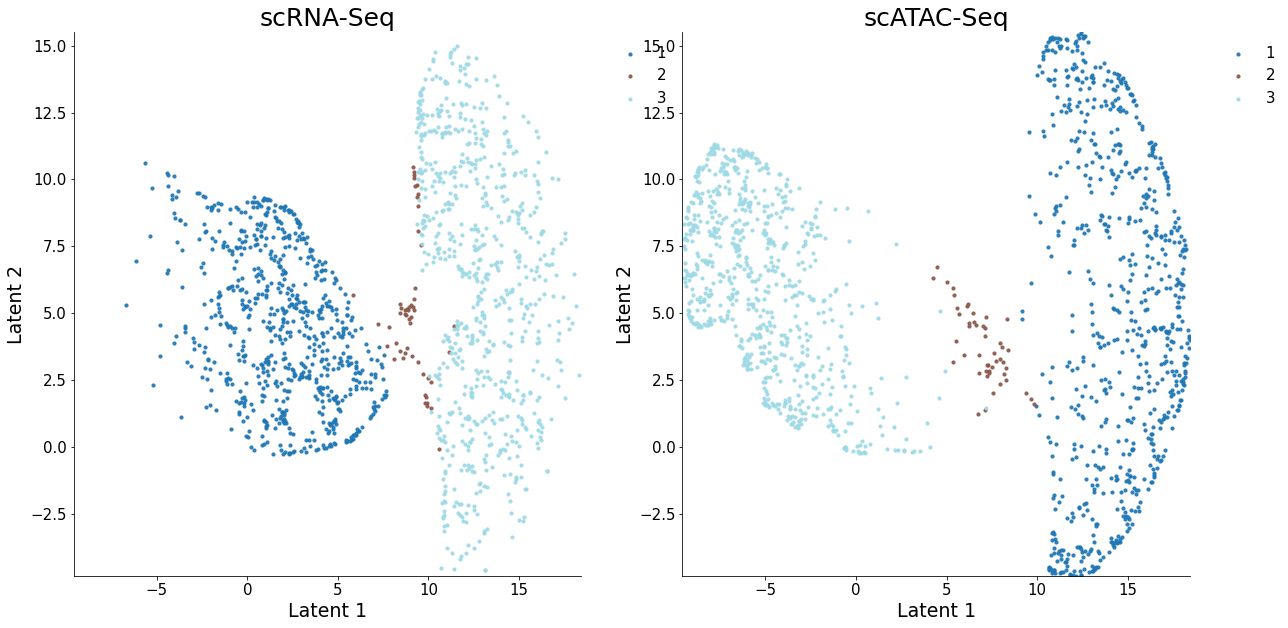

In [173]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model1.softmax(model1.C_1.cpu().detach()).numpy()
z_atac = model1.softmax(model1.C_2.cpu().detach()).numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = model1.meta_rna["pop"].values[:,None]
label_atac = model1.meta_atac["pop"].values[:,None]
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

None


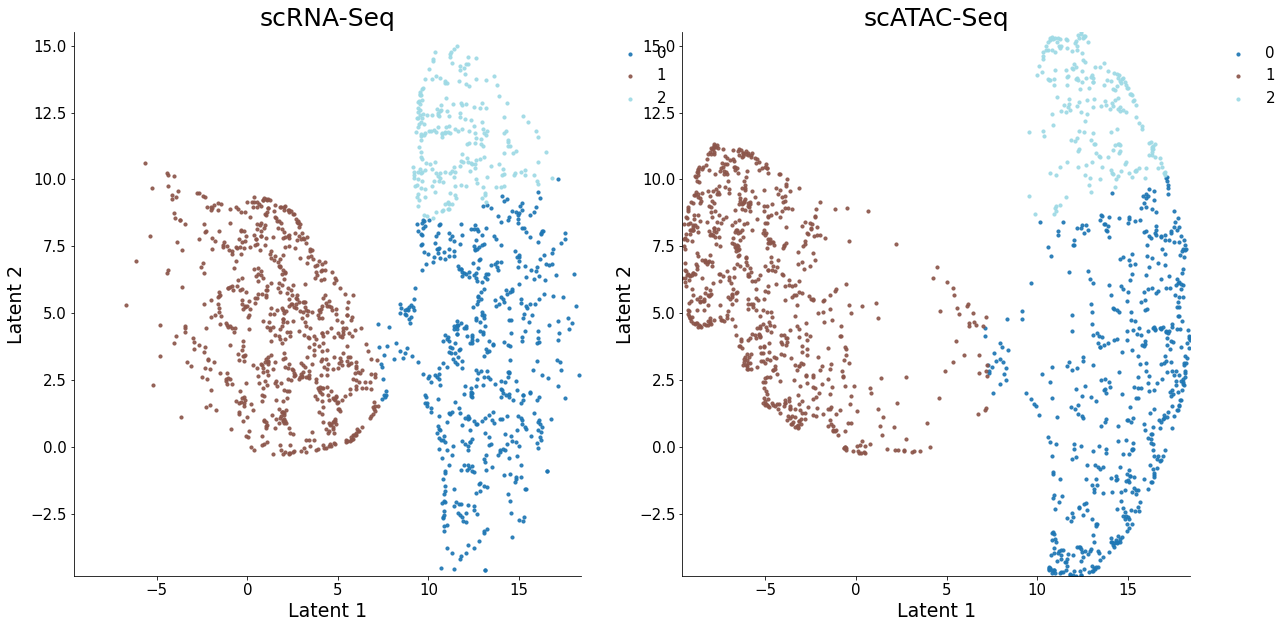

In [174]:
utils.plot_latent(z_rna, z_atac, max_rna, max_atac, mode= "separate", save = None)

In [181]:
import deep_model
import importlib 
importlib.reload(deep_model)

<module 'deep_model' from '/storage/hive/project/cse-vuduc/zzhang834/CFRM/src/deep_model.py'>

In [182]:
alpha = torch.FloatTensor([5000, 0.1, 0.00, 1])
deep_cfrm = deep_model.deep_cfrm(dir = '../data/simulated/2b3c_ziqi1/', N = 5, 
                                 batch_size = 0.1, interval = 1, lr = 5e-4, alpha = alpha).to(device)


deep_cfrm.train_func(T=10000)

Epoch 1, Validating Loss: 2990.0701
	 loss RNA: 0.03890
	 loss ATAC: 27760.04102
	 loss gact: 0.00000
	 loss entropy: 19.58524
Epoch 2, Validating Loss: 2954.6250
	 loss RNA: 0.03955
	 loss ATAC: 27382.99219
	 loss gact: 0.00000
	 loss entropy: 18.59970
Epoch 3, Validating Loss: 2962.8474
	 loss RNA: 0.03687
	 loss ATAC: 27597.36133
	 loss gact: 0.00000
	 loss entropy: 18.73936
Epoch 4, Validating Loss: 2968.7888
	 loss RNA: 0.03863
	 loss ATAC: 27578.17969
	 loss gact: 0.00000
	 loss entropy: 17.80131
Epoch 5, Validating Loss: 2968.5200
	 loss RNA: 0.03700
	 loss ATAC: 27663.59961
	 loss gact: 0.00000
	 loss entropy: 17.14341
Epoch 6, Validating Loss: 2951.2224
	 loss RNA: 0.03755
	 loss ATAC: 27466.47656
	 loss gact: 0.00000
	 loss entropy: 16.84102
Epoch 7, Validating Loss: 2964.1536
	 loss RNA: 0.03780
	 loss ATAC: 27589.16406
	 loss gact: 0.00000
	 loss entropy: 16.24465
Epoch 8, Validating Loss: 2938.6252
	 loss RNA: 0.03675
	 loss ATAC: 27389.31641
	 loss gact: 0.00000
	 loss en

Epoch 66, Validating Loss: 2673.0647
	 loss RNA: 0.03178
	 loss ATAC: 24988.29688
	 loss gact: 0.00000
	 loss entropy: 15.31099
Epoch 67, Validating Loss: 2648.9521
	 loss RNA: 0.03283
	 loss ATAC: 24697.61328
	 loss gact: 0.00000
	 loss entropy: 15.04784
Epoch 68, Validating Loss: 2676.2939
	 loss RNA: 0.03372
	 loss ATAC: 24923.85938
	 loss gact: 0.00000
	 loss entropy: 15.32336
Epoch 69, Validating Loss: 2587.7864
	 loss RNA: 0.03409
	 loss ATAC: 24011.67188
	 loss gact: 0.00000
	 loss entropy: 16.17043
Epoch 70, Validating Loss: 2575.7759
	 loss RNA: 0.03385
	 loss ATAC: 23913.01758
	 loss gact: 0.00000
	 loss entropy: 15.23496
Epoch 71, Validating Loss: 2625.0342
	 loss RNA: 0.03383
	 loss ATAC: 24403.66992
	 loss gact: 0.00000
	 loss entropy: 15.54150
Epoch 72, Validating Loss: 2569.2817
	 loss RNA: 0.03508
	 loss ATAC: 23773.09961
	 loss gact: 0.00000
	 loss entropy: 16.56869
Epoch 73, Validating Loss: 2573.9138
	 loss RNA: 0.03360
	 loss ATAC: 23904.67578
	 loss gact: 0.00000
	

Epoch 136, Validating Loss: 1980.1174
	 loss RNA: 0.03307
	 loss ATAC: 17951.32812
	 loss gact: 0.00000
	 loss entropy: 19.62746
Epoch 137, Validating Loss: 1887.3909
	 loss RNA: 0.03251
	 loss ATAC: 17059.26953
	 loss gact: 0.00000
	 loss entropy: 18.89309
Epoch 138, Validating Loss: 2052.5996
	 loss RNA: 0.03213
	 loss ATAC: 18723.76953
	 loss gact: 0.00000
	 loss entropy: 19.56177
Epoch 139, Validating Loss: 2061.2205
	 loss RNA: 0.03318
	 loss ATAC: 18756.89062
	 loss gact: 0.00000
	 loss entropy: 19.64936
Epoch 140, Validating Loss: 1958.1655
	 loss RNA: 0.03243
	 loss ATAC: 17765.42969
	 loss gact: 0.00000
	 loss entropy: 19.49327
Epoch 141, Validating Loss: 1978.2946
	 loss RNA: 0.03352
	 loss ATAC: 17910.00195
	 loss gact: 0.00000
	 loss entropy: 19.70079
Epoch 142, Validating Loss: 1925.8425
	 loss RNA: 0.03278
	 loss ATAC: 17421.33789
	 loss gact: 0.00000
	 loss entropy: 19.82843
Epoch 143, Validating Loss: 2074.8079
	 loss RNA: 0.03364
	 loss ATAC: 18871.68164
	 loss gact: 0

Epoch 226, Validating Loss: 1917.8501
	 loss RNA: 0.03262
	 loss ATAC: 17340.77734
	 loss gact: 0.00000
	 loss entropy: 20.66985
Epoch 227, Validating Loss: 2052.4468
	 loss RNA: 0.03251
	 loss ATAC: 18686.39062
	 loss gact: 0.00000
	 loss entropy: 21.27175
Epoch 228, Validating Loss: 2059.0642
	 loss RNA: 0.03223
	 loss ATAC: 18761.21094
	 loss gact: 0.00000
	 loss entropy: 21.78184
Epoch 229, Validating Loss: 1985.3270
	 loss RNA: 0.03436
	 loss ATAC: 17936.77734
	 loss gact: 0.00000
	 loss entropy: 19.86641
Epoch 230, Validating Loss: 1952.6193
	 loss RNA: 0.03234
	 loss ATAC: 17698.03516
	 loss gact: 0.00000
	 loss entropy: 21.11569
Epoch 231, Validating Loss: 2059.0774
	 loss RNA: 0.03372
	 loss ATAC: 18698.41602
	 loss gact: 0.00000
	 loss entropy: 20.62061
Epoch 232, Validating Loss: 1882.9871
	 loss RNA: 0.03327
	 loss ATAC: 16962.83594
	 loss gact: 0.00000
	 loss entropy: 20.37214
Epoch 233, Validating Loss: 2007.0691
	 loss RNA: 0.03233
	 loss ATAC: 18243.76953
	 loss gact: 0

None


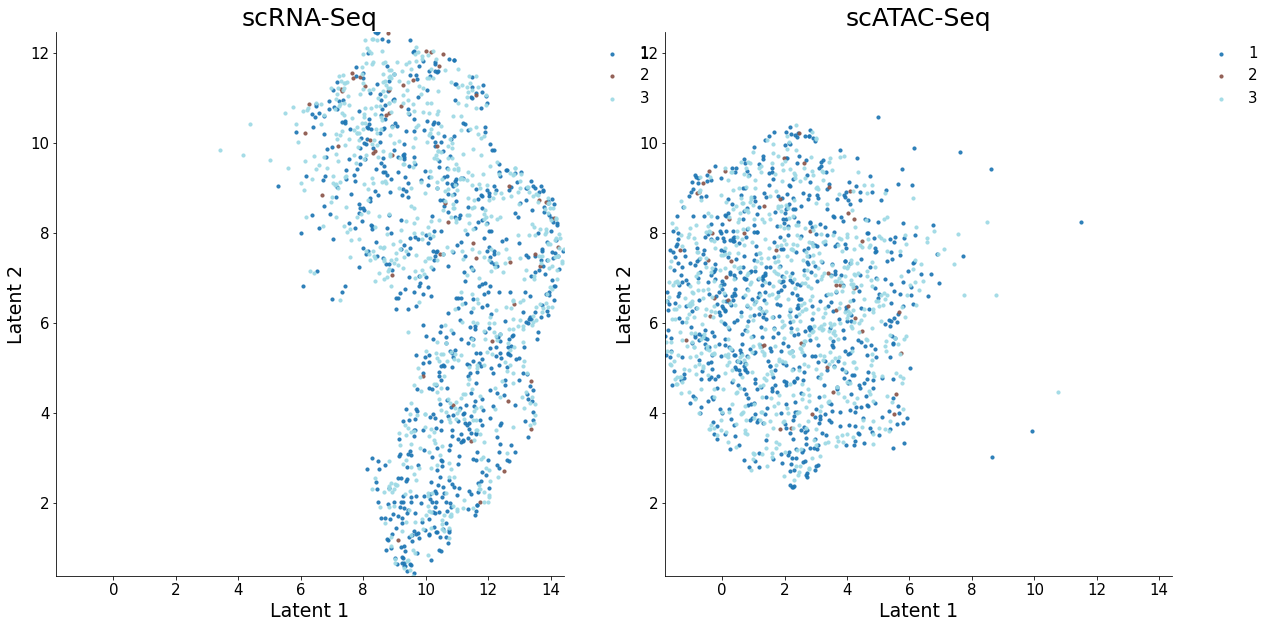

In [184]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 


z_rna = deep_cfrm.ncf.proj_b1(torch.eye(deep_cfrm.G.shape[0]).to(device)).detach().cpu().numpy()
z_atac = deep_cfrm.ncf.proj_b2(torch.eye(deep_cfrm.R.shape[0]).to(device)).detach().cpu().numpy()

z_rna = F.softmax(deep_cfrm.ncf.proj_b1(torch.eye(deep_cfrm.G.shape[0]).to(device)), dim = 1).detach().cpu().numpy()
z_atac = F.softmax(deep_cfrm.ncf.proj_b2(torch.eye(deep_cfrm.R.shape[0]).to(device)), dim = 1).detach().cpu().numpy()


max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = deep_cfrm.meta_rna["pop"].values[:,None]
label_atac = deep_cfrm.meta_atac["pop"].values[:,None]
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [51]:
class sc_cfrm(Module):
    def __init__(self, dir = "../data/simulated/2b3c_ziqi1/", N=3, batch_size=512, interval=10, lr=1e-3, init='svd'):
        super().__init__()
        self.N = N
        self.batch_size = batch_size
        self.interval = interval
        self.alpha = torch.FloatTensor([1000, 1000, 1, 1, 1]).to(device)
        # data
        counts_rna = pd.read_csv(dir + "GxC1.txt", sep = "\t", header = None).values.T
        counts_atac = pd.read_csv(dir + "RxC2.txt", sep = "\t", header = None).values.T
        gact = pd.read_csv(dir + "region2gene.txt", sep = "\t", header = None).values.T

        counts_rna = utils.preprocess(counts_rna, mode = "quantile", modality = "RNA")
        counts_atac = utils.preprocess(counts_atac, mode = "quantile", modality = "ATAC")
        gact = utils.preprocess(gact, mode = "gact")

        counts_rna = counts_rna/np.max(counts_rna)
        counts_atac = counts_atac/np.max(counts_atac)

        self.G = torch.FloatTensor(counts_rna).to(device)
        self.R = torch.FloatTensor(counts_atac).to(device)
        self.A = torch.FloatTensor(gact).to(device)

        self.Ar = Parameter(torch.randn((N,N)))
        self.Ag = Parameter(torch.randn((N,N)))
        # self.Ar = torch.eye(N,N)
        # self.Ag = torch.eye(N,N)

        self.C_1 = Parameter(torch.randn(self.G.shape[0], N))
        self.C_2 = Parameter(torch.randn(self.R.shape[0], N))
        
        # replace C_2 with P @ C_1, where P is a simplex pairing matrix, then C_2 is still simplex
        # self.P = Parameter(torch.randn(self.G.shape[0], self.R.shape[0]))
        
        # low rank decomp
        self.Pl = Parameter(torch.randn(self.G.shape[0], N))
        self.Pr = Parameter(torch.randn(N, self.R.shape[0]))
        
        self.C_g = Parameter(torch.randn(self.G.shape[1], N))
        self.C_r = Parameter(torch.randn(self.R.shape[1], N))
        
        self.s_g = torch.ones(1, self.G.shape[1]).to(device)
        self.s_r = torch.ones(1, self.R.shape[1]).to(device)

        self.b_g = Parameter(torch.zeros(1, self.G.shape[1]))
        self.b_r = Parameter(torch.zeros(1, self.R.shape[1]))
        # self.b_g = torch.zeros(1, self.G.shape[1]).to(device)
        # self.b_r = torch.zeros(1, self.R.shape[1]).to(device)

        self.meta_rna = pd.read_csv(os.path.join(dir, "cell_label1.txt"), sep = "\t")
        self.meta_atac = pd.read_csv(os.path.join(dir, "cell_label2.txt"), sep = "\t")
    
        self.optimizer = opt.Adam(self.parameters(), lr=lr)

        # with torch.no_grad():
        #     loss, *_ = self.batch_loss('valid')
        #     print('Initial Loss is {:.5f}'.format(loss.item()))

    @staticmethod
    def softmax(X: torch.Tensor):
        return torch.softmax(X, dim=1)
        # return X
        # return torch.exp(X)

    @staticmethod
    def entropy_loss(C):
        # loss = - F.softmax(C, dim=1) * F.log_softmax(C, dim=1)
        loss = - C * torch.log(C)
        return loss.sum(dim=1).mean()

    def batch_loss(self, mode):
        if mode != 'valid':
            mask_1 = np.random.choice(self.G.shape[0], self.batch_size, replace=False)
            mask_2 = np.random.choice(self.R.shape[0], self.batch_size, replace=False)
            mask_g = np.random.choice(self.G.shape[1], self.batch_size, replace=False)
            mask_r = np.random.choice(self.R.shape[1], self.batch_size, replace=False)
            
        if mode == 'C_12':

            loss1 = (self.G[np.ix_(mask_1, mask_g)] - self.s_g[:, mask_g] *(self.softmax(self.Pl[mask_1,:].detach()) @ 
                     self.softmax(self.Pr[:,mask_2].detach()) @ self.softmax(self.C_2[mask_2,:]) @ 
                     self.Ag.detach() @ self.softmax(self.C_g[mask_g, :].detach()).t()) - 
                     self.b_g[:, mask_g]).pow(2).mean()
            
            loss2 = (self.R[np.ix_(mask_2, mask_r)] - self.s_r[:, mask_r] *(self.softmax(self.C_2[mask_2,:]) @ 
                     self.Ar.detach() @ self.softmax(self.C_r[mask_r,:].detach()).t()) - 
                     self.b_r[:, mask_r]).pow(2).mean()
            
            loss3 = 0
            loss4 = 0 
            loss5 = 0
            
        elif mode == "P":
            loss1 = (self.G[np.ix_(mask_1, mask_g)] - self.s_g[:, mask_g] *(self.softmax(self.Pl[mask_1,:]) @ 
                     self.softmax(self.Pr[:,mask_2]) @ self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ag.detach() @ self.softmax(self.C_g[mask_g, :].detach()).t()) - 
                     self.b_g[:, mask_g]).pow(2).mean()
            
            loss2 = (self.R[np.ix_(mask_2, mask_r)] - self.s_r[:, mask_r] *(self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ar.detach() @ self.softmax(self.C_r[mask_r,:].detach()).t()) - 
                     self.b_r[:, mask_r]).pow(2).mean()
            
            loss3 = 0
            loss4 = 0 
            loss5 = self.entropy_loss((self.softmax(self.Pl[mask_1,:]) @ self.softmax(self.Pr[:,mask_2])))
        
        elif mode == 'C_gr':
            loss1 = (self.G[np.ix_(mask_1, mask_g)] - self.s_g[:, mask_g] *(self.softmax(self.Pl[mask_1,:].detach()) @ 
                     self.softmax(self.Pr[:,mask_2].detach()) @ self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ag.detach() @ self.softmax(self.C_g[mask_g, :]).t()) - 
                     self.b_g[:, mask_g]).pow(2).mean()
    
            loss2 = (self.R[np.ix_(mask_2, mask_r)] - self.s_r[:, mask_r] *(self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ar.detach() @ self.softmax(self.C_r[mask_r, :]).t()) - 
                     self.b_r[:, mask_r]).pow(2).mean()
            
            # correlation ver
            loss3 = - torch.trace((self.softmax(self.C_g[mask_g,:])/ torch.norm(self.softmax(self.C_g[mask_g,:]), dim = 0)[None,:]).t() @ 
                      self.A[np.ix_(mask_g, mask_r)] @ (self.softmax(self.C_r[mask_r,:])/torch.norm(self.softmax(self.C_r[mask_r,:]), dim = 0)[None,:]))
            
            loss4 = 0 
            loss5 = 0
        
        elif mode == "A":
            loss1 = (self.G[np.ix_(mask_1, mask_g)] - self.s_g[:, mask_g] *(self.softmax(self.Pl[mask_1,:].detach()) @ 
                     self.softmax(self.Pr[:,mask_2].detach()) @ self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ag @ self.softmax(self.C_g[mask_g, :].detach()).t()) - 
                     self.b_g[:, mask_g]).pow(2).mean()
            
            loss2 = (self.R[np.ix_(mask_2, mask_r)] - self.s_r[:, mask_r] *(self.softmax(self.C_2[mask_2,:].detach()) @ self.Ar @
                     self.softmax(self.C_r[mask_r, :].detach()).t()) - self.b_r[:, mask_r]).pow(2).mean()
            

            loss3 = 0
            loss4 = -torch.trace((self.Ar/torch.norm(self.Ar)).t() @ (self.Ag)/torch.norm(self.Ag))
            loss5 = 0
            
   
        elif mode == 'valid':
            with torch.no_grad():
                loss1 = (self.G - (self.softmax(self.Pl) @ self.softmax(self.Pr) @ 
                         self.softmax(self.C_2) @ self.Ag @
                         self.softmax(self.C_g).t()) - self.b_g).pow(2).mean()
                
                loss2 = (self.R - (self.softmax(self.C_2) @ self.Ar @
                         self.softmax(self.C_r).t()) - self.b_r).pow(2).mean()
                
                # maximize the correlationship
                loss3 = - torch.trace((self.softmax(self.C_g) / torch.norm(self.softmax(self.C_g), dim = 0)[None,:]).t() @ 
                                      self.A @ (self.softmax(self.C_r) / torch.norm(self.softmax(self.C_r), dim = 0)[None,:]))
                
                loss4 = -torch.trace((self.Ar/torch.norm(self.Ar)).t() @ (self.Ag)/torch.norm(self.Ag))
                loss5 = self.entropy_loss((self.softmax(self.Pl) @ self.softmax(self.Pr)))
        else:
            raise NotImplementedError
        loss = self.alpha[0] * loss1 + self.alpha[1] * loss2 + self.alpha[2] * loss3 + self.alpha[3] * loss4 + self.alpha[4] * loss5
               
        return loss, self.alpha[0] * loss1, self.alpha[1] * loss2, self.alpha[2] * loss3, self.alpha[3] * loss4, self.alpha[4] * loss5
    #
    def train_func(self, T):
        best_loss = 1e12
        count = 0
        for t in range(T):
            loss = 0
            for it in range(500):
                mode = 'C_12'
                self.optimizer.zero_grad()
                loss_pre = loss
                loss, *_ = self.batch_loss(mode)
                loss.backward()
                self.optimizer.step()
                if torch.abs(loss_pre - loss) < 1e-3:
                    print(it)
                    break
                    
            loss = 0
            for it in range(500):
                mode = 'P'
                self.optimizer.zero_grad()
                loss_pre = loss
                loss, *_ = self.batch_loss(mode)
                loss.backward()
                self.optimizer.step()
                if torch.abs(loss_pre - loss) < 1e-3:
                    print(it)
                    break
                    
            
            loss = 0
            for it in range(500):
                mode = 'C_gr'
                self.optimizer.zero_grad()
                loss_pre = loss
                loss, *_ = self.batch_loss(mode)
                loss.backward()
                self.optimizer.step()
                if torch.abs(loss_pre - loss) < 1e-3:
                    print(it)
                    break
                    


            for it in range(500):
                mode = 'A'
                self.optimizer.zero_grad()
                loss_pre = loss
                loss, *_ = self.batch_loss(mode)
                loss.backward()
                self.optimizer.step()
                if torch.abs(loss_pre - loss) < 1e-3:
                    print(it)
                    break
                    
                
            if (t+1) % self.interval == 0:
                loss, loss1, loss2, loss3, loss4, loss5 = self.batch_loss('valid')
                print('Epoch {}, Validating Loss: {:.4f}'.format(t + 1, loss.item()))
                info = [
                    'loss 1: {:.5f}'.format(loss1.item()),
                    'loss 2: {:.5f}'.format(loss2.item()),
                    'loss 3: {:.5f}'.format(loss3.item()),
                    'loss 4: {:.5f}'.format(loss4.item()),
                    'loss 5: {:.5f}'.format(loss5.item())
                ]
                for i in info:
                    print("\t", i)
                if loss.item() < best_loss:
                    best_loss = loss.item()
                    torch.save(self.state_dict(), f'../check_points/real_{self.N}.pt')
                    count = 0
                else:
                    count += 1
                    if count % 20 == 0:
                        self.optimizer.param_groups[0]['lr'] *= 0.5
                        print('Epoch: {}, shrink lr to {:.4f}'.format(t + 1, self.optimizer.param_groups[0]['lr']))
                        if self.optimizer.param_groups[0]['lr'] < 1e-4:
                            break
                        else:
                            self.load_state_dict(torch.load(f'../check_points/real_{self.N}.pt'))
                            count = 0



None


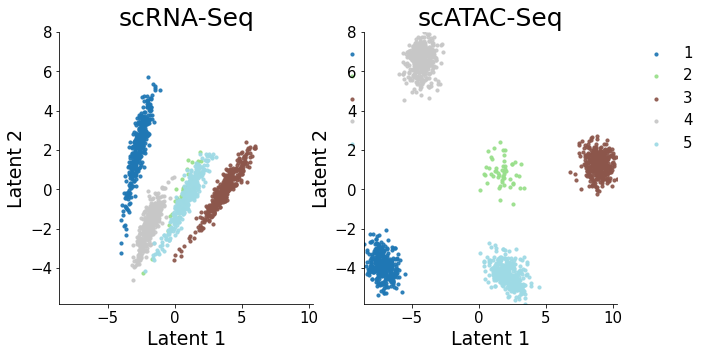

In [10]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = pca_op.fit_transform(model.G.detach().numpy())
z_atac = pca_op.fit_transform(model.R.detach().numpy())

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None, figsize = (10,5))

In [11]:
from scipy.sparse import csr_matrix, linalg
def svd_fast(X, n_pcs = 2):
    U, Sigma, Vh = linalg.svds(X, return_singular_vectors = "u", k = n_pcs, which = "LM")
    return U

In [12]:
z_rna = svd_fast(model.G.detach().numpy())
z_atac = svd_fast(model.R.detach().numpy())

None


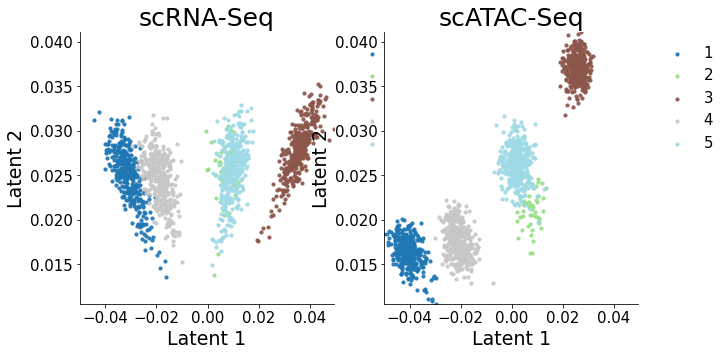

In [13]:
label_rna = model.meta_rna["pop"].values[:,None]
label_atac = model.meta_atac["pop"].values[:,None]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None, figsize = (10,5))

In [45]:
model = cfrmModel(dir = '../data/simulated/2b5c_ziqi1/', N=3, batch_size = 512, init = "svd")
model.train_func(T=100)

0.39255449175834656
0.3472805917263031
0.0450749546289444
0.000198934183572419
Epoch 1, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 2, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 3, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 4, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 5, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 6, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 7, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 8, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 9, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 10, Training Loss: 0.3926
	 loss RNA: 0.34

Epoch 84, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 85, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 86, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 87, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020


KeyboardInterrupt: 

In [46]:
# torch.save(model, "b2c6.pth")
# model = torch.load("b2c6.pth")
from umap import UMAP

pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = model.C_1.detach().numpy()
z_atac = model.C_2.detach().numpy()
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

In [50]:
dir = '../data/simulated/2b5c_ziqi1/'
meta_rna = pd.read_csv(os.path.join(dir, "cell_label1.txt"), sep = "\t")
meta_atac = pd.read_csv(os.path.join(dir, "cell_label2.txt"), sep = "\t")
label_rna = meta_rna["pop"].values[:,None]
label_atac = meta_atac["pop"].values[:,None]

None


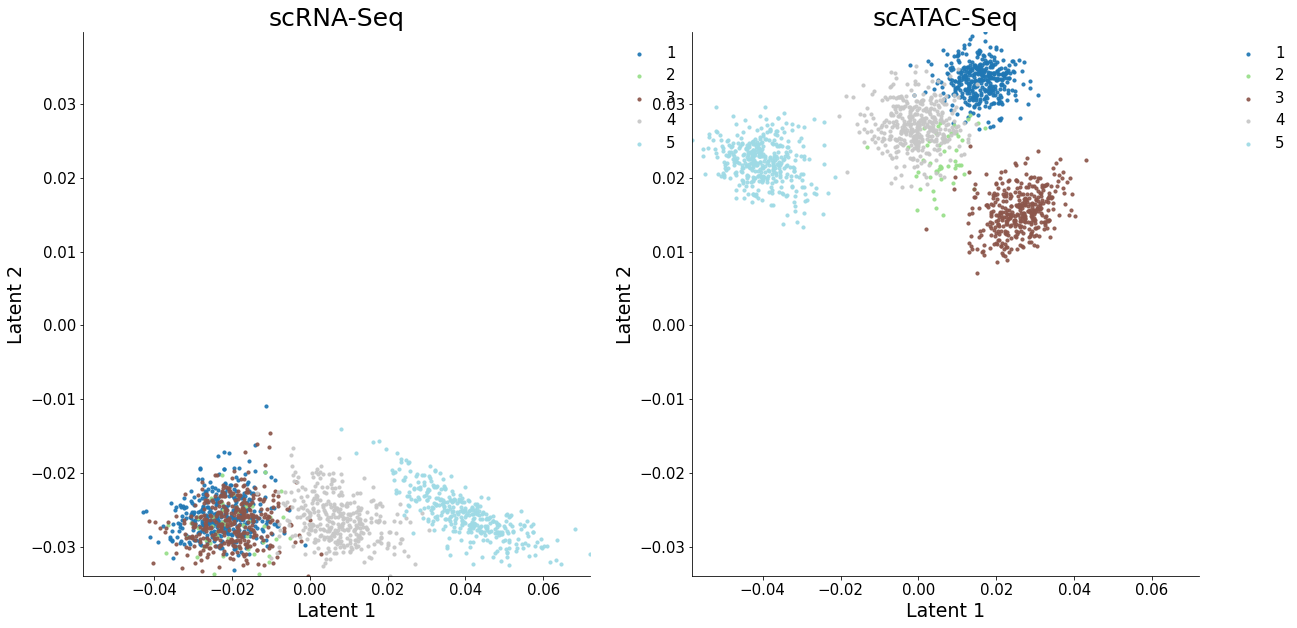

In [51]:
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [27]:
model = cfrmModel(dir = '../data/simulated/2batches_3clusts', N=3, dropout=0, init = "svd")
model.train_func(T=1000)

0.2704484164714813
0.2241944968700409
0.04583536460995674
0.0004185508587397635
Epoch 1, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042
Epoch 2, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042
Epoch 3, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042
Epoch 4, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042
Epoch 5, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042


KeyboardInterrupt: 

None


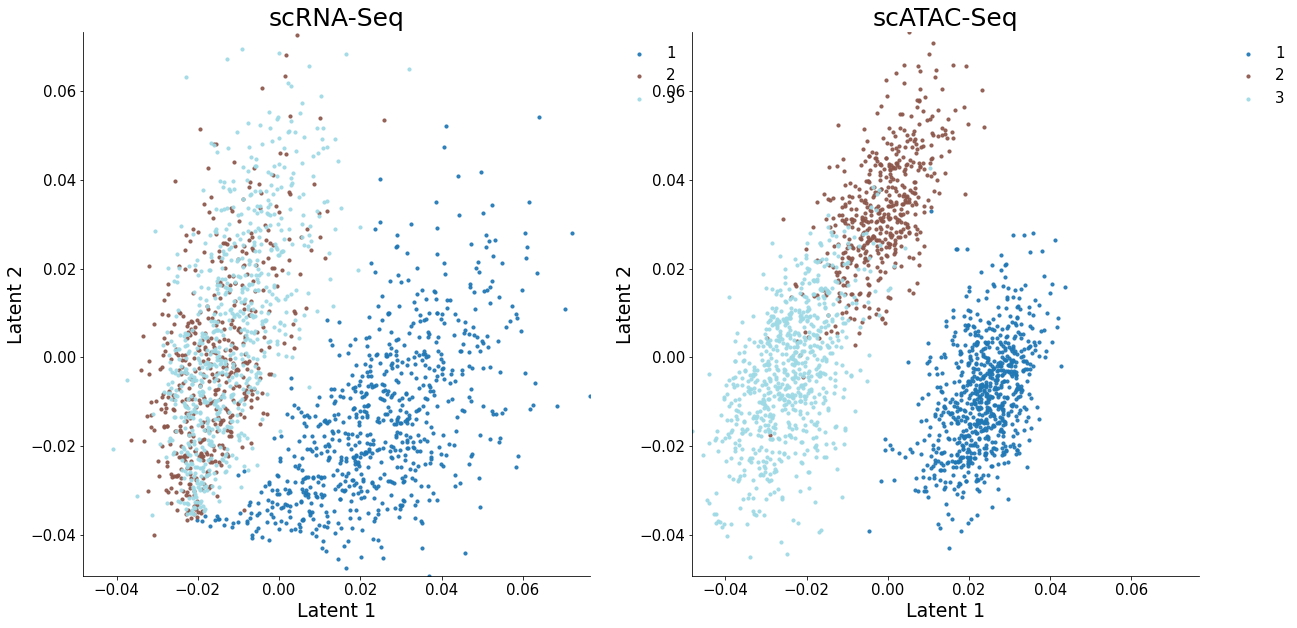

In [28]:
# torch.save(model, "b2c6.pth")
# model = torch.load("b2c6.pth")
from umap import UMAP

pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = model.C_1.detach().numpy()
z_atac = model.C_2.detach().numpy()
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = [x for x in model.label_c1.numpy()]
label_atac = [x for x in model.label_c2.numpy()]
label_rna = model.label_c1.numpy()[:,None]
label_atac = model.label_c2.numpy()[:,None]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [29]:
model = cfrmModel(dir = '../data/simulated/2batches_6clusts', N=3, dropout=0, init = "random")
model.train_func(T=100)

1.1414905786514282
1.0413411855697632
0.09973078221082687
0.0004186659352853894
Epoch 1, Training Loss: 0.3652
	 loss RNA: 0.28159
	 loss ATAC: 0.08321
	 loss gene act: 0.00042
Epoch 2, Training Loss: 0.2638
	 loss RNA: 0.21496
	 loss ATAC: 0.04846
	 loss gene act: 0.00042
Epoch 3, Training Loss: 0.2599
	 loss RNA: 0.21157
	 loss ATAC: 0.04789
	 loss gene act: 0.00042
Epoch 4, Training Loss: 0.2596
	 loss RNA: 0.21145
	 loss ATAC: 0.04776
	 loss gene act: 0.00042
Epoch 5, Training Loss: 0.2596
	 loss RNA: 0.21144
	 loss ATAC: 0.04771
	 loss gene act: 0.00042
Epoch 6, Training Loss: 0.2595
	 loss RNA: 0.21144
	 loss ATAC: 0.04767
	 loss gene act: 0.00042
Epoch 7, Training Loss: 0.2595
	 loss RNA: 0.21144
	 loss ATAC: 0.04764
	 loss gene act: 0.00042
Epoch 8, Training Loss: 0.2595
	 loss RNA: 0.21144
	 loss ATAC: 0.04763
	 loss gene act: 0.00042
Epoch 9, Training Loss: 0.2595
	 loss RNA: 0.21144
	 loss ATAC: 0.04761
	 loss gene act: 0.00042
Epoch 10, Training Loss: 0.2595
	 loss RNA: 0.2

KeyboardInterrupt: 

None


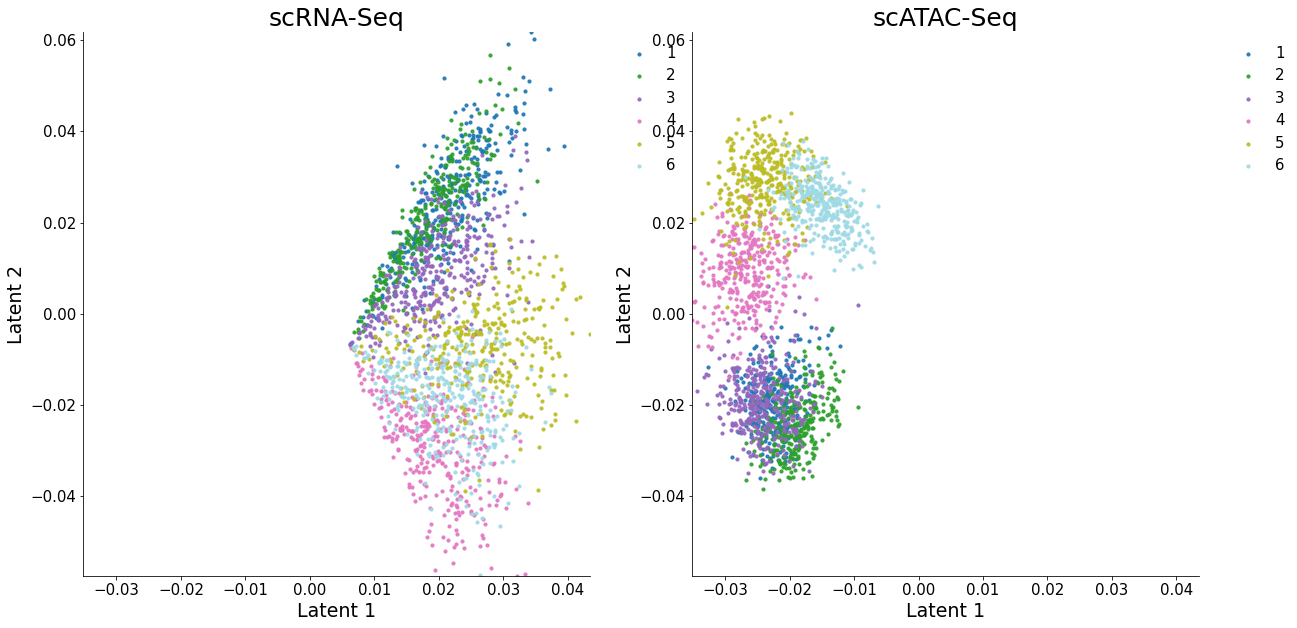

In [30]:
# torch.save(model, "b2c6.pth")
# model = torch.load("b2c6.pth")
from umap import UMAP

pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = model.C_1.detach().numpy()
z_atac = model.C_2.detach().numpy()
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = [x for x in model.label_c1.numpy()]
label_atac = [x for x in model.label_c2.numpy()]
label_rna = model.label_c1.numpy()[:,None]
label_atac = model.label_c2.numpy()[:,None]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [31]:
model = cfrmModel(dir = '../data/simulated/2batches_6clusts', N=3, dropout=0, init = "svd")
model.train_func(T=100)

0.25944381952285767
0.21143664419651031
0.04758860915899277
0.0004185651778243482
Epoch 1, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 2, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 3, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 4, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 5, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 6, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042


KeyboardInterrupt: 

None


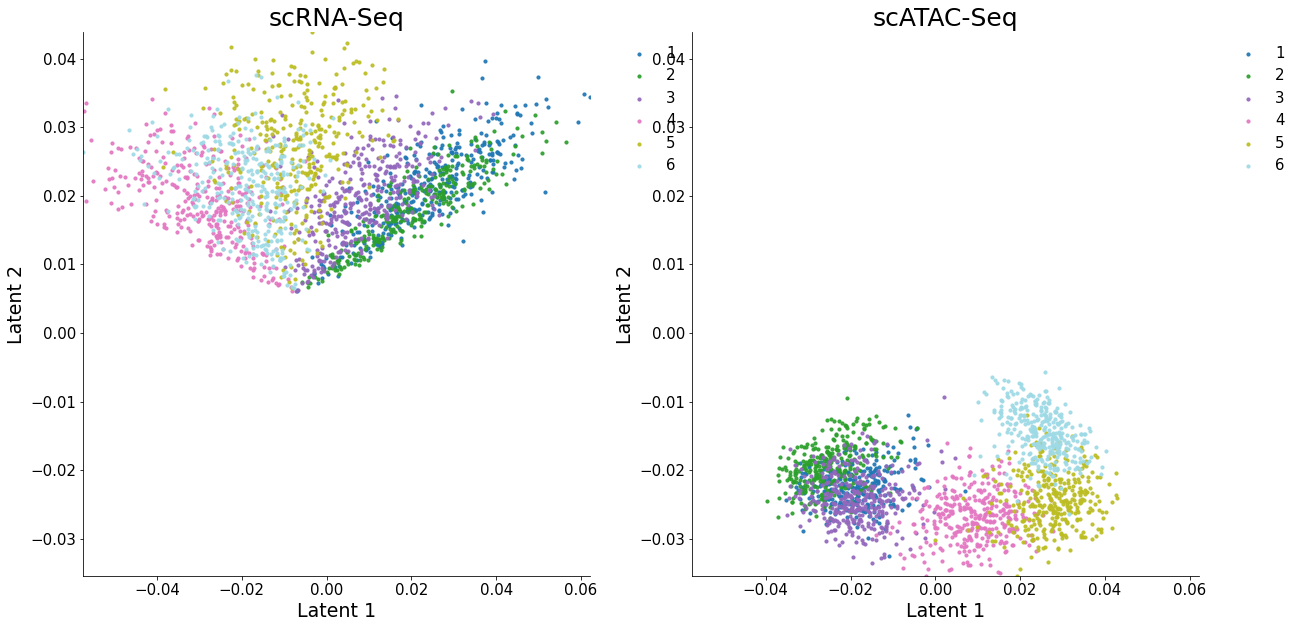

In [32]:
# torch.save(model, "b2c6.pth")
# model = torch.load("b2c6.pth")
from umap import UMAP

pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = model.C_1.detach().numpy()
z_atac = model.C_2.detach().numpy()
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = [x for x in model.label_c1.numpy()]
label_atac = [x for x in model.label_c2.numpy()]
label_rna = model.label_c1.numpy()[:,None]
label_atac = model.label_c2.numpy()[:,None]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)